# R Notebook: CMIP5 Dry Spell Length Distributions, 2041-2070

Dry state, spell length for PRISM data.

Uses R to do some analysis

Add in the part to make a DataFrame with our best fit negative binomial parameters and then to output this to a spreadsheet

## Parameters and Library Loading

In [1]:
oldw <- getOption("warn")

In [2]:
options(warn = -1)

In [3]:
library(feather)
library(dplyr)
library(fitdistrplus)
library(vcd)
library(dgof)
library(xlsx)
library(r2excel)
library(moments)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: survival
Loading required package: npsurv
Loading required package: lsei
Loading required package: grid

Attaching package: 'dgof'

The following object is masked from 'package:stats':

    ks.test



**Note:** We only want to mask package:stats ks.test with that from package:dgof when working with discrete distributions.

In [4]:
setwd("\\\\augustine.space.swri.edu\\jdrive\\Groundwater\\R8937_Stochastic_CC_Recharge\\Data\\R\\Working\\CMIP5_2041_DryDays")

Now specify some parameters - just file names

In [5]:
feLODPath <- "DryDays_LOCA_2041-2070.feather"

In [6]:
feBCDPath <- "DryDays_BCCA_2041-2070.feather"

## Initial Load and Process of DataFrame

In [7]:
dfLODry <- read_feather(feLODPath)
ddates <- as.Date( ISOdate( dfLODry$Year, dfLODry$Month, dfLODry$Day ) )
dfLODry["Date"] <- ddates

In [8]:
str(dfLODry)

Classes 'tbl_df', 'tbl' and 'data.frame':	12989556 obs. of  8 variables:
 $ MGrid_Id : chr  "M10_1" "M10_1" "M10_1" "M10_1" ...
 $ Grid_Id  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Mod_Id   : int  10 10 10 10 10 10 10 10 10 10 ...
 $ Year     : num  2041 2041 2041 2041 2041 ...
 $ Month    : num  1 1 1 1 1 2 2 2 4 4 ...
 $ Day      : num  1 8 15 20 30 5 20 25 1 11 ...
 $ Dry_Count: num  4 2 4 7 5 7 4 34 8 6 ...
 $ Date     : Date, format: "2041-01-01" "2041-01-08" ...


In [9]:
head(dfLODry)

MGrid_Id,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count,Date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
M10_1,1,10,2041,1,1,4,2041-01-01
M10_1,1,10,2041,1,8,2,2041-01-08
M10_1,1,10,2041,1,15,4,2041-01-15
M10_1,1,10,2041,1,20,7,2041-01-20
M10_1,1,10,2041,1,30,5,2041-01-30
M10_1,1,10,2041,2,5,7,2041-02-05


In [10]:
dfBCDry <- read_feather(feBCDPath)
ddates <- as.Date( ISOdate( dfBCDry$Year, dfBCDry$Month, dfBCDry$Day ) )
dfBCDry["Date"] <- ddates

In [11]:
str(dfBCDry)

Classes 'tbl_df', 'tbl' and 'data.frame':	9142172 obs. of  8 variables:
 $ MGrid_Id : chr  "M100_169" "M100_169" "M100_169" "M100_169" ...
 $ Grid_Id  : int  169 169 169 169 169 169 169 169 169 169 ...
 $ Mod_Id   : int  100 100 100 100 100 100 100 100 100 100 ...
 $ Year     : num  2041 2041 2041 2041 2041 ...
 $ Month    : num  1 1 1 1 1 2 2 2 2 2 ...
 $ Day      : num  1 7 18 24 31 3 14 17 19 22 ...
 $ Dry_Count: num  5 9 4 5 2 9 2 1 1 12 ...
 $ Date     : Date, format: "2041-01-01" "2041-01-07" ...


In [12]:
head(dfBCDry)

MGrid_Id,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count,Date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
M100_169,169,100,2041,1,1,5,2041-01-01
M100_169,169,100,2041,1,7,9,2041-01-07
M100_169,169,100,2041,1,18,4,2041-01-18
M100_169,169,100,2041,1,24,5,2041-01-24
M100_169,169,100,2041,1,31,2,2041-01-31
M100_169,169,100,2041,2,3,9,2041-02-03


First filter for each month with all Grid_Id

In [13]:
dLOJan <- dfLODry %>% filter( Month == 1 )
dLOFeb <- dfLODry %>% filter( Month == 2 )
dLOMar <- dfLODry %>% filter( Month == 3 )
dLOApr <- dfLODry %>% filter( Month == 4 )
dLOMay <- dfLODry %>% filter( Month == 5 )
dLOJun <- dfLODry %>% filter( Month == 6 )
dLOJul <- dfLODry %>% filter( Month == 7 )
dLOAug <- dfLODry %>% filter( Month == 8 )
dLOSep <- dfLODry %>% filter( Month == 9 )
dLOOct <- dfLODry %>% filter( Month == 10 )
dLONov <- dfLODry %>% filter( Month == 11 )
dLODec <- dfLODry %>% filter( Month == 12 )

In [14]:
dBCJan <- dfBCDry %>% filter( Month == 1 )
dBCFeb <- dfBCDry %>% filter( Month == 2 )
dBCMar <- dfBCDry %>% filter( Month == 3 )
dBCApr <- dfBCDry %>% filter( Month == 4 )
dBCMay <- dfBCDry %>% filter( Month == 5 )
dBCJun <- dfBCDry %>% filter( Month == 6 )
dBCJul <- dfBCDry %>% filter( Month == 7 )
dBCAug <- dfBCDry %>% filter( Month == 8 )
dBCSep <- dfBCDry %>% filter( Month == 9 )
dBCOct <- dfBCDry %>% filter( Month == 10 )
dBCNov <- dfBCDry %>% filter( Month == 11 )
dBCDec <- dfBCDry %>% filter( Month == 12 )

Set-up a dataframe to store the basic summary statistics. Eventually will write this to Excel.

In [15]:
MonLOSumStatDF <- data.frame( month=rep(NA,12), mean=rep(NA,12), median=rep(NA,12), 
                            max=rep(NA,12), min=rep(NA,12), stdev=rep(NA,12), var=rep(NA,12),
                            skew=rep(NA,12), kurt=rep(NA,12), perc0=rep(NA,12), perc10=rep(NA,12), 
                            perc20=rep(NA,12), perc30=rep(NA,12), perc40=rep(NA,12), 
                            perc50=rep(NA,12), perc60=rep(NA,12), perc70=rep(NA,12), 
                            perc80=rep(NA,12), perc90=rep(NA,12), perc100=rep(NA,12), 
                            stringsAsFactors=FALSE )

In [16]:
pvec <- seq(0,1,0.1)

In [17]:
NumDeciles = length( pvec )
cat("Number of deciles: ", NumDeciles)

Number of deciles:  11

Now look at summary stats for the dry day counts for each month

In [18]:
summary( dLOJan$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   6.000   8.727  12.000 116.000 

In [19]:
oQuants = quantile( dLOJan$Dry_Count, pvec )

In [20]:
MonLOSumStatDF[1, ] <-list( 1, mean(dLOJan$Dry_Count), median(dLOJan$Dry_Count), 
                          max(dLOJan$Dry_Count), min(dLOJan$Dry_Count), sd(dLOJan$Dry_Count),
                          var(dLOJan$Dry_Count), skewness(dLOJan$Dry_Count), 
                          kurtosis(dLOJan$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [21]:
summary( dLOFeb$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   7.479  10.000 117.000 

In [22]:
oQuants = quantile( dLOFeb$Dry_Count, pvec )

In [23]:
MonLOSumStatDF[2, ] <-list( 2, mean(dLOFeb$Dry_Count), median(dLOFeb$Dry_Count), 
                          max(dLOFeb$Dry_Count), min(dLOFeb$Dry_Count), sd(dLOFeb$Dry_Count),
                          var(dLOFeb$Dry_Count), skewness(dLOFeb$Dry_Count), 
                          kurtosis(dLOFeb$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [24]:
summary( dLOMar$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   7.719  10.000  80.000 

In [25]:
oQuants = quantile( dLOMar$Dry_Count, pvec )

In [26]:
MonLOSumStatDF[3, ] <-list( 3, mean(dLOMar$Dry_Count), median(dLOMar$Dry_Count), 
                          max(dLOMar$Dry_Count), min(dLOMar$Dry_Count), sd(dLOMar$Dry_Count),
                          var(dLOMar$Dry_Count), skewness(dLOMar$Dry_Count), 
                          kurtosis(dLOMar$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [27]:
summary( dLOApr$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   5.453   7.000  72.000 

In [28]:
oQuants = quantile( dLOApr$Dry_Count, pvec )

In [29]:
MonLOSumStatDF[4, ] <-list( 4, mean(dLOApr$Dry_Count), median(dLOApr$Dry_Count), 
                          max(dLOApr$Dry_Count), min(dLOApr$Dry_Count), sd(dLOApr$Dry_Count),
                          var(dLOApr$Dry_Count), skewness(dLOApr$Dry_Count), 
                          kurtosis(dLOApr$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [30]:
summary( dLOMay$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   4.597   6.000 106.000 

In [31]:
oQuants = quantile( dLOMay$Dry_Count, pvec )

In [32]:
MonLOSumStatDF[5, ] <-list( 5, mean(dLOMay$Dry_Count), median(dLOMay$Dry_Count), 
                          max(dLOMay$Dry_Count), min(dLOMay$Dry_Count), sd(dLOMay$Dry_Count),
                          var(dLOMay$Dry_Count), skewness(dLOMay$Dry_Count), 
                          kurtosis(dLOMay$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [33]:
summary( dLOJun$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   6.089   7.000 112.000 

In [34]:
oQuants = quantile( dLOJun$Dry_Count, pvec )

In [35]:
MonLOSumStatDF[6, ] <-list( 6, mean(dLOJun$Dry_Count), median(dLOJun$Dry_Count), 
                          max(dLOJun$Dry_Count), min(dLOJun$Dry_Count), sd(dLOJun$Dry_Count),
                          var(dLOJun$Dry_Count), skewness(dLOJun$Dry_Count), 
                          kurtosis(dLOJun$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [36]:
summary( dLOJul$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   7.301   9.000  93.000 

In [37]:
oQuants = quantile( dLOJul$Dry_Count, pvec )

In [38]:
MonLOSumStatDF[7, ] <-list( 7, mean(dLOJul$Dry_Count), median(dLOJul$Dry_Count), 
                          max(dLOJul$Dry_Count), min(dLOJul$Dry_Count), sd(dLOJul$Dry_Count),
                          var(dLOJul$Dry_Count), skewness(dLOJul$Dry_Count), 
                          kurtosis(dLOJul$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [39]:
summary( dLOAug$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   6.613   9.000  90.000 

In [40]:
oQuants = quantile( dLOAug$Dry_Count, pvec )

In [41]:
MonLOSumStatDF[8, ] <-list( 8, mean(dLOAug$Dry_Count), median(dLOAug$Dry_Count), 
                          max(dLOAug$Dry_Count), min(dLOAug$Dry_Count), sd(dLOAug$Dry_Count),
                          var(dLOAug$Dry_Count), skewness(dLOAug$Dry_Count), 
                          kurtosis(dLOAug$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [42]:
summary( dLOSep$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   5.418   7.000  94.000 

In [43]:
oQuants = quantile( dLOSep$Dry_Count, pvec )

In [44]:
MonLOSumStatDF[9, ] <-list( 9, mean(dLOSep$Dry_Count), median(dLOSep$Dry_Count), 
                          max(dLOSep$Dry_Count), min(dLOSep$Dry_Count), sd(dLOSep$Dry_Count),
                          var(dLOSep$Dry_Count), skewness(dLOSep$Dry_Count), 
                          kurtosis(dLOSep$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [45]:
summary( dLOOct$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   6.841   9.000 133.000 

In [46]:
oQuants = quantile( dLOOct$Dry_Count, pvec )

In [47]:
MonLOSumStatDF[10, ] <-list( 10, mean(dLOOct$Dry_Count), median(dLOOct$Dry_Count), 
                          max(dLOOct$Dry_Count), min(dLOOct$Dry_Count), sd(dLOOct$Dry_Count),
                          var(dLOOct$Dry_Count), skewness(dLOOct$Dry_Count), 
                          kurtosis(dLOOct$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [48]:
summary( dLONov$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   7.279   9.000 117.000 

In [49]:
oQuants = quantile( dLONov$Dry_Count, pvec )

In [50]:
MonLOSumStatDF[11, ] <-list( 11, mean(dLONov$Dry_Count), median(dLONov$Dry_Count), 
                          max(dLONov$Dry_Count), min(dLONov$Dry_Count), sd(dLONov$Dry_Count),
                          var(dLONov$Dry_Count), skewness(dLONov$Dry_Count), 
                          kurtosis(dLONov$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [51]:
summary( dLODec$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   8.344  11.000 137.000 

In [52]:
oQuants = quantile( dLODec$Dry_Count, pvec )

In [53]:
MonLOSumStatDF[12, ] <-list( 12, mean(dLODec$Dry_Count), median(dLODec$Dry_Count), 
                          max(dLODec$Dry_Count), min(dLODec$Dry_Count), sd(dLODec$Dry_Count),
                          var(dLODec$Dry_Count), skewness(dLODec$Dry_Count), 
                          kurtosis(dLODec$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [54]:
print( MonLOSumStatDF, quote=FALSE, row.names=FALSE )

 month     mean median max min    stdev      var     skew      kurt perc0
     1 8.726610      6 116   1 9.086918 82.57208 2.476702 12.739879     1
     2 7.478554      5 117   1 7.950458 63.20978 2.758115 14.543740     1
     3 7.718704      5  80   1 7.591728 57.63433 2.101025  9.074687     1
     4 5.452850      4  72   1 5.248059 27.54212 2.318078 11.455560     1
     5 4.596750      3 106   1 4.967680 24.67784 3.727246 30.004936     1
     6 6.089343      3 112   1 7.774162 60.43759 3.214270 18.054035     1
     7 7.301216      4  93   1 8.361030 69.90682 2.510997 11.481164     1
     8 6.613158      4  90   1 6.643393 44.13467 2.011407  8.428068     1
     9 5.418038      3  94   1 6.030828 36.37089 3.152170 19.400519     1
    10 6.841150      4 133   1 7.658096 58.64643 2.979750 18.840972     1
    11 7.279090      4 117   1 8.487343 72.03499 3.025983 17.038780     1
    12 8.344084      5 137   1 9.265972 85.85824 2.750944 15.350806     1
 perc10 perc20 perc30 perc40 perc50 pe

BCCA

In [55]:
MonBCSumStatDF <- data.frame( month=rep(NA,12), mean=rep(NA,12), median=rep(NA,12), 
                            max=rep(NA,12), min=rep(NA,12), stdev=rep(NA,12), var=rep(NA,12),
                            skew=rep(NA,12), kurt=rep(NA,12), perc0=rep(NA,12), perc10=rep(NA,12), 
                            perc20=rep(NA,12), perc30=rep(NA,12), perc40=rep(NA,12), 
                            perc50=rep(NA,12), perc60=rep(NA,12), perc70=rep(NA,12), 
                            perc80=rep(NA,12), perc90=rep(NA,12), perc100=rep(NA,12), 
                            stringsAsFactors=FALSE )

Now look at summary stats for the dry day counts for each month

In [56]:
summary( dBCJan$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   5.574   7.000  84.000 

In [57]:
oQuants = quantile( dBCJan$Dry_Count, pvec )

In [58]:
MonBCSumStatDF[1, ] <-list( 1, mean(dBCJan$Dry_Count), median(dBCJan$Dry_Count), 
                          max(dBCJan$Dry_Count), min(dBCJan$Dry_Count), sd(dBCJan$Dry_Count),
                          var(dBCJan$Dry_Count), skewness(dBCJan$Dry_Count), 
                          kurtosis(dBCJan$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [59]:
summary( dBCFeb$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.876   6.000  73.000 

In [60]:
oQuants = quantile( dBCFeb$Dry_Count, pvec )

In [61]:
MonBCSumStatDF[2, ] <-list( 2, mean(dBCFeb$Dry_Count), median(dBCFeb$Dry_Count), 
                          max(dBCFeb$Dry_Count), min(dBCFeb$Dry_Count), sd(dBCFeb$Dry_Count),
                          var(dBCFeb$Dry_Count), skewness(dBCFeb$Dry_Count), 
                          kurtosis(dBCFeb$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [62]:
summary( dBCMar$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.722   6.000  60.000 

In [63]:
oQuants = quantile( dBCMar$Dry_Count, pvec )

In [64]:
MonBCSumStatDF[3, ] <-list( 3, mean(dBCMar$Dry_Count), median(dBCMar$Dry_Count), 
                          max(dBCMar$Dry_Count), min(dBCMar$Dry_Count), sd(dBCMar$Dry_Count),
                          var(dBCMar$Dry_Count), skewness(dBCMar$Dry_Count), 
                          kurtosis(dBCMar$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [65]:
summary( dBCApr$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   3.000   3.696   5.000  48.000 

In [66]:
oQuants = quantile( dBCApr$Dry_Count, pvec )

In [67]:
MonBCSumStatDF[4, ] <-list( 4, mean(dBCApr$Dry_Count), median(dBCApr$Dry_Count), 
                          max(dBCApr$Dry_Count), min(dBCApr$Dry_Count), sd(dBCApr$Dry_Count),
                          var(dBCApr$Dry_Count), skewness(dBCApr$Dry_Count), 
                          kurtosis(dBCApr$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [68]:
summary( dBCMay$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    2.00    2.94    4.00   57.00 

In [69]:
oQuants = quantile( dBCMay$Dry_Count, pvec )

In [70]:
MonBCSumStatDF[5, ] <-list( 5, mean(dBCMay$Dry_Count), median(dBCMay$Dry_Count), 
                          max(dBCMay$Dry_Count), min(dBCMay$Dry_Count), sd(dBCMay$Dry_Count),
                          var(dBCMay$Dry_Count), skewness(dBCMay$Dry_Count), 
                          kurtosis(dBCMay$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [71]:
summary( dBCJun$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.341   4.000  57.000 

In [72]:
oQuants = quantile( dBCJun$Dry_Count, pvec )

In [73]:
MonBCSumStatDF[6, ] <-list( 6, mean(dBCJun$Dry_Count), median(dBCJun$Dry_Count), 
                          max(dBCJun$Dry_Count), min(dBCJun$Dry_Count), sd(dBCJun$Dry_Count),
                          var(dBCJun$Dry_Count), skewness(dBCJun$Dry_Count), 
                          kurtosis(dBCJun$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [74]:
summary( dBCJul$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.384   4.000  47.000 

In [75]:
oQuants = quantile( dBCJul$Dry_Count, pvec )

In [76]:
MonBCSumStatDF[7, ] <-list( 7, mean(dBCJul$Dry_Count), median(dBCJul$Dry_Count), 
                          max(dBCJul$Dry_Count), min(dBCJul$Dry_Count), sd(dBCJul$Dry_Count),
                          var(dBCJul$Dry_Count), skewness(dBCJul$Dry_Count), 
                          kurtosis(dBCJul$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [77]:
summary( dBCAug$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.961   4.000  48.000 

In [78]:
oQuants = quantile( dBCAug$Dry_Count, pvec )

In [79]:
MonBCSumStatDF[8, ] <-list( 8, mean(dBCAug$Dry_Count), median(dBCAug$Dry_Count), 
                          max(dBCAug$Dry_Count), min(dBCAug$Dry_Count), sd(dBCAug$Dry_Count),
                          var(dBCAug$Dry_Count), skewness(dBCAug$Dry_Count), 
                          kurtosis(dBCAug$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [80]:
summary( dBCSep$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   3.242   4.000  72.000 

In [81]:
oQuants = quantile( dBCSep$Dry_Count, pvec )

In [82]:
MonBCSumStatDF[9, ] <-list( 9, mean(dBCSep$Dry_Count), median(dBCSep$Dry_Count), 
                          max(dBCSep$Dry_Count), min(dBCSep$Dry_Count), sd(dBCSep$Dry_Count),
                          var(dBCSep$Dry_Count), skewness(dBCSep$Dry_Count), 
                          kurtosis(dBCSep$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [83]:
summary( dBCOct$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    3.00    4.89    6.00  102.00 

In [84]:
oQuants = quantile( dBCOct$Dry_Count, pvec )

In [85]:
MonBCSumStatDF[10, ] <-list( 10, mean(dBCOct$Dry_Count), median(dBCOct$Dry_Count), 
                          max(dBCOct$Dry_Count), min(dBCOct$Dry_Count), sd(dBCOct$Dry_Count),
                          var(dBCOct$Dry_Count), skewness(dBCOct$Dry_Count), 
                          kurtosis(dBCOct$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [86]:
summary( dBCNov$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   5.819   8.000  88.000 

In [87]:
oQuants = quantile( dBCNov$Dry_Count, pvec )

In [88]:
MonBCSumStatDF[11, ] <-list( 11, mean(dBCNov$Dry_Count), median(dBCNov$Dry_Count), 
                          max(dBCNov$Dry_Count), min(dBCNov$Dry_Count), sd(dBCNov$Dry_Count),
                          var(dBCNov$Dry_Count), skewness(dBCNov$Dry_Count), 
                          kurtosis(dBCNov$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [89]:
summary( dBCDec$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   6.023   8.000  74.000 

In [90]:
oQuants = quantile( dBCDec$Dry_Count, pvec )

In [91]:
MonBCSumStatDF[12, ] <-list( 12, mean(dBCDec$Dry_Count), median(dBCDec$Dry_Count), 
                          max(dBCDec$Dry_Count), min(dBCDec$Dry_Count), sd(dBCDec$Dry_Count),
                          var(dBCDec$Dry_Count), skewness(dBCDec$Dry_Count), 
                          kurtosis(dBCDec$Dry_Count), 
                          oQuants[1], oQuants[2], oQuants[3], oQuants[4], oQuants[5], oQuants[6], 
                          oQuants[7], oQuants[8], oQuants[9], oQuants[10], oQuants[11] )

In [92]:
print( MonBCSumStatDF, quote=FALSE, row.names=FALSE )

 month     mean median max min    stdev       var     skew     kurt perc0
     1 5.574454      4  84   1 5.452043 29.724777 2.388133 12.32460     1
     2 4.876424      3  73   1 4.713486 22.216948 2.592052 14.28693     1
     3 4.721864      3  60   1 4.482063 20.088888 2.338139 11.20005     1
     4 3.696284      3  48   1 3.333325 11.111056 2.186808 10.09200     1
     5 2.939537      2  57   1 2.686577  7.217695 2.624707 14.98729     1
     6 3.341032      2  57   1 3.337119 11.136361 2.922676 16.64035     1
     7 3.383710      2  47   1 3.272952 10.712214 2.549922 13.00189     1
     8 2.960761      2  48   1 2.652284  7.034613 2.411288 12.01478     1
     9 3.242044      2  72   1 3.471685 12.052594 3.695164 28.10045     1
    10 4.890160      3 102   1 5.242212 27.480786 2.841230 16.94984     1
    11 5.819450      4  88   1 5.988493 35.862048 2.489684 12.50346     1
    12 6.023082      4  74   1 6.075821 36.915599 2.390783 11.71699     1
 perc10 perc20 perc30 perc40 perc50 pe

## Month Distribution Fits

Start out by making distributions using all of the grid cells

There are 4 steps in fitting distributions (Ricci, 2005):

1. Model/function choice: hypothesize families of distributions;
2. Estimate parameters;
3. Evaluate quality of fit;
4. Goodness of fit statistical tests.

We will use the negative binomial distribution, **nbinom**, for the wet and dry day spell length distributions so #1 is taken care of and we can start with #2.

### Basic Plotting and Analysis

Basic plotting and analysis is to look at discrete histograms, empirial CDFs, and Q-Q plots with theoretical negative binomial distributions for each month. This is to ensure that everything looks exceptable.

Use another value tracking DataFrame here to keep track of sample distribution and theoretical, fitted distribution properties.

In [93]:
LOMonDistDF <- data.frame( month=rep(NA,12), smu=rep(NA,12), ssize=rep(NA,12),
                           sprob=rep(NA,12), tmu=rep(NA,12), tsize=rep(NA,12),
                           pvalue=rep(NA,12), stringsAsFactors=FALSE )

In [94]:
BCMonDistDF <- data.frame( month=rep(NA,12), smu=rep(NA,12), ssize=rep(NA,12),
                           sprob=rep(NA,12), tmu=rep(NA,12), tsize=rep(NA,12),
                           pvalue=rep(NA,12), stringsAsFactors=FALSE )

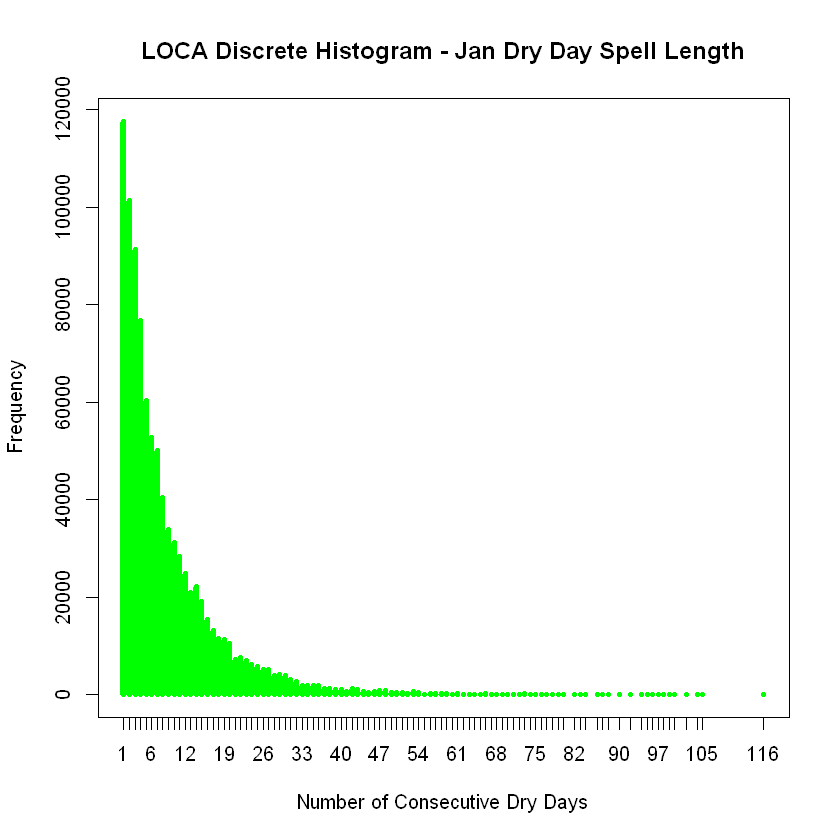

In [95]:
# our case is discrete so use this command
plot( table( dLOJan$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Jan Dry Day Spell Length", 
      col="green" )

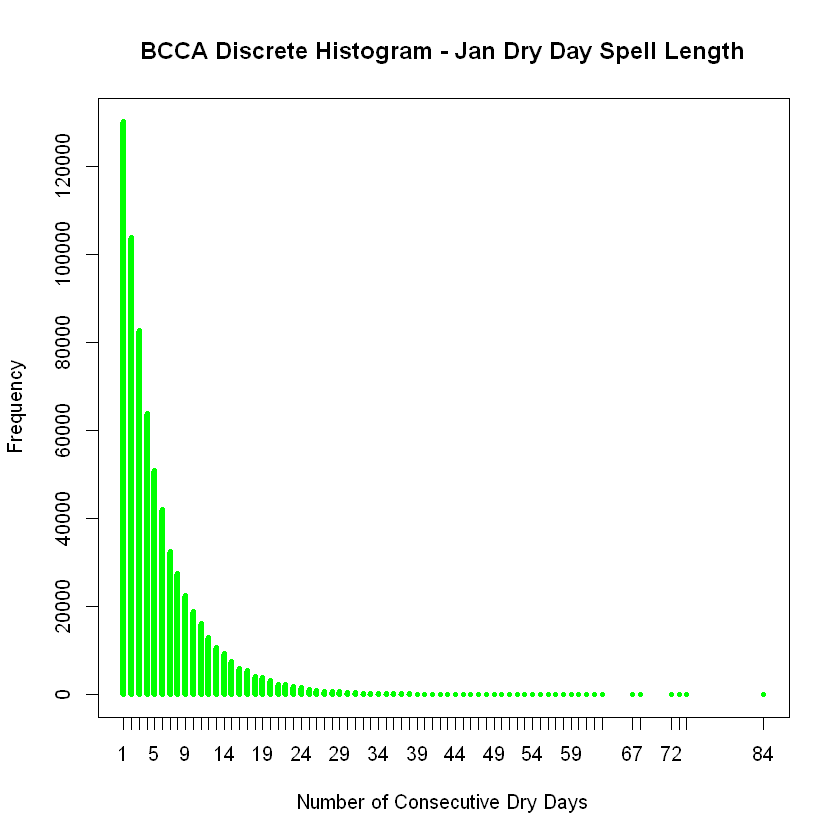

In [96]:
plot( table( dBCJan$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Jan Dry Day Spell Length", 
      col="green" )

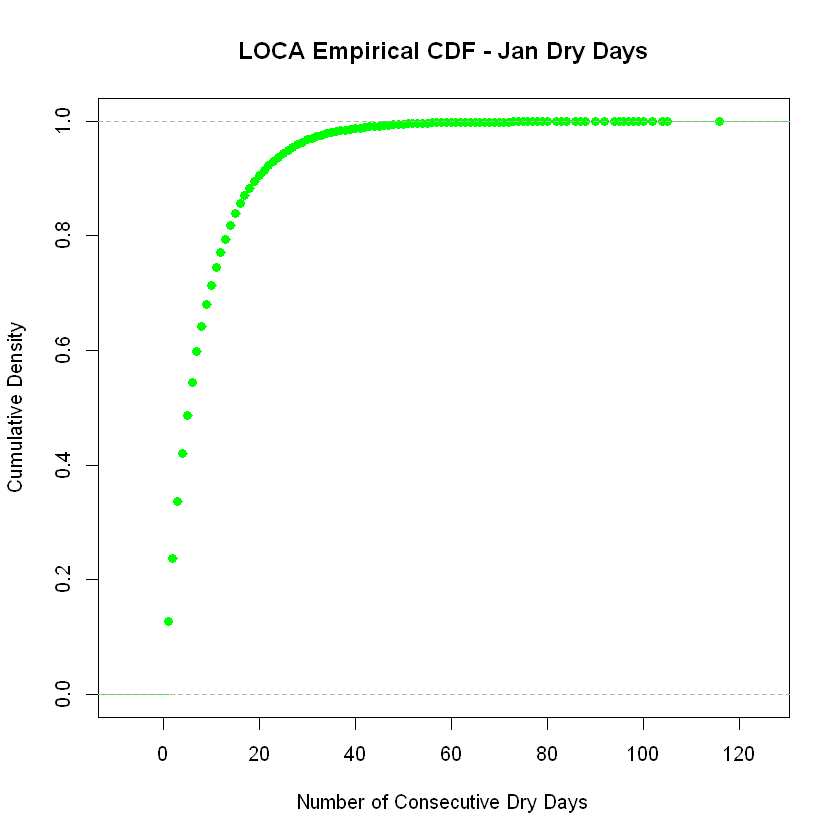

In [97]:
plot(ecdf(dLOJan$Dry_Count), main="LOCA Empirical CDF - Jan Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

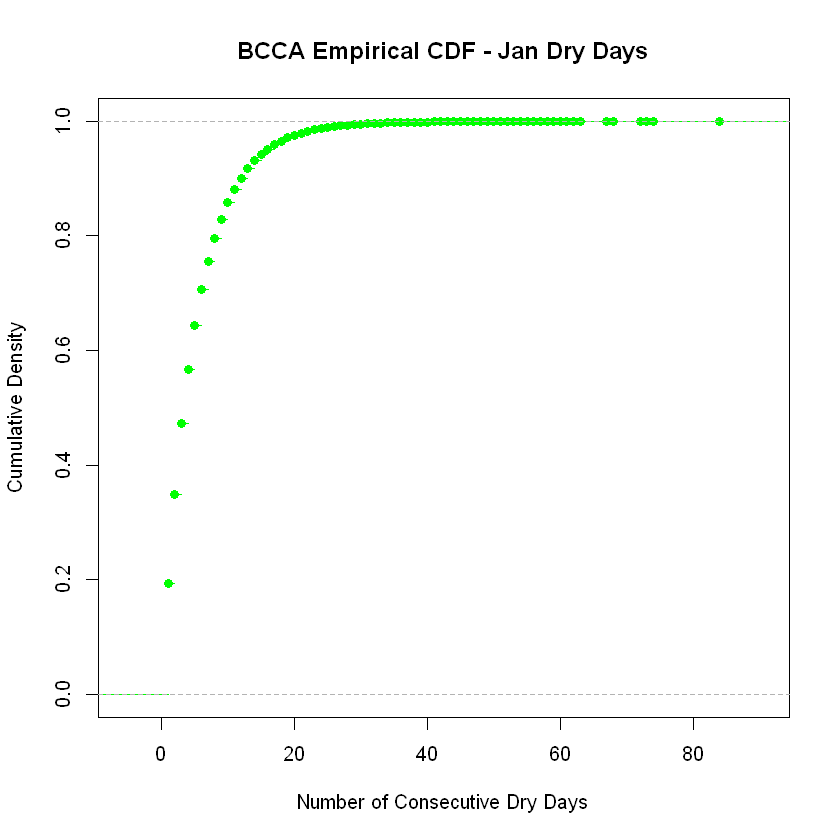

In [98]:
plot(ecdf(dBCJan$Dry_Count), main="BCCA Empirical CDF - Jan Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

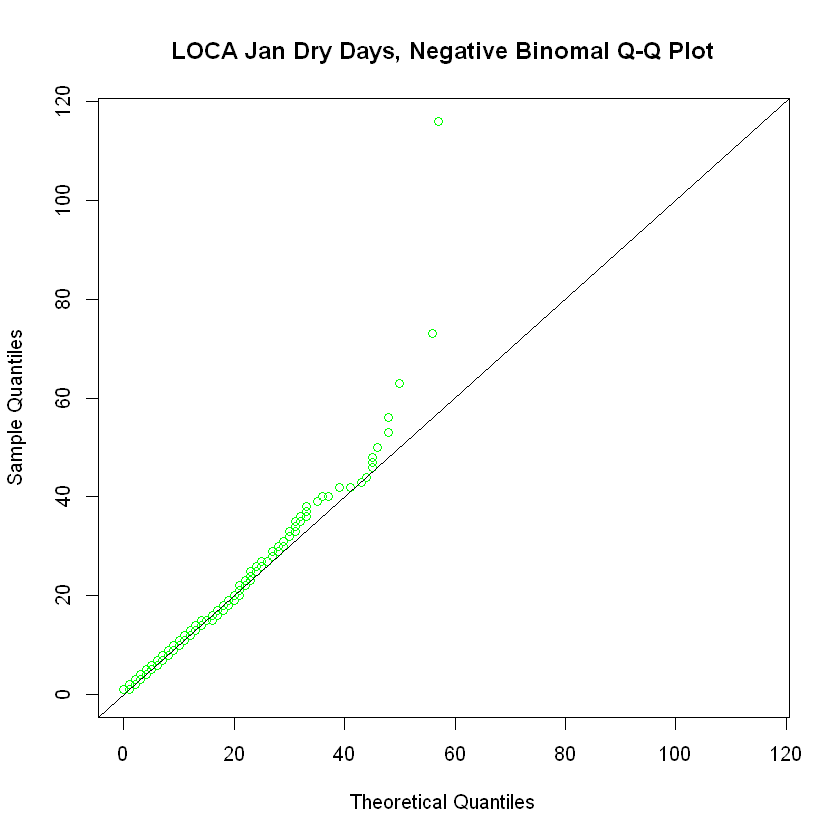

In [99]:
dLOJanMax <- max( dLOJan$Dry_Count )
dLOJanMean <- mean( dLOJan$Dry_Count )
dLOJanVar <- var( dLOJan$Dry_Count )
dLOJanBNr <- dLOJanMean^2 / (dLOJanVar - dLOJanMean)
dLOJanTstNB <- rnbinom( 1000, mu=dLOJanMean, size=dLOJanBNr )
qqplot( dLOJanTstNB, dLOJan$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Jan Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOJanMax), ylim=c(0,dLOJanMax) )
abline( 0, 1)

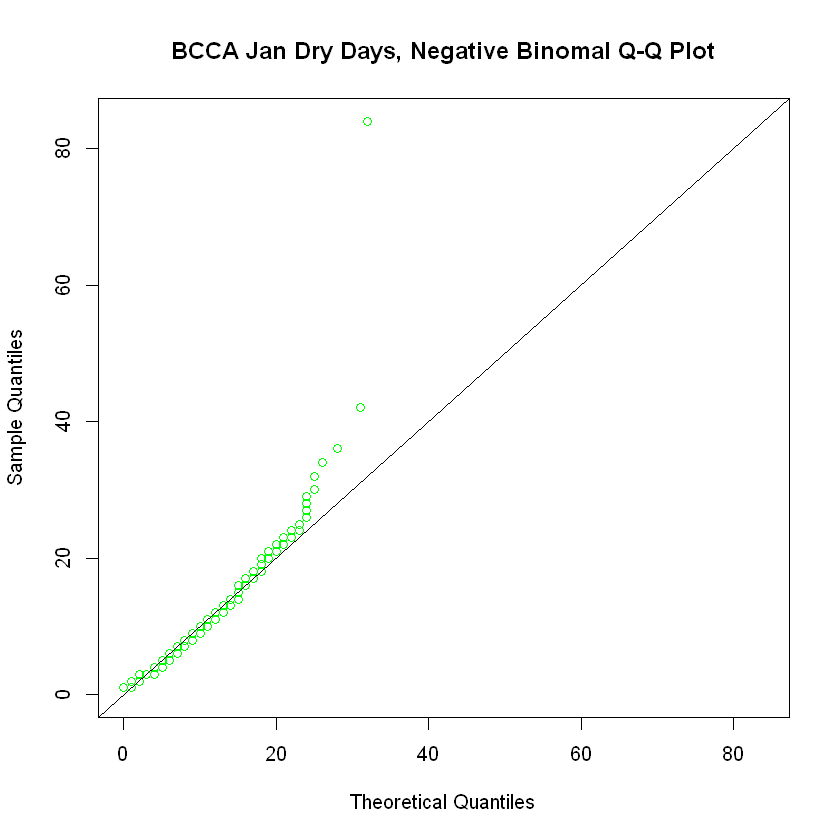

In [100]:
dBCJanMax <- max( dBCJan$Dry_Count )
dBCJanMean <- mean( dBCJan$Dry_Count )
dBCJanVar <- var( dBCJan$Dry_Count )
dBCJanBNr <- dBCJanMean^2 / (dBCJanVar - dBCJanMean)
dBCJanTstNB <- rnbinom( 1000, mu=dBCJanMean, size=dBCJanBNr )
qqplot( dBCJanTstNB, dBCJan$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Jan Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCJanMax), ylim=c(0,dBCJanMax) )
abline( 0, 1)

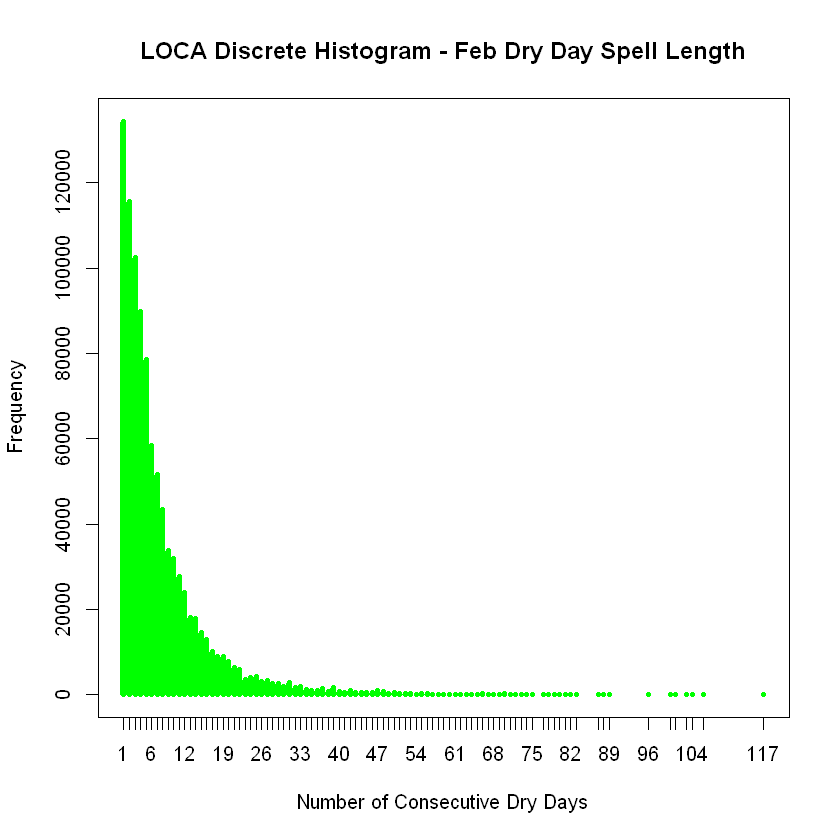

In [101]:
# our case is discrete so use this command
plot( table( dLOFeb$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Feb Dry Day Spell Length", 
      col="green" )

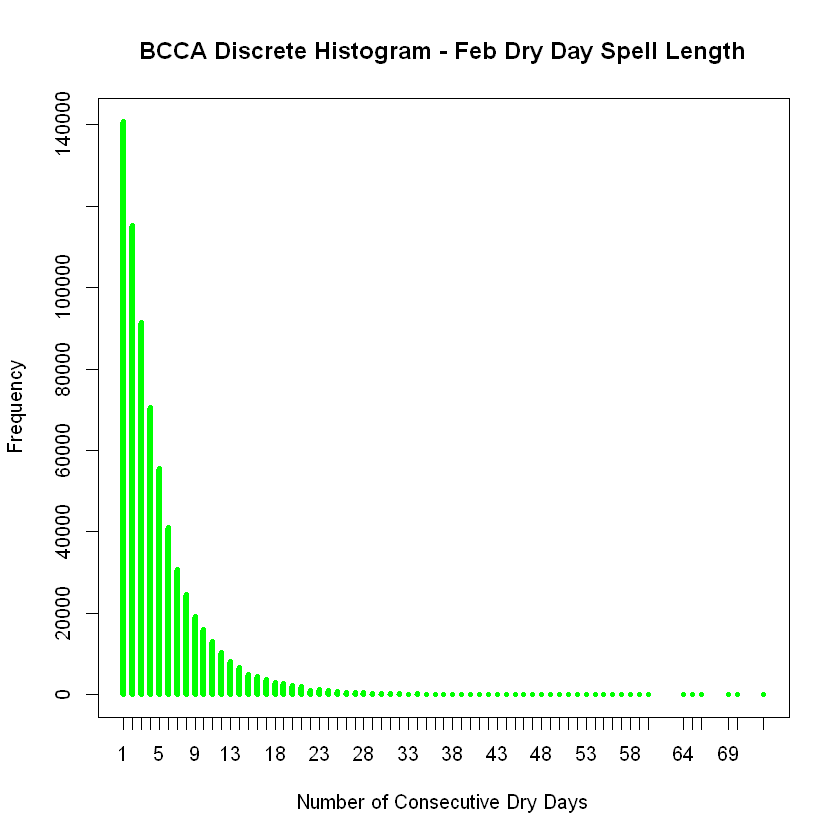

In [102]:
plot( table( dBCFeb$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Feb Dry Day Spell Length", 
      col="green" )

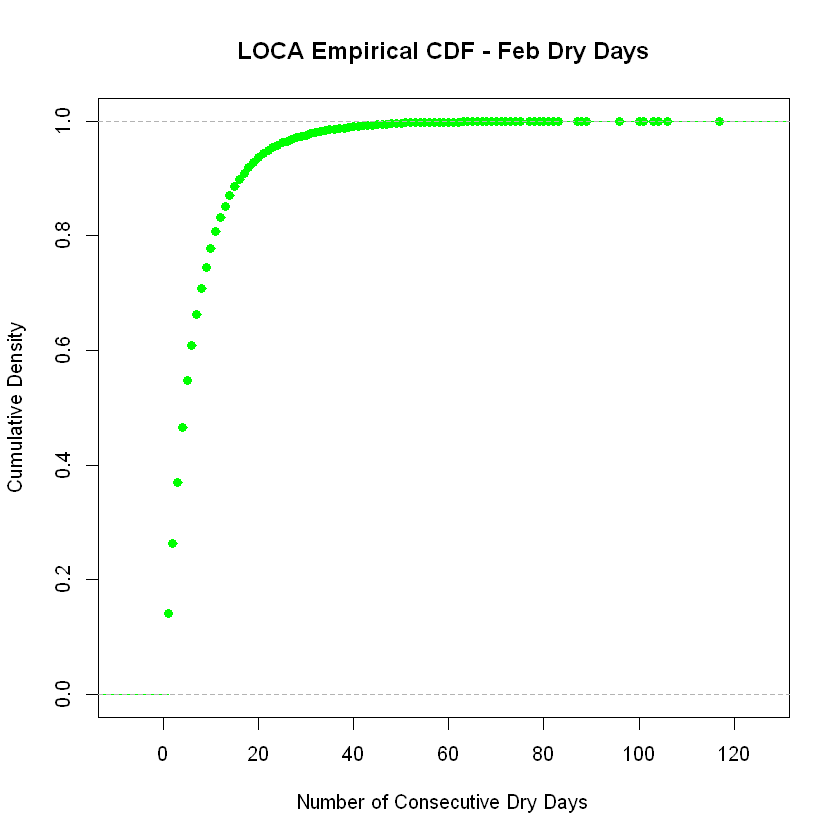

In [103]:
plot(ecdf(dLOFeb$Dry_Count), main="LOCA Empirical CDF - Feb Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

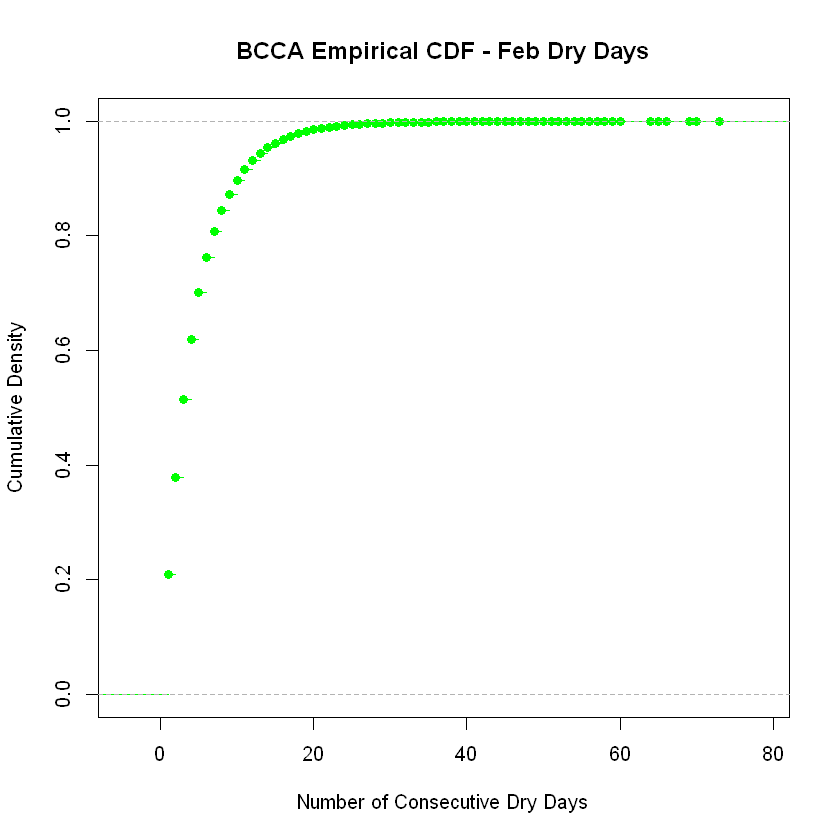

In [104]:
plot(ecdf(dBCFeb$Dry_Count), main="BCCA Empirical CDF - Feb Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

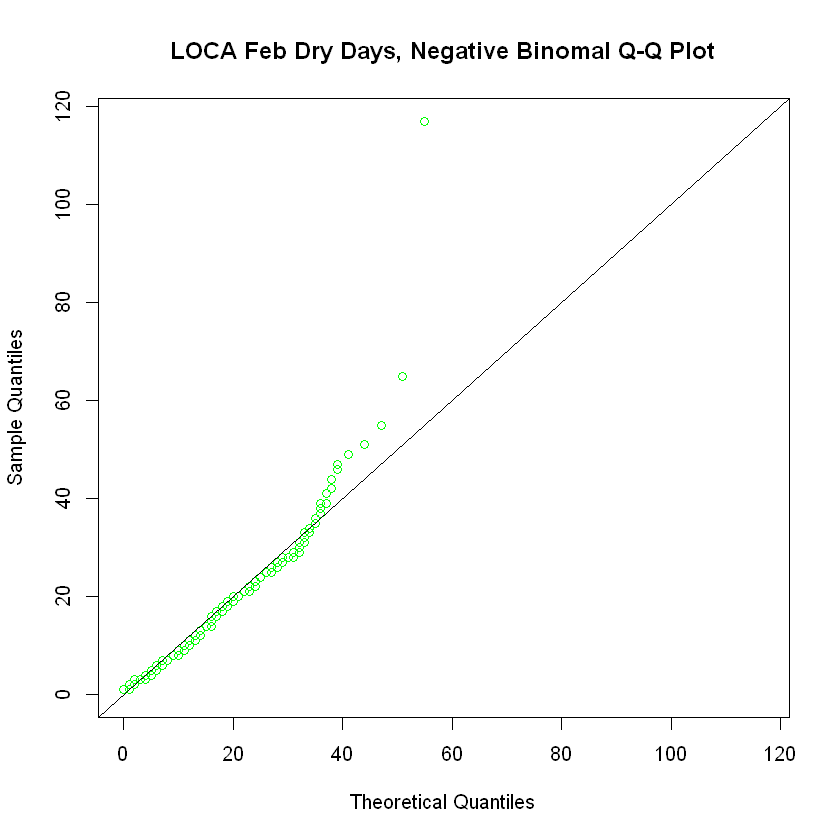

In [105]:
dLOFebMax <- max( dLOFeb$Dry_Count )
dLOFebMean <- mean( dLOFeb$Dry_Count )
dLOFebVar <- var( dLOFeb$Dry_Count )
dLOFebBNr <- dLOFebMean^2 / (dLOFebVar - dLOFebMean)
dLOFebTstNB <- rnbinom( 1000, mu=dLOFebMean, size=dLOFebBNr )
qqplot( dLOFebTstNB, dLOFeb$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Feb Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOFebMax), ylim=c(0,dLOFebMax) )
abline( 0, 1)

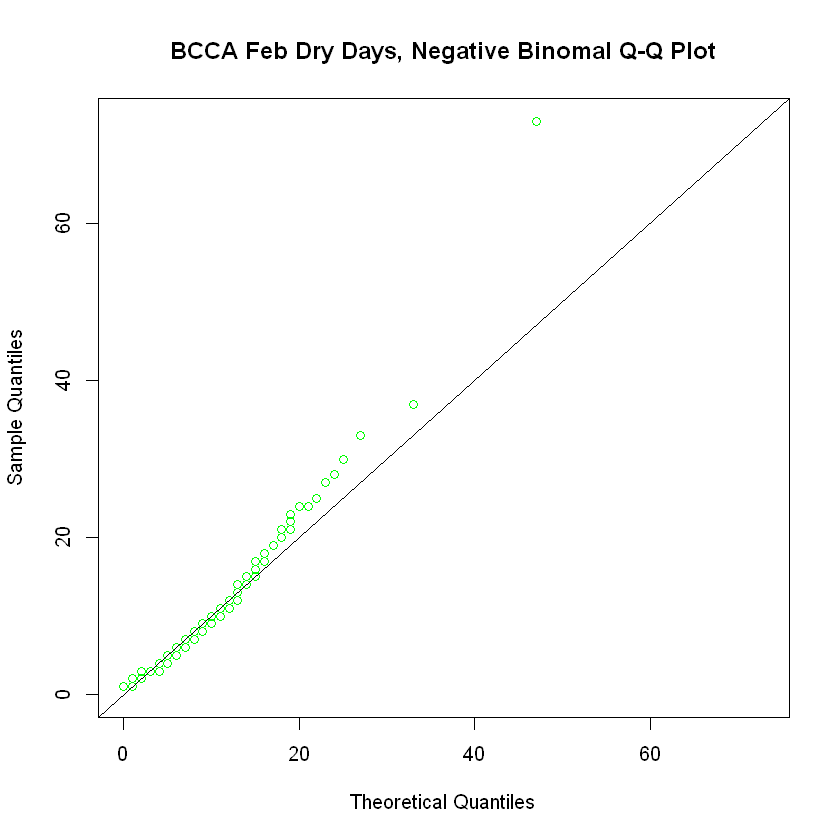

In [106]:
dBCFebMax <- max( dBCFeb$Dry_Count )
dBCFebMean <- mean( dBCFeb$Dry_Count )
dBCFebVar <- var( dBCFeb$Dry_Count )
dBCFebBNr <- dBCFebMean^2 / (dBCFebVar - dBCFebMean)
dBCFebTstNB <- rnbinom( 1000, mu=dBCFebMean, size=dBCFebBNr )
qqplot( dBCFebTstNB, dBCFeb$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Feb Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCFebMax), ylim=c(0,dBCFebMax) )
abline( 0, 1)

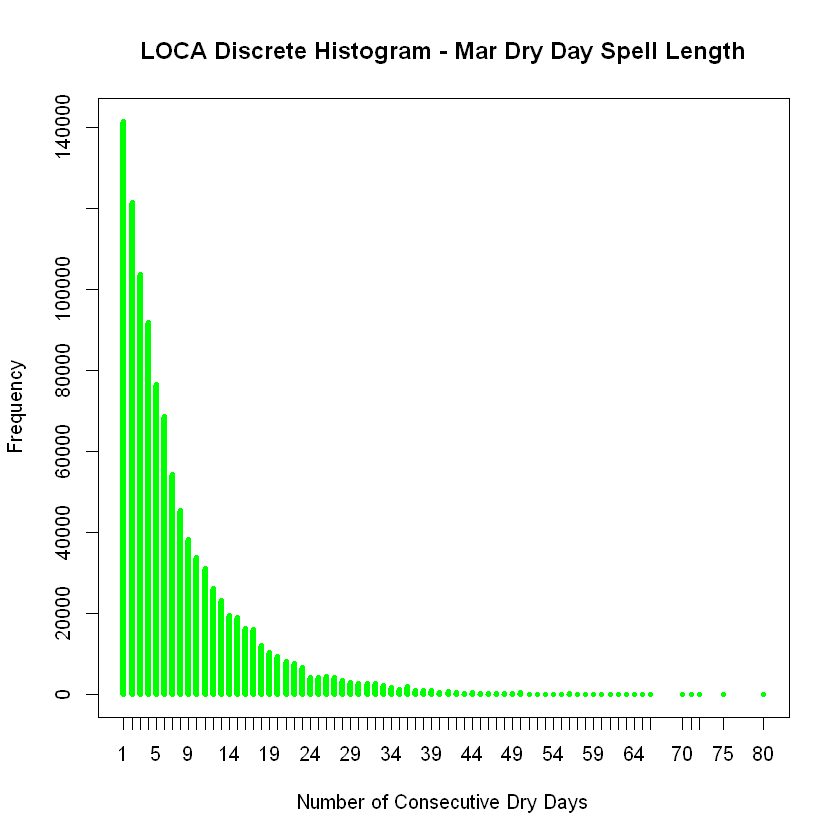

In [107]:
# our case is discrete so use this command
plot( table( dLOMar$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Mar Dry Day Spell Length", 
      col="green" )

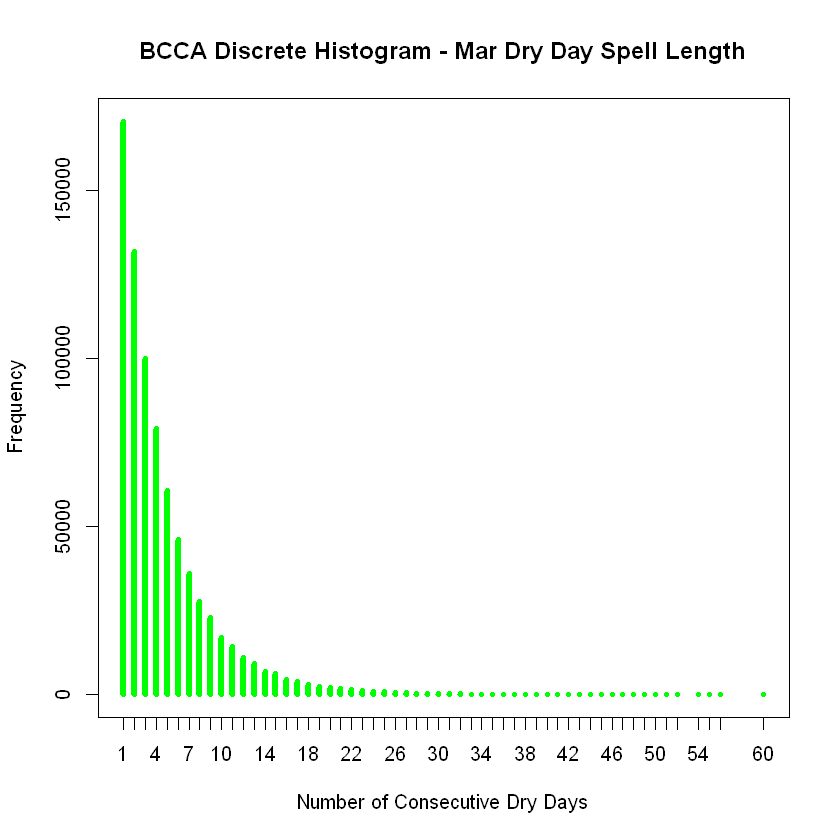

In [108]:
plot( table( dBCMar$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Mar Dry Day Spell Length", 
      col="green" )

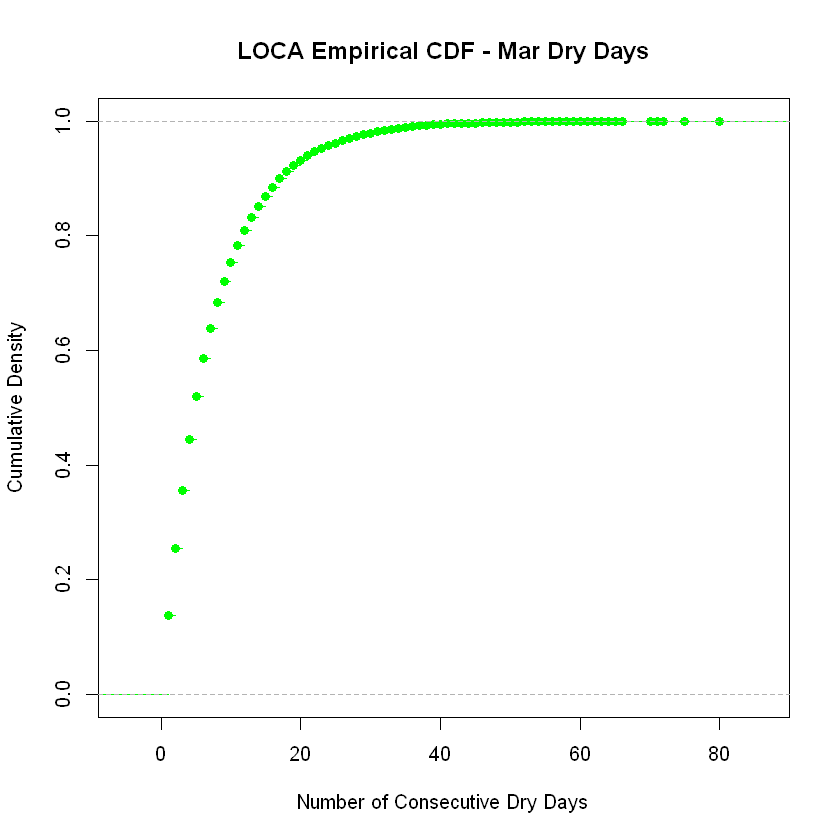

In [109]:
plot(ecdf(dLOMar$Dry_Count), main="LOCA Empirical CDF - Mar Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

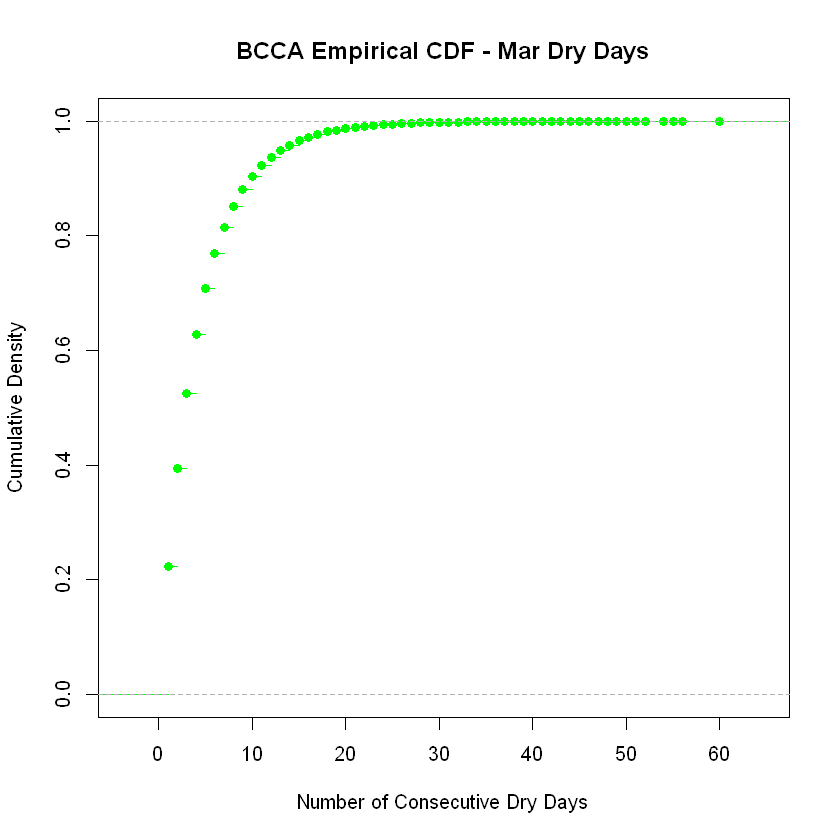

In [110]:
plot(ecdf(dBCMar$Dry_Count), main="BCCA Empirical CDF - Mar Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

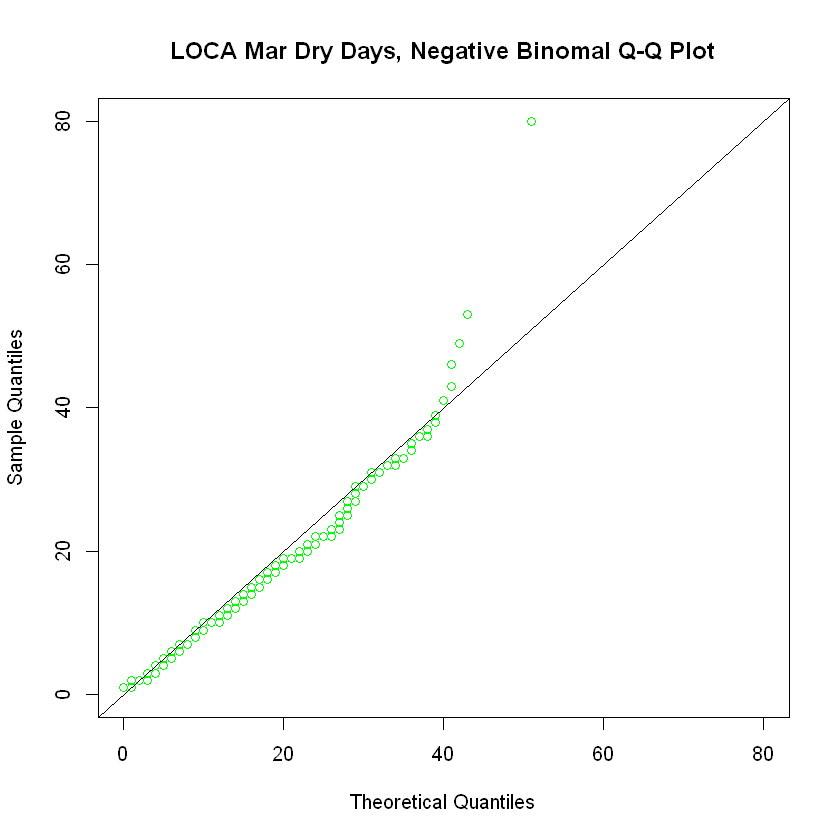

In [111]:
dLOMarMax <- max( dLOMar$Dry_Count )
dLOMarMean <- mean( dLOMar$Dry_Count )
dLOMarVar <- var( dLOMar$Dry_Count )
dLOMarBNr <- dLOMarMean^2 / (dLOMarVar - dLOMarMean)
dLOMarTstNB <- rnbinom( 1000, mu=dLOMarMean, size=dLOMarBNr )
qqplot( dLOMarTstNB, dLOMar$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Mar Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOMarMax), ylim=c(0,dLOMarMax) )
abline( 0, 1)

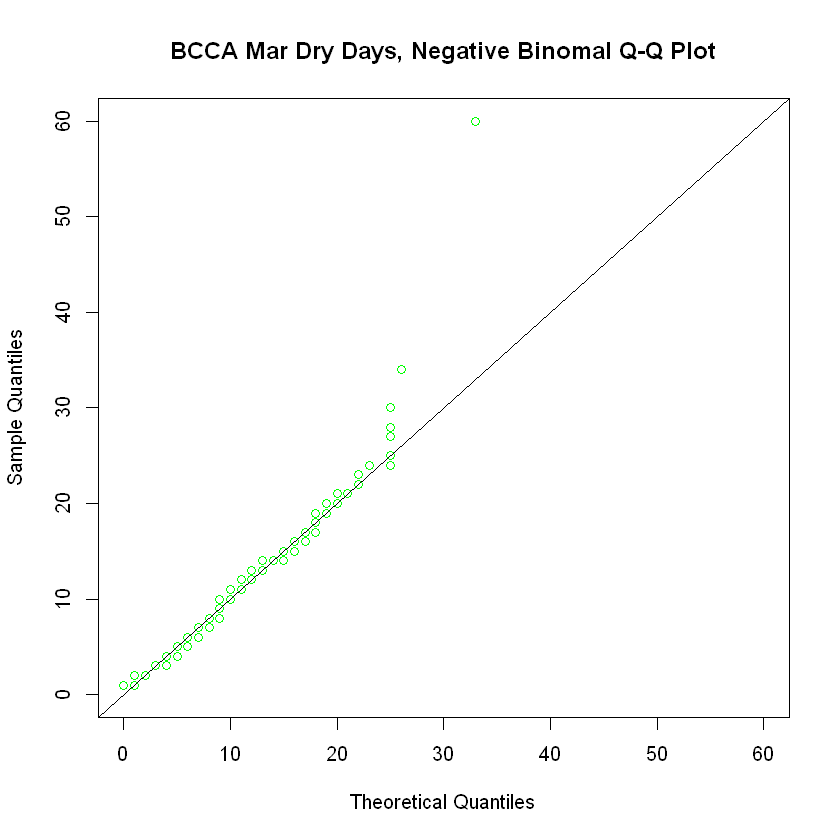

In [112]:
dBCMarMax <- max( dBCMar$Dry_Count )
dBCMarMean <- mean( dBCMar$Dry_Count )
dBCMarVar <- var( dBCMar$Dry_Count )
dBCMarBNr <- dBCMarMean^2 / (dBCMarVar - dBCMarMean)
dBCMarTstNB <- rnbinom( 1000, mu=dBCMarMean, size=dBCMarBNr )
qqplot( dBCMarTstNB, dBCMar$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Mar Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCMarMax), ylim=c(0,dBCMarMax) )
abline( 0, 1)

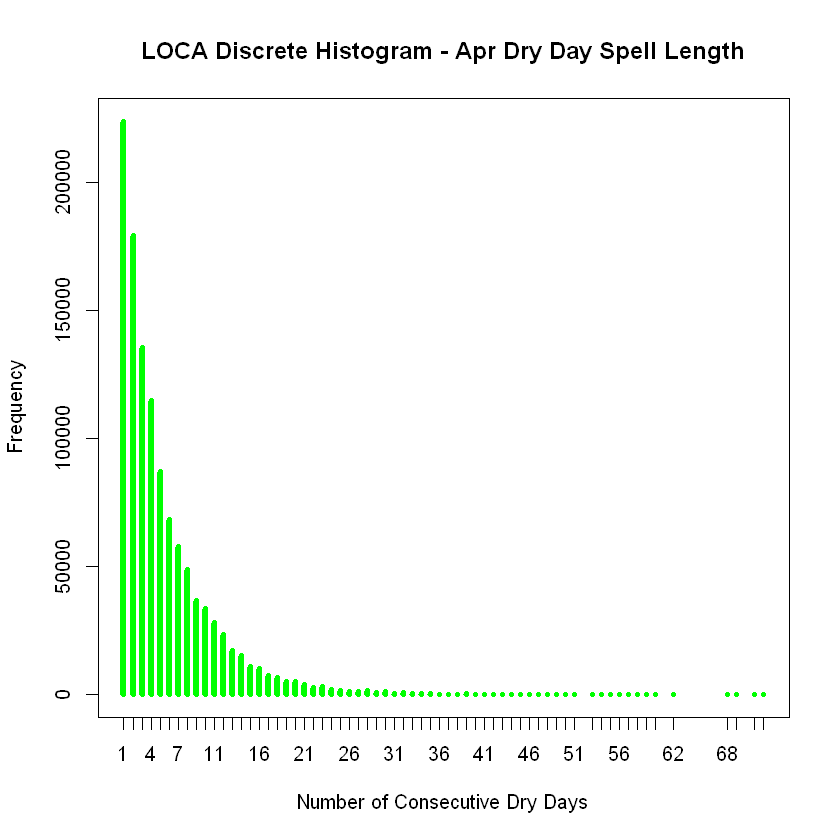

In [113]:
# our case is discrete so use this command
plot( table( dLOApr$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Apr Dry Day Spell Length", 
      col="green" )

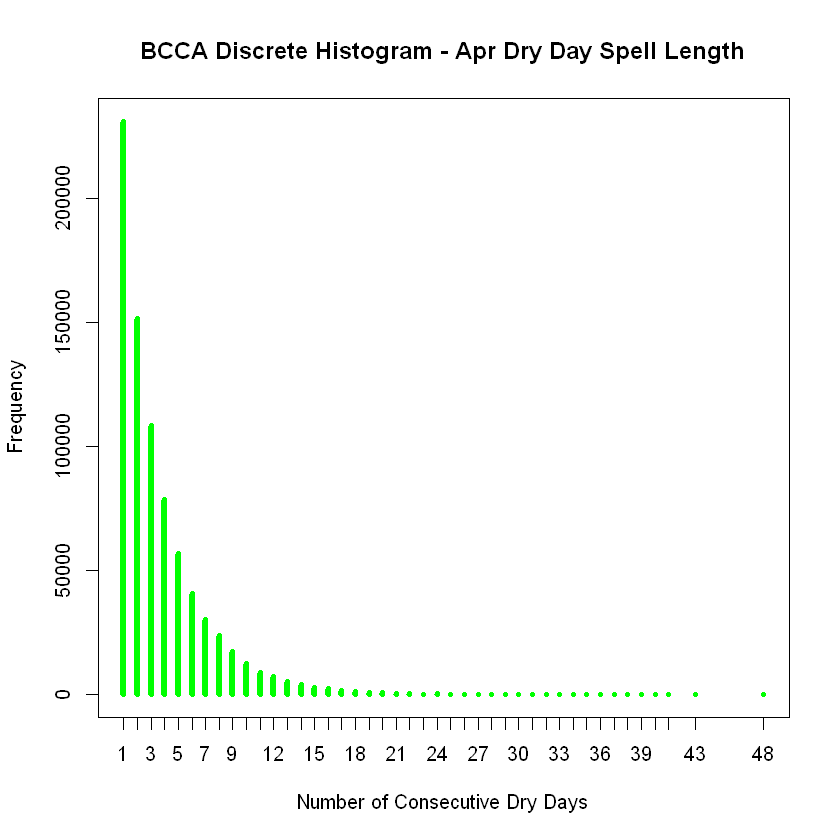

In [114]:
plot( table( dBCApr$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Apr Dry Day Spell Length", 
      col="green" )

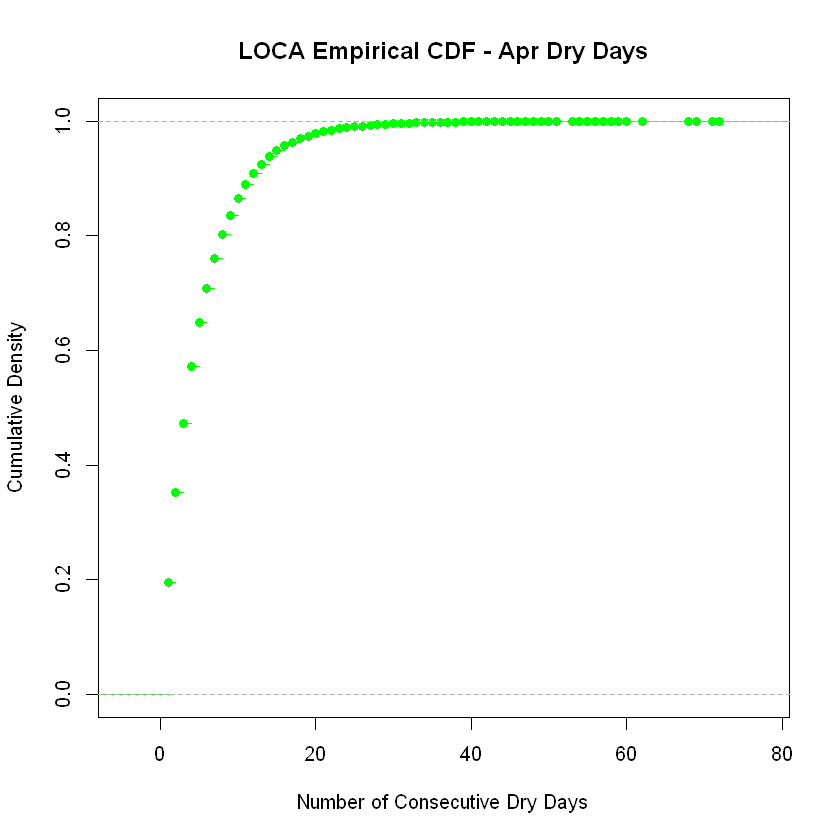

In [115]:
plot(ecdf(dLOApr$Dry_Count), main="LOCA Empirical CDF - Apr Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

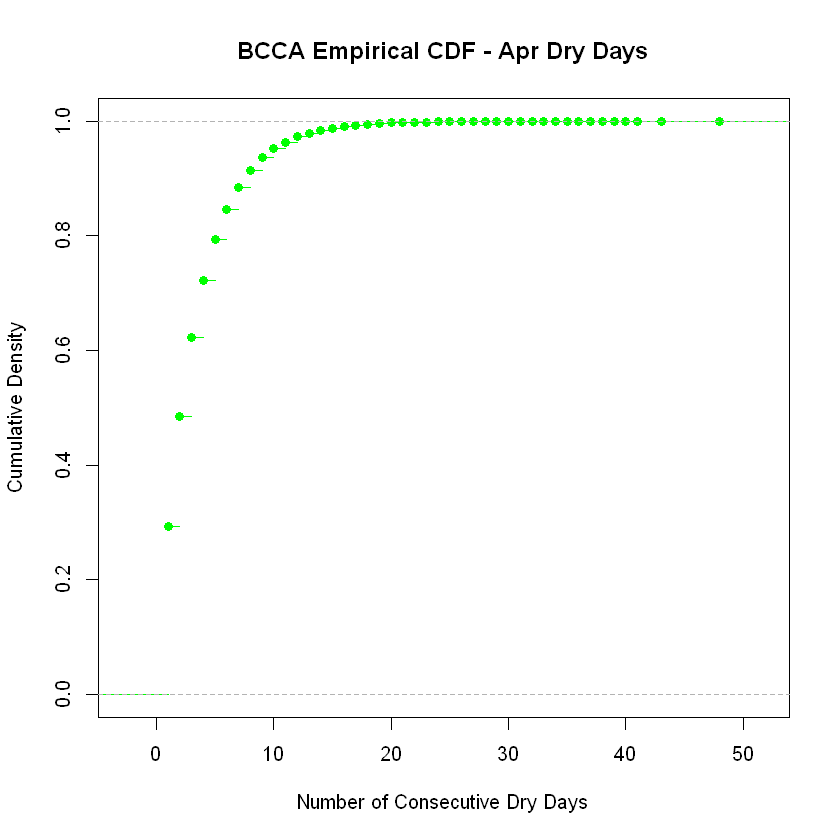

In [116]:
plot(ecdf(dBCApr$Dry_Count), main="BCCA Empirical CDF - Apr Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

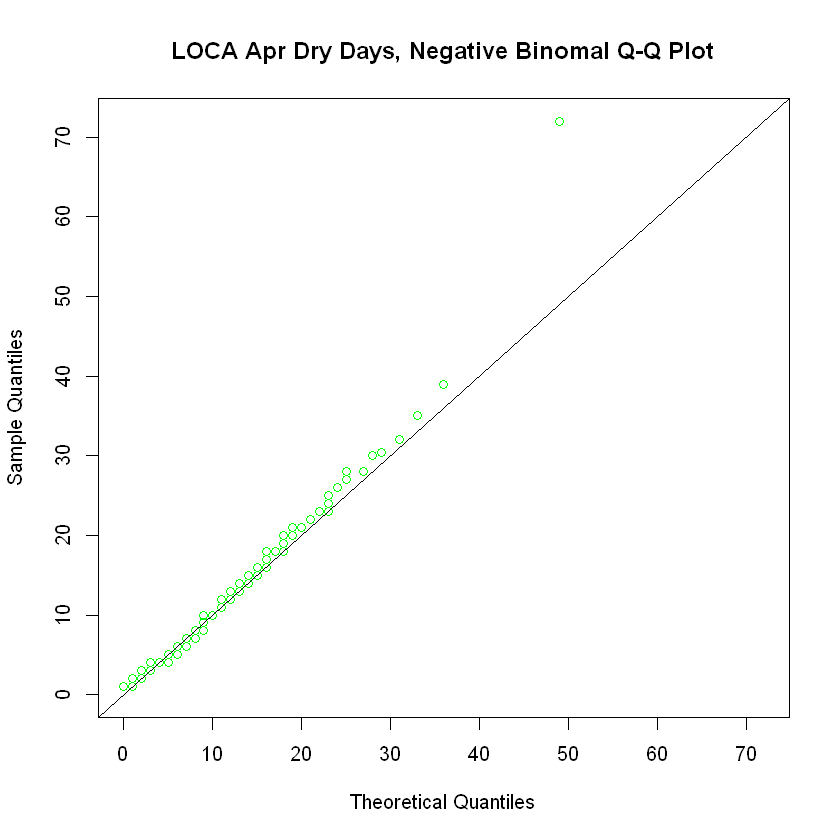

In [117]:
dLOAprMax <- max( dLOApr$Dry_Count )
dLOAprMean <- mean( dLOApr$Dry_Count )
dLOAprVar <- var( dLOApr$Dry_Count )
dLOAprBNr <- dLOAprMean^2 / (dLOAprVar - dLOAprMean)
dLOAprTstNB <- rnbinom( 1000, mu=dLOAprMean, size=dLOAprBNr )
qqplot( dLOAprTstNB, dLOApr$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Apr Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOAprMax), ylim=c(0,dLOAprMax) )
abline( 0, 1)

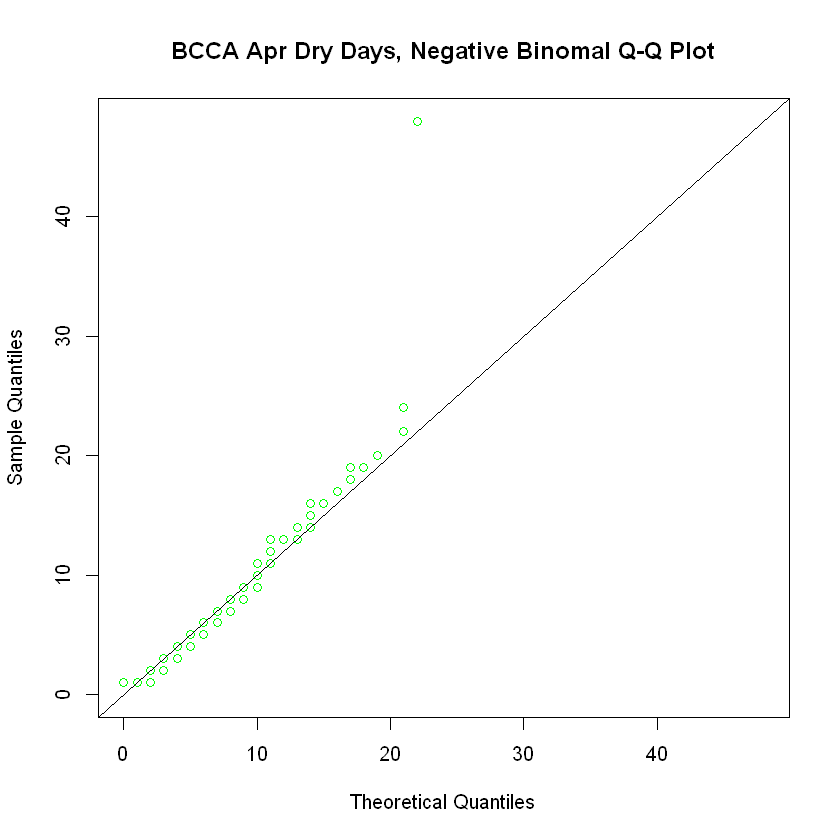

In [118]:
dBCAprMax <- max( dBCApr$Dry_Count )
dBCAprMean <- mean( dBCApr$Dry_Count )
dBCAprVar <- var( dBCApr$Dry_Count )
dBCAprBNr <- dBCAprMean^2 / (dBCAprVar - dBCAprMean)
dBCAprTstNB <- rnbinom( 1000, mu=dBCAprMean, size=dBCAprBNr )
qqplot( dBCAprTstNB, dBCApr$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Apr Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCAprMax), ylim=c(0,dBCAprMax) )
abline( 0, 1)

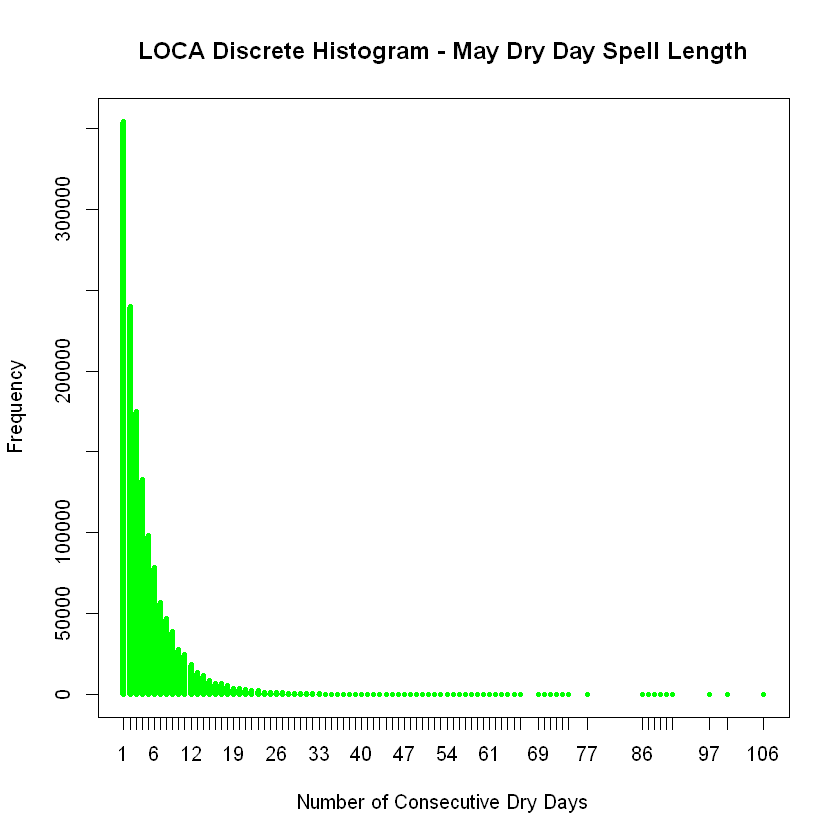

In [119]:
# our case is discrete so use this command
plot( table( dLOMay$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - May Dry Day Spell Length", 
      col="green" )

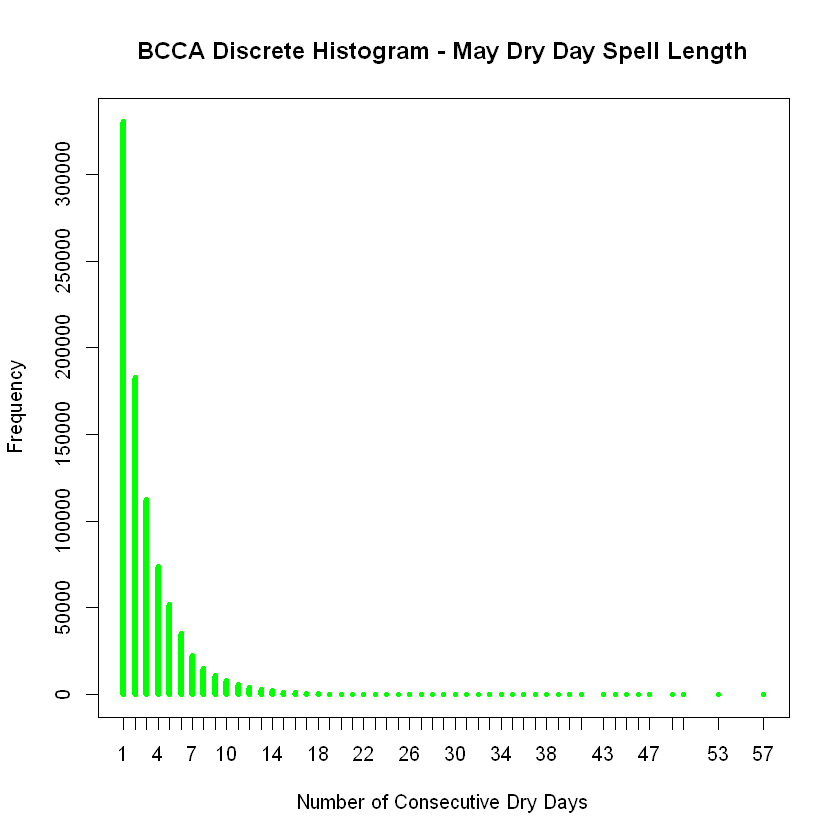

In [120]:
plot( table( dBCMay$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - May Dry Day Spell Length", 
      col="green" )

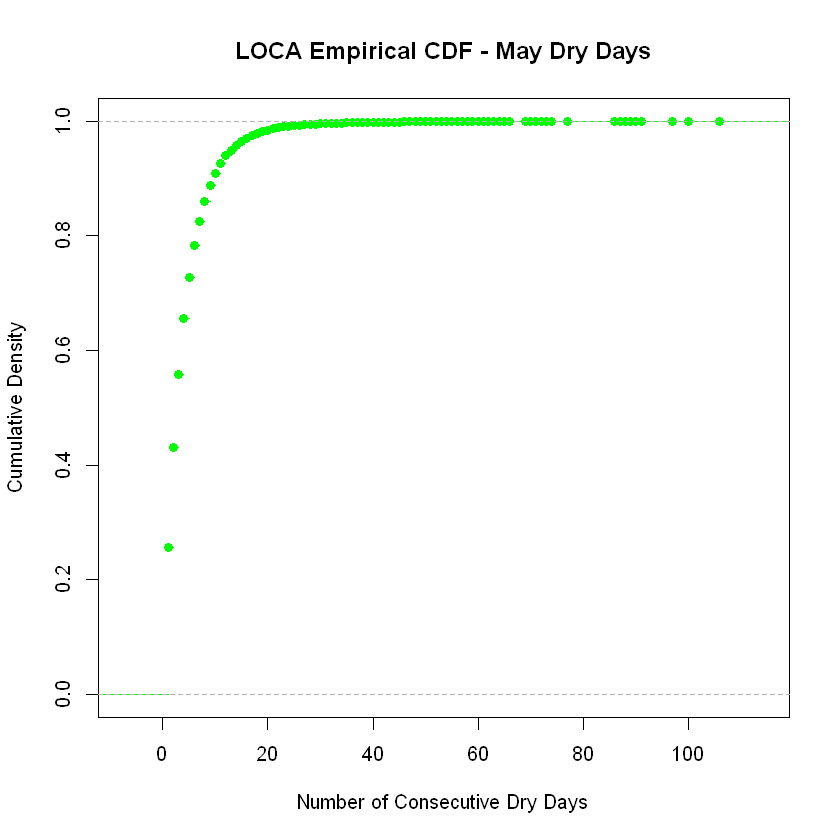

In [121]:
plot(ecdf(dLOMay$Dry_Count), main="LOCA Empirical CDF - May Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

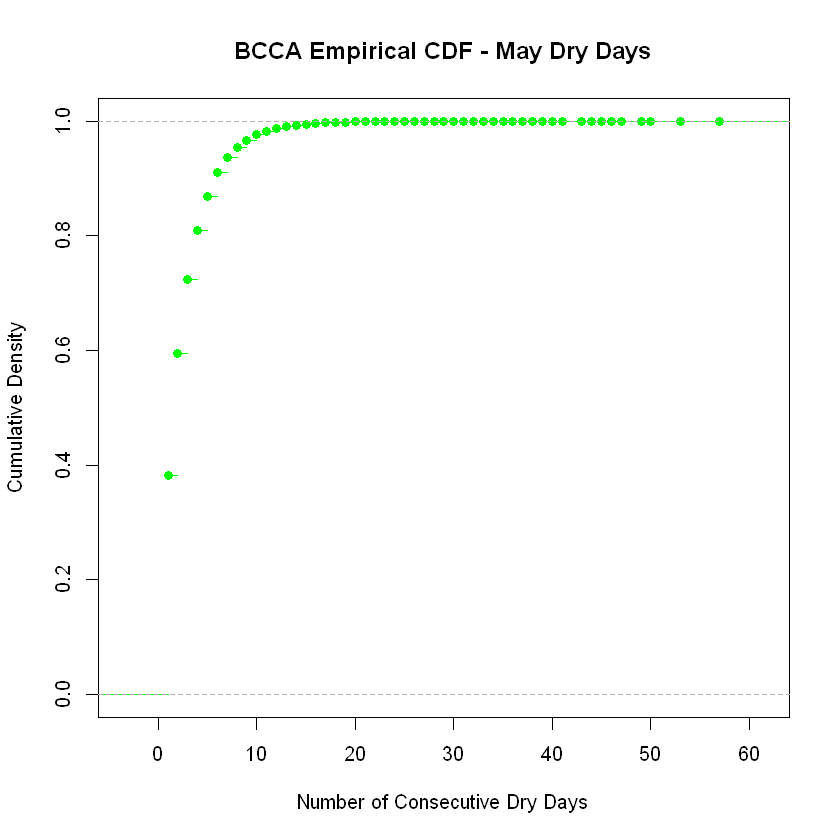

In [122]:
plot(ecdf(dBCMay$Dry_Count), main="BCCA Empirical CDF - May Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

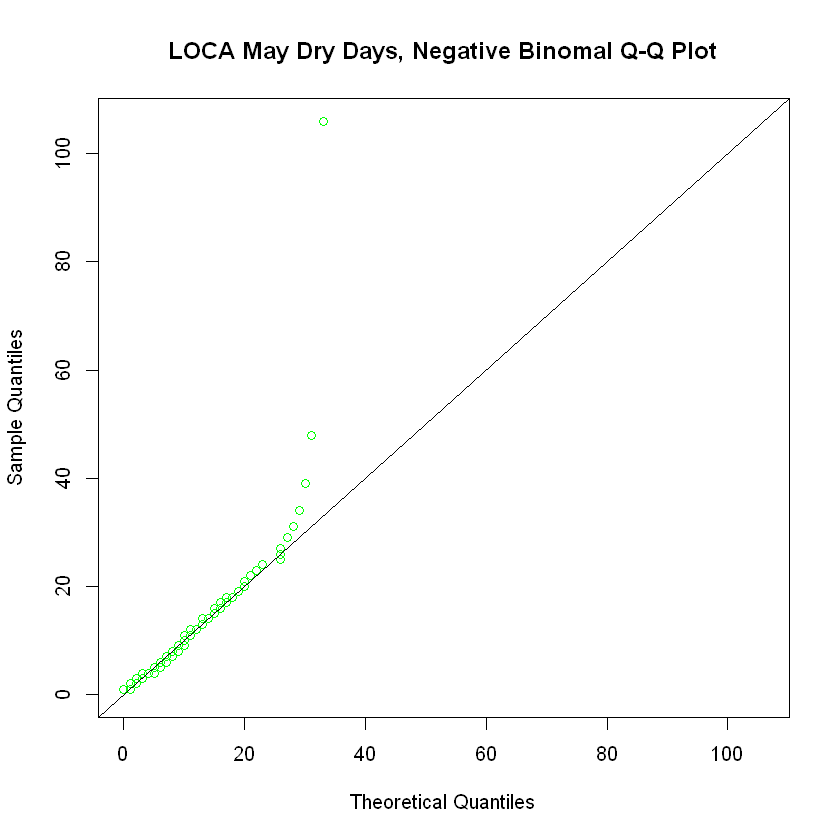

In [123]:
dLOMayMax <- max( dLOMay$Dry_Count )
dLOMayMean <- mean( dLOMay$Dry_Count )
dLOMayVar <- var( dLOMay$Dry_Count )
dLOMayBNr <- dLOMayMean^2 / (dLOMayVar - dLOMayMean)
dLOMayTstNB <- rnbinom( 1000, mu=dLOMayMean, size=dLOMayBNr )
qqplot( dLOMayTstNB, dLOMay$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA May Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOMayMax), ylim=c(0,dLOMayMax) )
abline( 0, 1)

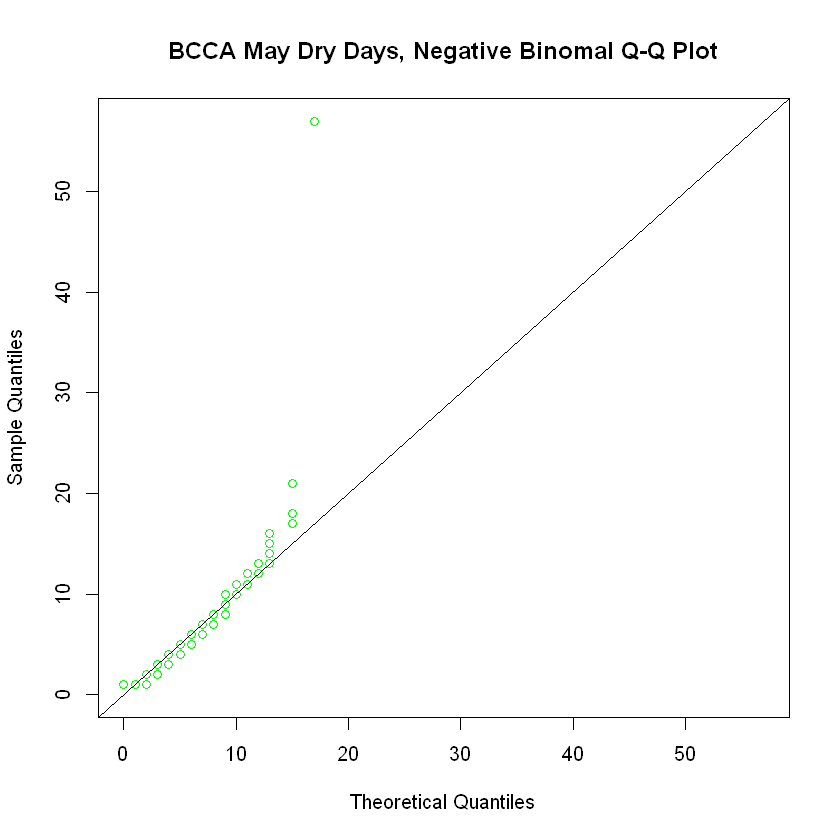

In [124]:
dBCMayMax <- max( dBCMay$Dry_Count )
dBCMayMean <- mean( dBCMay$Dry_Count )
dBCMayVar <- var( dBCMay$Dry_Count )
dBCMayBNr <- dBCMayMean^2 / (dBCMayVar - dBCMayMean)
dBCMayTstNB <- rnbinom( 1000, mu=dBCMayMean, size=dBCMayBNr )
qqplot( dBCMayTstNB, dBCMay$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA May Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCMayMax), ylim=c(0,dBCMayMax) )
abline( 0, 1)

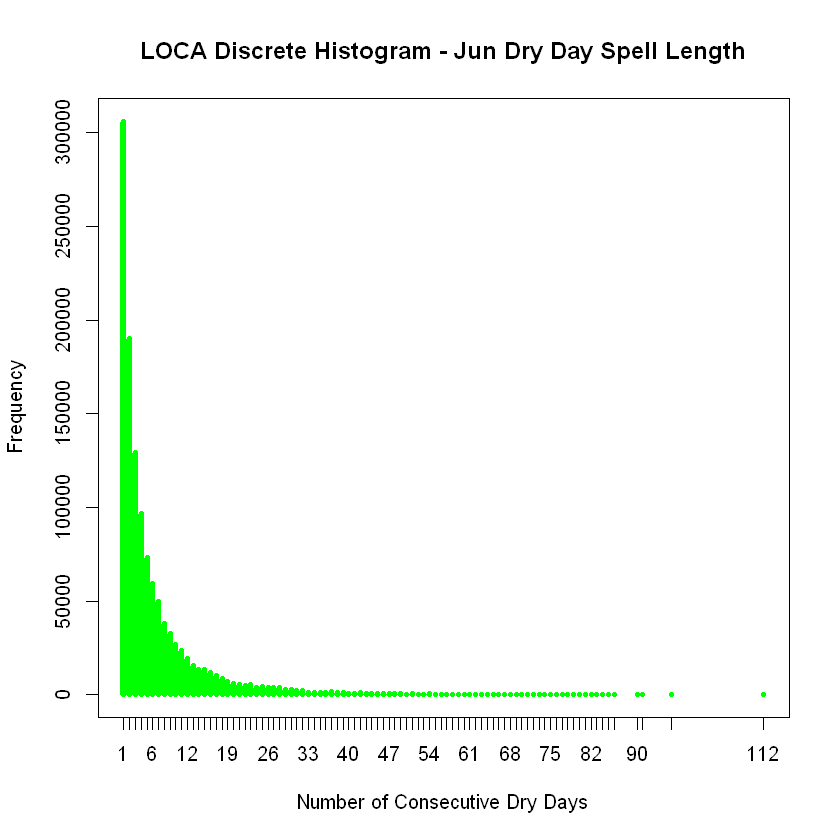

In [125]:
# our case is discrete so use this command
plot( table( dLOJun$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Jun Dry Day Spell Length", 
      col="green" )

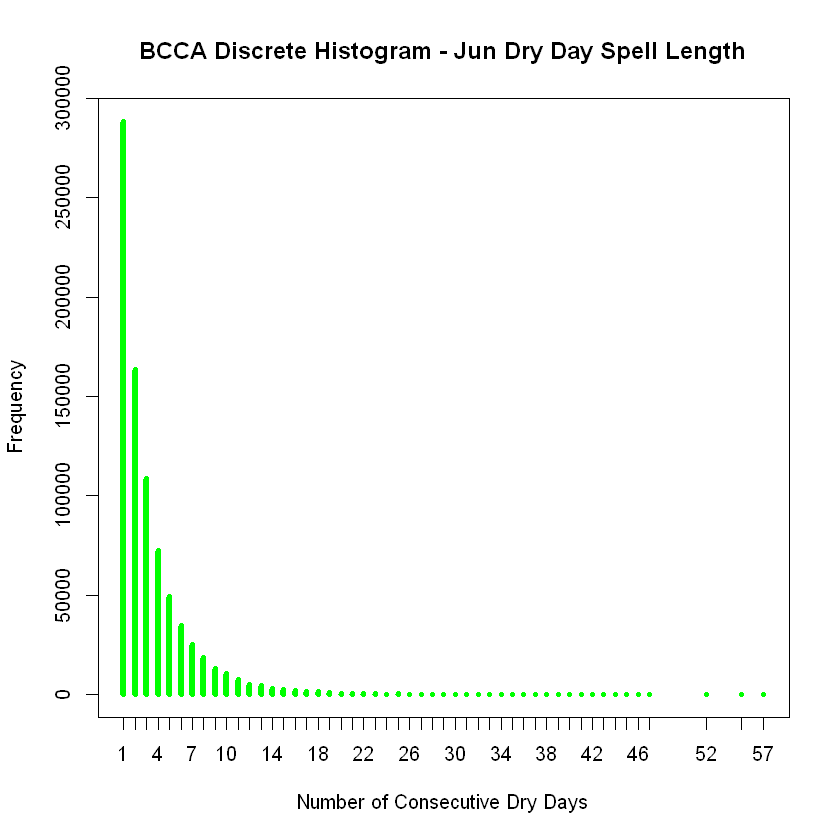

In [126]:
plot( table( dBCJun$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Jun Dry Day Spell Length", 
      col="green" )

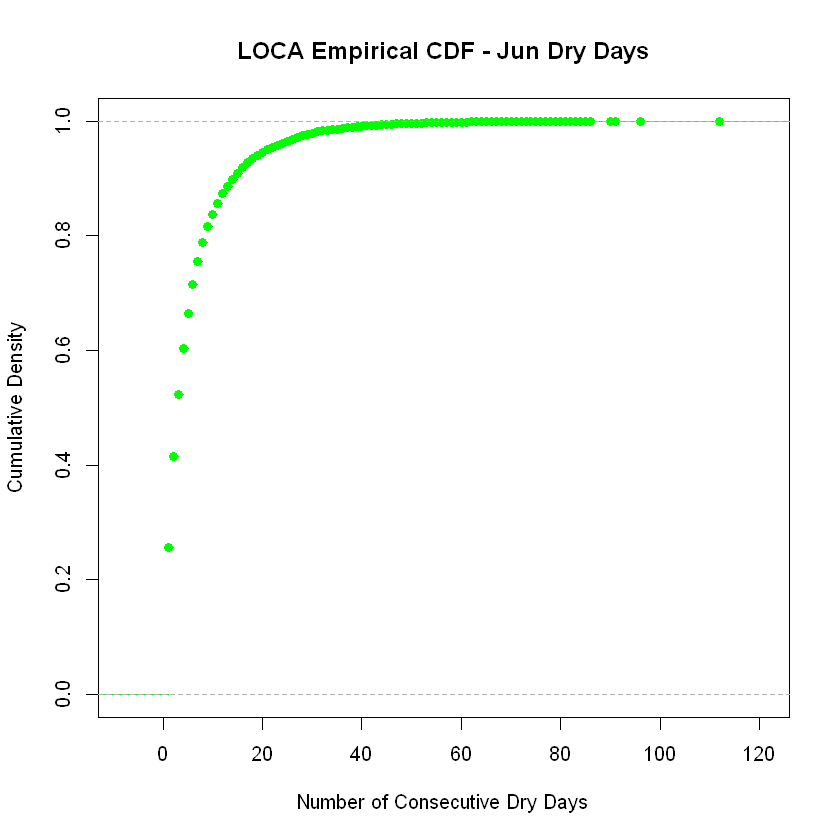

In [127]:
plot(ecdf(dLOJun$Dry_Count), main="LOCA Empirical CDF - Jun Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

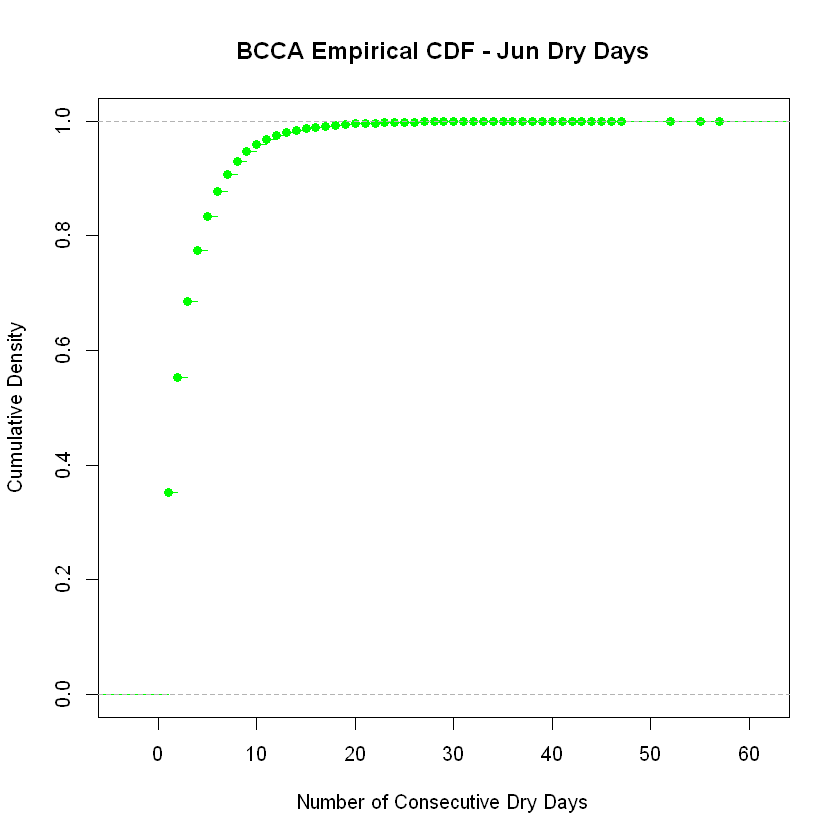

In [128]:
plot(ecdf(dBCJun$Dry_Count), main="BCCA Empirical CDF - Jun Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

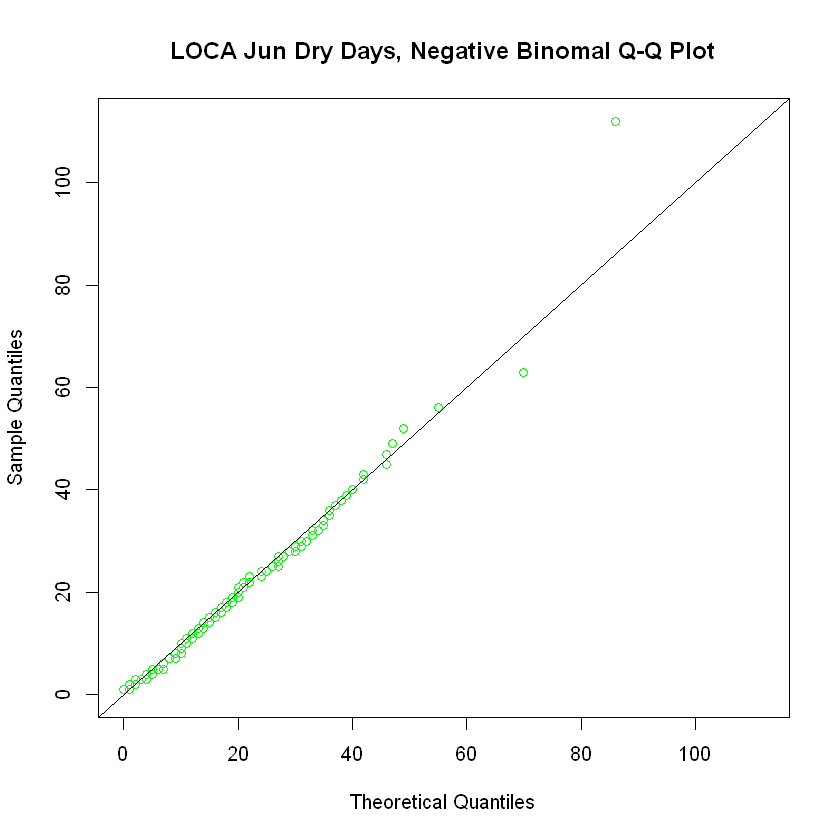

In [129]:
dLOJunMax <- max( dLOJun$Dry_Count )
dLOJunMean <- mean( dLOJun$Dry_Count )
dLOJunVar <- var( dLOJun$Dry_Count )
dLOJunBNr <- dLOJunMean^2 / (dLOJunVar - dLOJunMean)
dLOJunTstNB <- rnbinom( 1000, mu=dLOJunMean, size=dLOJunBNr )
qqplot( dLOJunTstNB, dLOJun$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Jun Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOJunMax), ylim=c(0,dLOJunMax) )
abline( 0, 1)

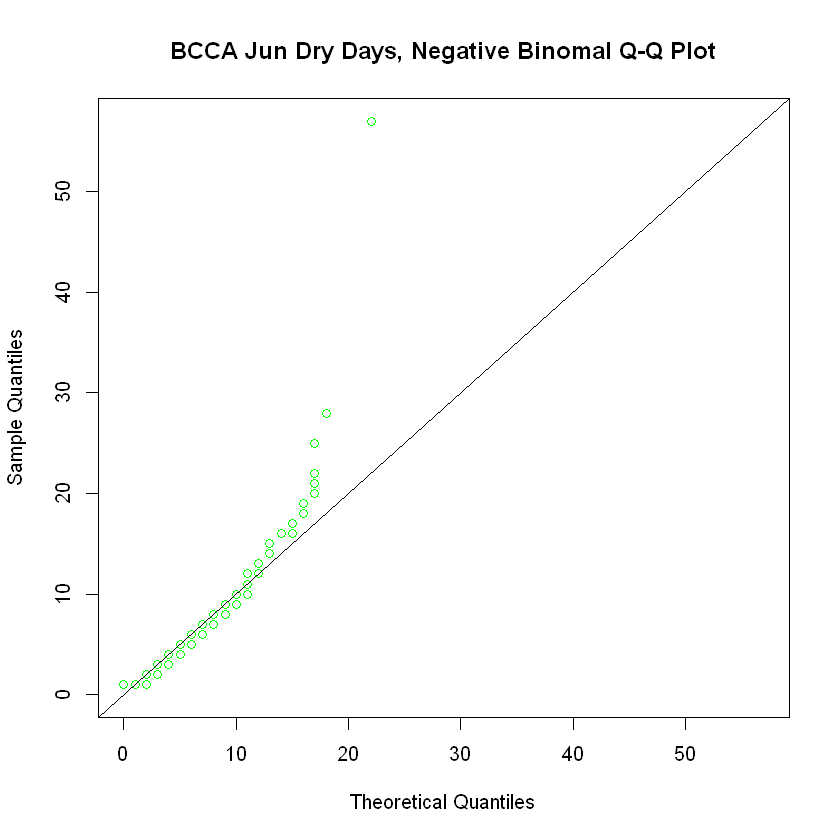

In [130]:
dBCJunMax <- max( dBCJun$Dry_Count )
dBCJunMean <- mean( dBCJun$Dry_Count )
dBCJunVar <- var( dBCJun$Dry_Count )
dBCJunBNr <- dBCJunMean^2 / (dBCJunVar - dBCJunMean)
dBCJunTstNB <- rnbinom( 1000, mu=dBCJunMean, size=dBCJunBNr )
qqplot( dBCJunTstNB, dBCJun$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Jun Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCJunMax), ylim=c(0,dBCJunMax) )
abline( 0, 1)

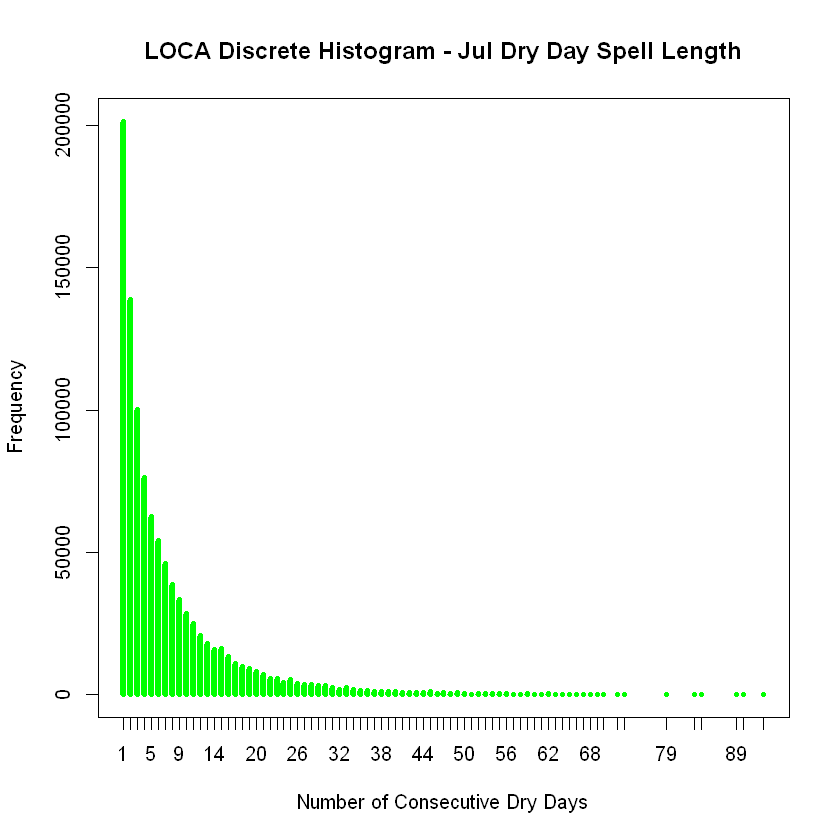

In [131]:
# our case is discrete so use this command
plot( table( dLOJul$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Jul Dry Day Spell Length", 
      col="green" )

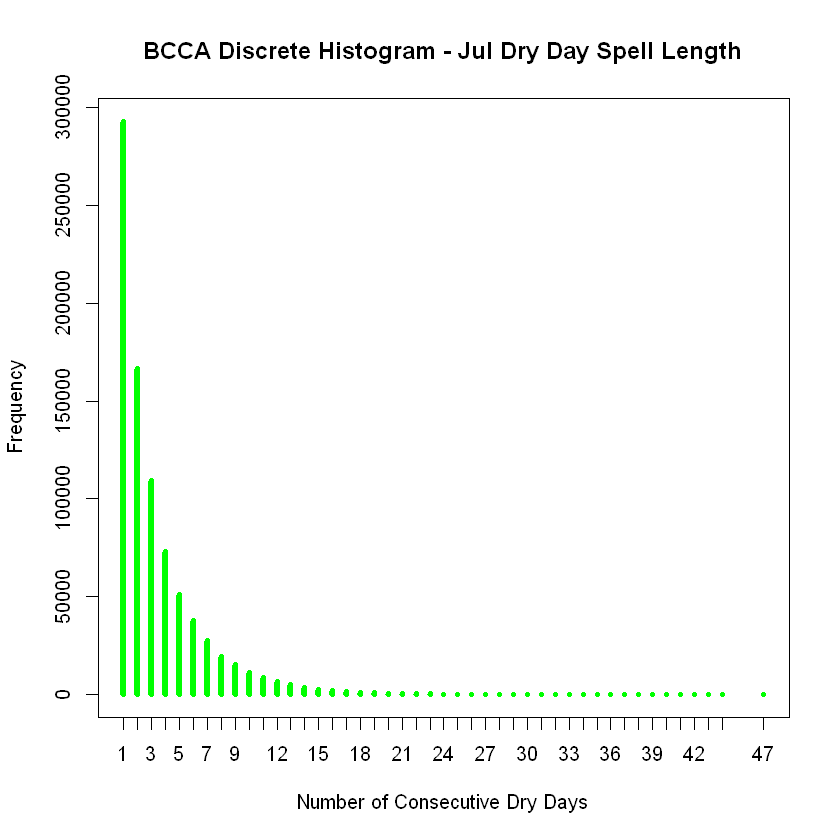

In [132]:
plot( table( dBCJul$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Jul Dry Day Spell Length", 
      col="green" )

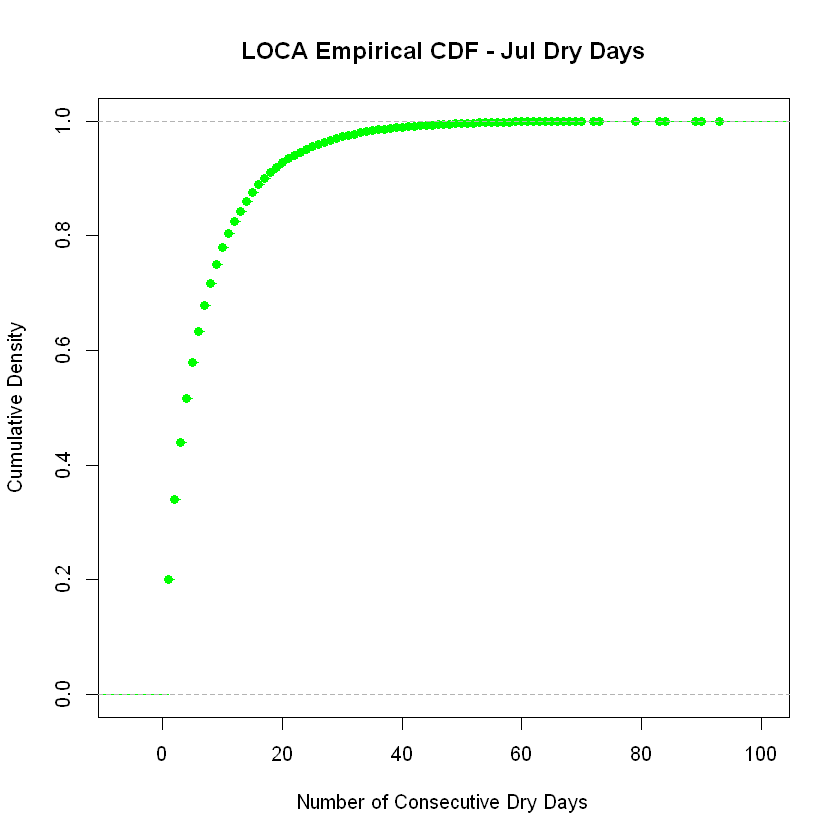

In [133]:
plot(ecdf(dLOJul$Dry_Count), main="LOCA Empirical CDF - Jul Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

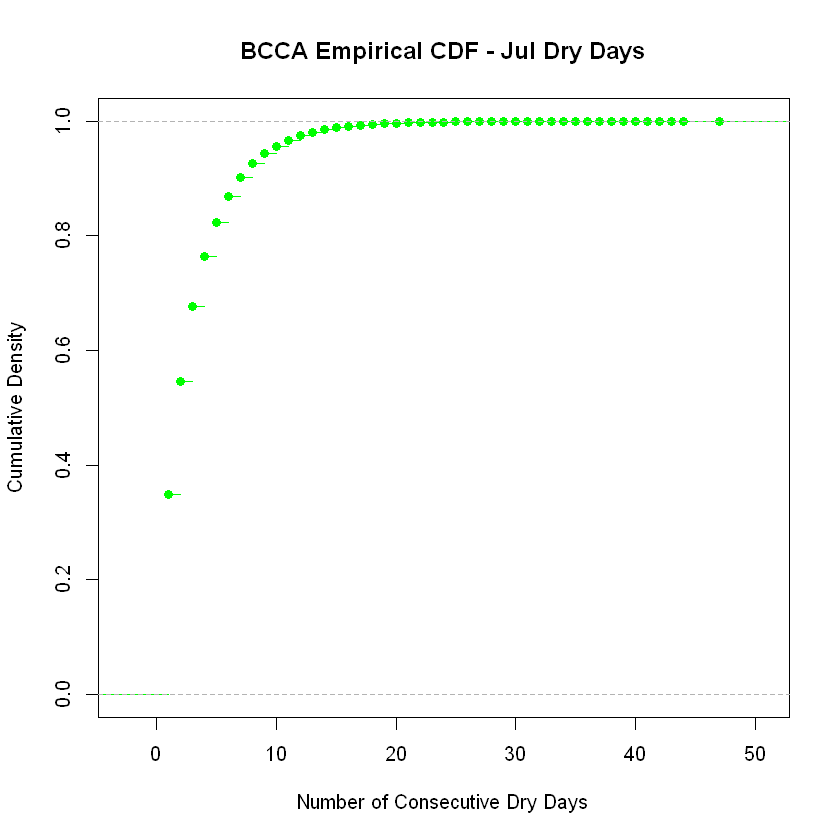

In [134]:
plot(ecdf(dBCJul$Dry_Count), main="BCCA Empirical CDF - Jul Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

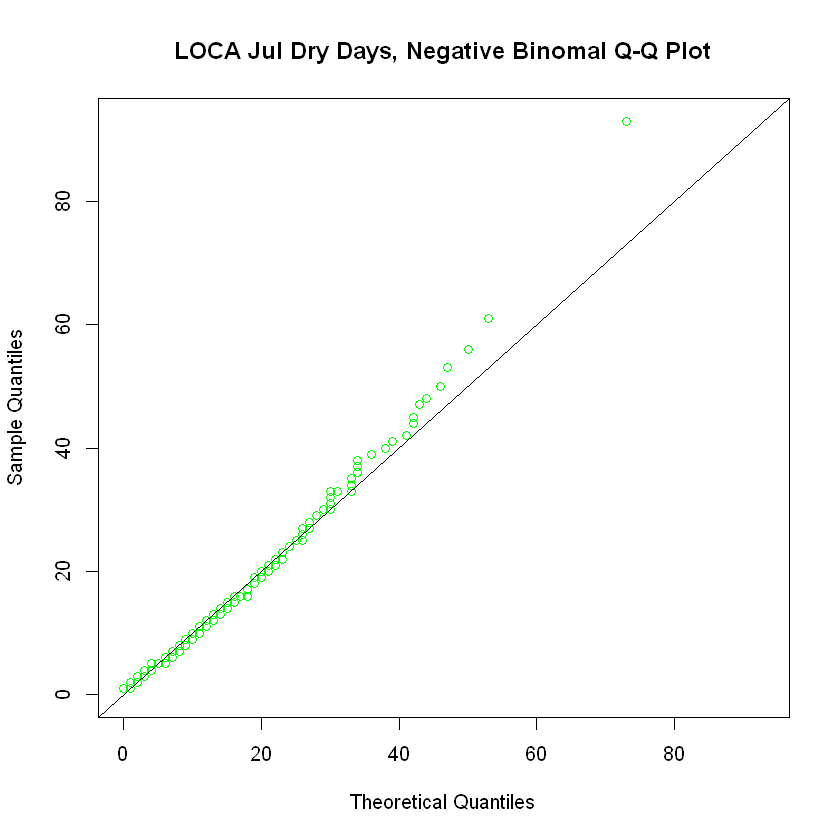

In [135]:
dLOJulMax <- max( dLOJul$Dry_Count )
dLOJulMean <- mean( dLOJul$Dry_Count )
dLOJulVar <- var( dLOJul$Dry_Count )
dLOJulBNr <- dLOJulMean^2 / (dLOJulVar - dLOJulMean)
dLOJulTstNB <- rnbinom( 1000, mu=dLOJulMean, size=dLOJulBNr )
qqplot( dLOJulTstNB, dLOJul$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Jul Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOJulMax), ylim=c(0,dLOJulMax) )
abline( 0, 1)

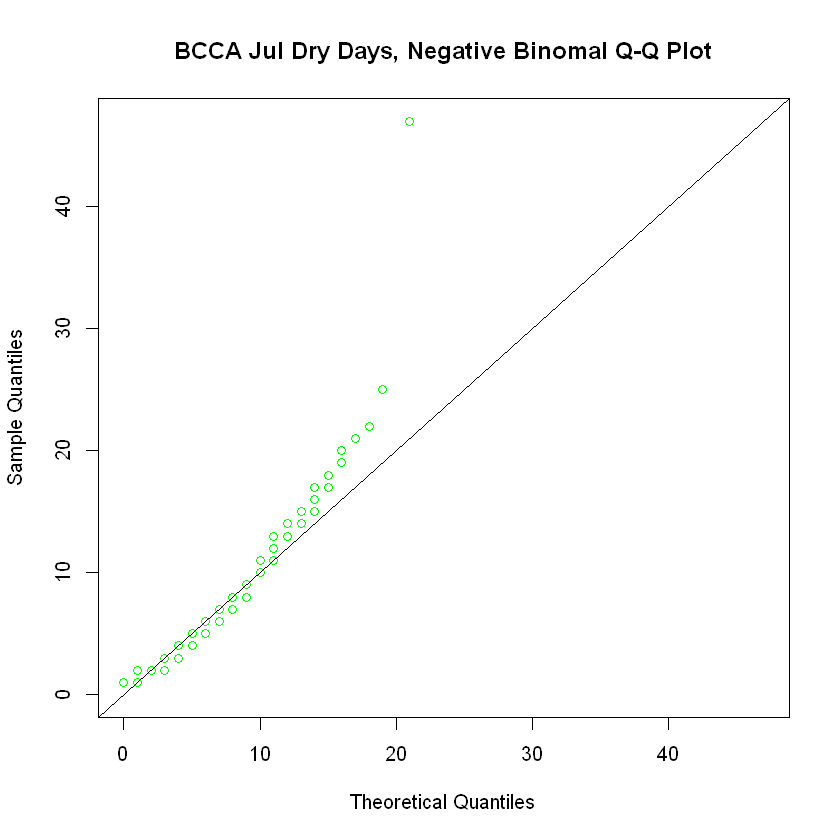

In [136]:
dBCJulMax <- max( dBCJul$Dry_Count )
dBCJulMean <- mean( dBCJul$Dry_Count )
dBCJulVar <- var( dBCJul$Dry_Count )
dBCJulBNr <- dBCJulMean^2 / (dBCJulVar - dBCJulMean)
dBCJulTstNB <- rnbinom( 1000, mu=dBCJulMean, size=dBCJulBNr )
qqplot( dBCJulTstNB, dBCJul$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Jul Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCJulMax), ylim=c(0,dBCJulMax) )
abline( 0, 1)

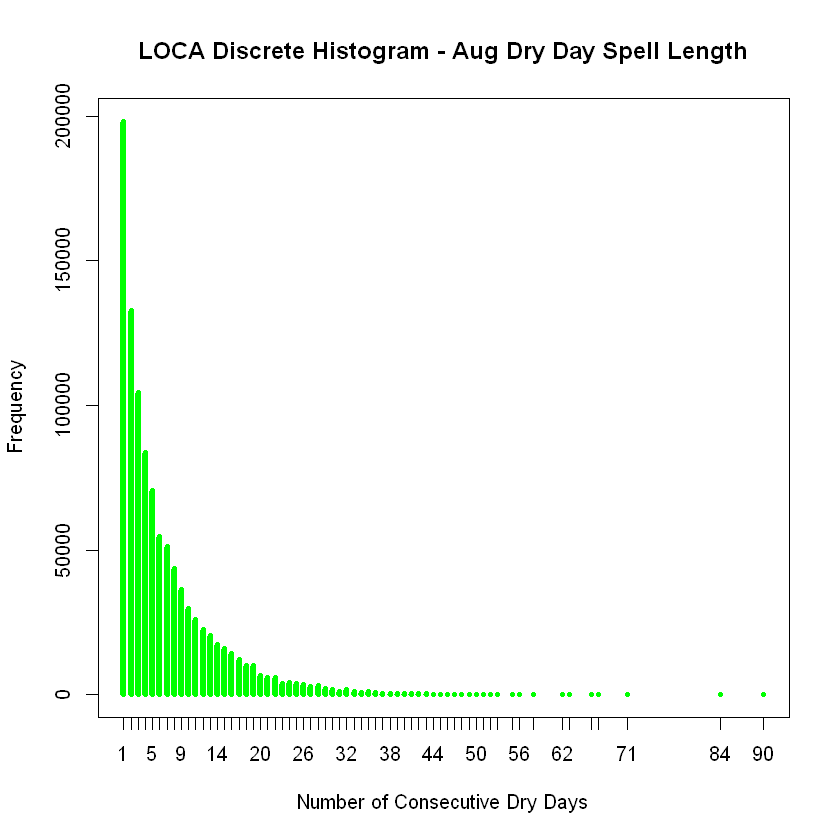

In [137]:
# our case is discrete so use this command
plot( table( dLOAug$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Aug Dry Day Spell Length", 
      col="green" )

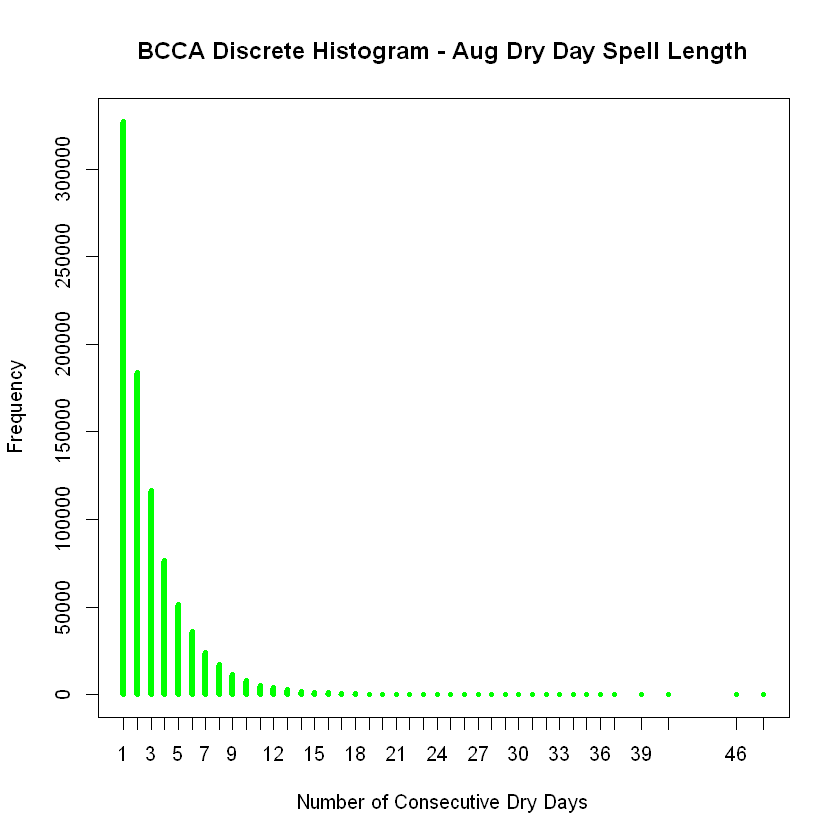

In [138]:
plot( table( dBCAug$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Aug Dry Day Spell Length", 
      col="green" )

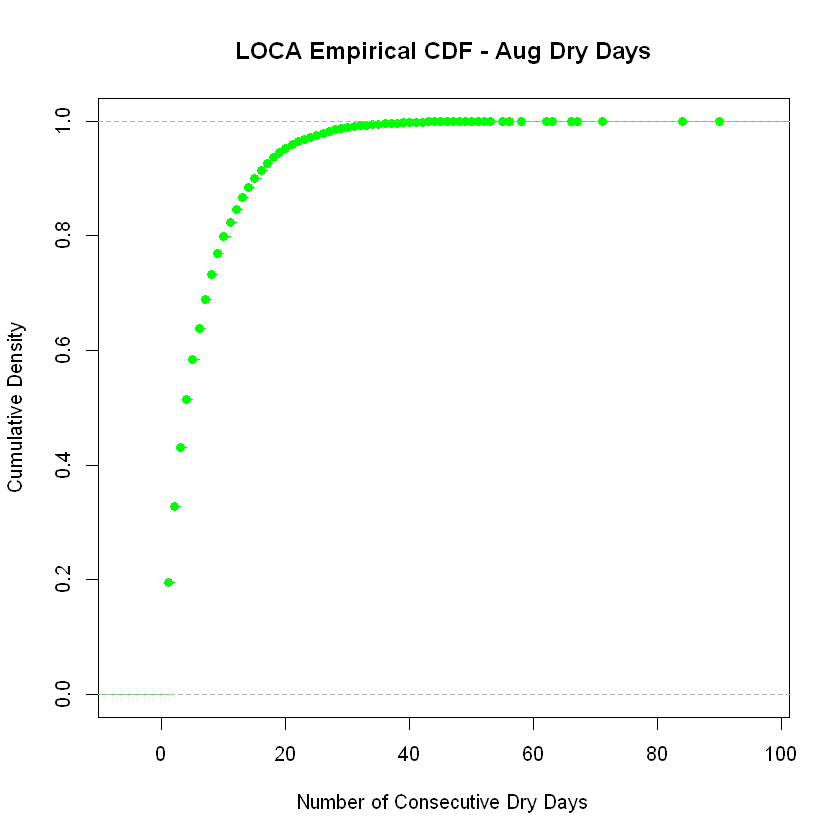

In [139]:
plot(ecdf(dLOAug$Dry_Count), main="LOCA Empirical CDF - Aug Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

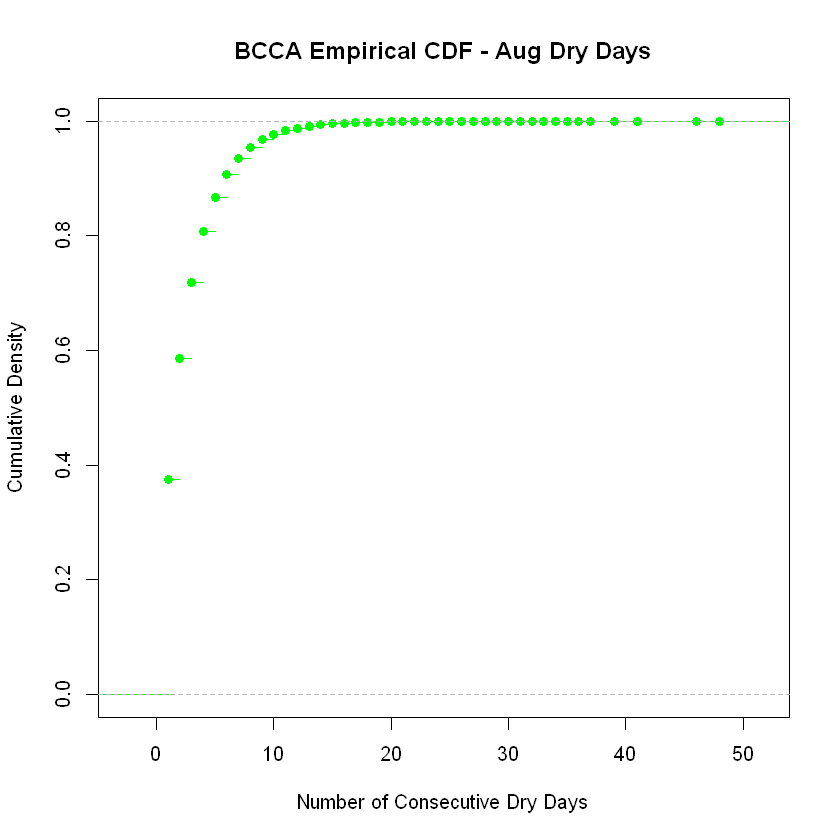

In [140]:
plot(ecdf(dBCAug$Dry_Count), main="BCCA Empirical CDF - Aug Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

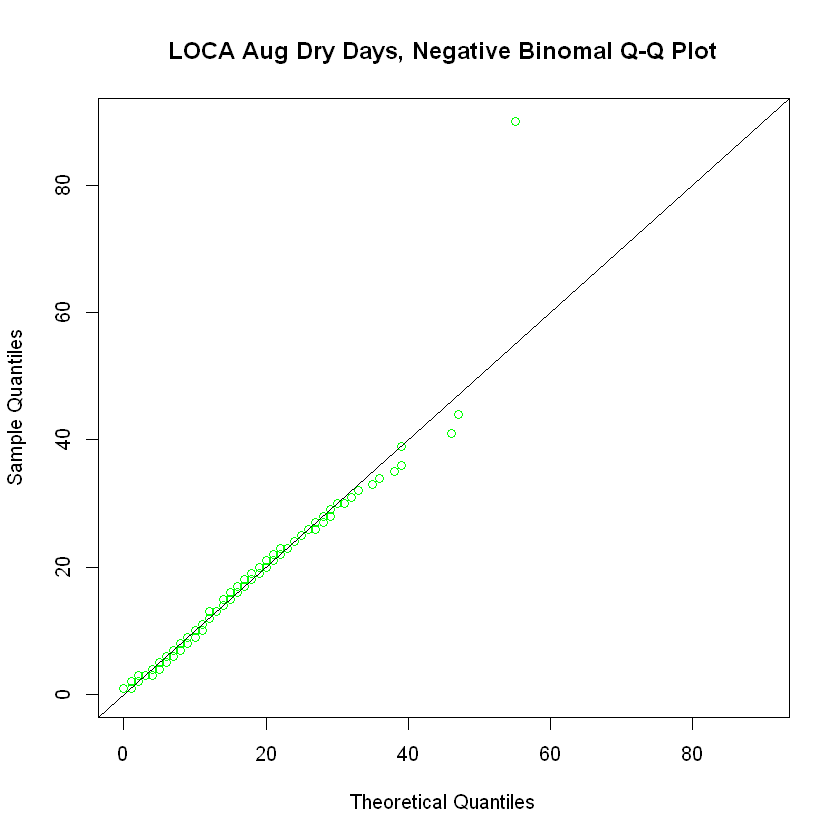

In [141]:
dLOAugMax <- max( dLOAug$Dry_Count )
dLOAugMean <- mean( dLOAug$Dry_Count )
dLOAugVar <- var( dLOAug$Dry_Count )
dLOAugBNr <- dLOAugMean^2 / (dLOAugVar - dLOAugMean)
dLOAugTstNB <- rnbinom( 1000, mu=dLOAugMean, size=dLOAugBNr )
qqplot( dLOAugTstNB, dLOAug$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Aug Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOAugMax), ylim=c(0,dLOAugMax) )
abline( 0, 1)

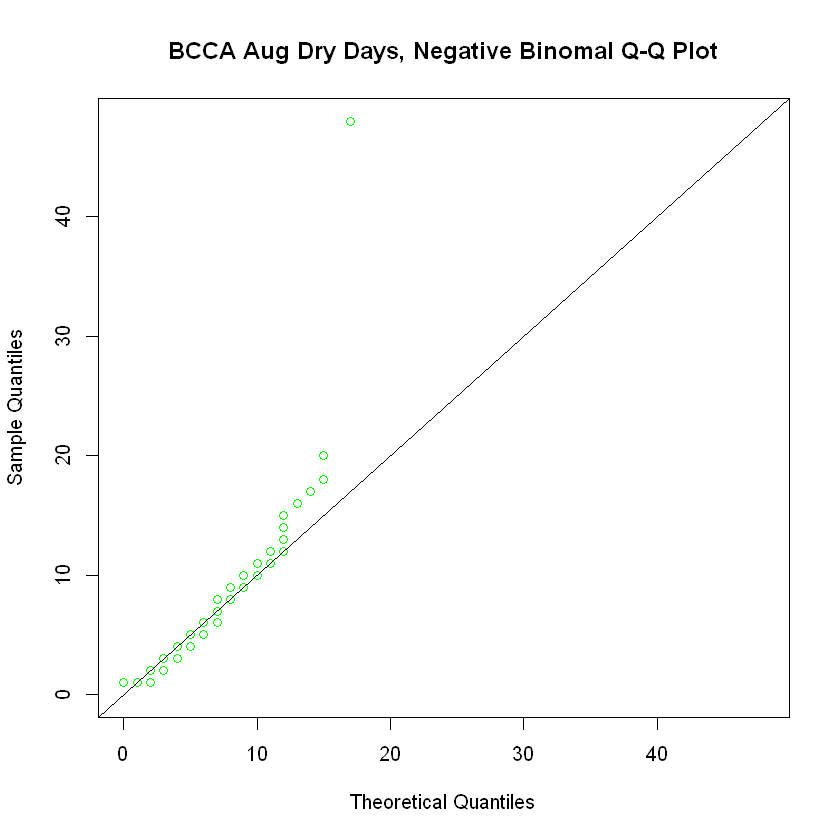

In [142]:
dBCAugMax <- max( dBCAug$Dry_Count )
dBCAugMean <- mean( dBCAug$Dry_Count )
dBCAugVar <- var( dBCAug$Dry_Count )
dBCAugBNr <- dBCAugMean^2 / (dBCAugVar - dBCAugMean)
dBCAugTstNB <- rnbinom( 1000, mu=dBCAugMean, size=dBCAugBNr )
qqplot( dBCAugTstNB, dBCAug$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Aug Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCAugMax), ylim=c(0,dBCAugMax) )
abline( 0, 1)

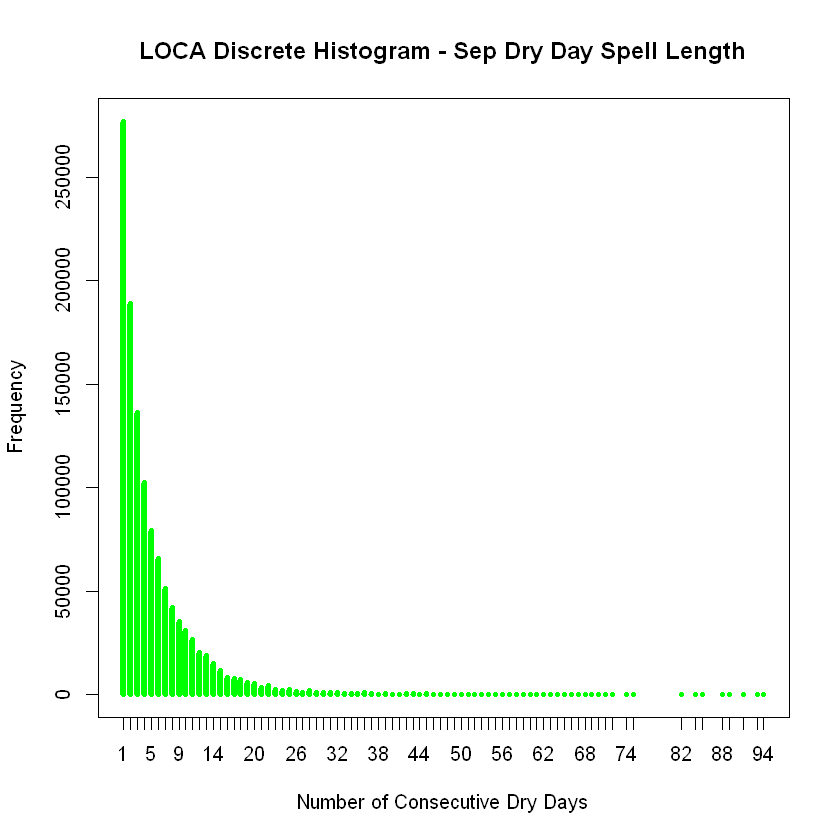

In [143]:
# our case is discrete so use this command
plot( table( dLOSep$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Sep Dry Day Spell Length", 
      col="green" )

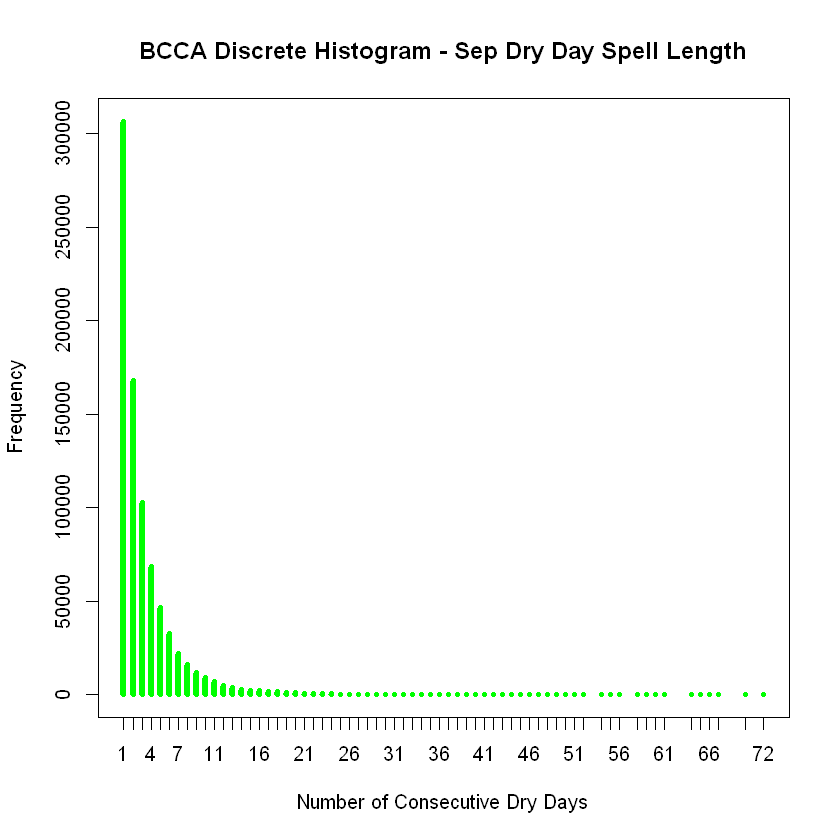

In [144]:
plot( table( dBCSep$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Sep Dry Day Spell Length", 
      col="green" )

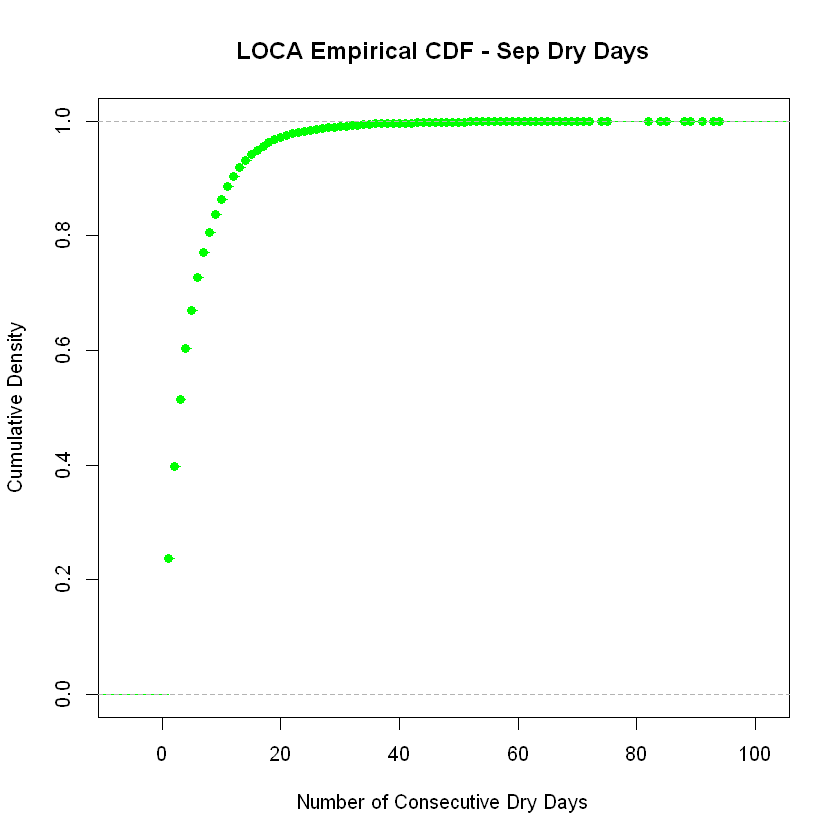

In [145]:
plot(ecdf(dLOSep$Dry_Count), main="LOCA Empirical CDF - Sep Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

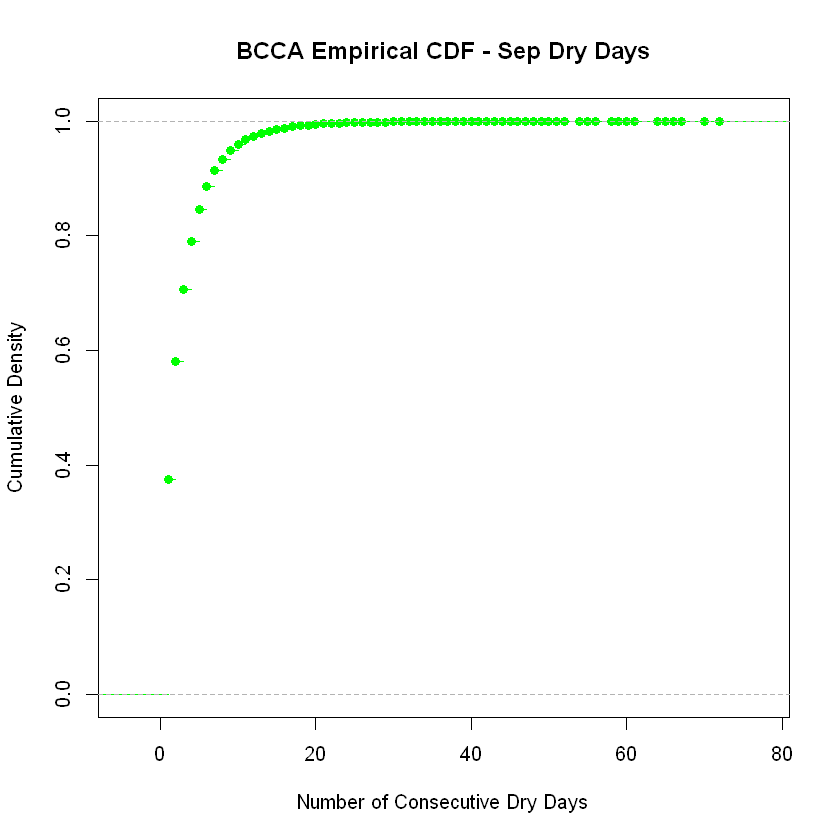

In [146]:
plot(ecdf(dBCSep$Dry_Count), main="BCCA Empirical CDF - Sep Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

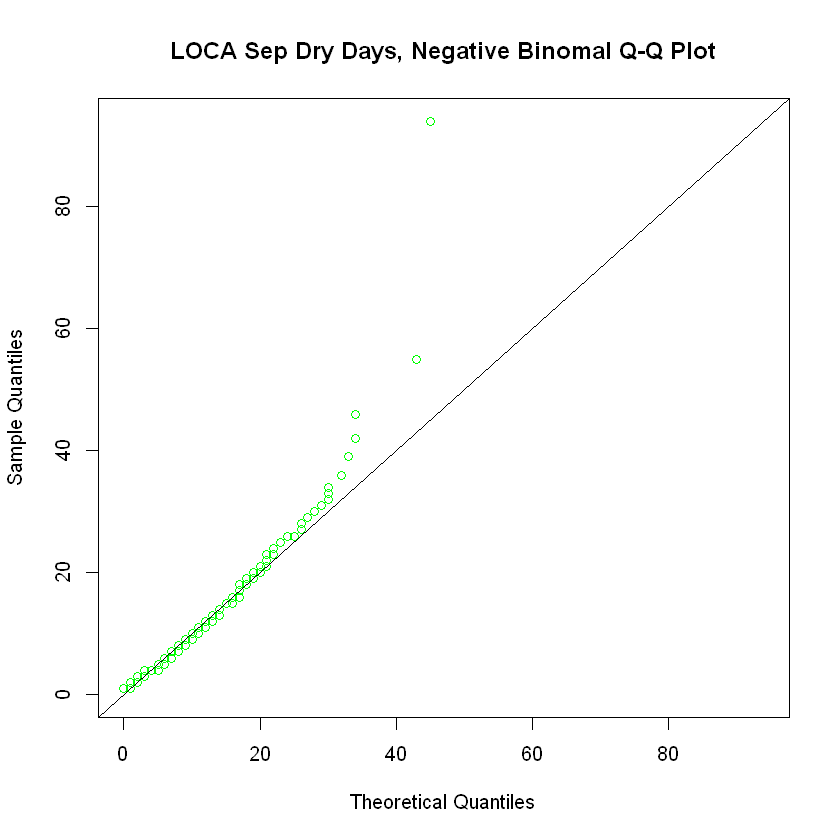

In [147]:
dLOSepMax <- max( dLOSep$Dry_Count )
dLOSepMean <- mean( dLOSep$Dry_Count )
dLOSepVar <- var( dLOSep$Dry_Count )
dLOSepBNr <- dLOSepMean^2 / (dLOSepVar - dLOSepMean)
dLOSepTstNB <- rnbinom( 1000, mu=dLOSepMean, size=dLOSepBNr )
qqplot( dLOSepTstNB, dLOSep$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Sep Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOSepMax), ylim=c(0,dLOSepMax) )
abline( 0, 1)

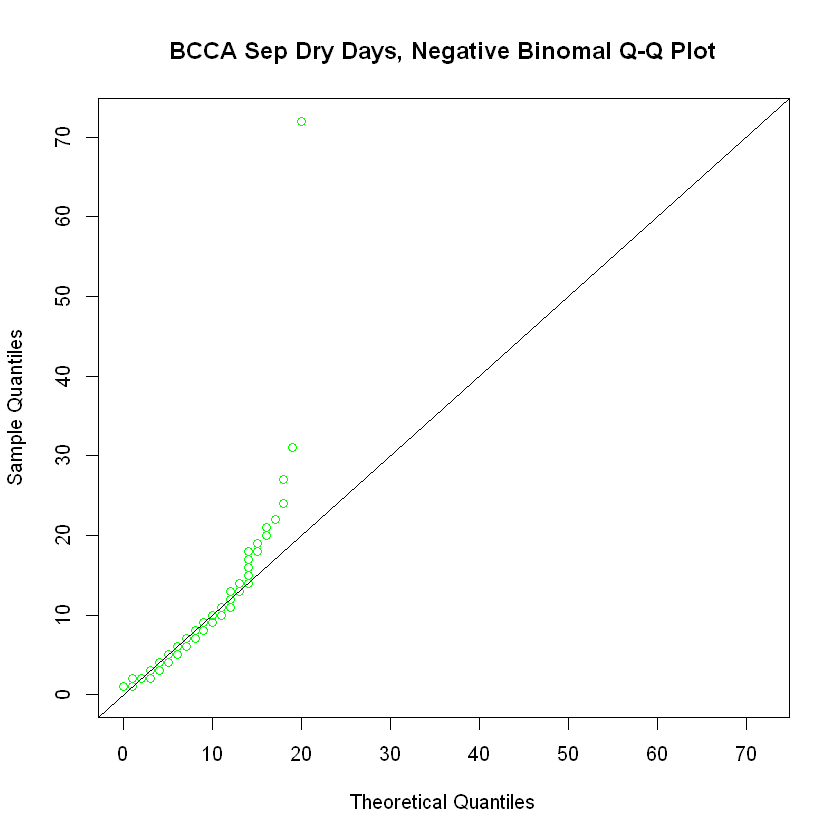

In [148]:
dBCSepMax <- max( dBCSep$Dry_Count )
dBCSepMean <- mean( dBCSep$Dry_Count )
dBCSepVar <- var( dBCSep$Dry_Count )
dBCSepBNr <- dBCSepMean^2 / (dBCSepVar - dBCSepMean)
dBCSepTstNB <- rnbinom( 1000, mu=dBCSepMean, size=dBCSepBNr )
qqplot( dBCSepTstNB, dBCSep$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Sep Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCSepMax), ylim=c(0,dBCSepMax) )
abline( 0, 1)

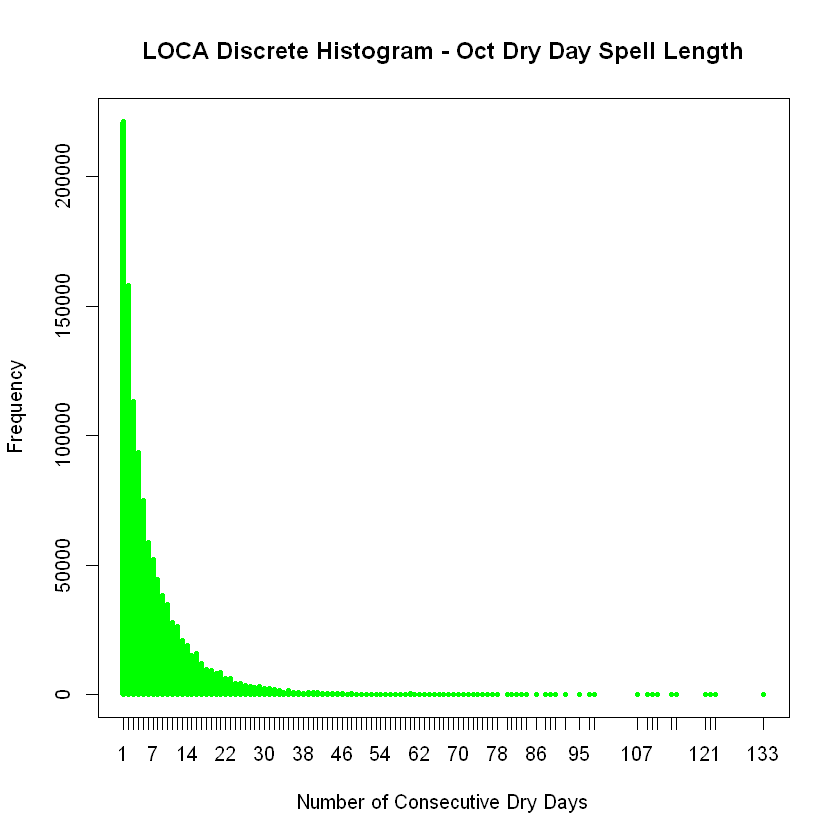

In [149]:
# our case is discrete so use this command
plot( table( dLOOct$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Oct Dry Day Spell Length", 
      col="green" )

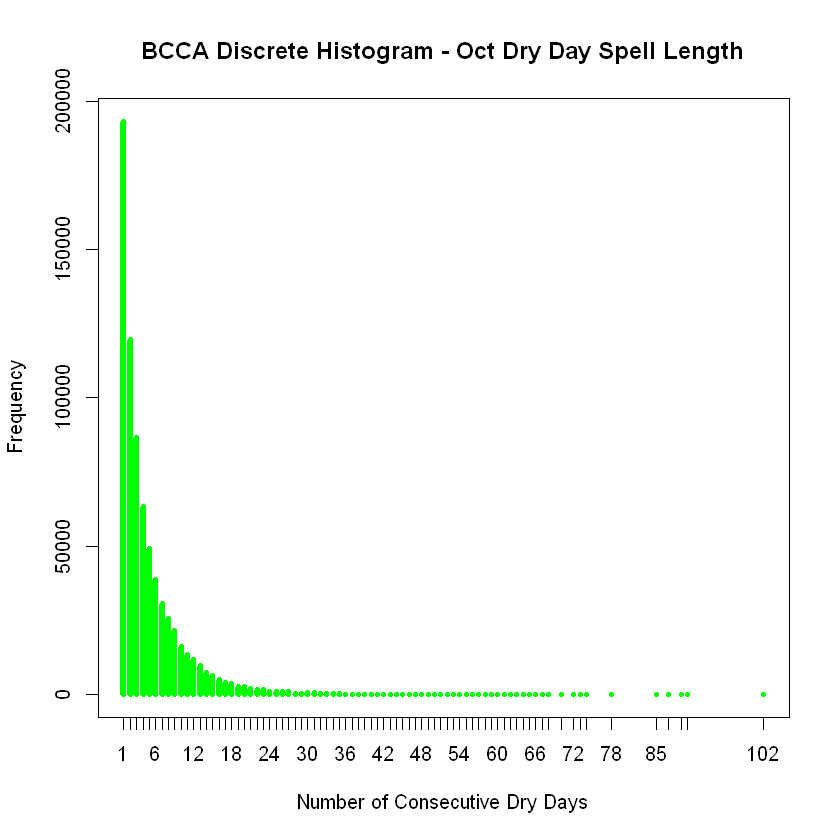

In [150]:
plot( table( dBCOct$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Oct Dry Day Spell Length", 
      col="green" )

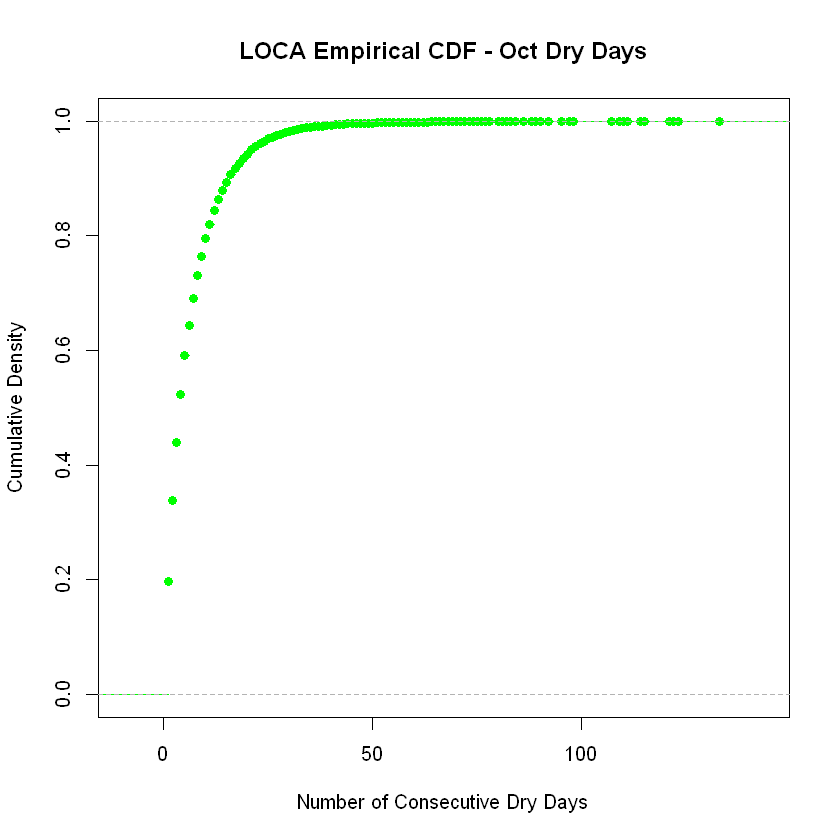

In [151]:
plot(ecdf(dLOOct$Dry_Count), main="LOCA Empirical CDF - Oct Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

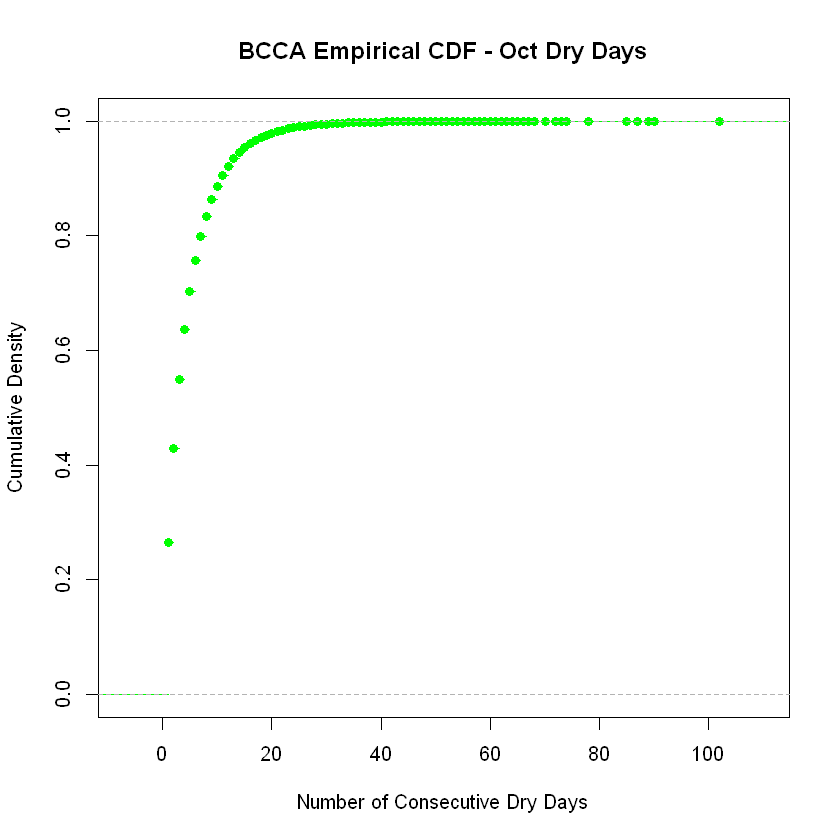

In [152]:
plot(ecdf(dBCOct$Dry_Count), main="BCCA Empirical CDF - Oct Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

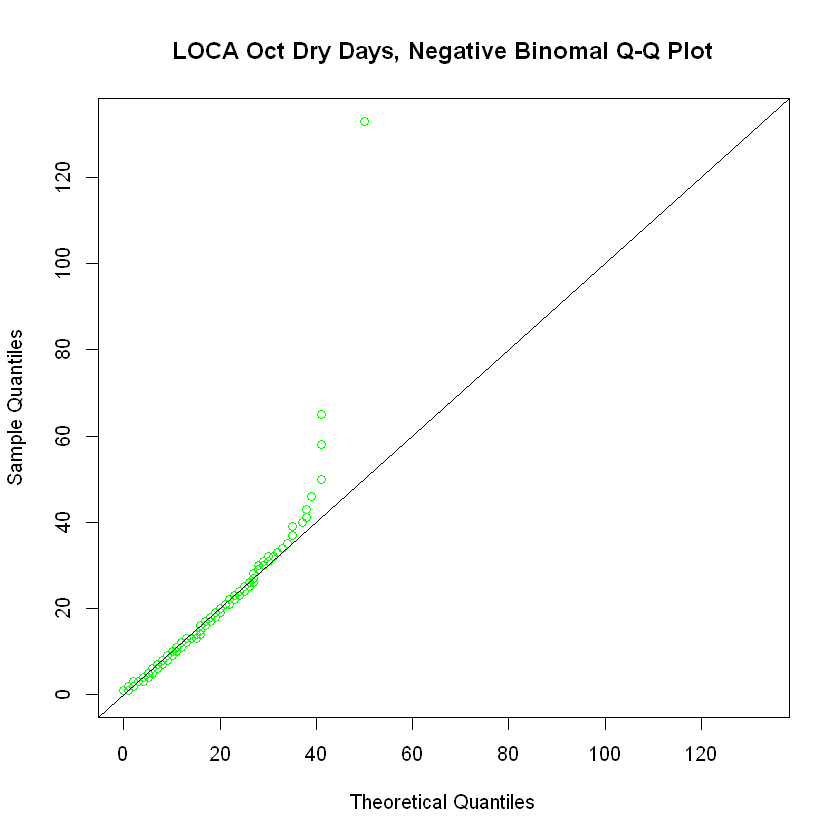

In [153]:
dLOOctMax <- max( dLOOct$Dry_Count )
dLOOctMean <- mean( dLOOct$Dry_Count )
dLOOctVar <- var( dLOOct$Dry_Count )
dLOOctBNr <- dLOOctMean^2 / (dLOOctVar - dLOOctMean)
dLOOctTstNB <- rnbinom( 1000, mu=dLOOctMean, size=dLOOctBNr )
qqplot( dLOOctTstNB, dLOOct$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Oct Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLOOctMax), ylim=c(0,dLOOctMax) )
abline( 0, 1)

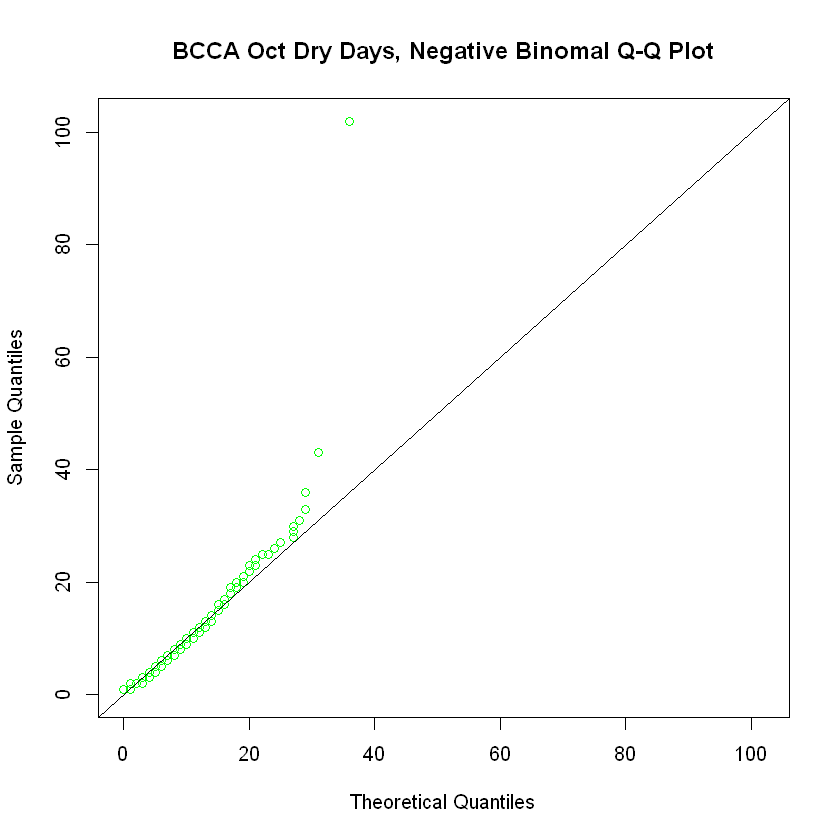

In [154]:
dBCOctMax <- max( dBCOct$Dry_Count )
dBCOctMean <- mean( dBCOct$Dry_Count )
dBCOctVar <- var( dBCOct$Dry_Count )
dBCOctBNr <- dBCOctMean^2 / (dBCOctVar - dBCOctMean)
dBCOctTstNB <- rnbinom( 1000, mu=dBCOctMean, size=dBCOctBNr )
qqplot( dBCOctTstNB, dBCOct$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Oct Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCOctMax), ylim=c(0,dBCOctMax) )
abline( 0, 1)

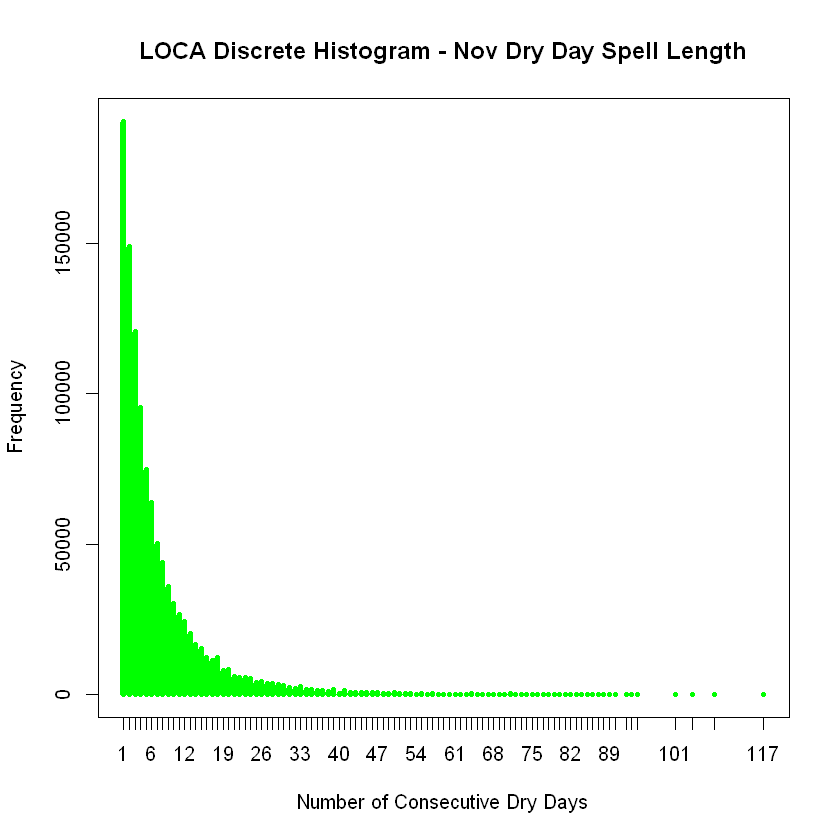

In [155]:
# our case is discrete so use this command
plot( table( dLONov$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Nov Dry Day Spell Length", 
      col="green" )

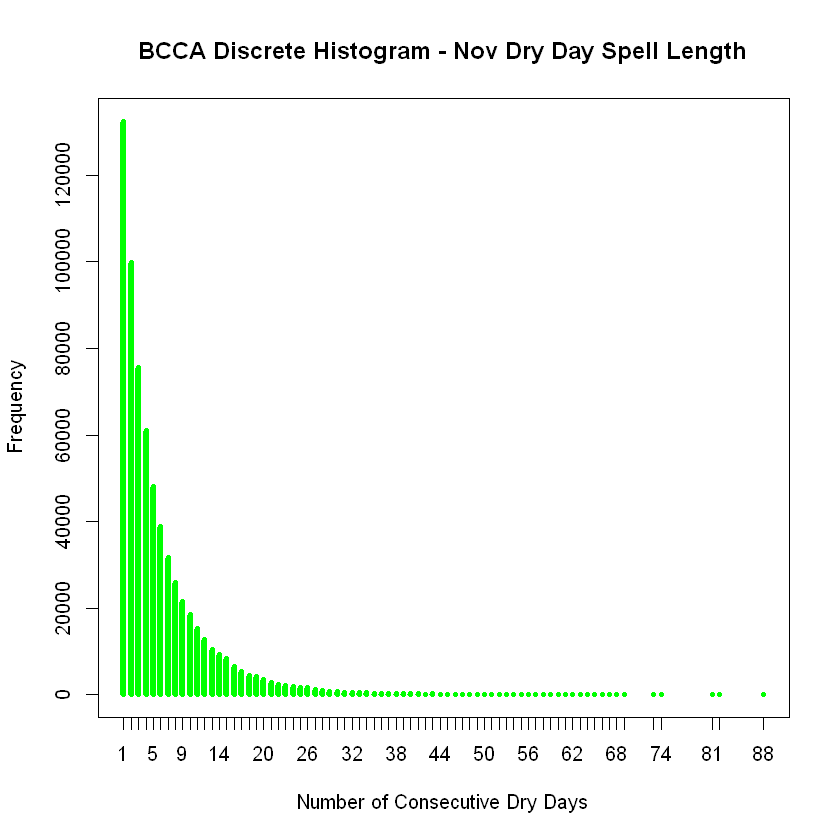

In [156]:
plot( table( dBCNov$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Nov Dry Day Spell Length", 
      col="green" )

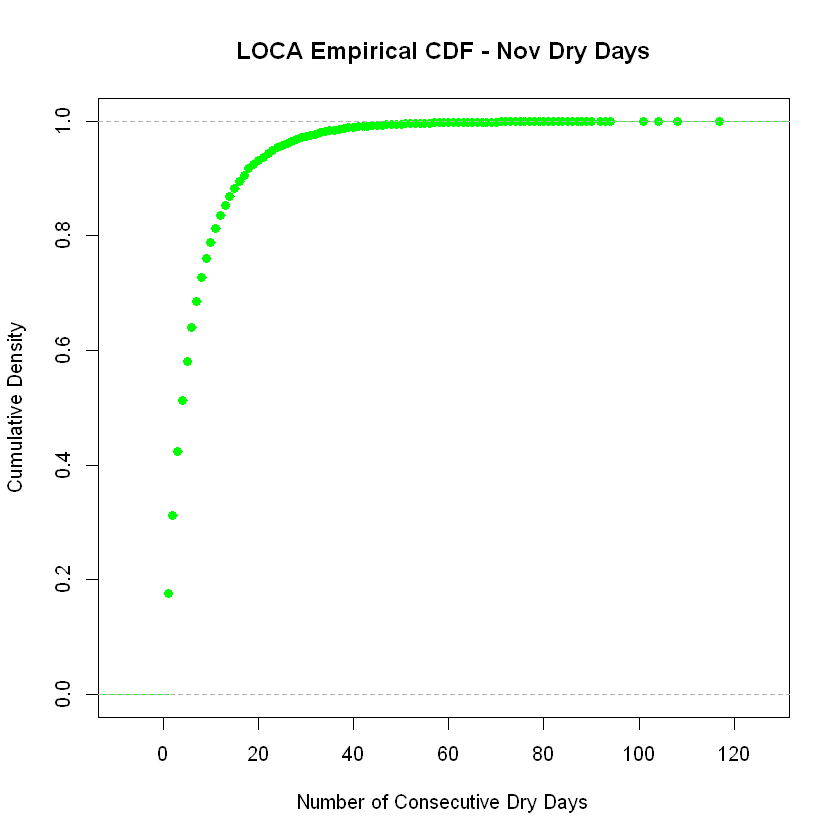

In [157]:
plot(ecdf(dLONov$Dry_Count), main="LOCA Empirical CDF - Nov Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

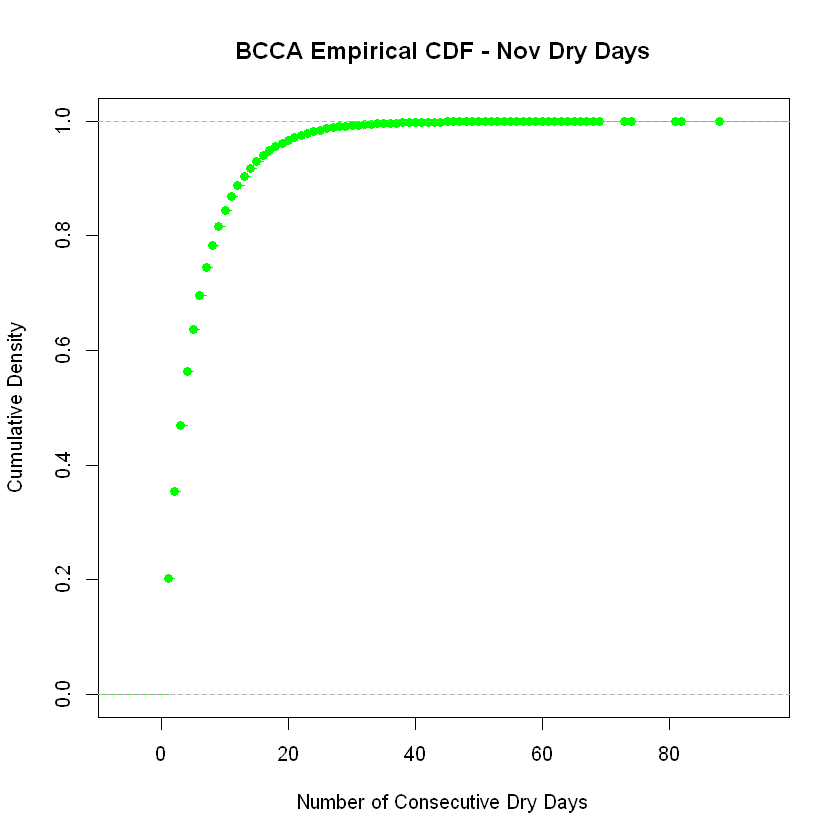

In [158]:
plot(ecdf(dBCNov$Dry_Count), main="BCCA Empirical CDF - Nov Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

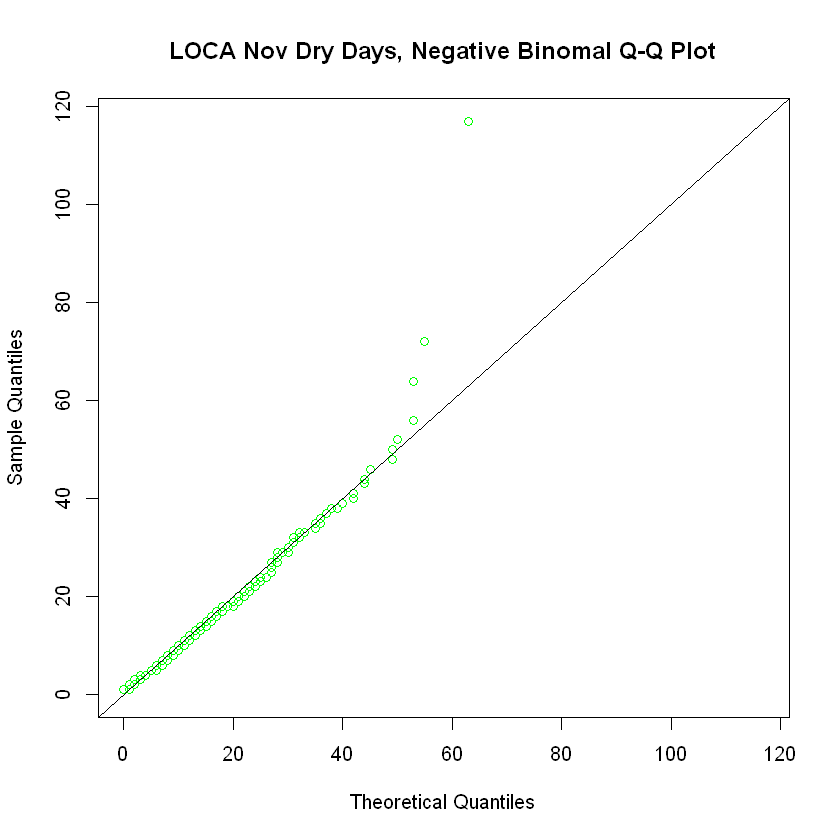

In [159]:
dLONovMax <- max( dLONov$Dry_Count )
dLONovMean <- mean( dLONov$Dry_Count )
dLONovVar <- var( dLONov$Dry_Count )
dLONovBNr <- dLONovMean^2 / (dLONovVar - dLONovMean)
dLONovTstNB <- rnbinom( 1000, mu=dLONovMean, size=dLONovBNr )
qqplot( dLONovTstNB, dLONov$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Nov Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLONovMax), ylim=c(0,dLONovMax) )
abline( 0, 1)

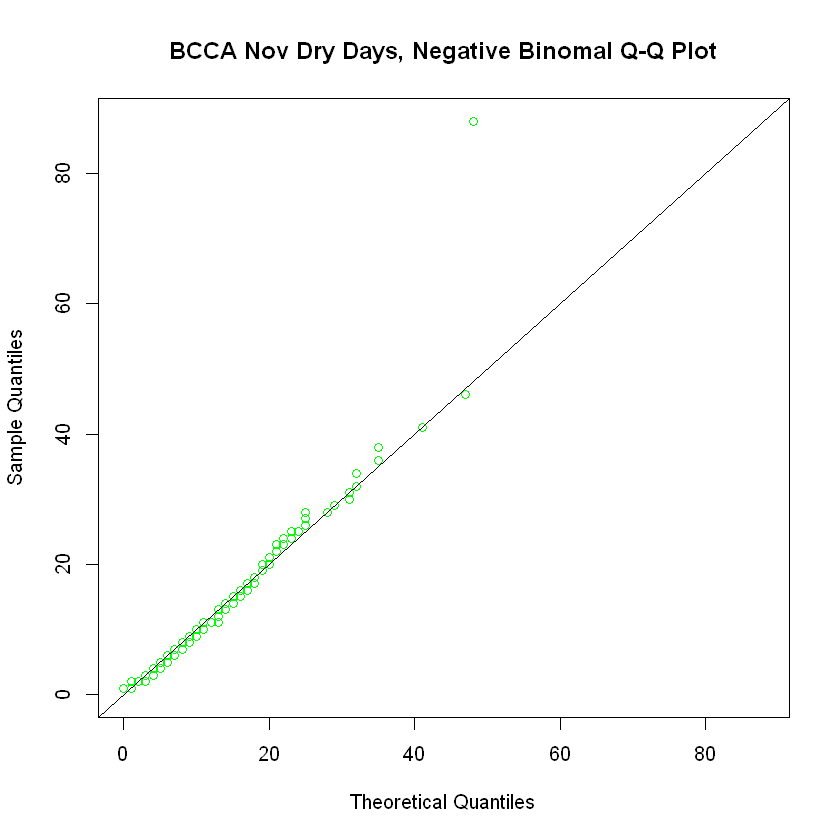

In [160]:
dBCNovMax <- max( dBCNov$Dry_Count )
dBCNovMean <- mean( dBCNov$Dry_Count )
dBCNovVar <- var( dBCNov$Dry_Count )
dBCNovBNr <- dBCNovMean^2 / (dBCNovVar - dBCNovMean)
dBCNovTstNB <- rnbinom( 1000, mu=dBCNovMean, size=dBCNovBNr )
qqplot( dBCNovTstNB, dBCNov$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Nov Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCNovMax), ylim=c(0,dBCNovMax) )
abline( 0, 1)

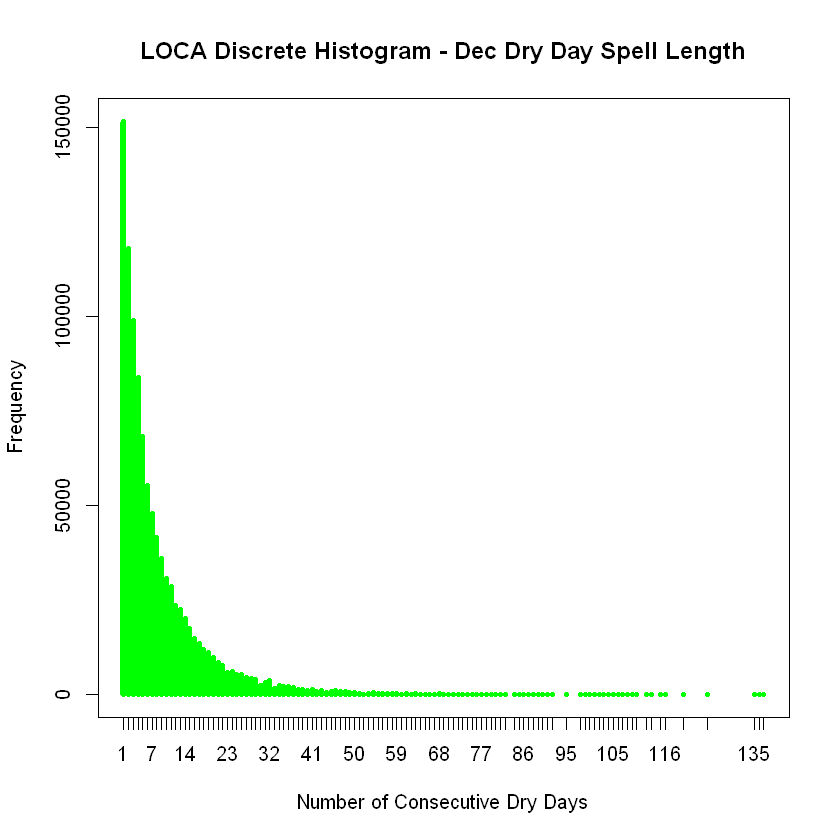

In [161]:
# our case is discrete so use this command
plot( table( dLODec$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="LOCA Discrete Histogram - Dec Dry Day Spell Length", 
      col="green" )

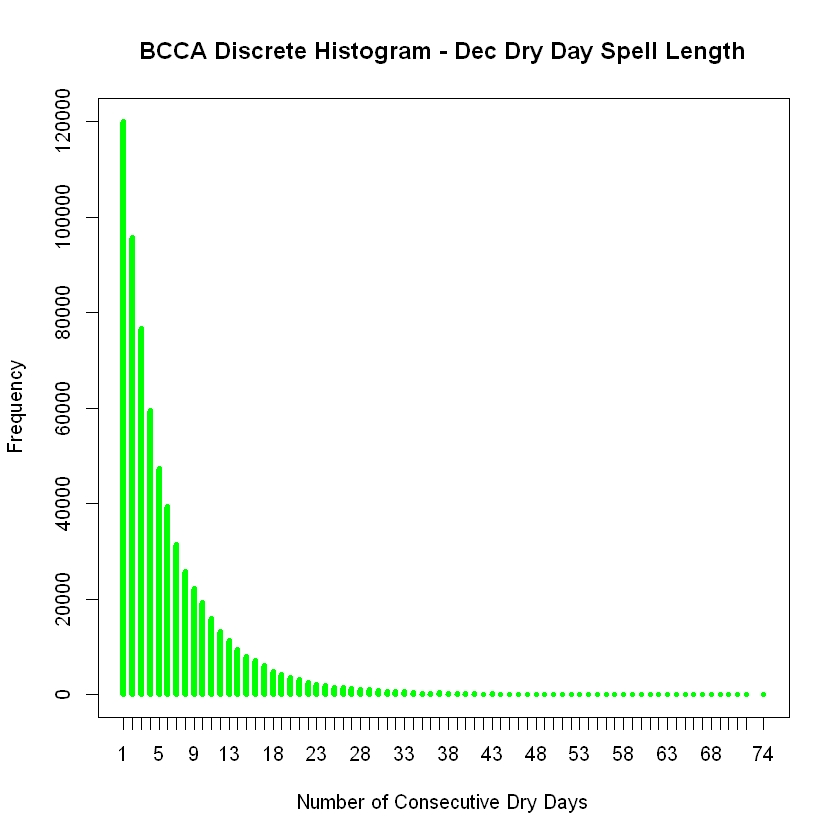

In [162]:
plot( table( dBCDec$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="BCCA Discrete Histogram - Dec Dry Day Spell Length", 
      col="green" )

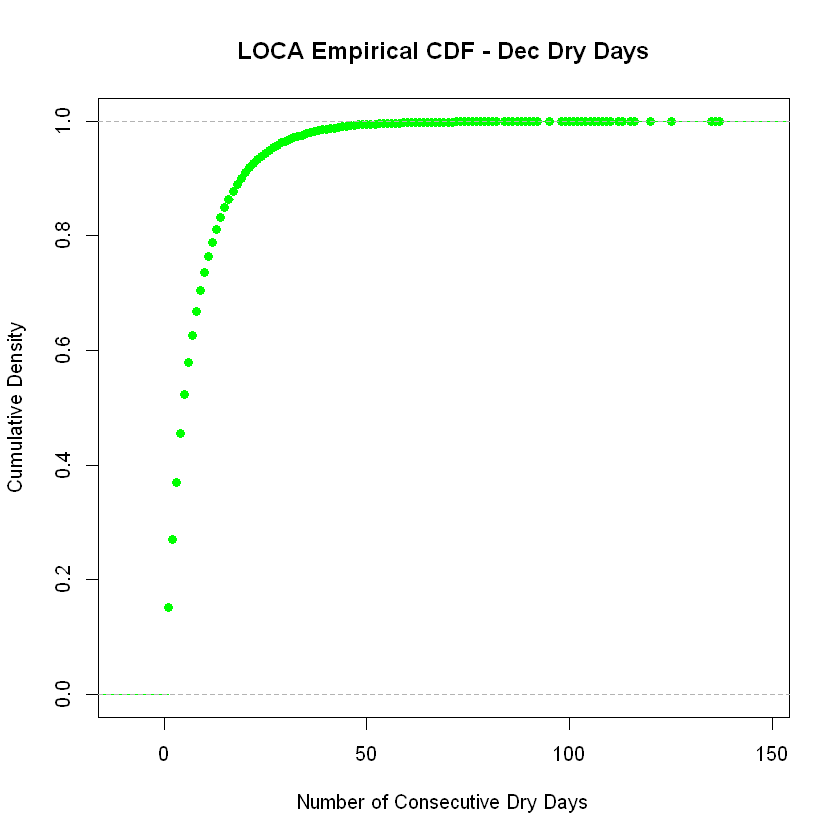

In [163]:
plot(ecdf(dLODec$Dry_Count), main="LOCA Empirical CDF - Dec Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

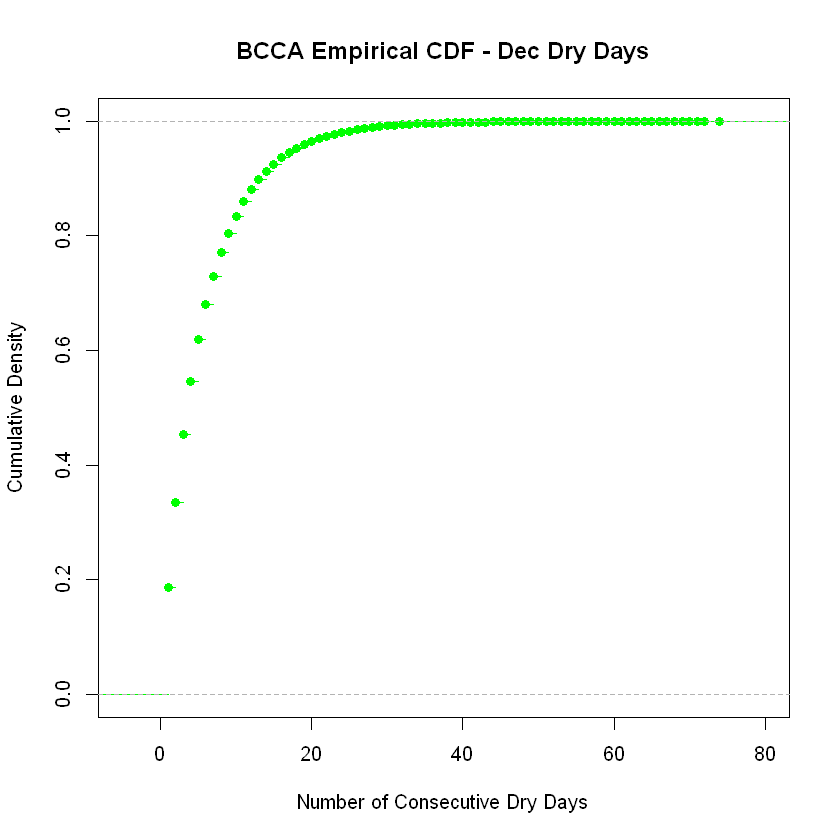

In [164]:
plot(ecdf(dBCDec$Dry_Count), main="BCCA Empirical CDF - Dec Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

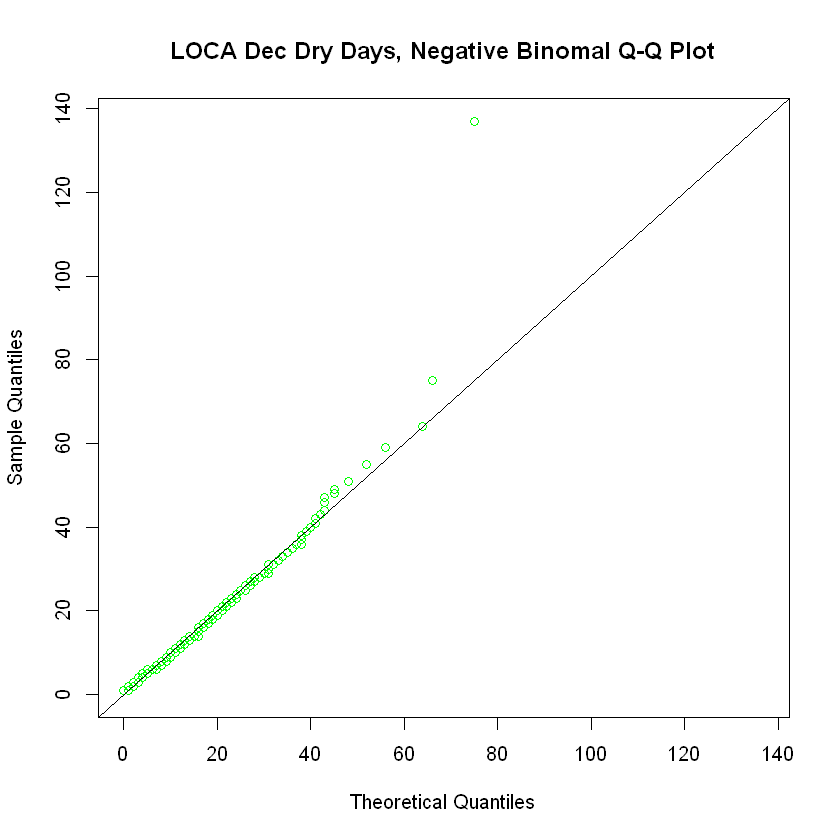

In [165]:
dLODecMax <- max( dLODec$Dry_Count )
dLODecMean <- mean( dLODec$Dry_Count )
dLODecVar <- var( dLODec$Dry_Count )
dLODecBNr <- dLODecMean^2 / (dLODecVar - dLODecMean)
dLODecTstNB <- rnbinom( 1000, mu=dLODecMean, size=dLODecBNr )
qqplot( dLODecTstNB, dLODec$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="LOCA Dec Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dLODecMax), ylim=c(0,dLODecMax) )
abline( 0, 1)

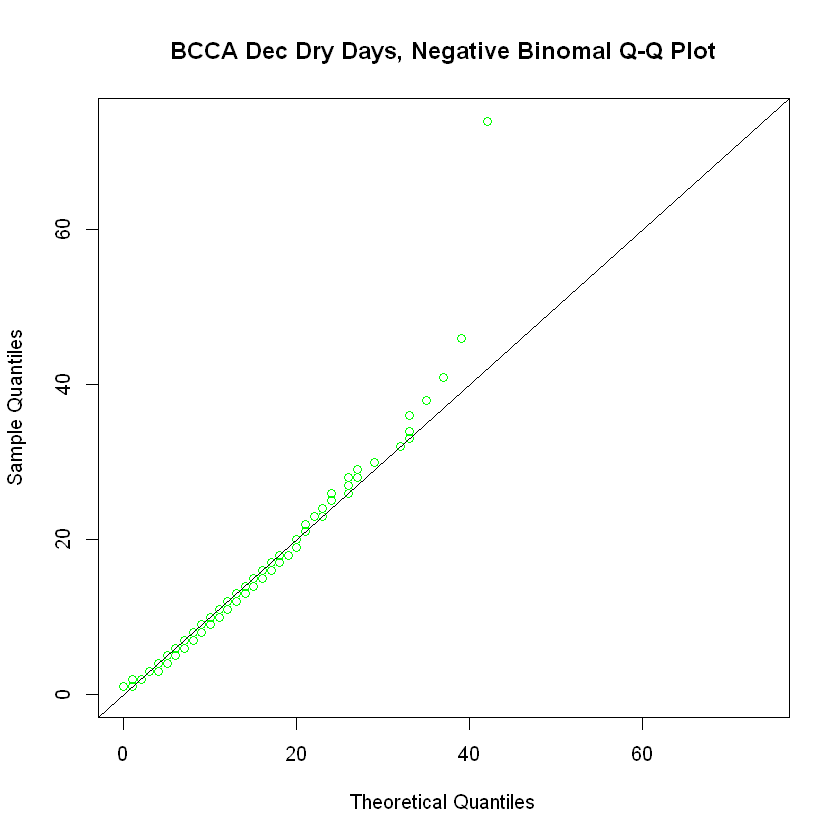

In [166]:
dBCDecMax <- max( dBCDec$Dry_Count )
dBCDecMean <- mean( dBCDec$Dry_Count )
dBCDecVar <- var( dBCDec$Dry_Count )
dBCDecBNr <- dBCDecMean^2 / (dBCDecVar - dBCDecMean)
dBCDecTstNB <- rnbinom( 1000, mu=dBCDecMean, size=dBCDecBNr )
qqplot( dBCDecTstNB, dBCDec$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="BCCA Dec Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dBCDecMax), ylim=c(0,dBCDecMax) )
abline( 0, 1)

In [167]:
cat("LOCA Jan scale: ", dLOJanBNr, "\n", "LOCA Feb scale: ", dLOFebBNr, "\n",
    "LOCA Mar scale: ", dLOMarBNr, "\n", "LOCA Apr scale: ", dLOAprBNr, "\n",
    "LOCA May scale: ", dLOMayBNr, "\n", "LOCA Jun scale: ", dLOJunBNr, "\n",
    "LOCA Jul scale: ", dLOJulBNr, "\n", "LOCA Aug scale: ", dLOAugBNr, "\n",
    "LOCA Sep scale: ", dLOSepBNr, "\n", "LOCA Oct scale: ", dLOOctBNr, "\n",
    "LOCA Nov scale: ", dLONovBNr, "\n", "LOCA Dec scale: ", dLODecBNr, "\n" )

LOCA Jan scale:  1.031258 
 LOCA Feb scale:  1.003545 
 LOCA Mar scale:  1.193582 
 LOCA Apr scale:  1.346064 
 LOCA May scale:  1.052239 
 LOCA Jun scale:  0.6822686 
 LOCA Jul scale:  0.8514854 
 LOCA Aug scale:  1.165568 
 LOCA Sep scale:  0.9483823 
 LOCA Oct scale:  0.9034085 
 LOCA Nov scale:  0.818229 
 LOCA Dec scale:  0.8982067 


In [168]:
cat("BCCA Jan scale: ", dBCJanBNr, "\n", "BCCA Feb scale: ", dBCFebBNr, "\n",
    "BCCA Mar scale: ", dBCMarBNr, "\n", "BCCA Apr scale: ", dBCAprBNr, "\n",
    "BCCA May scale: ", dBCMayBNr, "\n", "BCCA Jun scale: ", dBCJunBNr, "\n",
    "BCCA Jul scale: ", dBCJulBNr, "\n", "BCCA Aug scale: ", dBCAugBNr, "\n",
    "BCCA Sep scale: ", dBCSepBNr, "\n", "BCCA Oct scale: ", dBCOctBNr, "\n",
    "BCCA Nov scale: ", dBCNovBNr, "\n", "BCCA Dec scale: ", dBCDecBNr, "\n" )

BCCA Jan scale:  1.286713 
 BCCA Feb scale:  1.371326 
 BCCA Mar scale:  1.450899 
 BCCA Apr scale:  1.842607 
 BCCA May scale:  2.019765 
 BCCA Jun scale:  1.431947 
 BCCA Jul scale:  1.562324 
 BCCA Aug scale:  2.151797 
 BCCA Sep scale:  1.192984 
 BCCA Oct scale:  1.058566 
 BCCA Nov scale:  1.127266 
 BCCA Dec scale:  1.174314 


### Fitting Negative Binomial Distributions

Use the **fitdistrplus** package for distribution fitting. This also provides the *plotdist* function which provides a pair of plots: 

1. empirical density, or a histogram
2. empirical cumulative distribution

These plots were provided above from scratch. **fitdistrplus** also provides a *descdist* function that provides classical descriptive statistics for the sample.

Distributions are then fit using a Maximum Likelihood Estimation (MLE) estimator in the *fitdist* function. Then goodness-of-fit statistics are calculated using the *gofstat* function.

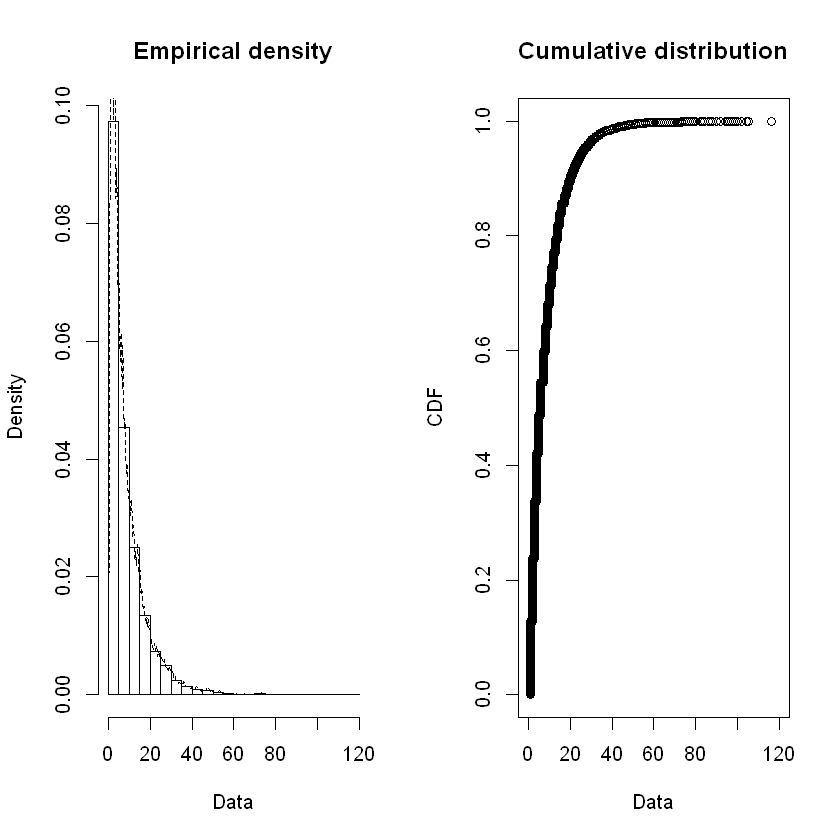

In [169]:
plotdist( dLOJan$Dry_Count, histo=TRUE, demp=TRUE )

In [170]:
LOfd_NB_dJan <- fitdist( dLOJan$Dry_Count, "nbinom" )
LOfd_GE_dJan <- fitdist( dLOJan$Dry_Count, "geom" )

In [171]:
summary( LOfd_NB_dJan )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.392417 0.002259934
mu   8.724688 0.008302493
Loglikelihood:  -2941120   AIC:  5882245   BIC:  5882268 
Correlation matrix:
             size           mu
size 1.0000000000 0.0003240349
mu   0.0003240349 1.0000000000


In [172]:
LOfdNB_dJan_size <- LOfd_NB_dJan$estimate[["size"]]
LOfdNB_dJan_mu <- LOfd_NB_dJan$estimate[["mu"]]
cat("LOCA Jan size: ", LOfdNB_dJan_size, "\n", "LOCA Jan mu: ", LOfdNB_dJan_mu, "\n")

LOCA Jan size:  1.392417 
 LOCA Jan mu:  8.724688 


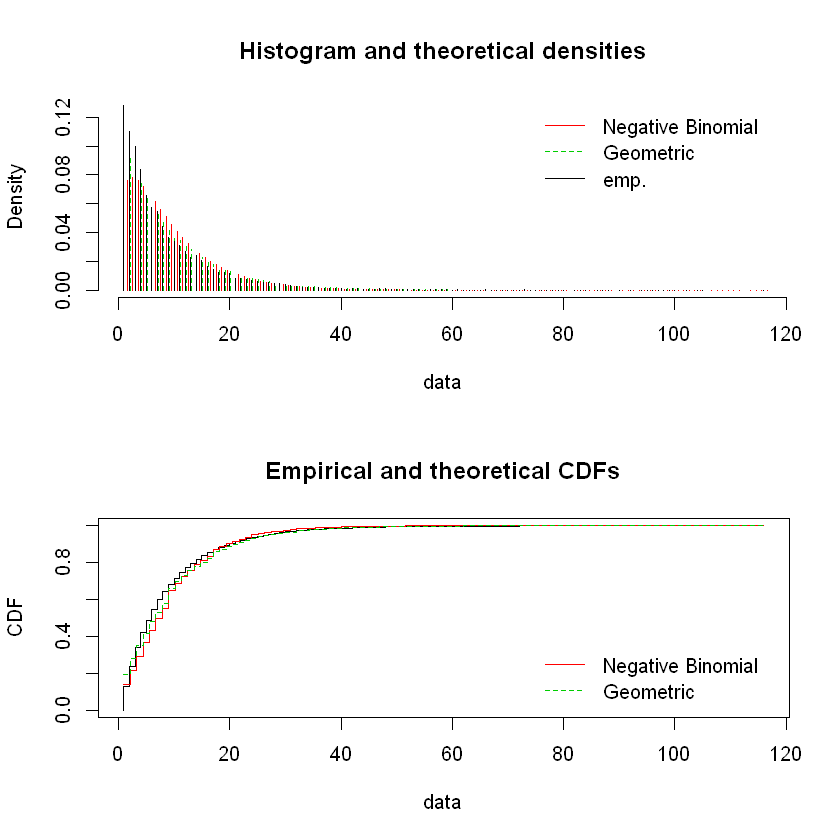

In [173]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dJan, LOfd_GE_dJan), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dJan, LOfd_GE_dJan), legendtext=plot.legend )

In [174]:
LOstatRes <- gofstat( list(LOfd_NB_dJan, LOfd_GE_dJan), fitnames=c("Negative Binomial", "Geometric") )

In [175]:
print(LOstatRes)

Chi-squared statistic:  51634.17 46768.18 
Degree of freedom of the Chi-squared distribution:  38 39 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     117659            127863.8066    179304.3417
<= 2     101334             71967.2054     76076.1072
<= 3      91387             70180.4619     68254.6665
<= 4      76835             66458.9409     61237.3538
<= 5      60370             61810.2514     54941.4963
<= 6      52866             56789.4930     49292.9205
<= 7      50077             51718.9915     44225.0789
<= 8      40553             46788.6762     39678.2659
<= 9      33860             42108.4503     35598.9141
<= 10     31247             37738.0512     31938.9634
<= 11     28334             33705.1532     28655.2950
<= 12     24799             30016.8232     25709.2230
<= 13     20935             26666.9895     23066.0388
<= 14     22157             23641.4081     20694.6023
<= 15     19029             20921.0055    

In [176]:
LOfdNB_dJan_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

[Chi-Squared Test](https://www.r-bloggers.com/chi-squared-test/)

Like all statistical tests, chi-squared test assumes a null hypothesis and an alternate hypothesis. The general practice is, if the p-value that comes out in the result is less than a pre-determined significance level, which is 0.05 usually, then we reject the null hypothesis.

- H0: The The two variables are independent
- H1: The two variables are related.

The null hypothesis of the chi-squared test is that the two variables are independent and the alternate hypothesis is that they are related.

In this case our p-value is 0.0 and we can reject the null hypothesis that sample and MLE-fit distribution are not related.

In [177]:
LOfdNB_dJan_p = LOfdNB_dJan_size / (LOfdNB_dJan_size + LOfdNB_dJan_mu)
cat("LOCA prob: ", LOfdNB_dJan_p)

LOCA prob:  0.13763

In [178]:
# add to our tracking dataframe
LOMonDistDF[1, ] <- list( 1, dLOJanMean, dLOJanBNr, LOfdNB_dJan_p, LOfdNB_dJan_mu, LOfdNB_dJan_size,
                          LOfdNB_dJan_pvalue )

In [179]:
LOgf_dJan <- goodfit( dLOJan$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dJan_size, prob=LOfdNB_dJan_p) )

In [180]:
summary( LOgf_dJan )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          192894.8 116        0
Likelihood Ratio 186348.3  98        0


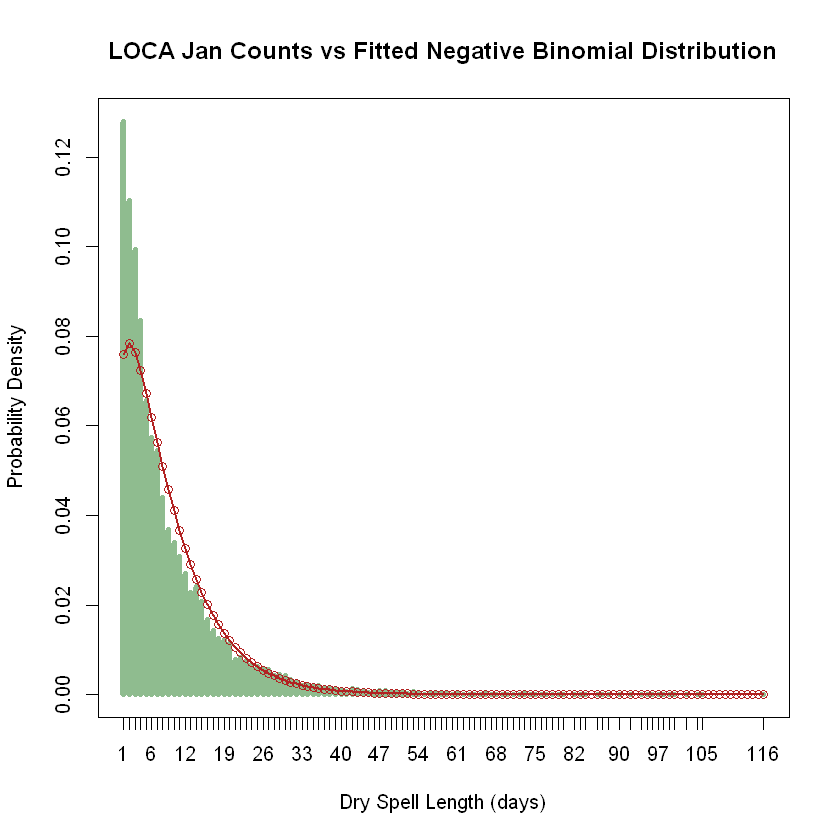

In [181]:
maxP <- max(dLOJan$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dJan_size, mu=LOfdNB_dJan_mu )
ttab <- table( dLOJan$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Jan Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

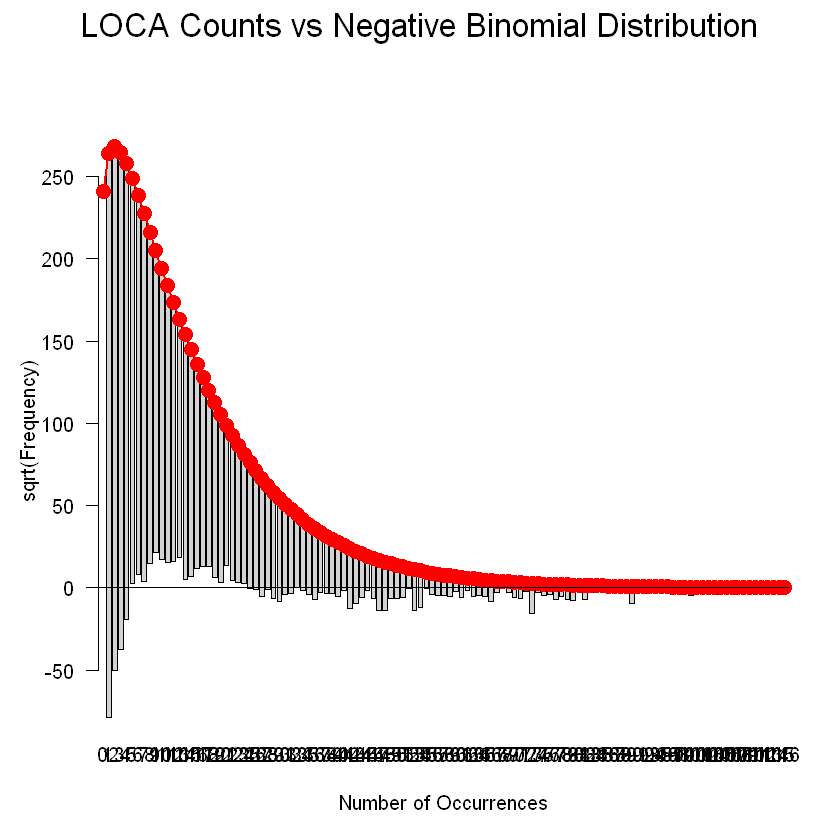

In [182]:
plot( LOgf_dJan, main="LOCA Counts vs Negative Binomial Distribution" )

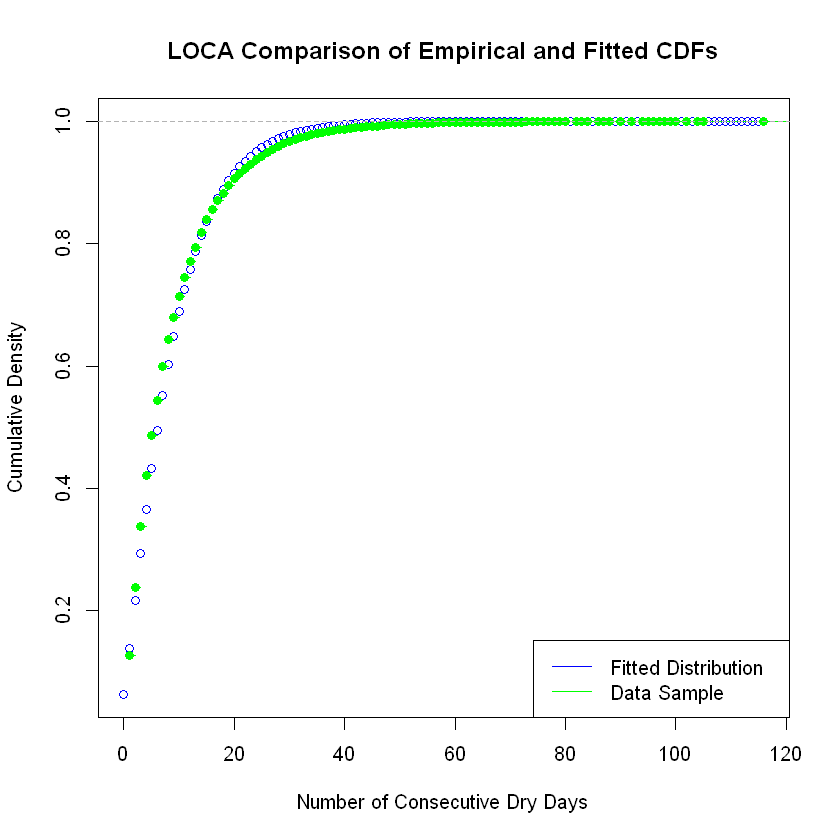

In [183]:
x <- seq(0,dLOJanMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dJan_mu, size=LOfdNB_dJan_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOJan$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

In [184]:
ks.test( dLOJan$Dry_Count, "pnbinom", mu=LOfdNB_dJan_mu, size=LOfdNB_dJan_size )


	One-sample Kolmogorov-Smirnov test

data:  dLOJan$Dry_Count
D = 0.13909, p-value < 2.2e-16
alternative hypothesis: two-sided


Generally, K-S test is better for continuous distributions.

[Kolmogorv-Smirnov Test](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/ks.test.html)

Null hypothesis that the true distribution function of x is equal to the hypothesized distribution function (one-sample case). This is a comparison of cumulative distribution functions, and the test statistic is the maximum difference in value, with the statistic in the "greater" alternative being D^+ = max[F_x(u) - F_y(u)]

Exact p-values are not available for the two-sample case if one-sided or in the presence of ties. If exact = NULL (the default), an exact p-value is computed if the sample size is less than 100 in the one-sample case and there are no ties, and if the product of the sample sizes is less than 10000 in the two-sample case. Otherwise, asymptotic distributions are used whose approximations may be inaccurate in small samples.

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). In the one-sample case, the distribution considered under the null hypothesis may be continuous (see Section 2), purely discrete or mixed (see Section 2.2).

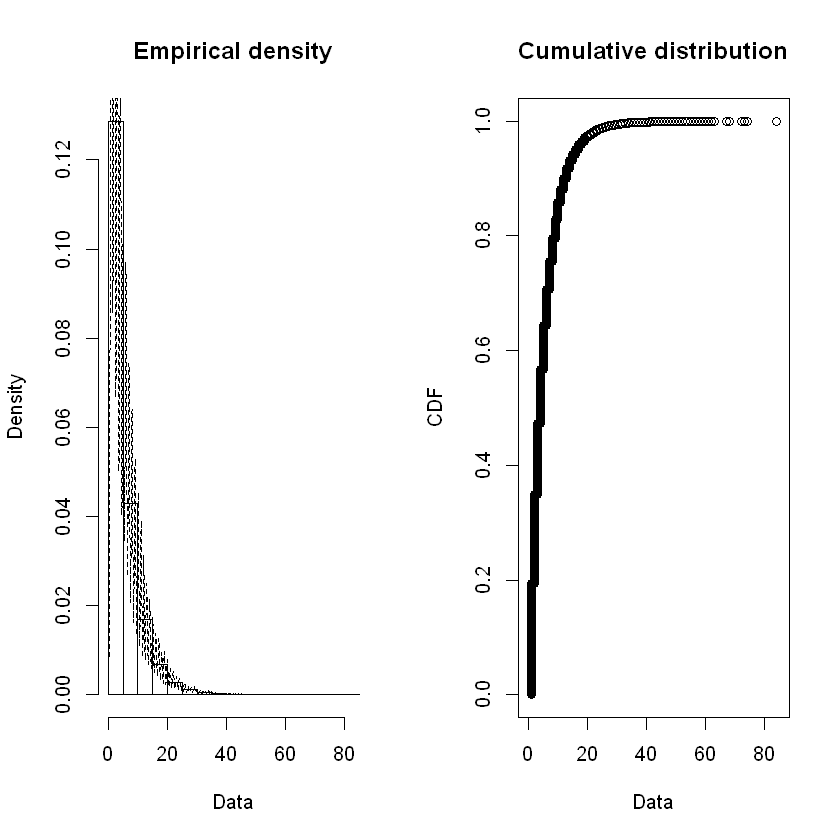

In [185]:
plotdist( dBCJan$Dry_Count, histo=TRUE, demp=TRUE )

In [186]:
BCfd_NB_dJan <- fitdist( dBCJan$Dry_Count, "nbinom" )
BCfd_GE_dJan <- fitdist( dBCJan$Dry_Count, "geom" )

In [187]:
summary( BCfd_NB_dJan )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.797532 0.003942221
mu   5.574791 0.005835940
Loglikelihood:  -1845382   AIC:  3690768   BIC:  3690791 
Correlation matrix:
              size            mu
size  1.000000e+00 -9.573041e-05
mu   -9.573041e-05  1.000000e+00


In [188]:
BCfdNB_dJan_size <- BCfd_NB_dJan$estimate[["size"]]
BCfdNB_dJan_mu <- BCfd_NB_dJan$estimate[["mu"]]
cat("BCCA Jan size: ", BCfdNB_dJan_size, "\n", "BCCA Jan mu: ", BCfdNB_dJan_mu, "\n")

BCCA Jan size:  1.797532 
 BCCA Jan mu:  5.574791 


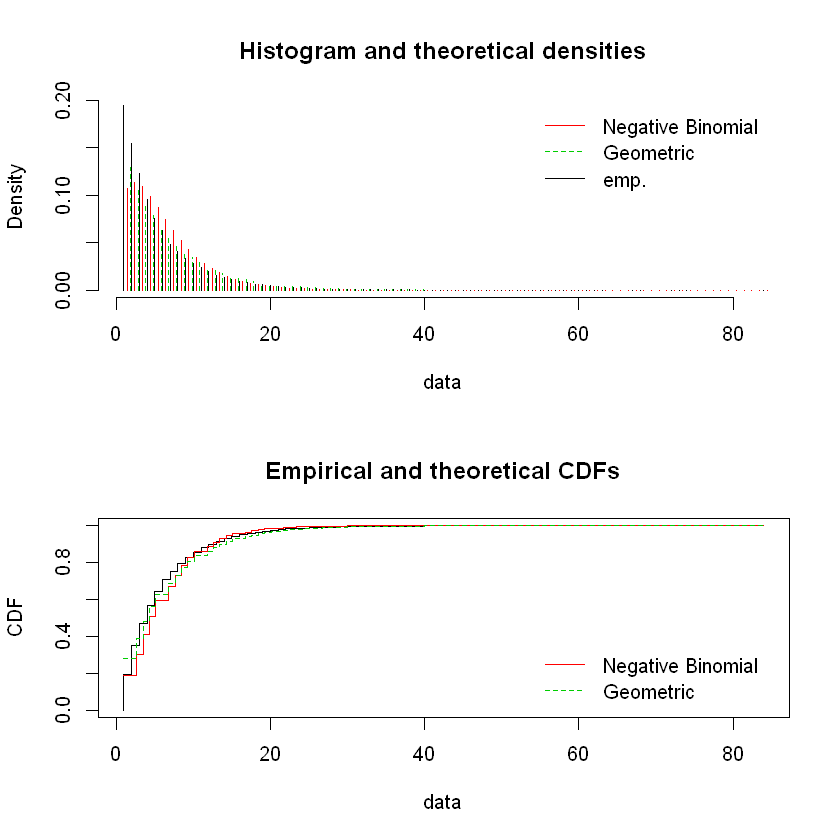

In [189]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dJan, BCfd_GE_dJan), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dJan, BCfd_GE_dJan), legendtext=plot.legend )

In [190]:
BCstatRes <- gofstat( list(BCfd_NB_dJan, BCfd_GE_dJan), fitnames=c("Negative Binomial", "Geometric") )

In [191]:
print(BCstatRes)

Chi-squared statistic:  35927.57 43512.07 
Degree of freedom of the Chi-squared distribution:  24 25 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     130348            125313.6546     188711.574
<= 2     103938             76364.8767      73418.630
<= 3      82741             73096.7483      62251.372
<= 4      63999             66294.9079      52782.697
<= 5      50934             58126.9524      44754.244
<= 6      42075             49796.8418      37946.950
<= 7      32641             41945.4797      32175.071
<= 8      27576             34880.3052      27281.118
<= 9      22546             28713.0086      23131.554
<= 10     18991             23443.7698      19613.155
<= 11     16144             19012.9792      16629.918
<= 12     13034             15332.7269      14100.443
<= 13     10679             12305.5692      11955.711
<= 14      9316              9835.2909      10137.201
<= 15      7621              7832.6631    

In [192]:
BCfdNB_dJan_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [193]:
BCfdNB_dJan_p = BCfdNB_dJan_size / (BCfdNB_dJan_size + BCfdNB_dJan_mu)
cat("BCCA prob: ", BCfdNB_dJan_p)

BCCA prob:  0.2438216

In [194]:
# add to our tracking dataframe
BCMonDistDF[1, ] <- list( 1, dBCJanMean, dBCJanBNr, BCfdNB_dJan_p, BCfdNB_dJan_mu, BCfdNB_dJan_size,
                          BCfdNB_dJan_pvalue )

In [195]:
BCgf_dJan <- goodfit( dBCJan$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dJan_size, prob=BCfdNB_dJan_p) )

In [196]:
summary( BCgf_dJan )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          264012.7 84        0
Likelihood Ratio 174118.0 68        0


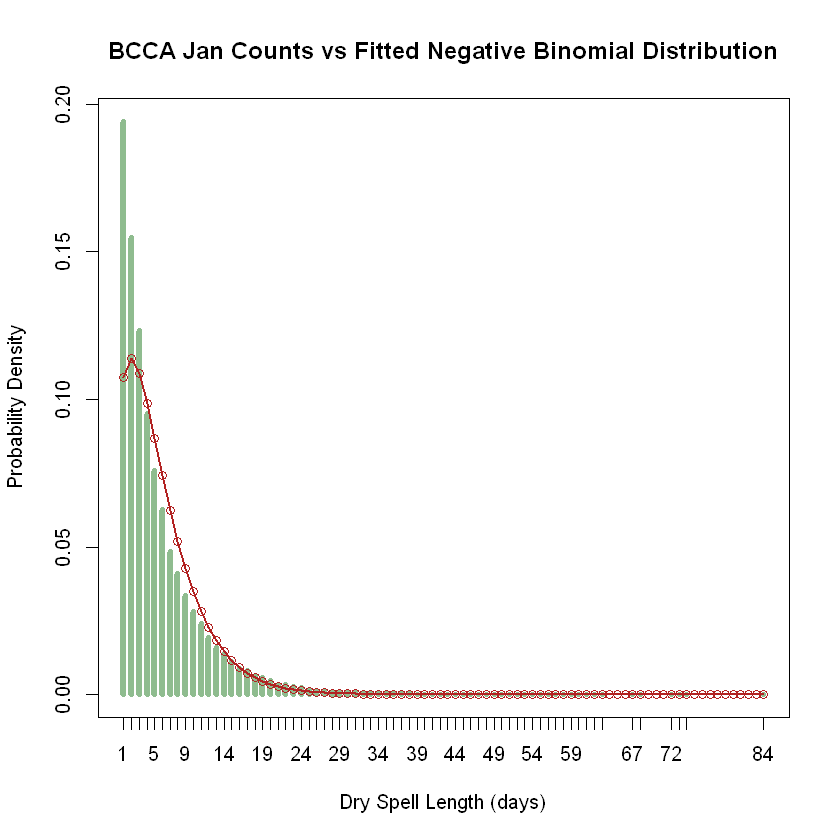

In [197]:
maxP <- max(dBCJan$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dJan_size, mu=BCfdNB_dJan_mu )
ttab <- table( dBCJan$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Jan Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

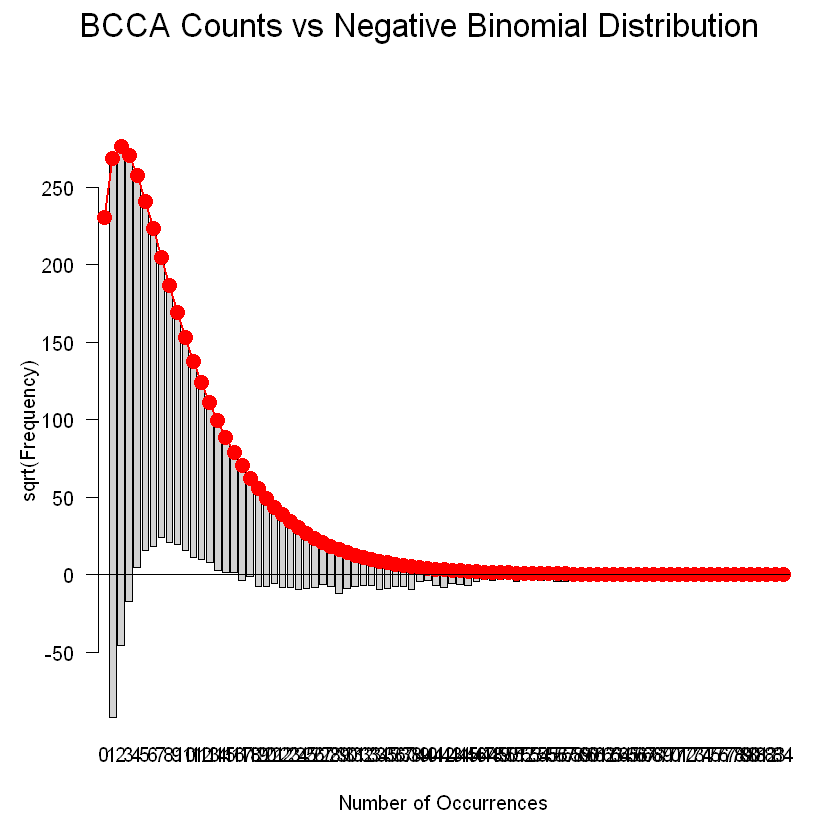

In [198]:
plot( BCgf_dJan, main="BCCA Counts vs Negative Binomial Distribution" )

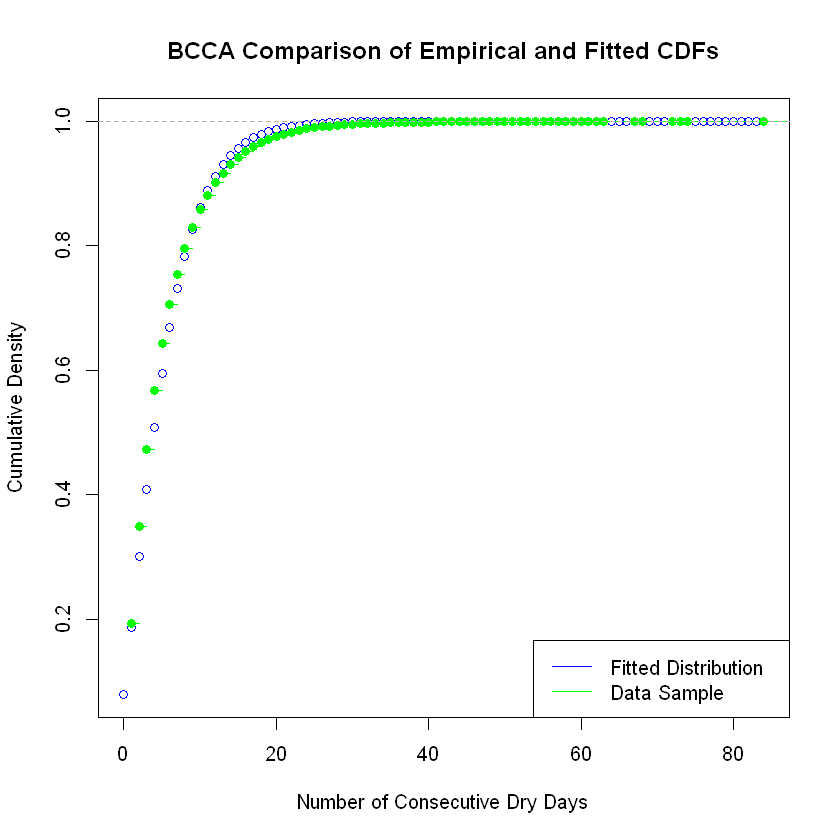

In [199]:
x <- seq(0,dBCJanMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dJan_mu, size=BCfdNB_dJan_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCJan$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

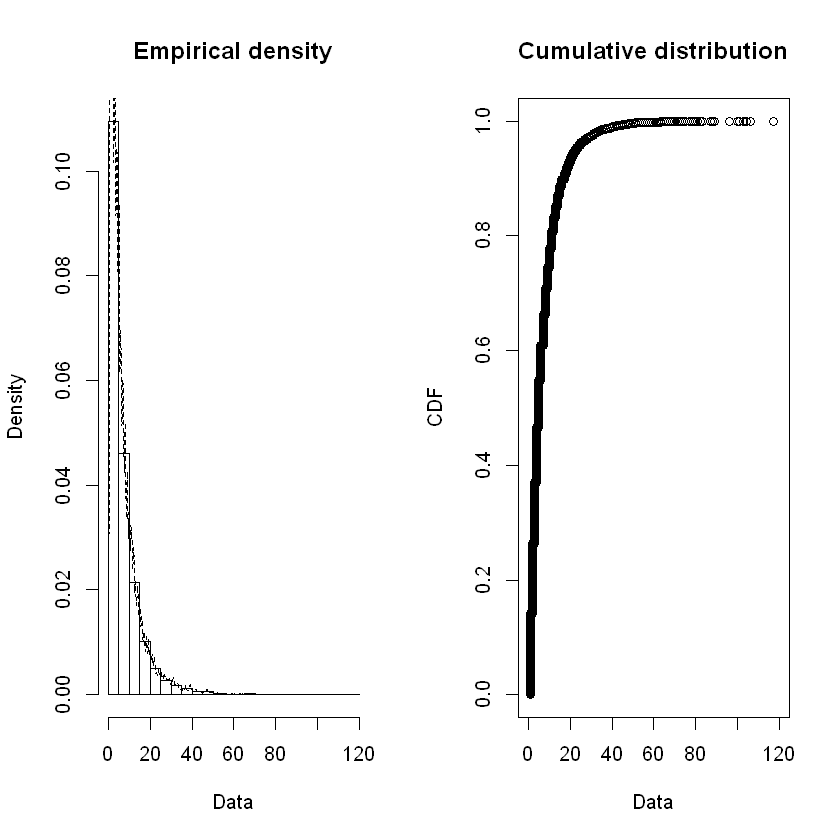

In [200]:
plotdist( dLOFeb$Dry_Count, histo=TRUE, demp=TRUE )

In [201]:
LOfd_NB_dFeb <- fitdist( dLOFeb$Dry_Count, "nbinom" )
LOfd_GE_dFeb <- fitdist( dLOFeb$Dry_Count, "geom" )

In [202]:
LOfdNB_dFeb_size <- LOfd_NB_dFeb$estimate[["size"]]
LOfdNB_dFeb_mu <- LOfd_NB_dFeb$estimate[["mu"]]
cat("LOCA Feb size: ", LOfdNB_dFeb_size, "\n", "LOCA Feb mu: ", LOfdNB_dFeb_mu, "\n")

LOCA Feb size:  1.493401 
 LOCA Feb mu:  7.479626 


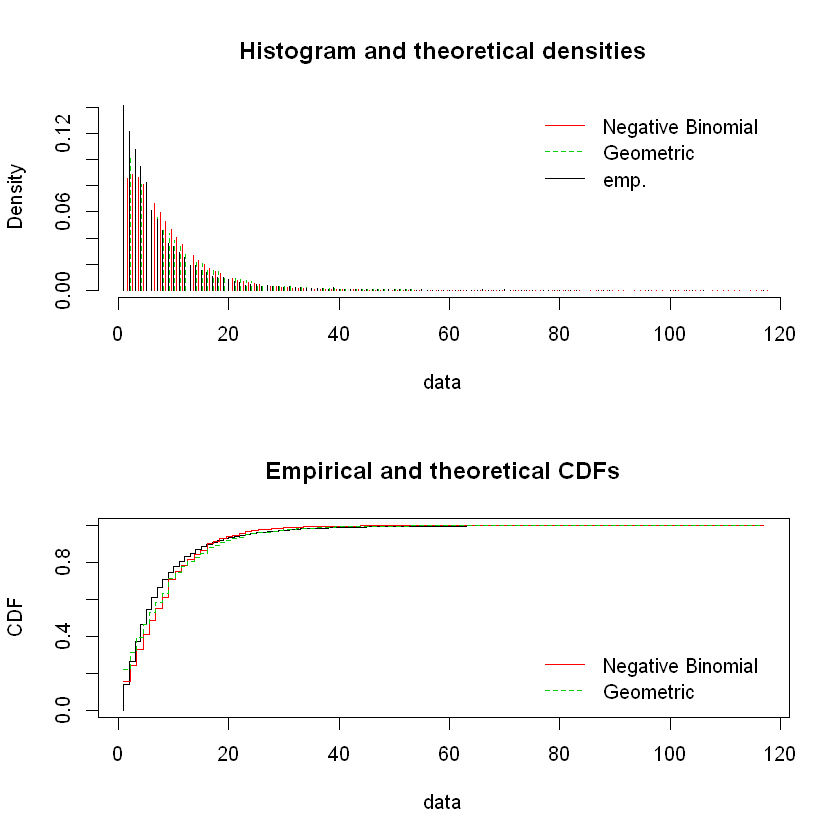

In [203]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dFeb, LOfd_GE_dFeb), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dFeb, LOfd_GE_dFeb), legendtext=plot.legend )

In [204]:
LOstatRes <- gofstat( list(LOfd_NB_dFeb, LOfd_GE_dFeb), fitnames=c("Negative Binomial", "Geometric") )

In [205]:
print( LOstatRes )

Chi-squared statistic:  86469.68 69252.38 
Degree of freedom of the Chi-squared distribution:  34 35 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     134412            146661.3500     211078.330
<= 2     115548             84517.8881      87257.534
<= 3     102506             82038.3194      76965.975
<= 4      89835             76819.7458      67888.250
<= 5      78524             70353.3987      59881.195
<= 6      58437             63466.8539      52818.528
<= 7      51615             56632.9020      46588.866
<= 8      43311             50118.8813      41093.958
<= 9      33911             44067.8226      36247.146
<= 10     31924             38545.9514      31971.989
<= 11     27648             33571.8712      28201.064
<= 12     24005             29135.0580      24874.899
<= 13     18066             25207.7954      21941.038
<= 14     17878             21752.9440      19353.210
<= 15     14658             18728.9938    

In [206]:
LOfdNB_dFeb_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [207]:
LOfdNB_dFeb_p = LOfdNB_dFeb_size / (LOfdNB_dFeb_size + LOfdNB_dFeb_mu)
cat("LOCA prob: ", LOfdNB_dFeb_p)

LOCA prob:  0.1664323

In [208]:
# add to our tracking dataframe
LOMonDistDF[2, ] <- list( 2, dLOFebMean, dLOFebBNr, LOfdNB_dFeb_p, LOfdNB_dFeb_mu, LOfdNB_dFeb_size,
                          LOfdNB_dFeb_pvalue )

In [209]:
LOgf_dFeb <- goodfit( dLOFeb$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dFeb_size, prob=LOfdNB_dFeb_p) )

In [210]:
summary( LOgf_dFeb )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          301498.3 117        0
Likelihood Ratio 219531.1  91        0


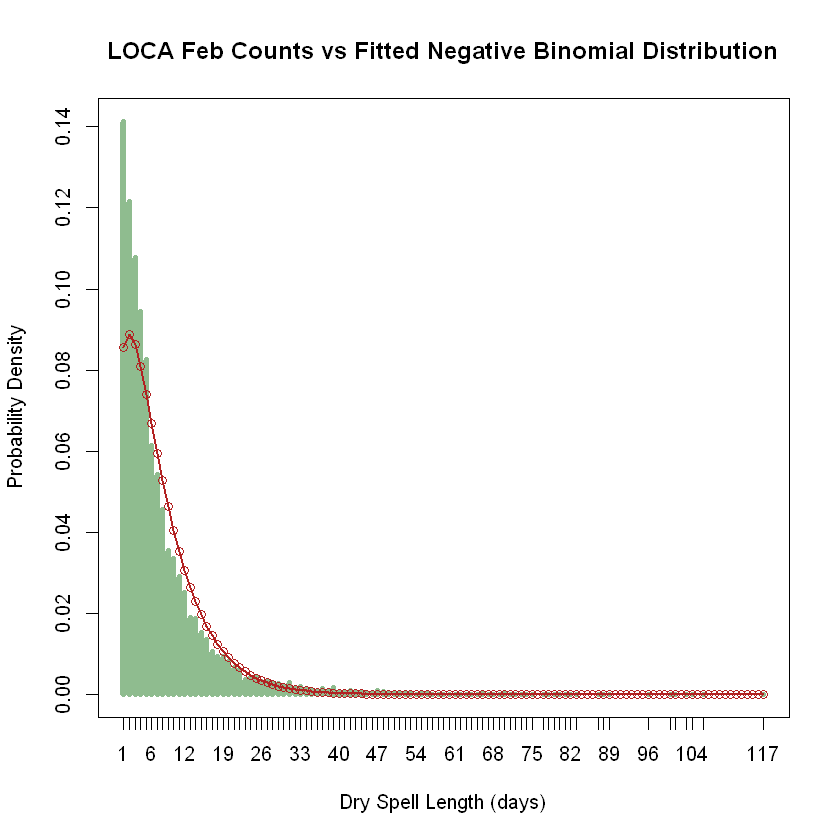

In [211]:
maxP <- max(dLOFeb$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dFeb_size, mu=LOfdNB_dFeb_mu )
ttab <- table( dLOFeb$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Feb Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

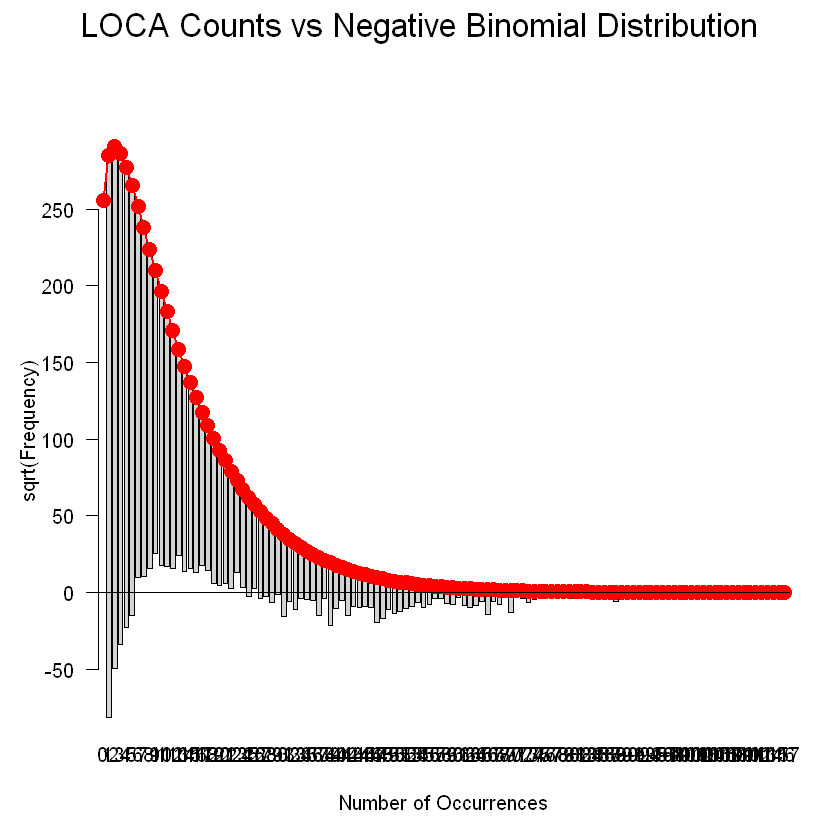

In [212]:
plot( LOgf_dFeb, main="LOCA Counts vs Negative Binomial Distribution" )

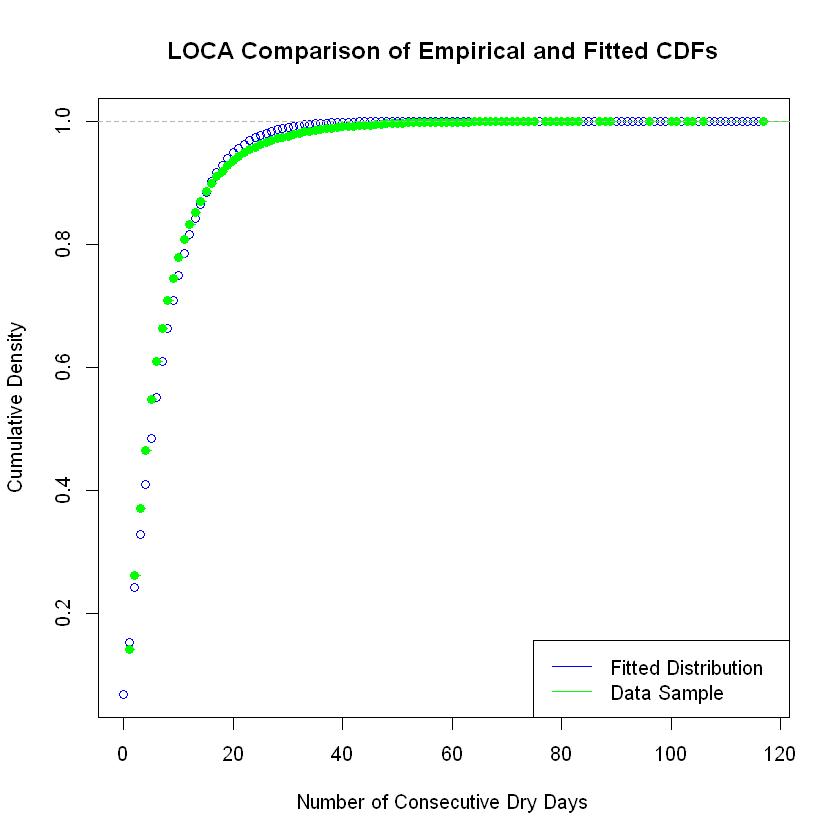

In [213]:
x <- seq(0,dLOFebMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dFeb_mu, size=LOfdNB_dFeb_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOFeb$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

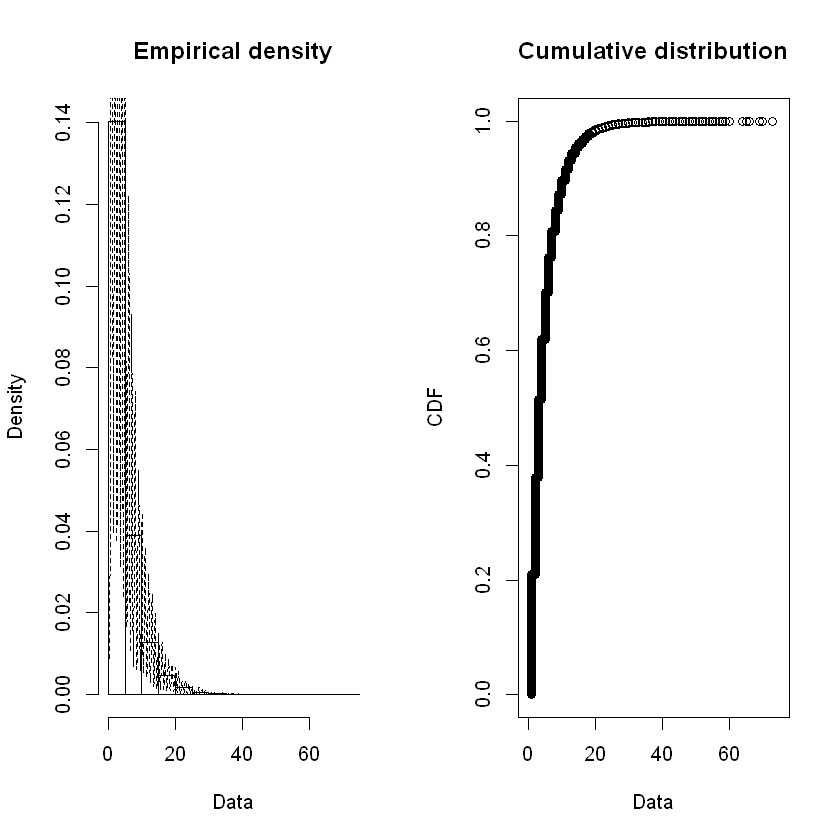

In [214]:
plotdist( dBCFeb$Dry_Count, histo=TRUE, demp=TRUE )

In [215]:
BCfd_NB_dFeb <- fitdist( dBCFeb$Dry_Count, "nbinom" )
BCfd_GE_dFeb <- fitdist( dBCFeb$Dry_Count, "geom" )

In [216]:
summary( BCfd_NB_dFeb )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.035782 0.004760214
mu   4.876860 0.004954724
Loglikelihood:  -1759670   AIC:  3519344   BIC:  3519367 
Correlation matrix:
              size            mu
size  1.0000000000 -0.0001453172
mu   -0.0001453172  1.0000000000


In [217]:
BCfdNB_dFeb_size <- BCfd_NB_dFeb$estimate[["size"]]
BCfdNB_dFeb_mu <- BCfd_NB_dFeb$estimate[["mu"]]
cat("BCCA Feb size: ", BCfdNB_dFeb_size, "\n", "BCCA Feb mu: ", BCfdNB_dFeb_mu, "\n")

BCCA Feb size:  2.035782 
 BCCA Feb mu:  4.87686 


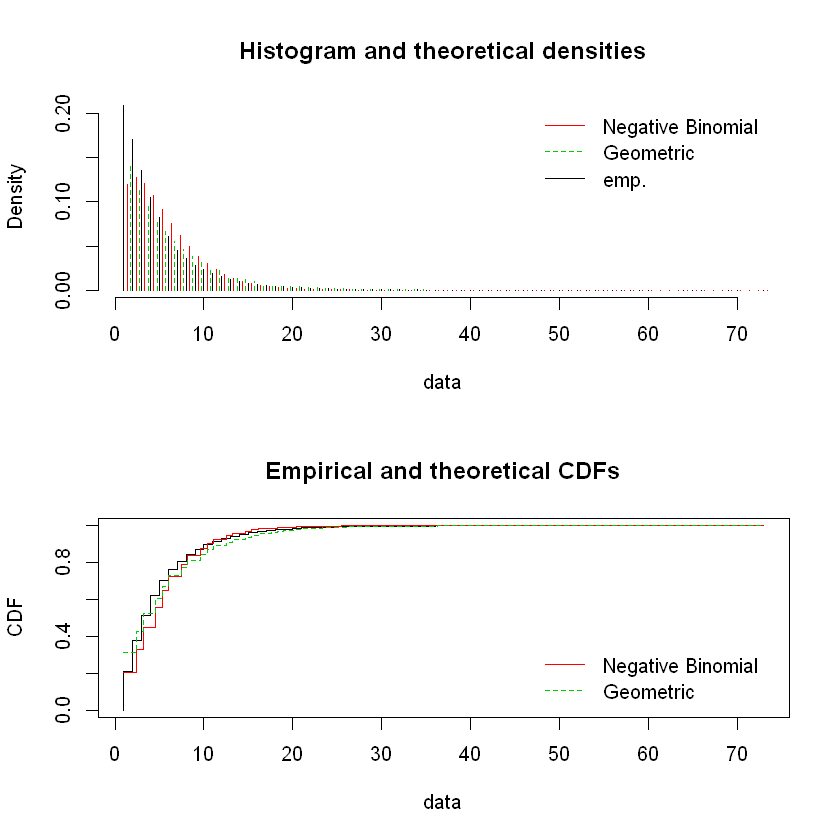

In [218]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dFeb, BCfd_GE_dFeb), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dFeb, BCfd_GE_dFeb), legendtext=plot.legend )

In [219]:
BCstatRes <- gofstat( list(BCfd_NB_dFeb, BCfd_GE_dFeb), fitnames=c("Negative Binomial", "Geometric") )

In [220]:
print(BCstatRes)

Chi-squared statistic:  55413.22 61162.61 
Degree of freedom of the Chi-squared distribution:  22 23 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     140865            136451.4034     210076.621
<= 2     115178             86143.4007      79057.670
<= 3      91328             81756.9541      65604.306
<= 4      70506             72615.2561      54440.321
<= 5      55643             61842.5874      45176.129
<= 6      41150             51161.7051      37488.438
<= 7      30674             41435.3821      31108.974
<= 8      24592             33017.4354      25815.112
<= 9      19169             25974.5645      21422.115
<= 10     16036             20223.0947      17776.681
<= 11     13006             15610.8112      14751.596
<= 12     10461             11964.0313      12241.295
<= 13      8266              9113.1188      10158.175
<= 14      6646              6904.9612       8429.543
<= 15      4997              5207.8246    

In [221]:
BCfdNB_dFeb_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [222]:
BCfdNB_dFeb_p = BCfdNB_dFeb_size / (BCfdNB_dFeb_size + BCfdNB_dFeb_mu)
cat("BCCA prob: ", BCfdNB_dFeb_p)

BCCA prob:  0.2945013

In [223]:
# add to our tracking dataframe
BCMonDistDF[2, ] <- list( 2, dBCFebMean, dBCFebBNr, BCfdNB_dFeb_p, BCfdNB_dFeb_mu, BCfdNB_dFeb_size,
                          BCfdNB_dFeb_pvalue )

In [224]:
BCgf_dFeb <- goodfit( dBCFeb$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dFeb_size, prob=BCfdNB_dFeb_p) )

In [225]:
summary( BCgf_dFeb )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          774946.0 73        0
Likelihood Ratio 186412.5 65        0


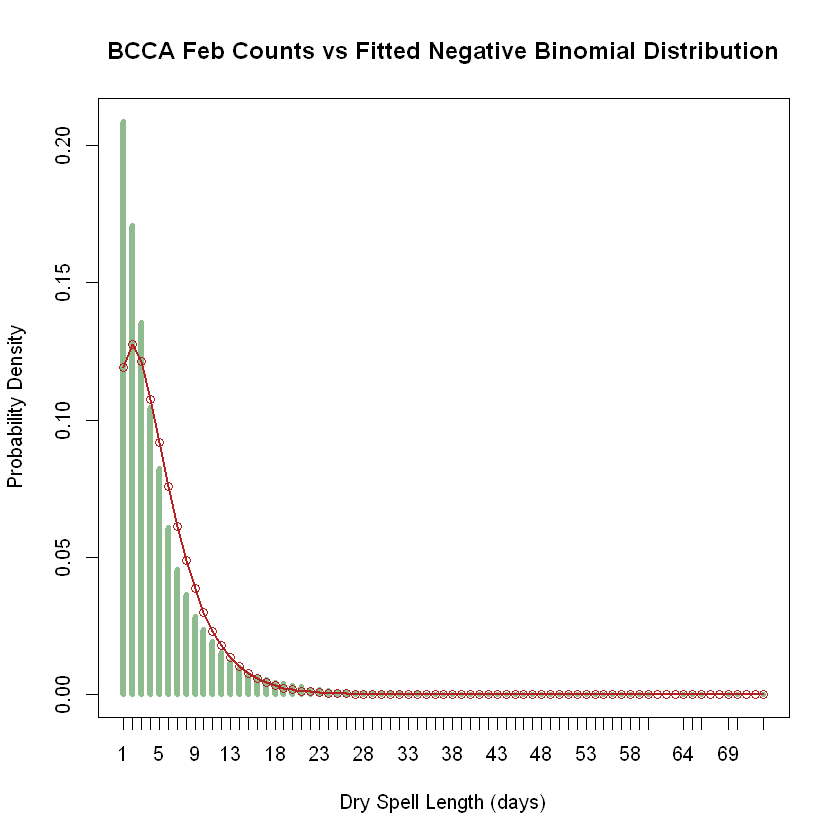

In [226]:
maxP <- max(dBCFeb$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dFeb_size, mu=BCfdNB_dFeb_mu )
ttab <- table( dBCFeb$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Feb Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

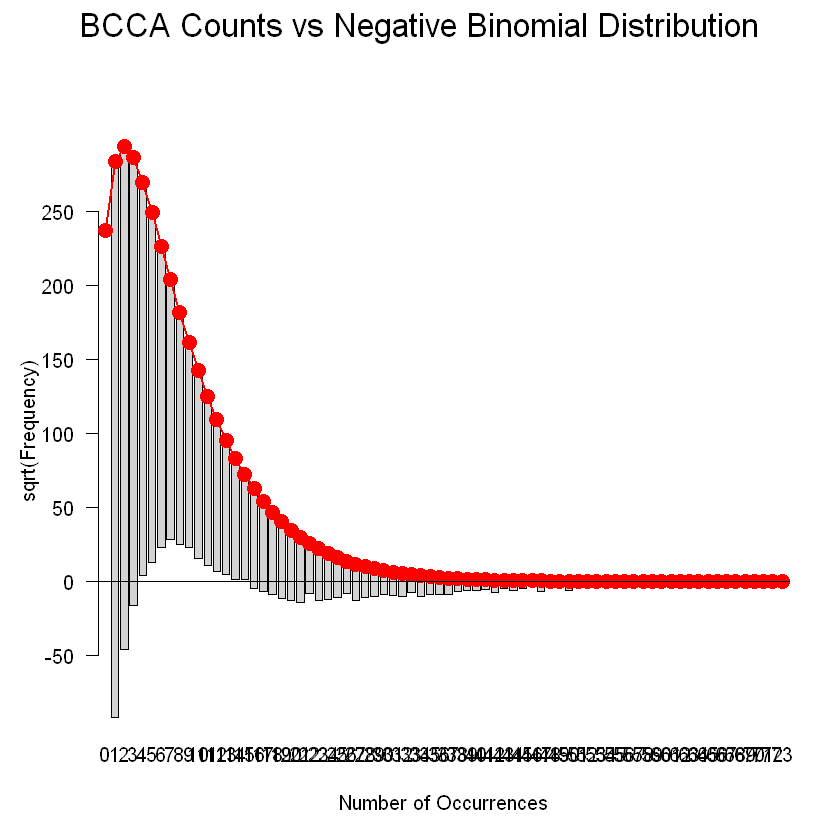

In [227]:
plot( BCgf_dFeb, main="BCCA Counts vs Negative Binomial Distribution" )

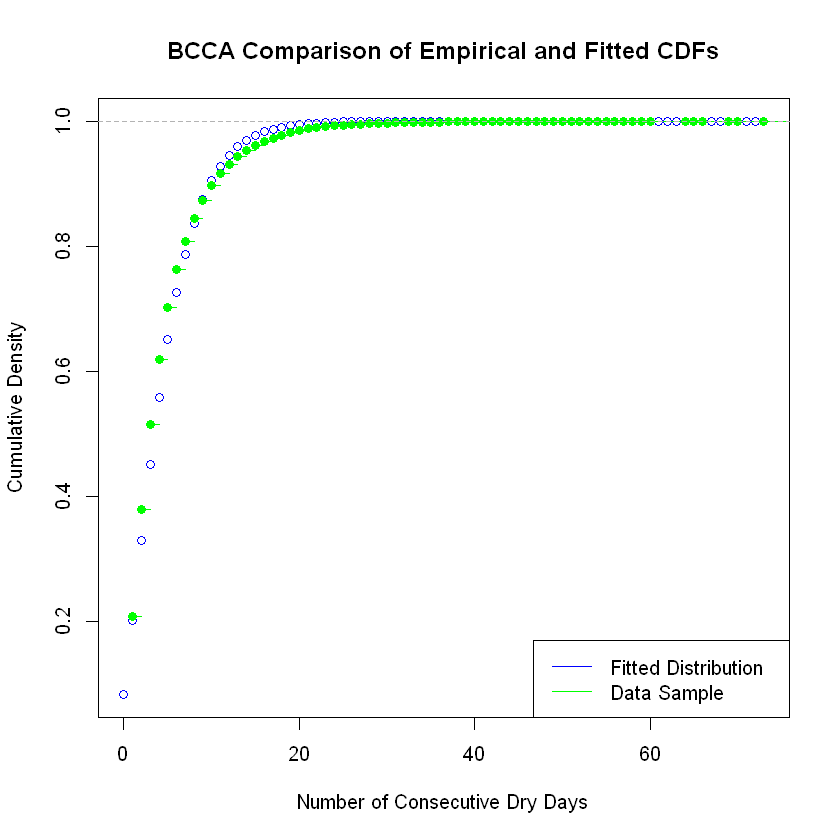

In [228]:
x <- seq(0,dBCFebMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dFeb_mu, size=BCfdNB_dFeb_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCFeb$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

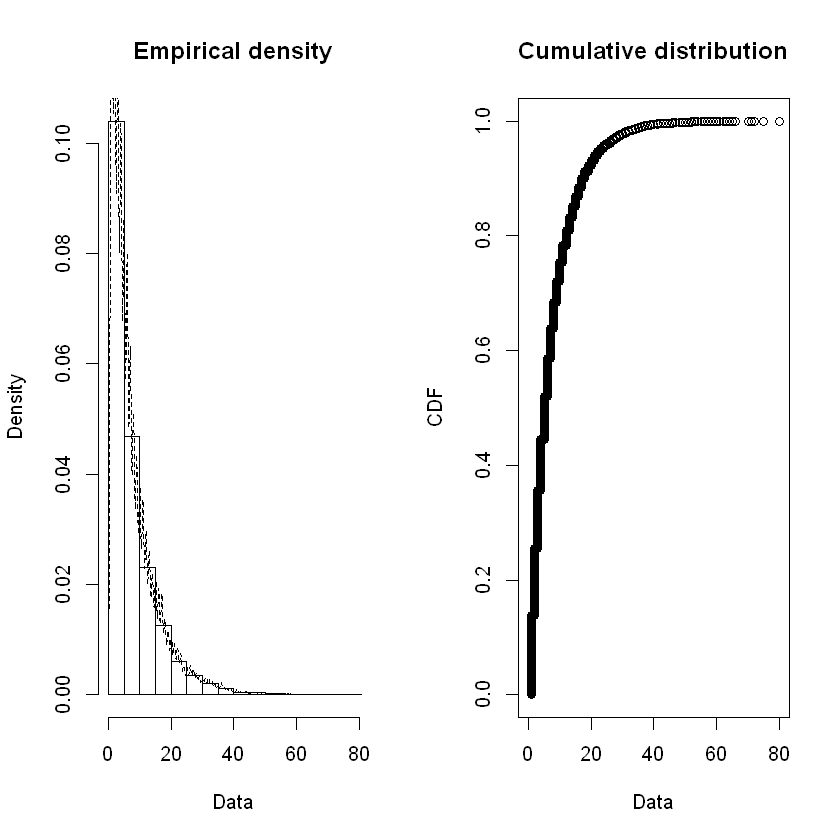

In [229]:
plotdist( dLOMar$Dry_Count, histo=TRUE, demp=TRUE )

In [230]:
LOfd_NB_dMar <- fitdist( dLOMar$Dry_Count, "nbinom" )
LOfd_GE_dMar <- fitdist( dLOMar$Dry_Count, "geom" )

In [231]:
LOfdNB_dMar_size <- LOfd_NB_dMar$estimate[["size"]]
LOfdNB_dMar_mu <- LOfd_NB_dMar$estimate[["mu"]]
cat("LOCA Mar size: ", LOfdNB_dMar_size, "\n", "LOCA Mar mu: ", LOfdNB_dMar_mu, "\n")

LOCA Mar size:  1.544355 
 LOCA Mar mu:  7.716668 


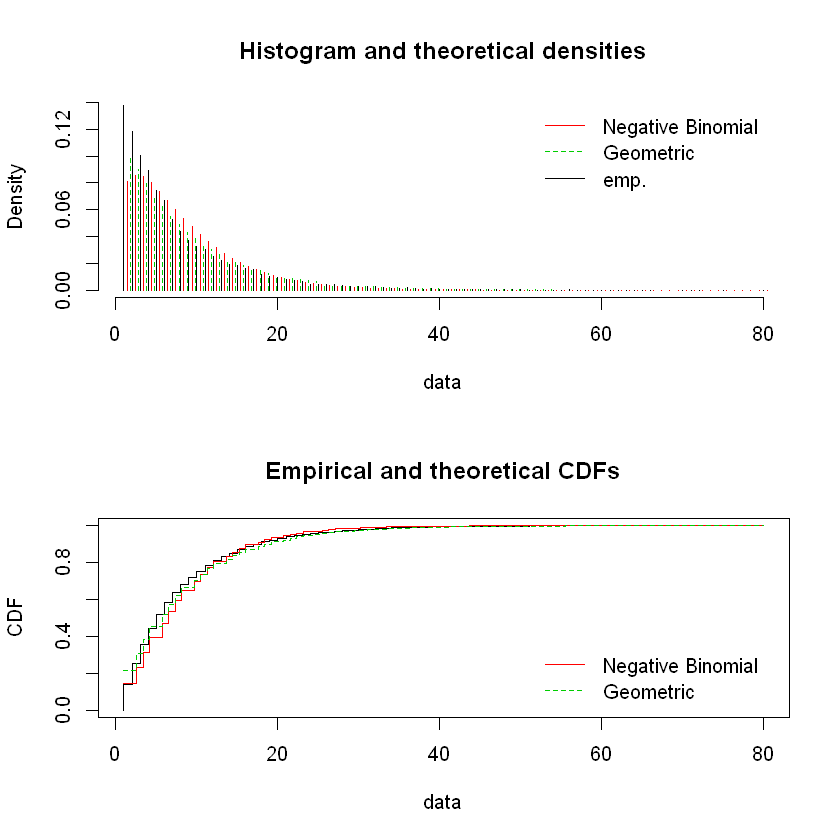

In [232]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dMar, LOfd_GE_dMar), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dMar, LOfd_GE_dMar), legendtext=plot.legend )

In [233]:
LOstatRes <- gofstat( list(LOfd_NB_dMar, LOfd_GE_dMar), fitnames=c("Negative Binomial", "Geometric") )

In [234]:
print( LOstatRes )

Chi-squared statistic:  42859.14 57311.3 
Degree of freedom of the Chi-squared distribution:  34 35 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     141447             147956.909     222435.801
<= 2     121356              88255.091      92471.562
<= 3     103608              86881.358      81865.449
<= 4      91903              82245.041      72475.814
<= 5      76507              75990.903      64163.133
<= 6      68625              69063.416      56803.882
<= 7      54282              62021.603      50288.707
<= 8      45407              55195.432      44520.796
<= 9      38355              48772.842      39414.441
<= 10     33733              42851.786      34893.765
<= 11     31172              37472.853      30891.592
<= 12     26200              32640.342      27348.451
<= 13     23132              28336.129      24211.695
<= 14     19492              24528.885      21434.712
<= 15     19002              21180.202     

In [235]:
LOfdNB_dMar_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [236]:
LOfdNB_dMar_p = LOfdNB_dMar_size / (LOfdNB_dMar_size + LOfdNB_dMar_mu)
cat("LOCA prob: ", LOfdNB_dMar_p)

LOCA prob:  0.1667586

In [237]:
# add to our tracking dataframe
LOMonDistDF[3, ] <- list( 3, dLOMarMean, dLOMarBNr, LOfdNB_dMar_p, LOfdNB_dMar_mu, LOfdNB_dMar_size,
                          LOfdNB_dMar_pvalue )

In [238]:
LOgf_dMar <- goodfit( dLOMar$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dMar_size, prob=LOfdNB_dMar_p) )

In [239]:
summary( LOgf_dMar )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          153186.2 80        0
Likelihood Ratio 202804.5 70        0


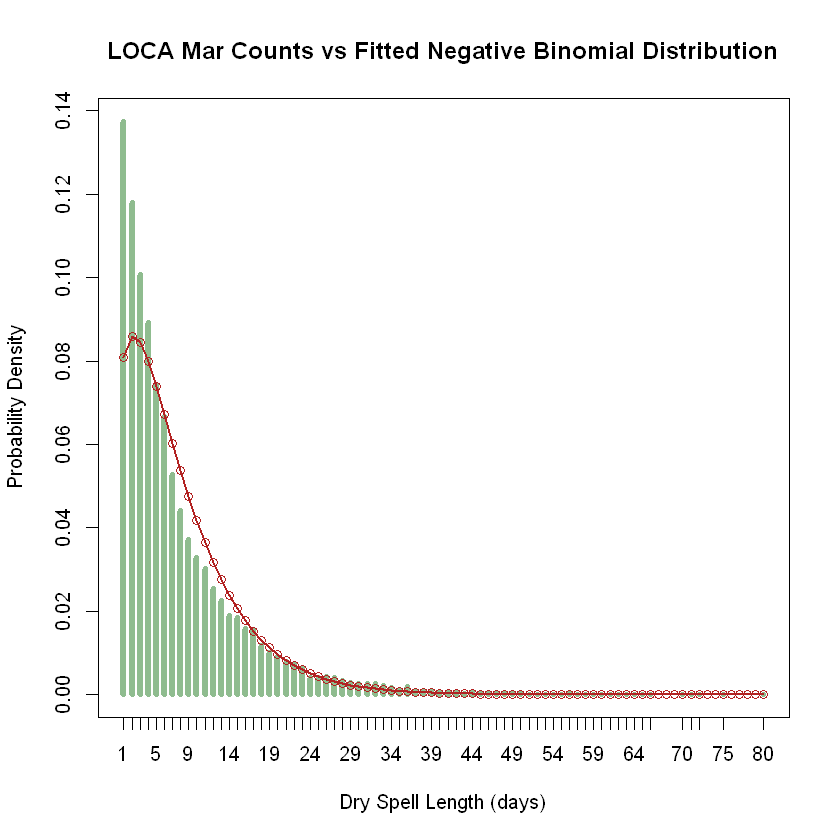

In [240]:
maxP <- max(dLOMar$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dMar_size, mu=LOfdNB_dMar_mu )
ttab <- table( dLOMar$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Mar Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

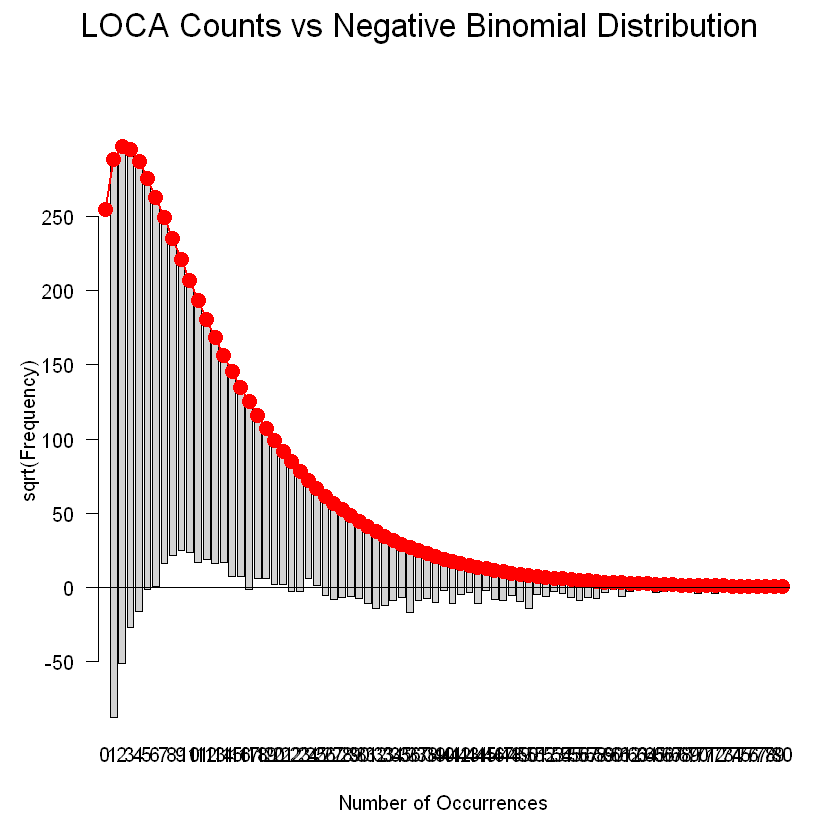

In [241]:
plot( LOgf_dMar, main="LOCA Counts vs Negative Binomial Distribution" )

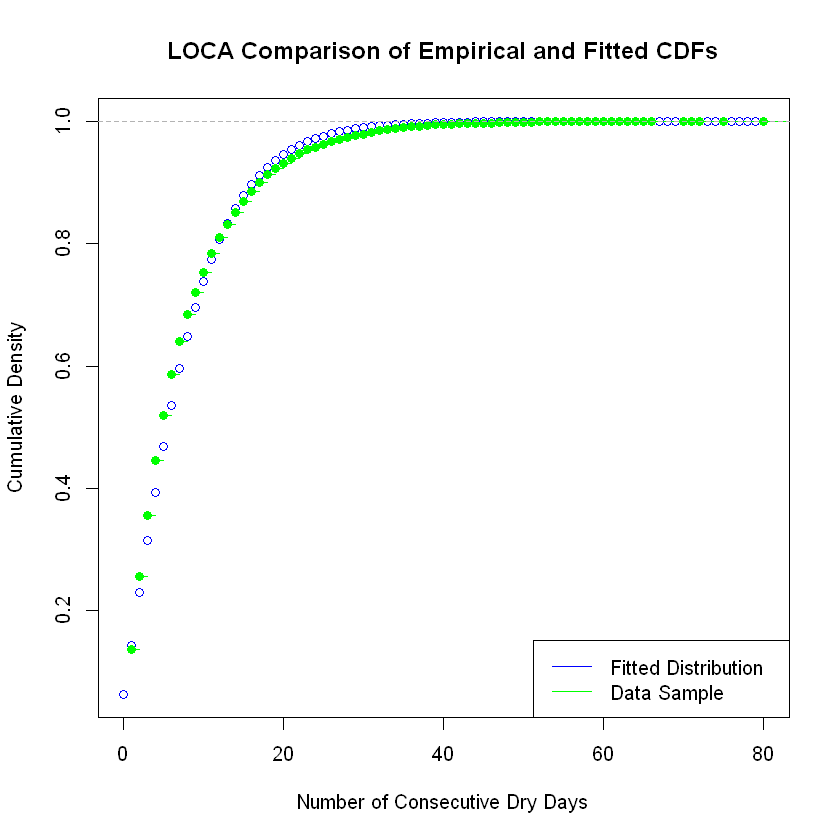

In [242]:
x <- seq(0,dLOMarMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dMar_mu, size=LOfdNB_dMar_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOMar$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

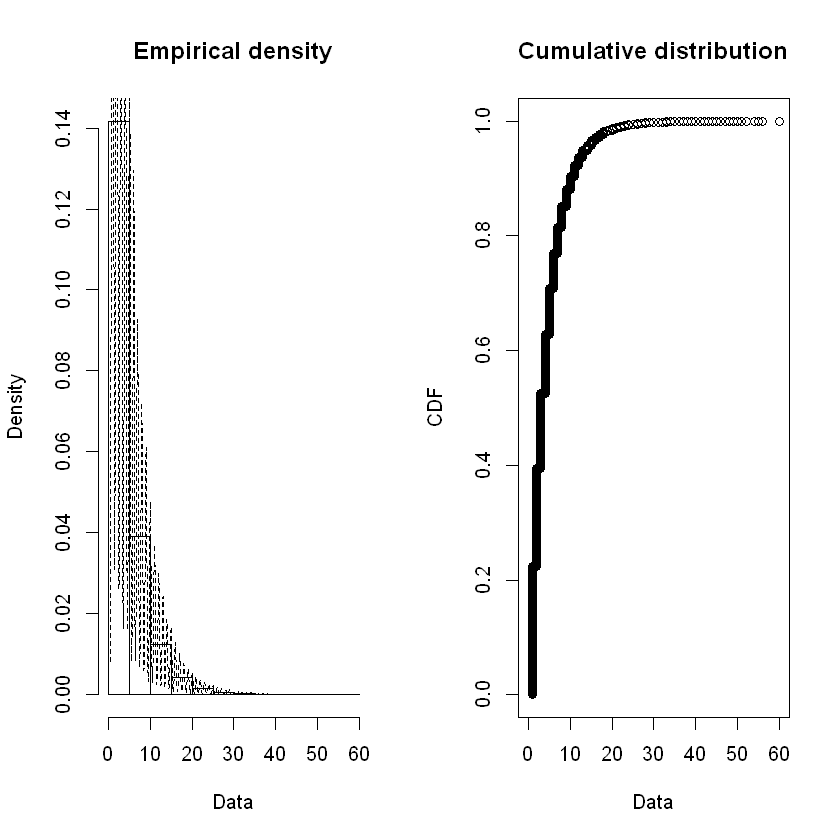

In [243]:
plotdist( dBCMar$Dry_Count, histo=TRUE, demp=TRUE )

In [244]:
BCfd_NB_dMar <- fitdist( dBCMar$Dry_Count, "nbinom" )
BCfd_GE_dMar <- fitdist( dBCMar$Dry_Count, "geom" )

In [245]:
summary( BCfd_NB_dMar )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.081625 0.004653893
mu   4.722563 0.004488550
Loglikelihood:  -1974585   AIC:  3949175   BIC:  3949198 
Correlation matrix:
              size            mu
size  1.0000000000 -0.0002417029
mu   -0.0002417029  1.0000000000


In [246]:
BCfdNB_dMar_size <- BCfd_NB_dMar$estimate[["size"]]
BCfdNB_dMar_mu <- BCfd_NB_dMar$estimate[["mu"]]
cat("BCCA Mar size: ", BCfdNB_dMar_size, "\n", "BCCA Mar mu: ", BCfdNB_dMar_mu, "\n")

BCCA Mar size:  2.081625 
 BCCA Mar mu:  4.722563 


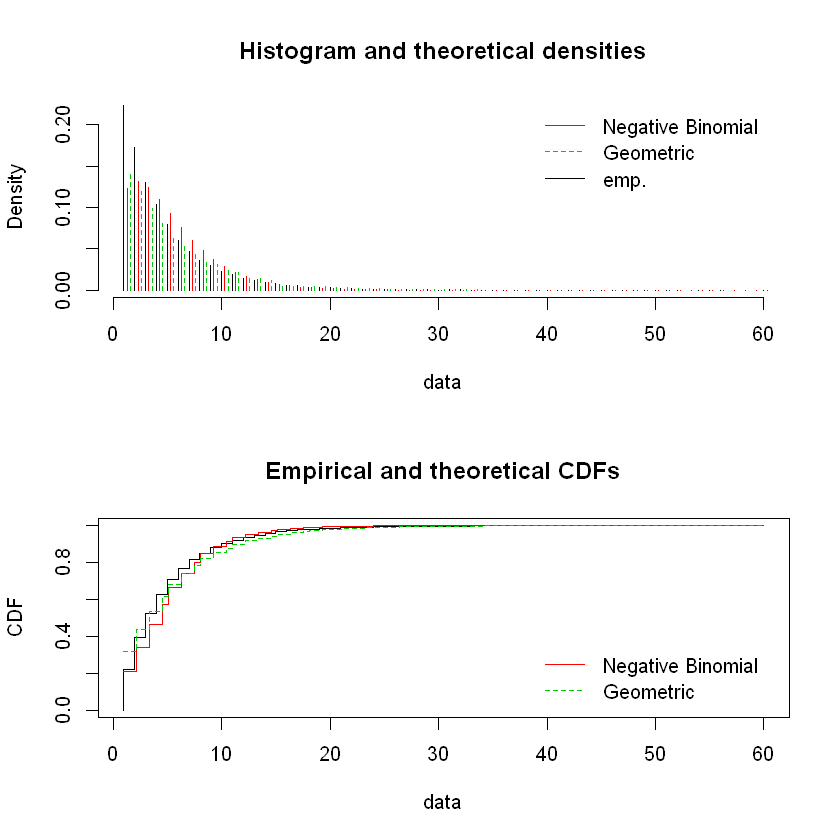

In [247]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dMar, BCfd_GE_dMar), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dMar, BCfd_GE_dMar), legendtext=plot.legend )

In [248]:
BCstatRes <- gofstat( list(BCfd_NB_dMar, BCfd_GE_dMar), fitnames=c("Negative Binomial", "Geometric") )

In [249]:
print(BCstatRes)

Chi-squared statistic:  49093 60185.06 
Degree of freedom of the Chi-squared distribution:  21 22 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     170696            159204.6830     244471.725
<= 2     131865            100616.6774      91214.209
<= 3     100051             95013.0547      75272.863
<= 4      79327             83777.4925      62117.558
<= 5      60907             70725.8932      51261.382
<= 6      46269             57937.7416      42302.521
<= 7      35989             46426.2559      34909.385
<= 8      27610             36579.5772      28808.333
<= 9      22894             28439.9057      23773.552
<= 10     17137             21874.2434      19618.690
<= 11     14229             16675.0500      16189.966
<= 12     11187             12616.7945      13360.475
<= 13      9220              9485.4926      11025.488
<= 14      6993              7092.2074       9098.583
<= 15      6263              5277.4185       

In [250]:
BCfdNB_dMar_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [251]:
BCfdNB_dMar_p = BCfdNB_dMar_size / (BCfdNB_dMar_size + BCfdNB_dMar_mu)
cat("BCCA prob: ", BCfdNB_dMar_p)

BCCA prob:  0.305933

In [252]:
# add to our tracking dataframe
BCMonDistDF[3, ] <- list( 3, dBCMarMean, dBCMarBNr, BCfdNB_dMar_p, BCfdNB_dMar_mu, BCfdNB_dMar_size,
                          BCfdNB_dMar_pvalue )

In [253]:
BCgf_dMar <- goodfit( dBCMar$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dMar_size, prob=BCfdNB_dMar_p) )

In [254]:
summary( BCgf_dMar )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          189719.8 60        0
Likelihood Ratio 216217.4 55        0


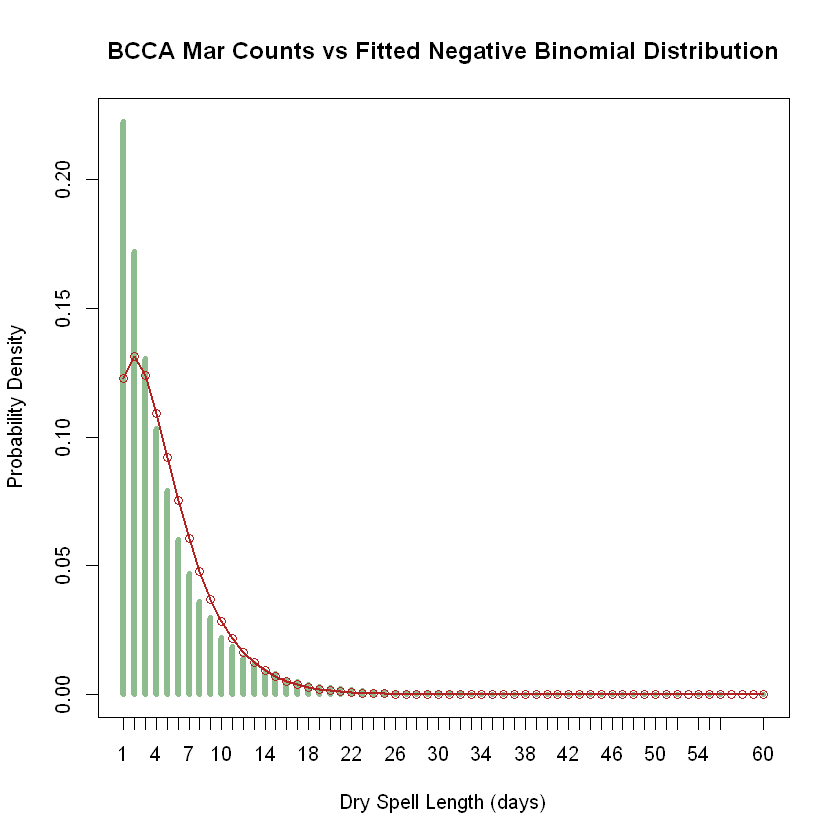

In [255]:
maxP <- max(dBCMar$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dMar_size, mu=BCfdNB_dMar_mu )
ttab <- table( dBCMar$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Mar Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

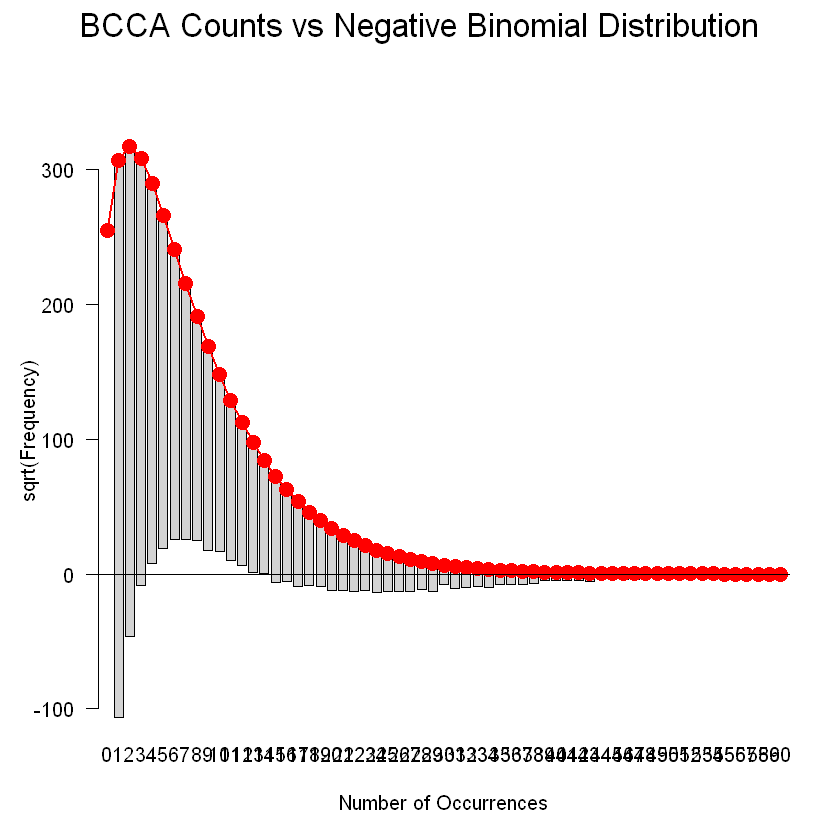

In [256]:
plot( BCgf_dMar, main="BCCA Counts vs Negative Binomial Distribution" )

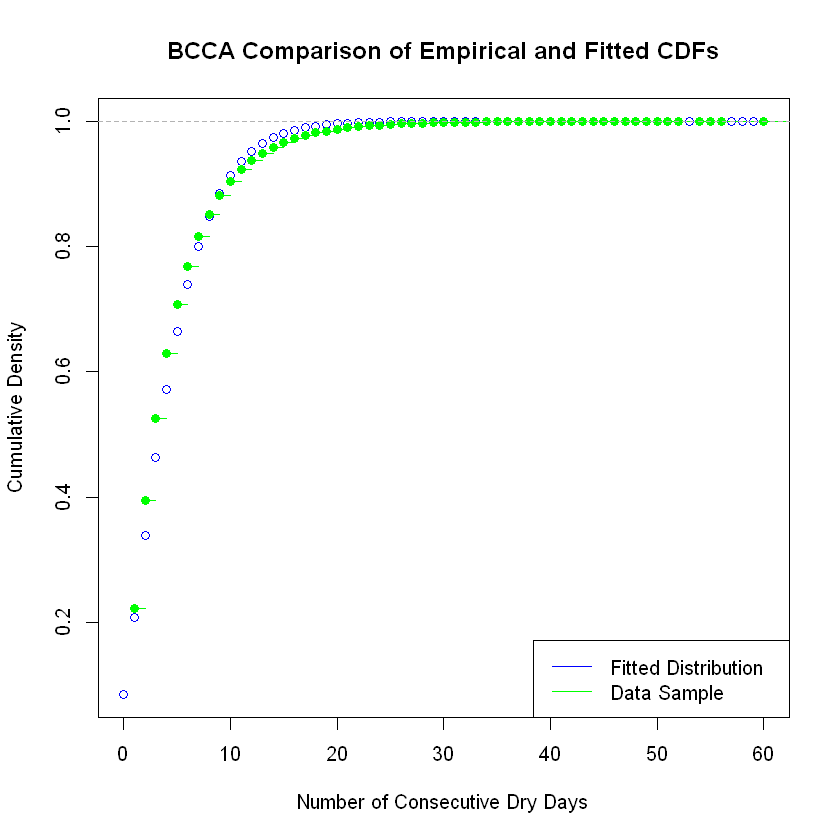

In [257]:
x <- seq(0,dBCMarMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dMar_mu, size=BCfdNB_dMar_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCMar$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

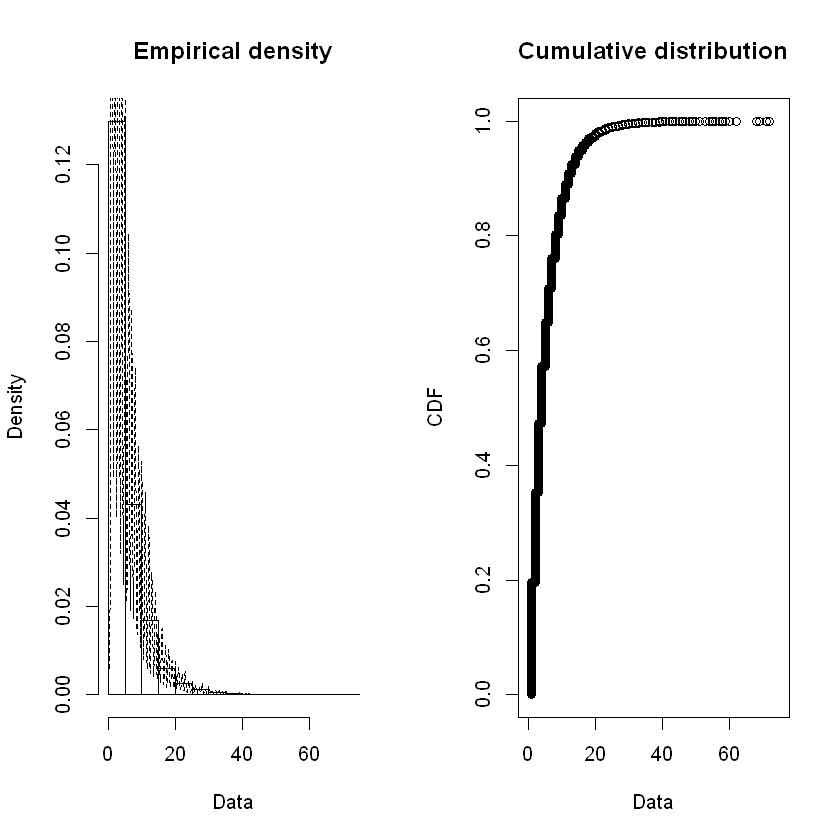

In [258]:
plotdist( dLOApr$Dry_Count, histo=TRUE, demp=TRUE )

In [259]:
LOfd_NB_dApr <- fitdist( dLOApr$Dry_Count, "nbinom" )
LOfd_GE_dApr <- fitdist( dLOApr$Dry_Count, "geom" )

In [260]:
LOfdNB_dApr_size <- LOfd_NB_dApr$estimate[["size"]]
LOfdNB_dApr_mu <- LOfd_NB_dApr$estimate[["mu"]]
cat("LOCA Apr size: ", LOfdNB_dApr_size, "\n", "LOCA Apr mu: ", LOfdNB_dApr_mu, "\n")

LOCA Apr size:  1.861152 
 LOCA Apr mu:  5.453202 


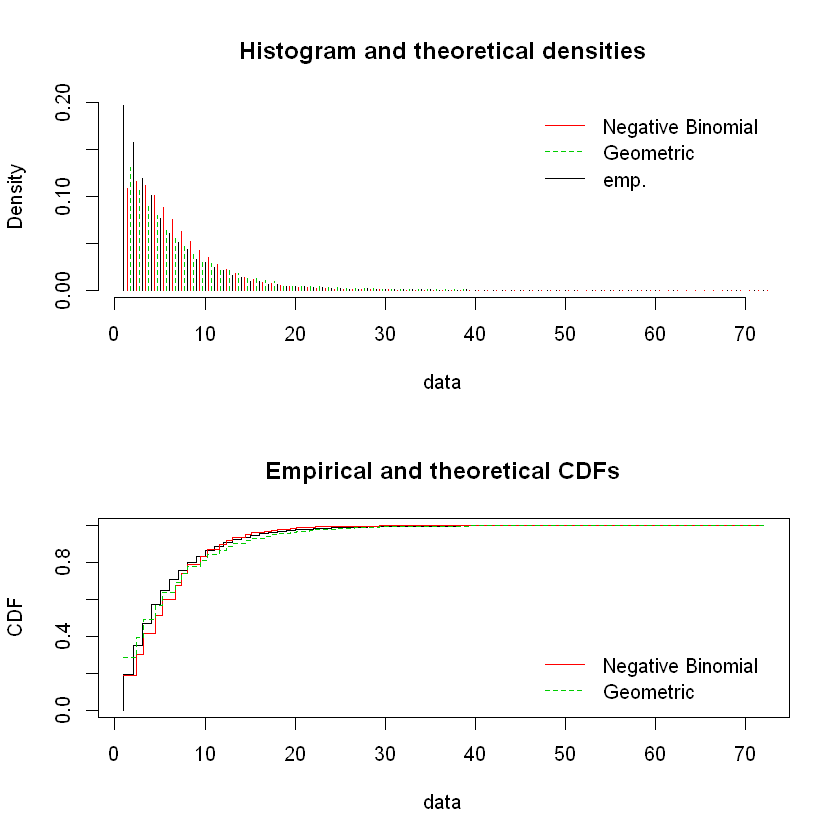

In [261]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dApr, LOfd_GE_dApr), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dApr, LOfd_GE_dApr), legendtext=plot.legend )

In [262]:
LOstatRes <- gofstat( list(LOfd_NB_dApr, LOfd_GE_dApr), fitnames=c("Negative Binomial", "Geometric") )

In [263]:
print( LOstatRes )

Chi-squared statistic:  62215.01 77075.29 
Degree of freedom of the Chi-squared distribution:  25 26 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     224079            213435.7962     326452.092
<= 2     179386            132298.1432     126345.574
<= 3     135734            126947.7576     106765.762
<= 4     114850            115021.7240      90220.238
<= 5      87027            100523.7021      76238.780
<= 6      68467             85701.7877      64424.033
<= 7      58055             71755.2442      54440.221
<= 8      49060             59255.6076      46003.603
<= 9      36893             48404.9979      38874.410
<= 10     33562             39195.9958      32850.031
<= 11     28104             31510.2241      27759.251
<= 12     23552             25178.2602      23457.392
<= 13     17411             20015.0782      19822.192
<= 14     15455             15840.0786      16750.341
<= 15     11040             12487.5258    

In [264]:
LOfdNB_dApr_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [265]:
LOfdNB_dApr_p = LOfdNB_dApr_size / (LOfdNB_dApr_size + LOfdNB_dApr_mu)
cat("LOCA prob: ", LOfdNB_dApr_p)

LOCA prob:  0.254452

In [266]:
# add to our tracking dataframe
LOMonDistDF[4, ] <- list( 4, dLOAprMean, dLOAprBNr, LOfdNB_dApr_p, LOfdNB_dApr_mu, LOfdNB_dApr_size,
                          LOfdNB_dApr_pvalue )

In [267]:
LOgf_dApr <- goodfit( dLOApr$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dApr_size, prob=LOfdNB_dApr_p) )

In [268]:
summary( LOgf_dApr )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          294178.9 72        0
Likelihood Ratio 293219.5 63        0


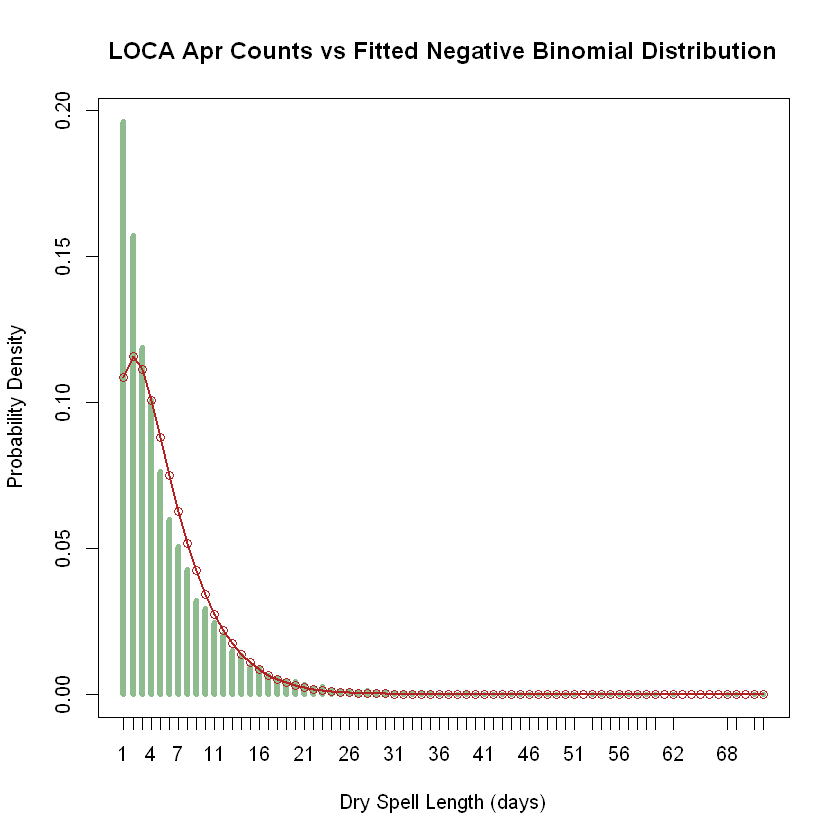

In [269]:
maxP <- max(dLOApr$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dApr_size, mu=LOfdNB_dApr_mu )
ttab <- table( dLOApr$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Apr Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

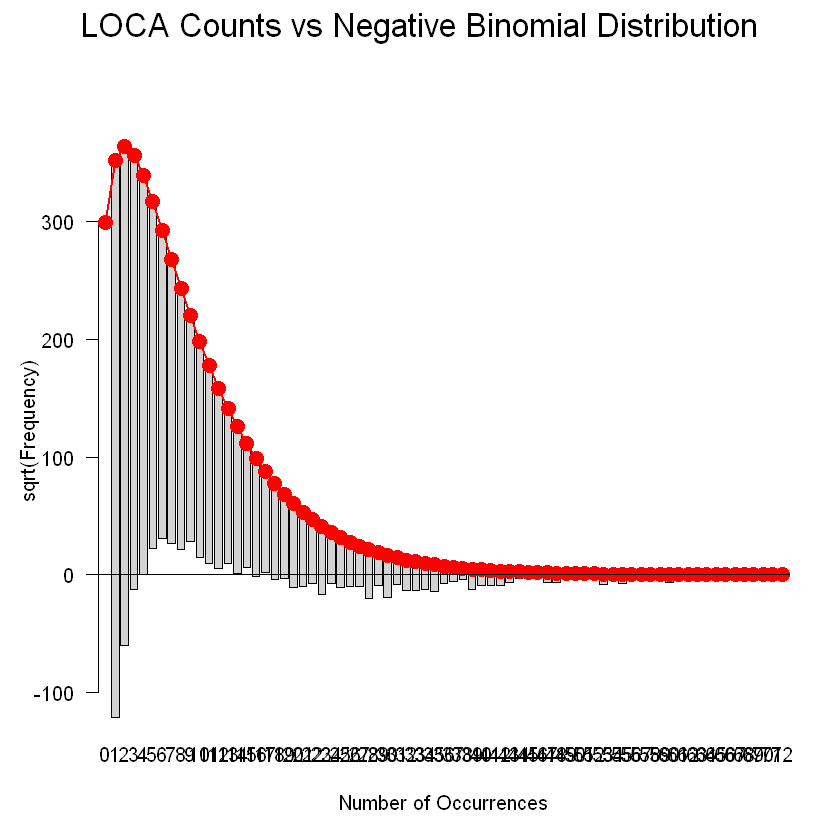

In [270]:
plot( LOgf_dApr, main="LOCA Counts vs Negative Binomial Distribution" )

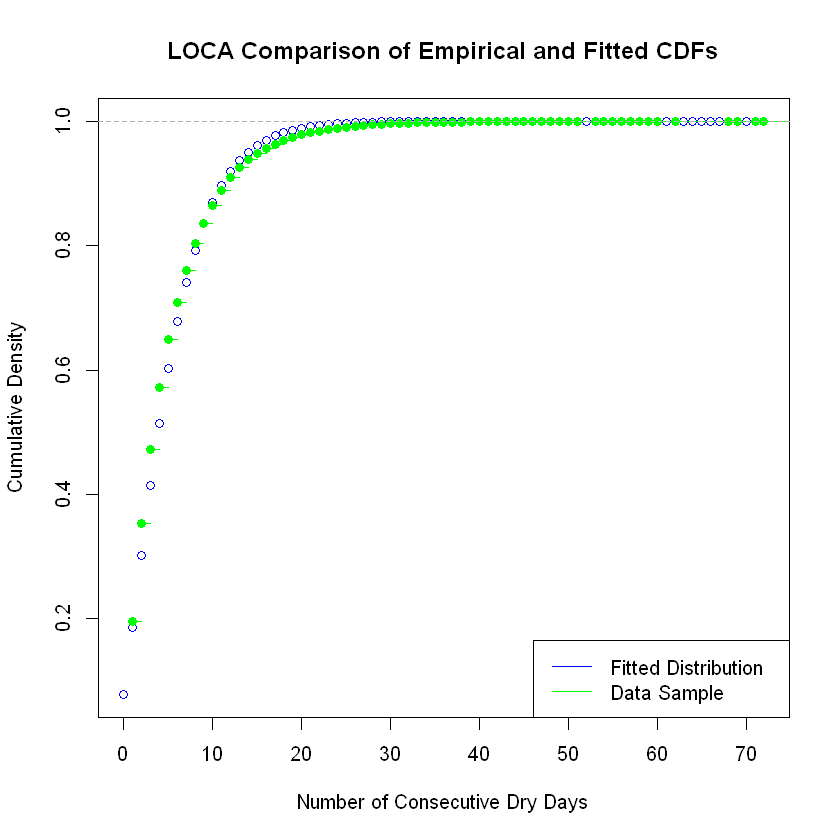

In [271]:
x <- seq(0,dLOAprMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dApr_mu, size=LOfdNB_dApr_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOApr$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

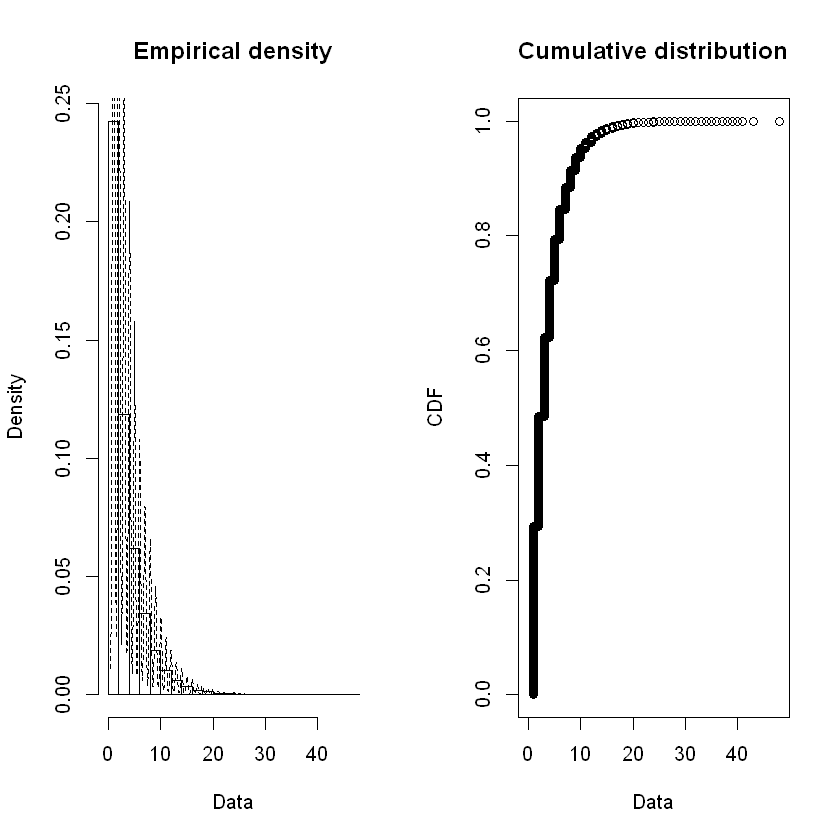

In [272]:
plotdist( dBCApr$Dry_Count, histo=TRUE, demp=TRUE )

In [273]:
BCfd_NB_dApr <- fitdist( dBCApr$Dry_Count, "nbinom" )
BCfd_GE_dApr <- fitdist( dBCApr$Dry_Count, "geom" )

In [274]:
summary( BCfd_NB_dApr )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.655375 0.006939135
mu   3.696109 0.003348123
Loglikelihood:  -1834390   AIC:  3668784   BIC:  3668807 
Correlation matrix:
             size           mu
size 1.000000e+00 7.908907e-05
mu   7.908907e-05 1.000000e+00


In [275]:
BCfdNB_dApr_size <- BCfd_NB_dApr$estimate[["size"]]
BCfdNB_dApr_mu <- BCfd_NB_dApr$estimate[["mu"]]
cat("BCCA Apr size: ", BCfdNB_dApr_size, "\n", "BCCA Apr mu: ", BCfdNB_dApr_mu, "\n")

BCCA Apr size:  2.655375 
 BCCA Apr mu:  3.696109 


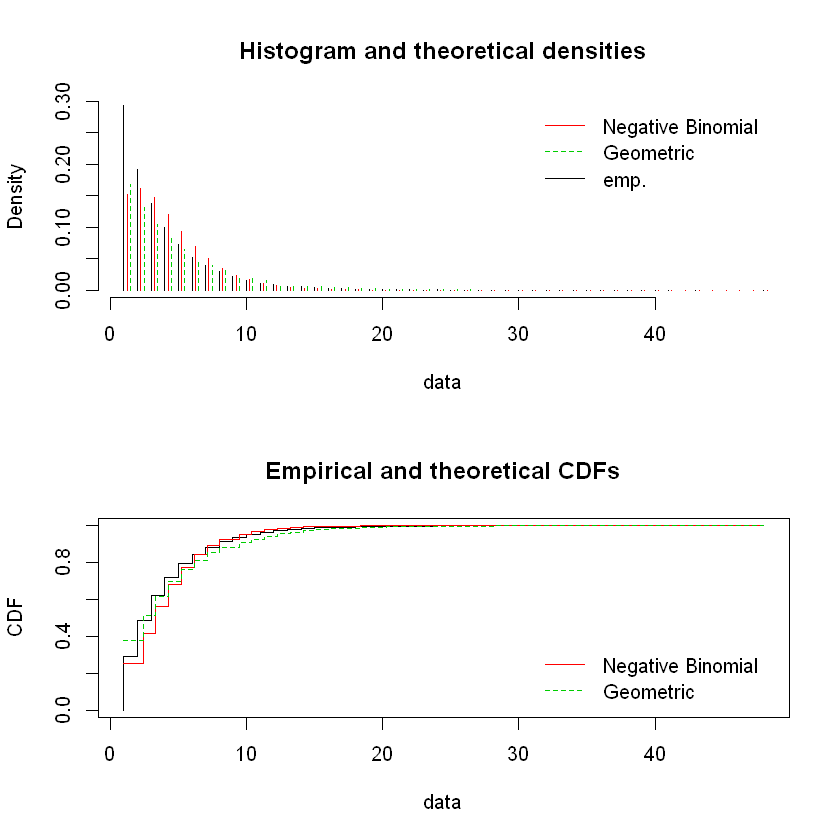

In [276]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dApr, BCfd_GE_dApr), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dApr, BCfd_GE_dApr), legendtext=plot.legend )

In [277]:
BCstatRes <- gofstat( list(BCfd_NB_dApr, BCfd_GE_dApr), fitnames=c("Negative Binomial", "Geometric") )

In [278]:
print(BCstatRes)

Chi-squared statistic:  50748.24 58003.39 
Degree of freedom of the Chi-squared distribution:  16 17 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     230894            198091.4738     300085.619
<= 2     151673            127909.9466     104022.337
<= 3     108250            115506.7378      81872.410
<= 4      78538             95033.8492      64438.963
<= 5      56986             73612.3076      50717.695
<= 6      40814             54655.6718      39918.156
<= 7      30448             39327.1678      31418.210
<= 8      23797             27621.1283      24728.194
<= 9      17340             19029.9317      19462.713
<= 10     12421             12907.2305      15318.433
<= 11      8811              8641.4175      12056.613
<= 12      7167              5722.3835       9489.346
<= 13      5137              3754.0506       7468.738
<= 14      4046              2442.8970       5878.387
<= 15      2907              1578.4757    

In [279]:
BCfdNB_dApr_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [280]:
BCfdNB_dApr_p = BCfdNB_dApr_size / (BCfdNB_dApr_size + BCfdNB_dApr_mu)
cat("BCCA prob: ", BCfdNB_dApr_p)

BCCA prob:  0.4180716

In [281]:
# add to our tracking dataframe
BCMonDistDF[4, ] <- list( 4, dBCAprMean, dBCAprBNr, BCfdNB_dApr_p, BCfdNB_dApr_mu, BCfdNB_dApr_size,
                          BCfdNB_dApr_pvalue )

In [282]:
BCgf_dApr <- goodfit( dBCApr$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dApr_size, prob=BCfdNB_dApr_p) )

In [283]:
summary( BCgf_dApr )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          278928.4 48        0
Likelihood Ratio 269062.7 42        0


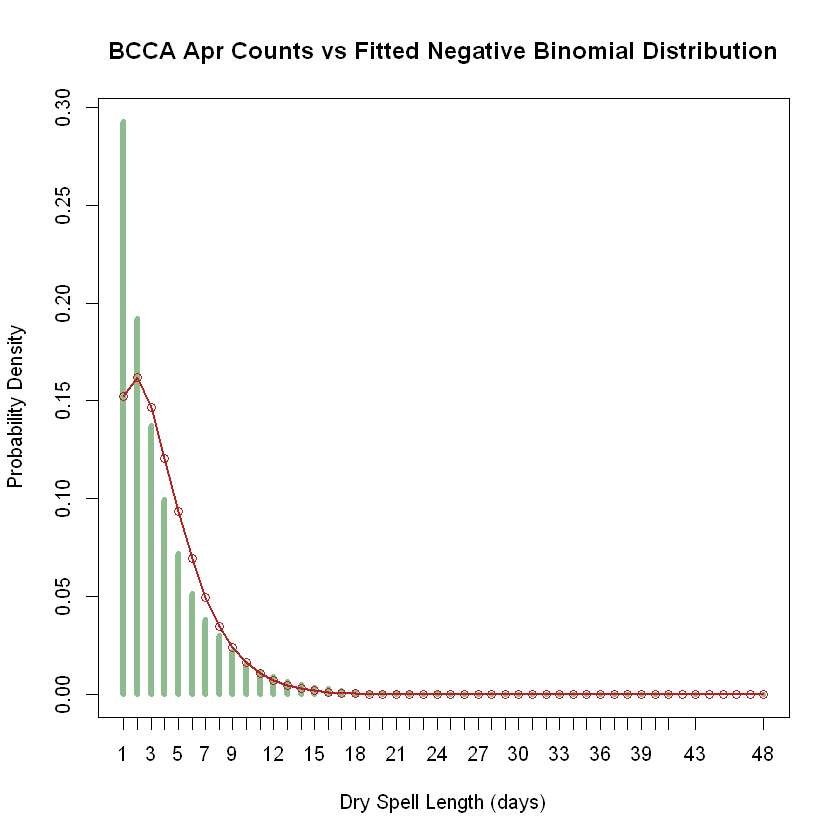

In [284]:
maxP <- max(dBCApr$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dApr_size, mu=BCfdNB_dApr_mu )
ttab <- table( dBCApr$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Apr Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

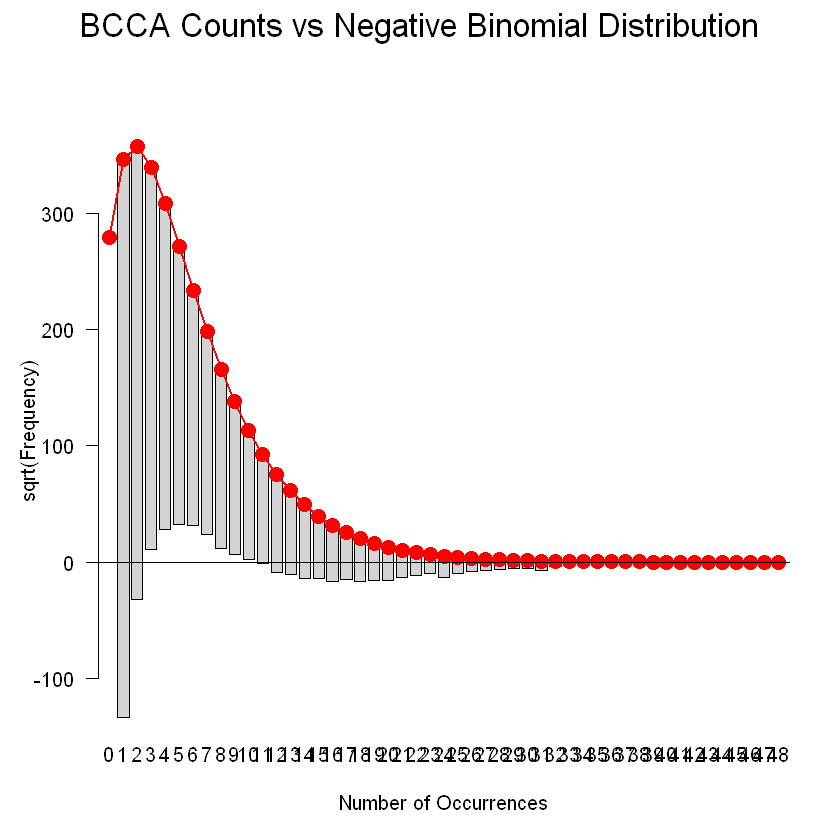

In [285]:
plot( BCgf_dApr, main="BCCA Counts vs Negative Binomial Distribution" )

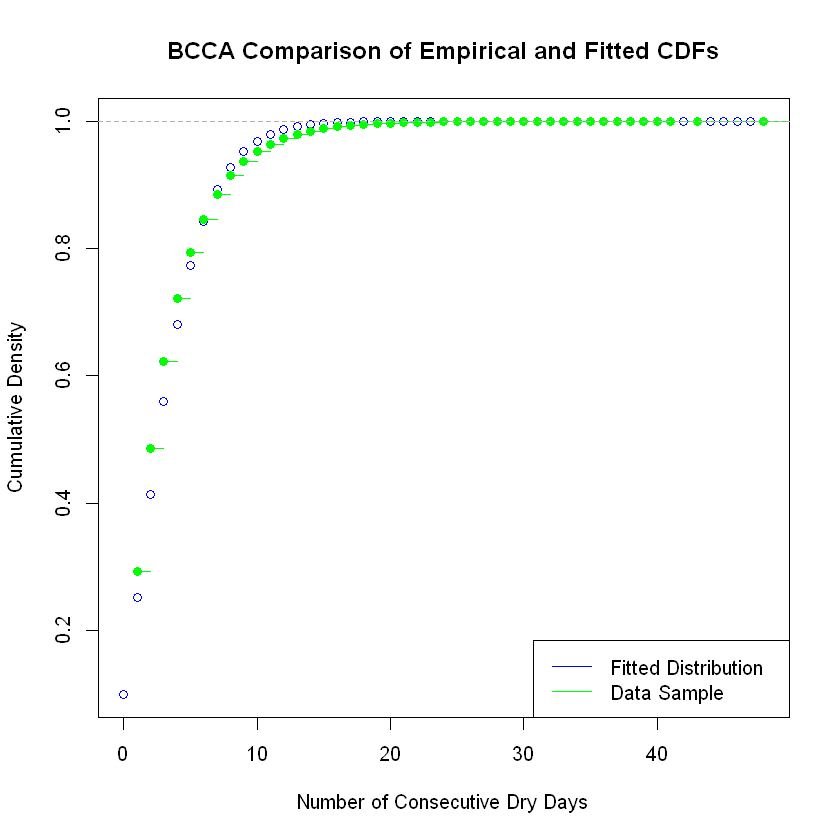

In [286]:
x <- seq(0,dBCAprMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dApr_mu, size=BCfdNB_dApr_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCApr$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

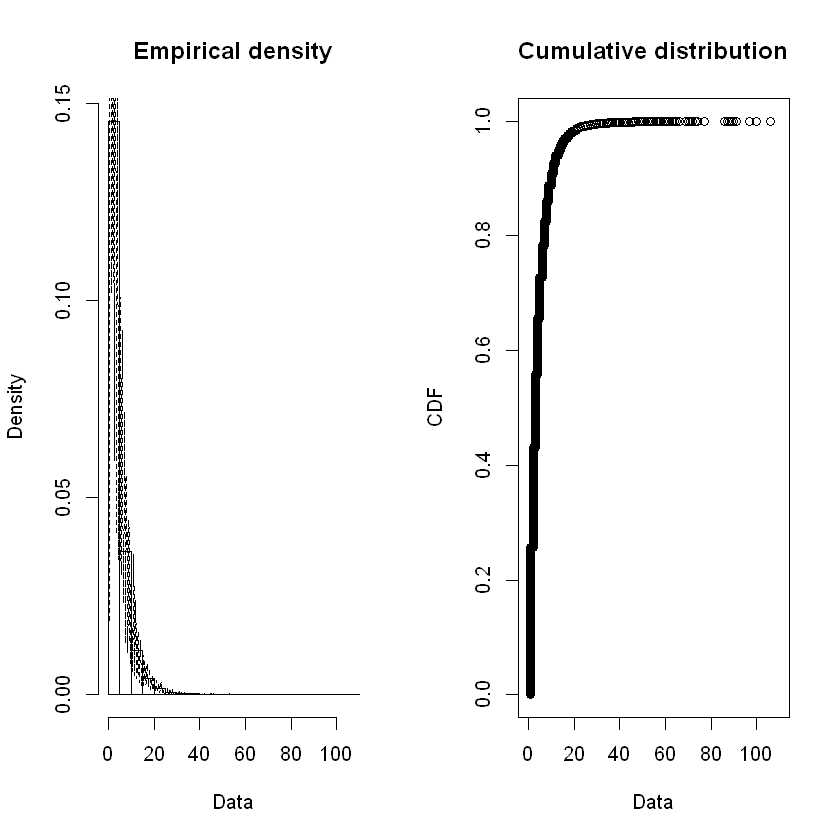

In [287]:
plotdist( dLOMay$Dry_Count, histo=TRUE, demp=TRUE )

In [288]:
LOfd_NB_dMay <- fitdist( dLOMay$Dry_Count, "nbinom" )
LOfd_GE_dMay <- fitdist( dLOMay$Dry_Count, "geom" )

In [289]:
LOfdNB_dMay_size <- LOfd_NB_dMay$estimate[["size"]]
LOfdNB_dMay_mu <- LOfd_NB_dMay$estimate[["mu"]]
cat("LOCA May size: ", LOfdNB_dMay_size, "\n", "LOCA May mu: ", LOfdNB_dMay_mu, "\n")

LOCA May size:  1.817412 
 LOCA May mu:  4.59641 


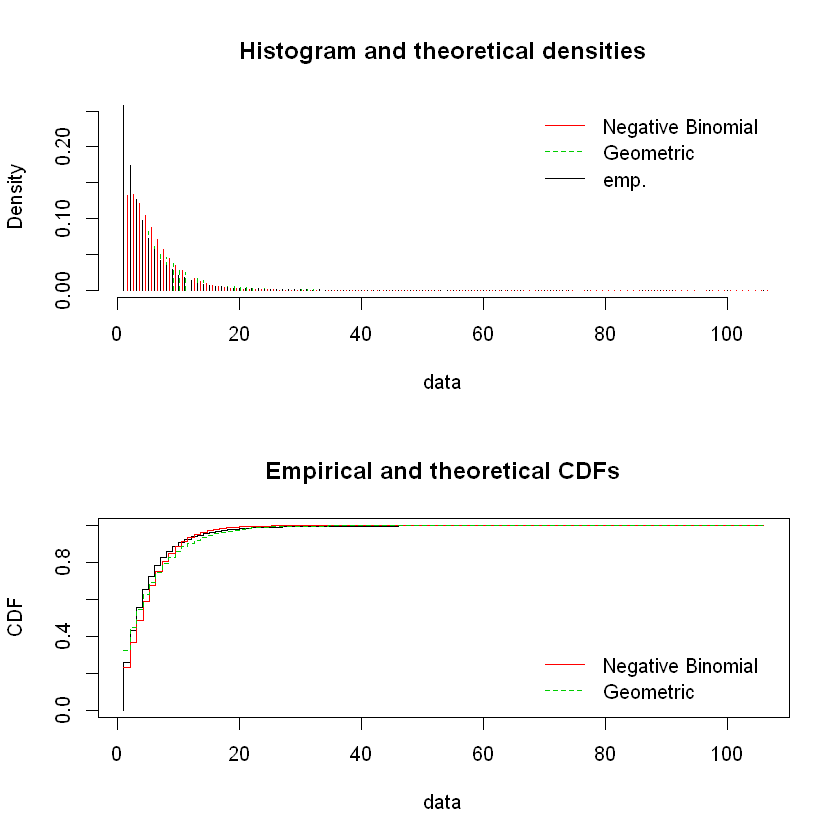

In [290]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dMay, LOfd_GE_dMay), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dMay, LOfd_GE_dMay), legendtext=plot.legend )

In [291]:
LOstatRes <- gofstat( list(LOfd_NB_dMay, LOfd_GE_dMay), fitnames=c("Negative Binomial", "Geometric") )

In [292]:
print( LOstatRes )

Chi-squared statistic:  318871.3 85453.72 
Degree of freedom of the Chi-squared distribution:  23 24 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     354365           320437.03643    448061.3852
<= 2     240120           182992.47102    165951.0668
<= 3     174892           166871.76136    136299.7388
<= 4     133254           144025.20536    111946.3656
<= 5      98628           120088.15687     91944.3344
<= 6      78528            97784.56997     75516.1688
<= 7      57002            78259.51531     62023.3077
<= 8      47314            61814.47212     50941.2853
<= 9      38916            48322.18211     41839.3446
<= 10     27975            37460.34517     34363.6944
<= 11     24557            28840.53640     28223.7569
<= 12     18538            22076.19897     23180.8736
<= 13     13737            16815.48984     19039.0280
<= 14     11556            12754.27312     15637.2273
<= 15      8837             9638.32907    

In [293]:
LOfdNB_dMay_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [294]:
LOfdNB_dMay_p = LOfdNB_dMay_size / (LOfdNB_dMay_size + LOfdNB_dMay_mu)
cat("LOCA prob: ", LOfdNB_dMay_p)

LOCA prob:  0.2833586

In [295]:
# add to our tracking dataframe
LOMonDistDF[5, ] <- list( 5, dLOMayMean, dLOMayBNr, LOfdNB_dMay_p, LOfdNB_dMay_mu, LOfdNB_dMay_size,
                          LOfdNB_dMay_pvalue )

In [296]:
LOgf_dMay <- goodfit( dLOMay$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dMay_size, prob=LOfdNB_dMay_p) )

In [297]:
summary( LOgf_dMay )


	 Goodness-of-fit test for nbinomial distribution

                          X^2  df P(> X^2)
Pearson          1494216233.0 106        0
Likelihood Ratio     504021.5  81        0


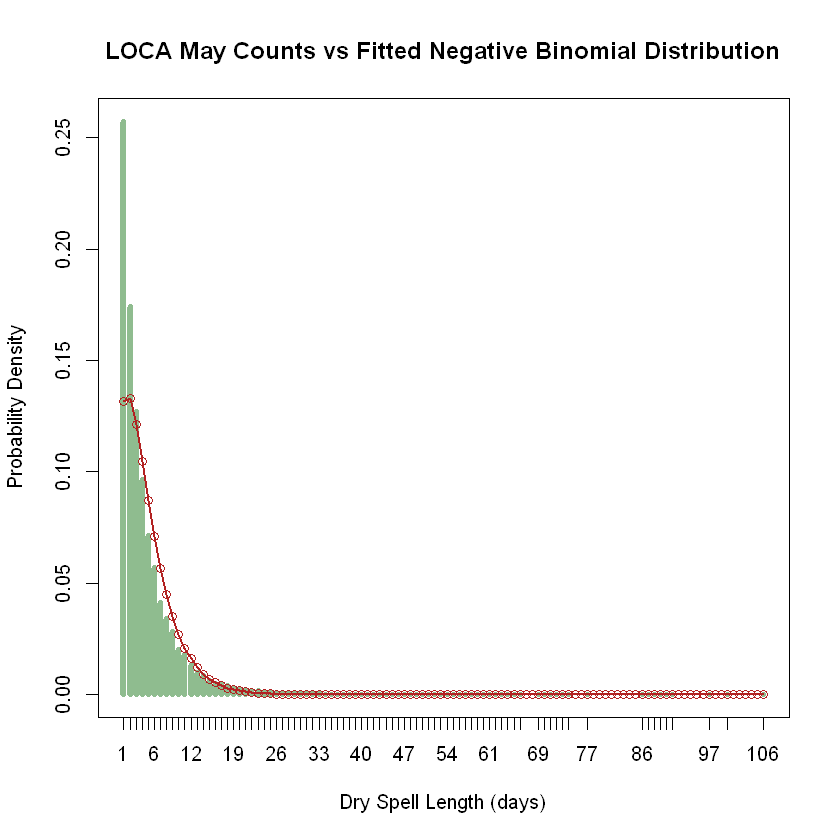

In [298]:
maxP <- max(dLOMay$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dMay_size, mu=LOfdNB_dMay_mu )
ttab <- table( dLOMay$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA May Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

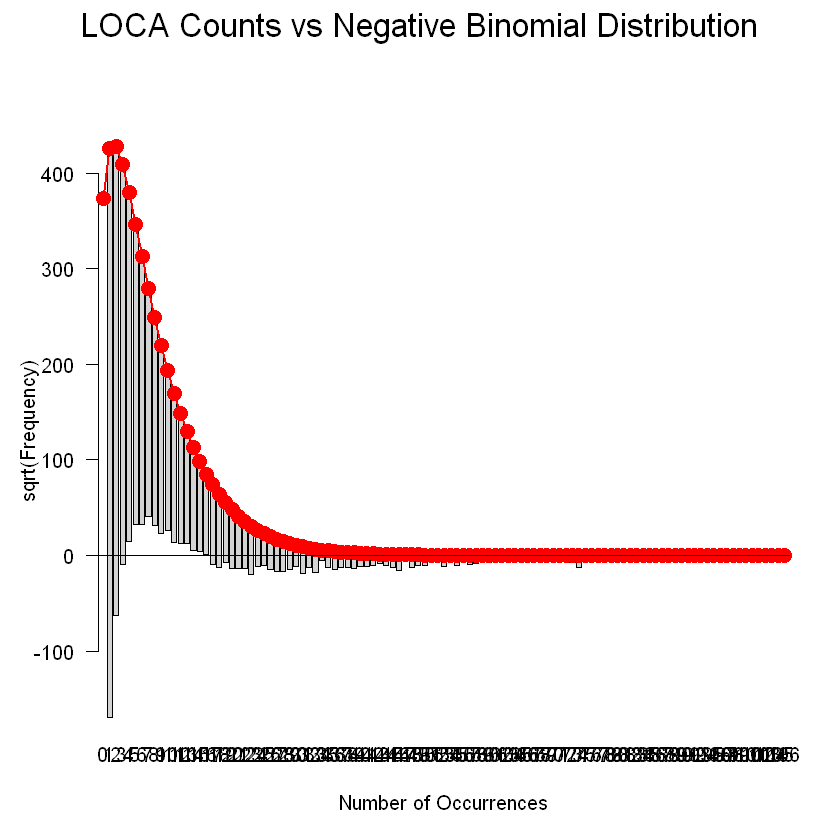

In [299]:
plot( LOgf_dMay, main="LOCA Counts vs Negative Binomial Distribution" )

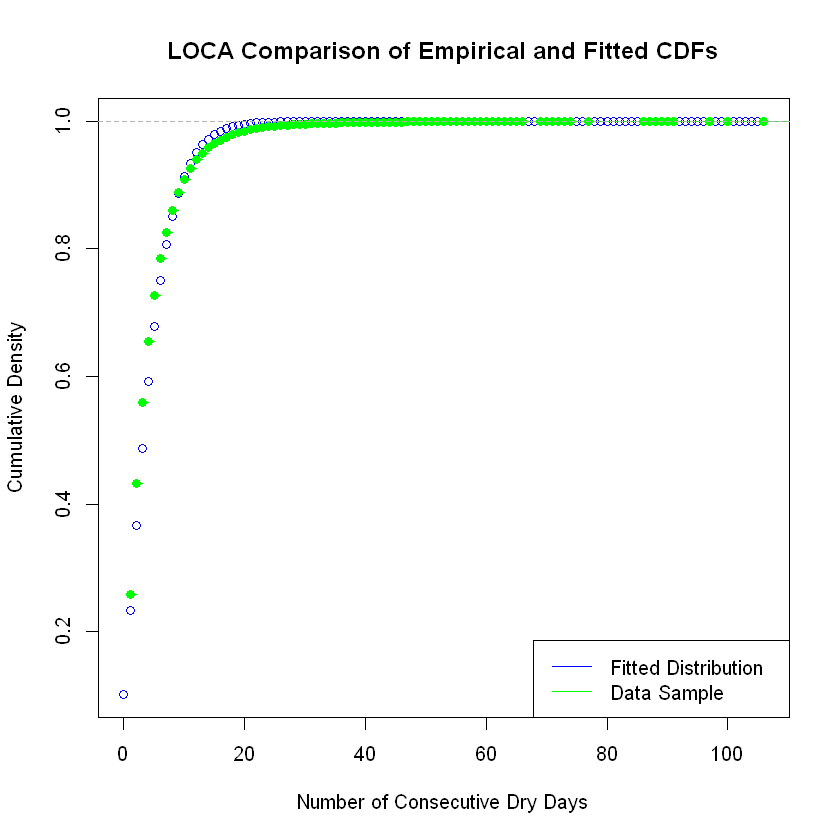

In [300]:
x <- seq(0,dLOMayMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dMay_mu, size=LOfdNB_dMay_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOMay$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

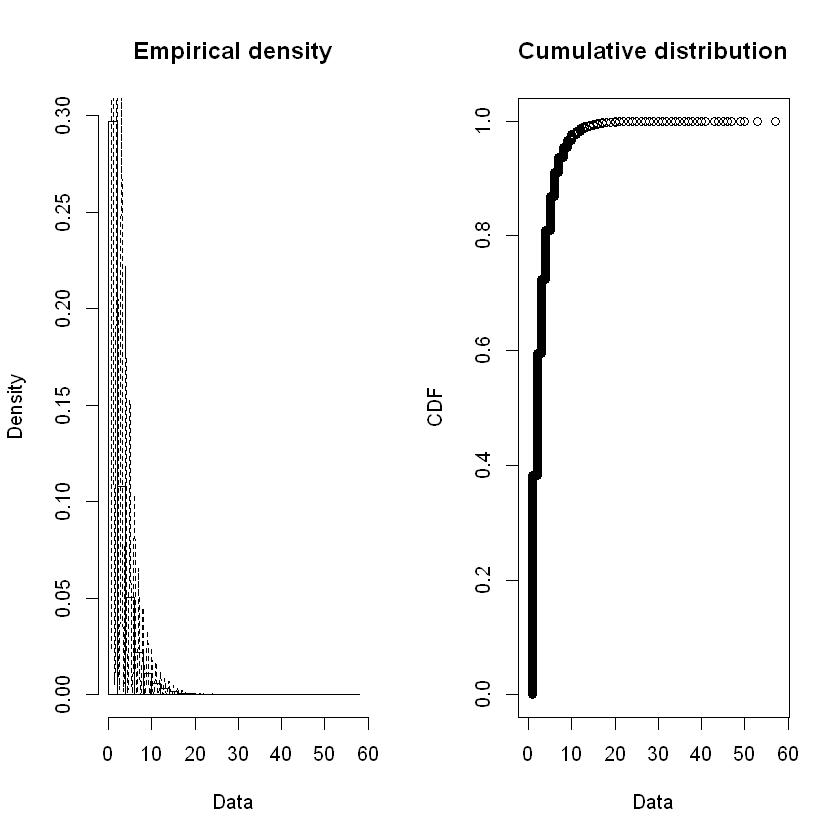

In [301]:
plotdist( dBCMay$Dry_Count, histo=TRUE, demp=TRUE )

In [302]:
BCfd_NB_dMay <- fitdist( dBCMay$Dry_Count, "nbinom" )
BCfd_GE_dMay <- fitdist( dBCMay$Dry_Count, "geom" )

In [303]:
summary( BCfd_NB_dMay )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 3.289633 0.009801848
mu   2.939830 0.002538131
Loglikelihood:  -1819109   AIC:  3638221   BIC:  3638245 
Correlation matrix:
              size            mu
size  1.0000000000 -0.0001624622
mu   -0.0001624622  1.0000000000


In [304]:
BCfdNB_dMay_size <- BCfd_NB_dMay$estimate[["size"]]
BCfdNB_dMay_mu <- BCfd_NB_dMay$estimate[["mu"]]
cat("BCCA May size: ", BCfdNB_dMay_size, "\n", "BCCA May mu: ", BCfdNB_dMay_mu, "\n")

BCCA May size:  3.289633 
 BCCA May mu:  2.93983 


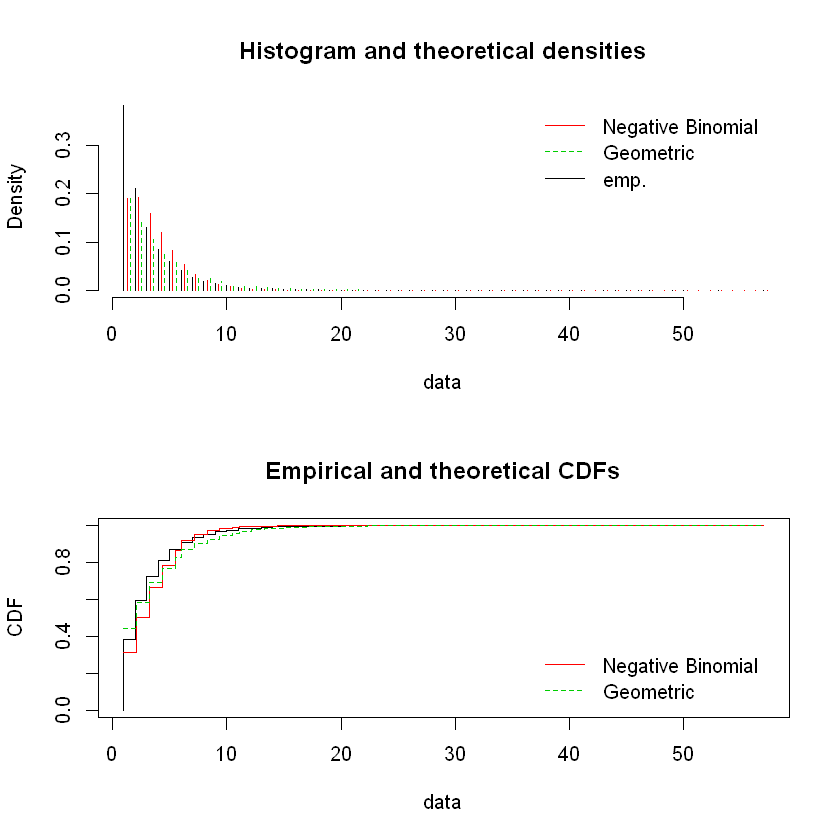

In [305]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dMay, BCfd_GE_dMay), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dMay, BCfd_GE_dMay), legendtext=plot.legend )

In [306]:
BCstatRes <- gofstat( list(BCfd_NB_dMay, BCfd_GE_dMay), fitnames=c("Negative Binomial", "Geometric") )

In [307]:
print(BCstatRes)

Chi-squared statistic:  97807.07 54159.24 
Degree of freedom of the Chi-squared distribution:  13 14 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     330724            270018.4869     383089.859
<= 2     182858            166232.5896     122147.146
<= 3     112411            138322.2539      91141.685
<= 4      73799            102642.9141      68006.556
<= 5      51832             70621.3862      50743.978
<= 6      35480             46045.9988      37863.281
<= 7      22335             28837.9259      28252.180
<= 8      15084             17504.3315      21080.733
<= 9      11226             10362.2592      15729.663
<= 10      8085              6009.8686      11736.893
<= 11      5713              3426.5486       8757.636
<= 12      3902              1925.6100       6534.624
<= 13      2872              1068.7931       4875.895
<= 14      2360               586.8789       3638.213
<= 16      2703               491.4532    

In [308]:
BCfdNB_dMay_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [309]:
BCfdNB_dMay_p = BCfdNB_dMay_size / (BCfdNB_dMay_size + BCfdNB_dMay_mu)
cat("BCCA prob: ", BCfdNB_dMay_p)

BCCA prob:  0.5280765

In [310]:
# add to our tracking dataframe
BCMonDistDF[5, ] <- list( 5, dBCMayMean, dBCMayBNr, BCfdNB_dMay_p, BCfdNB_dMay_mu, BCfdNB_dMay_size,
                          BCfdNB_dMay_pvalue )

In [311]:
BCgf_dMay <- goodfit( dBCMay$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dMay_size, prob=BCfdNB_dMay_p) )

In [312]:
summary( BCgf_dMay )


	 Goodness-of-fit test for nbinomial distribution

                          X^2 df P(> X^2)
Pearson          2.162353e+10 57        0
Likelihood Ratio 3.947063e+05 49        0


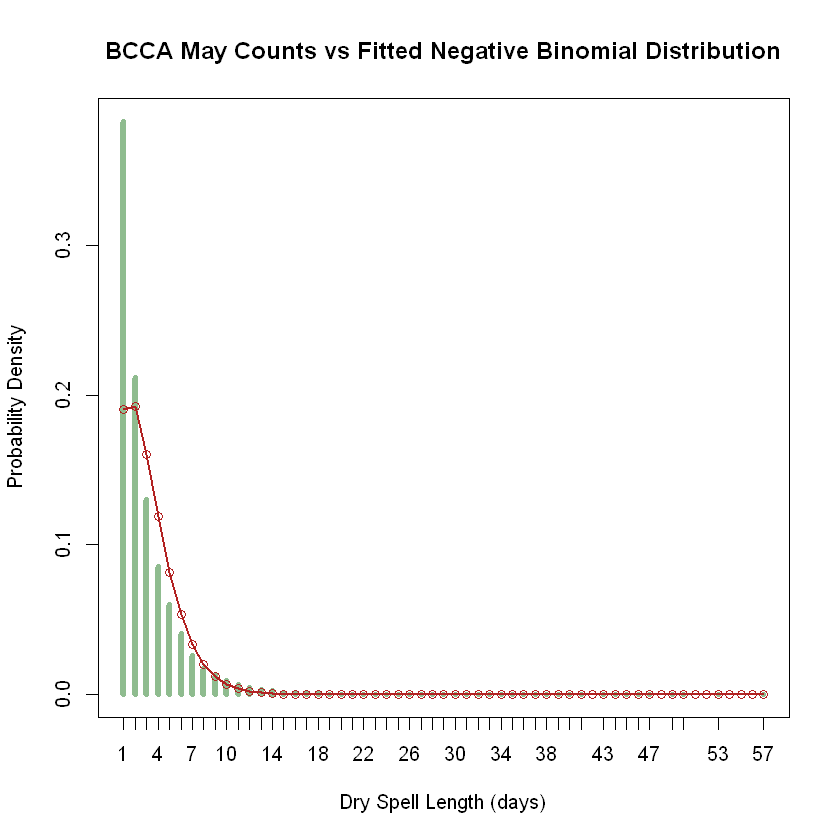

In [313]:
maxP <- max(dBCMay$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dMay_size, mu=BCfdNB_dMay_mu )
ttab <- table( dBCMay$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA May Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

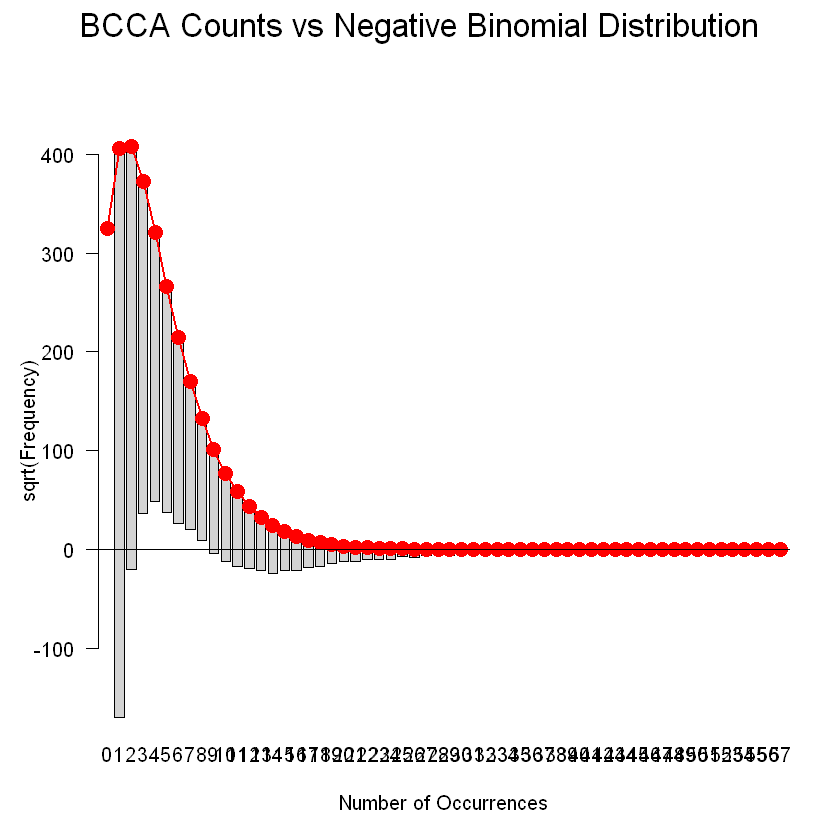

In [314]:
plot( BCgf_dMay, main="BCCA Counts vs Negative Binomial Distribution" )

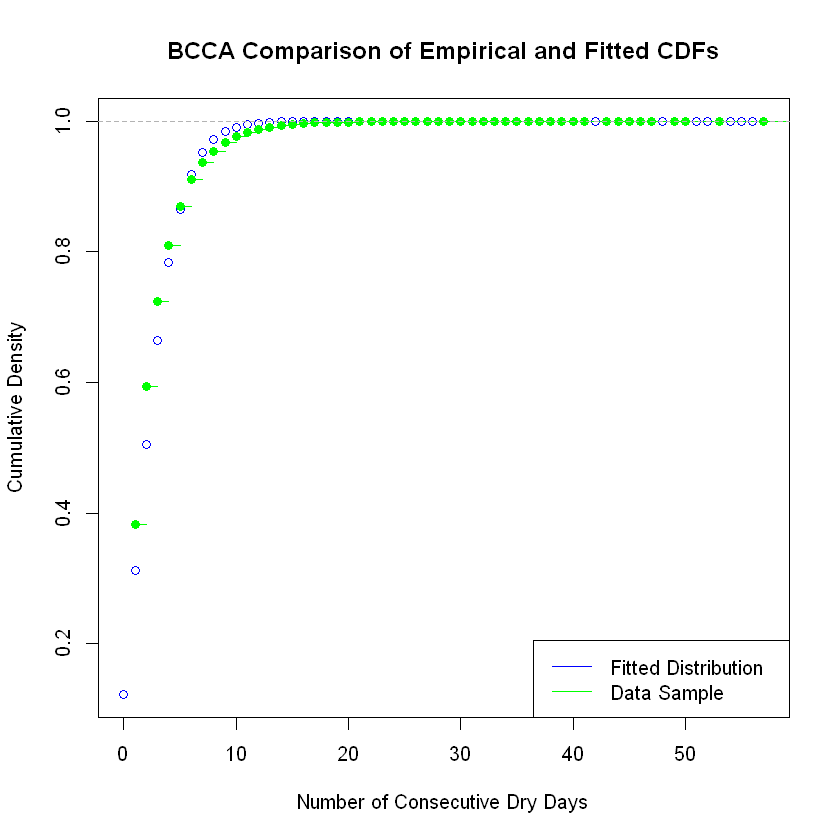

In [315]:
x <- seq(0,dBCMayMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dMay_mu, size=BCfdNB_dMay_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCMay$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

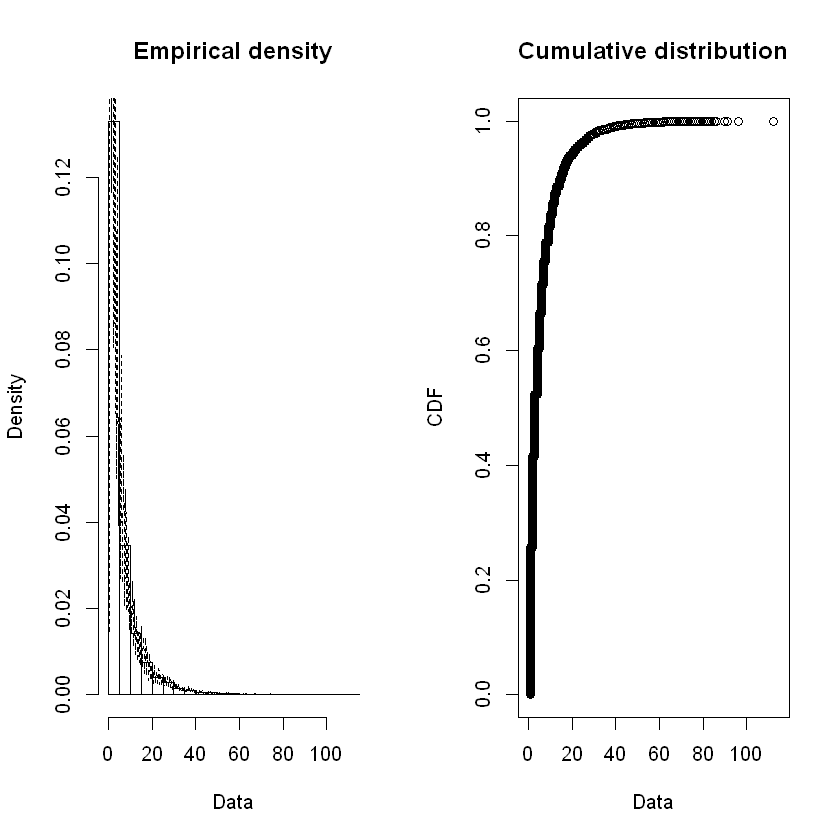

In [316]:
plotdist( dLOJun$Dry_Count, histo=TRUE, demp=TRUE )

In [317]:
LOfd_NB_dJun <- fitdist( dLOJun$Dry_Count, "nbinom" )
LOfd_GE_dJun <- fitdist( dLOJun$Dry_Count, "geom" )

In [318]:
LOfdNB_dJun_size <- LOfd_NB_dJun$estimate[["size"]]
LOfdNB_dJun_mu <- LOfd_NB_dJun$estimate[["mu"]]
cat("LOCA Jun size: ", LOfdNB_dJun_size, "\n", "LOCA Jun mu: ", LOfdNB_dJun_mu, "\n")

LOCA Jun size:  1.187755 
 LOCA Jun mu:  6.088741 


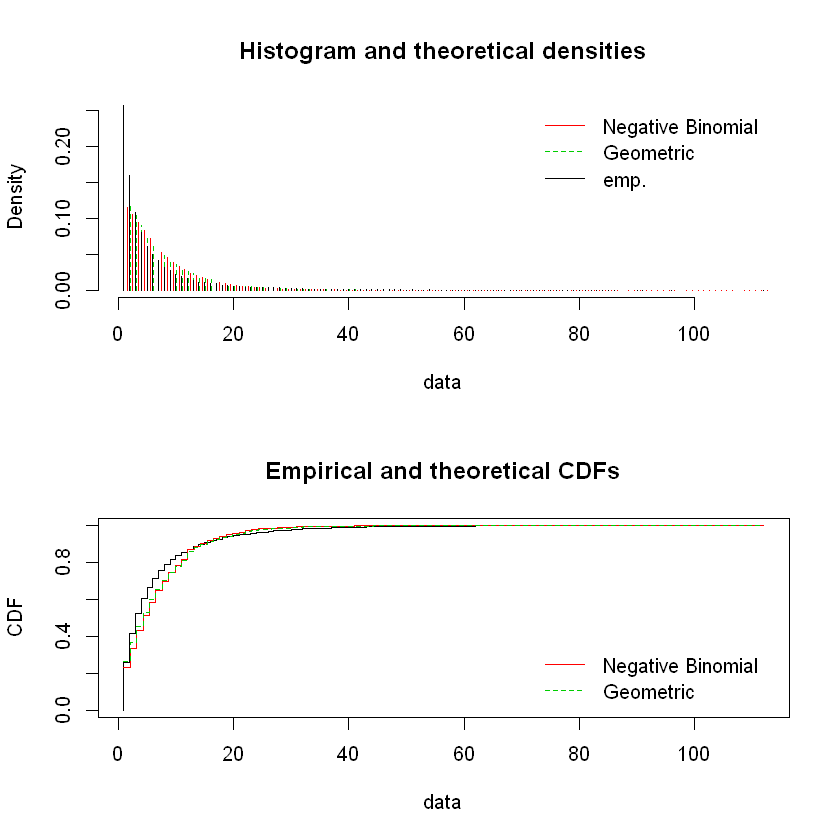

In [319]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dJun, LOfd_GE_dJun), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dJun, LOfd_GE_dJun), legendtext=plot.legend )

In [320]:
LOstatRes <- gofstat( list(LOfd_NB_dJun, LOfd_GE_dJun), fitnames=c("Negative Binomial", "Geometric") )

In [321]:
print( LOstatRes )

Chi-squared statistic:  206907 111638.2 
Degree of freedom of the Chi-squared distribution:  35 36 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     306112           276878.05392    313506.1230
<= 2     190064           126327.11106    124425.3314
<= 3     129509           112322.17146    106874.2935
<= 4      96541            98399.29694     91798.9486
<= 5      73090            85429.26490     78850.0835
<= 6      59121            73721.42868     67727.7438
<= 7      49895            63342.35094     58174.2856
<= 8      38159            54246.81396     49968.4076
<= 9      32769            46338.96570     42920.0244
<= 10     26519            39502.99552     36865.8635
<= 11     23318            33619.05417     31665.6831
<= 12     19472            28571.50769     27199.0235
<= 13     15701            24253.02268     23362.4165
<= 14     13191            20566.32588     20066.9890
<= 15     13218            17424.65674     1

In [322]:
LOfdNB_dJun_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [323]:
LOfdNB_dJun_p = LOfdNB_dJun_size / (LOfdNB_dJun_size + LOfdNB_dJun_mu)
cat("LOCA prob: ", LOfdNB_dJun_p)

LOCA prob:  0.1632318

In [324]:
# add to our tracking dataframe
LOMonDistDF[6, ] <- list( 6, dLOJunMean, dLOJunBNr, LOfdNB_dJun_p, LOfdNB_dJun_mu, LOfdNB_dJun_size,
                          LOfdNB_dJun_pvalue )

In [325]:
LOgf_dJun <- goodfit( dLOJun$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dJun_size, prob=LOfdNB_dJun_p) )

In [326]:
summary( LOgf_dJun )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          869189.2 112        0
Likelihood Ratio 545695.1  89        0


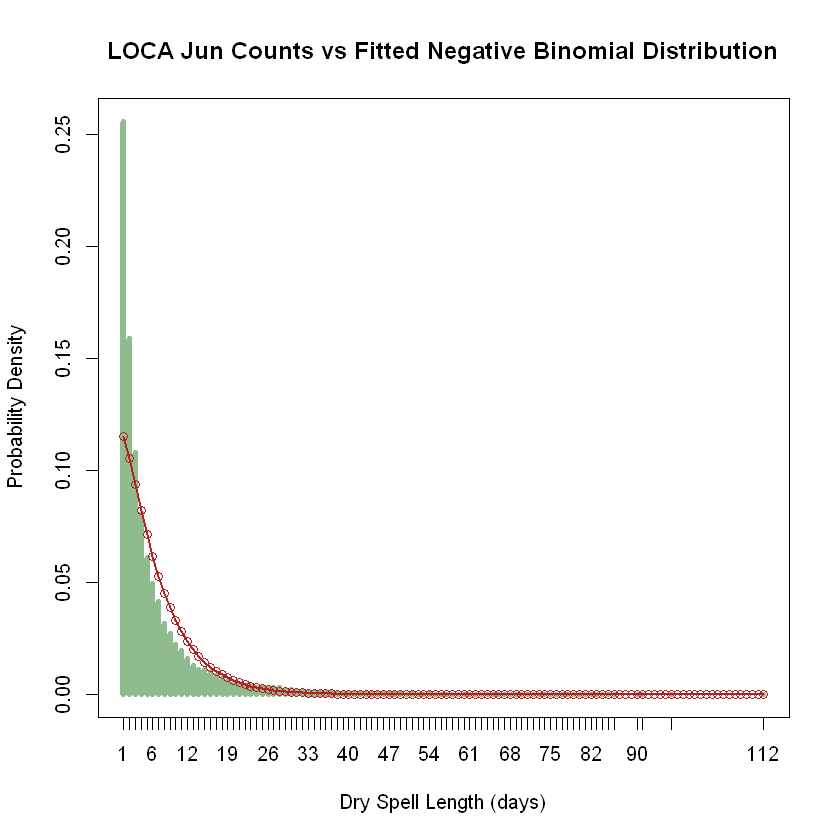

In [327]:
maxP <- max(dLOJun$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dJun_size, mu=LOfdNB_dJun_mu )
ttab <- table( dLOJun$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Jun Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

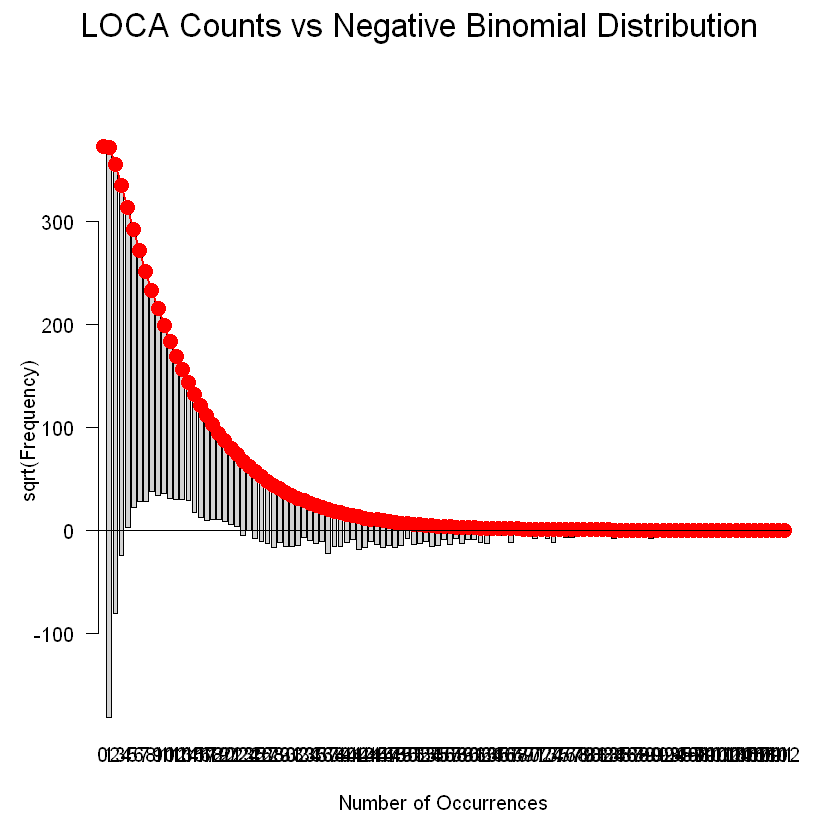

In [328]:
plot( LOgf_dJun, main="LOCA Counts vs Negative Binomial Distribution" )

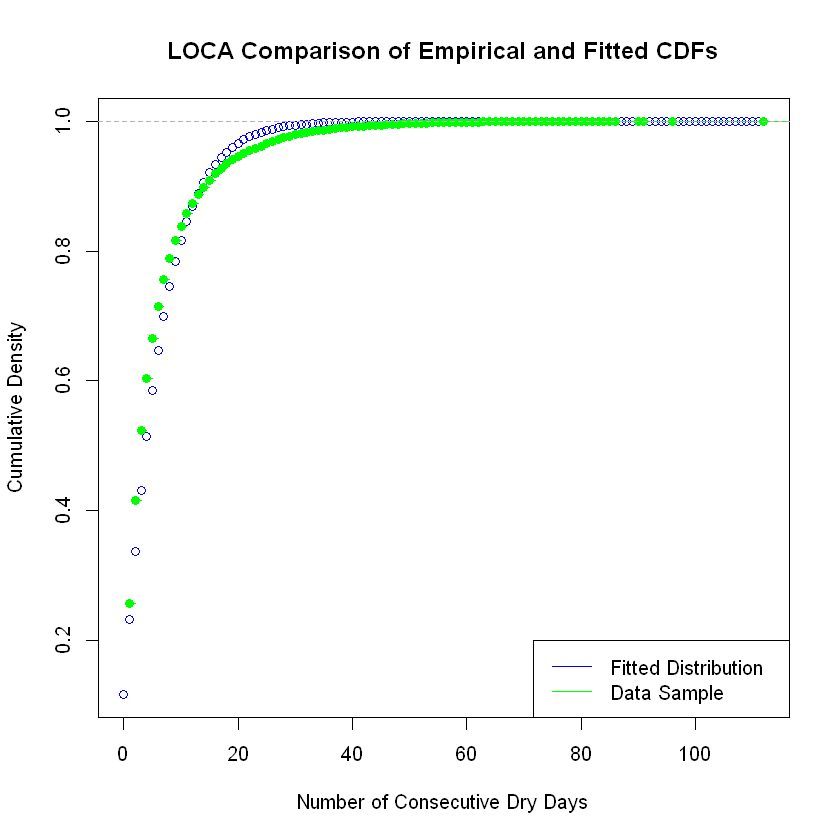

In [329]:
x <- seq(0,dLOJunMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dJun_mu, size=LOfdNB_dJun_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOJun$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

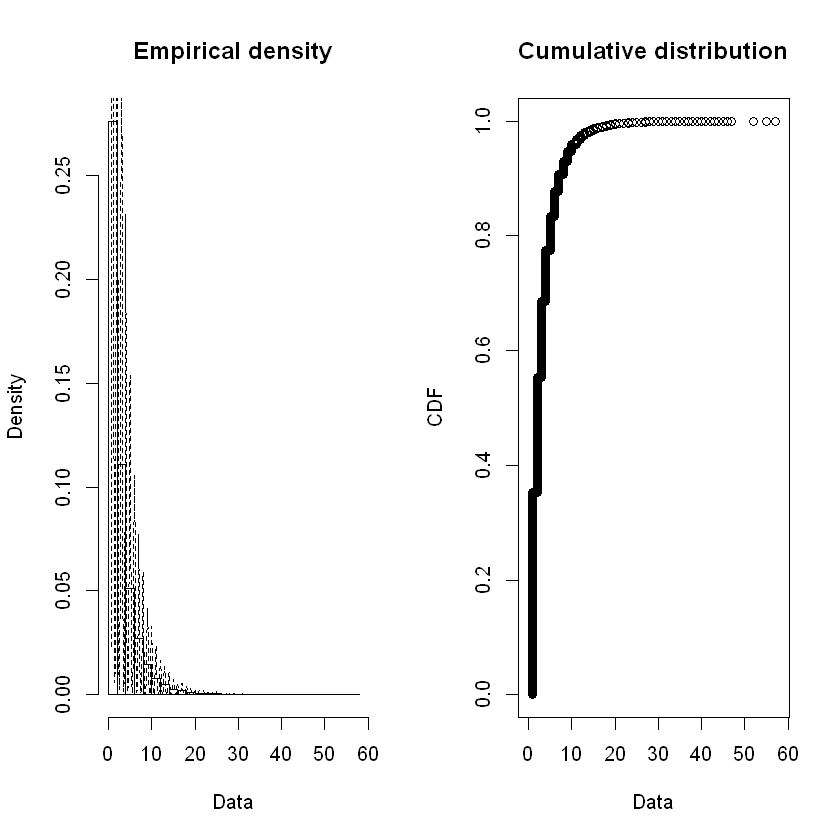

In [330]:
plotdist( dBCJun$Dry_Count, histo=TRUE, demp=TRUE )

In [331]:
BCfd_NB_dJun <- fitdist( dBCJun$Dry_Count, "nbinom" )
BCfd_GE_dJun <- fitdist( dBCJun$Dry_Count, "geom" )

In [332]:
summary( BCfd_NB_dJun )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.444138 0.006166895
mu   3.341012 0.003107196
Loglikelihood:  -1845299   AIC:  3690602   BIC:  3690625 
Correlation matrix:
             size           mu
size 1.000000e+00 9.778367e-06
mu   9.778367e-06 1.000000e+00


In [333]:
BCfdNB_dJun_size <- BCfd_NB_dJun$estimate[["size"]]
BCfdNB_dJun_mu <- BCfd_NB_dJun$estimate[["mu"]]
cat("BCCA Jun size: ", BCfdNB_dJun_size, "\n", "BCCA Jun mu: ", BCfdNB_dJun_mu, "\n")

BCCA Jun size:  2.444138 
 BCCA Jun mu:  3.341012 


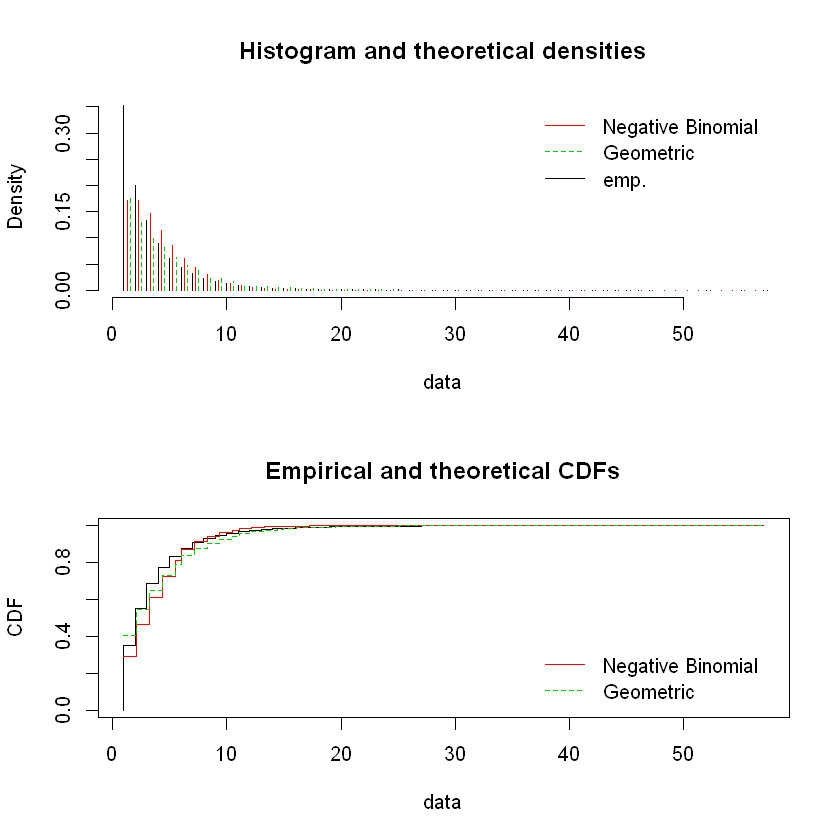

In [334]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dJun, BCfd_GE_dJun), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dJun, BCfd_GE_dJun), legendtext=plot.legend )

In [335]:
BCstatRes <- gofstat( list(BCfd_NB_dJun, BCfd_GE_dJun), fitnames=c("Negative Binomial", "Geometric") )

In [336]:
print(BCstatRes)

Chi-squared statistic:  151862.4 45490.74 
Degree of freedom of the Chi-squared distribution:  16 17 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     288551           240462.92229     333900.591
<= 2     163881           139977.77092     111765.447
<= 3     108787           119753.64449      86019.164
<= 4      72759            94128.52644      66203.793
<= 5      49164            70061.50723      50953.090
<= 6      34992            50200.26741      39215.538
<= 7      25489            34972.50195      30181.849
<= 8      18481            23843.08414      23229.159
<= 9      13190            15979.23247      17878.091
<= 10     10408            10560.93557      13759.695
<= 11      7438             6899.82250      10590.012
<= 12      5349             4464.29646       8150.497
<= 13      4459             2864.60468       6272.949
<= 14      3315             1825.00361       4827.913
<= 15      2349             1155.43887    

In [337]:
BCfdNB_dJun_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [338]:
BCfdNB_dJun_p = BCfdNB_dJun_size / (BCfdNB_dJun_size + BCfdNB_dJun_mu)
cat("BCCA prob: ", BCfdNB_dJun_p)

BCCA prob:  0.4224848

In [339]:
# add to our tracking dataframe
BCMonDistDF[6, ] <- list( 6, dBCJunMean, dBCJunBNr, BCfdNB_dJun_p, BCfdNB_dJun_mu, BCfdNB_dJun_size,
                          BCfdNB_dJun_pvalue )

In [340]:
BCgf_dJun <- goodfit( dBCJun$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dJun_size, prob=BCfdNB_dJun_p) )

In [341]:
summary( BCgf_dJun )


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          3963674.4 57        0
Likelihood Ratio  376433.2 49        0


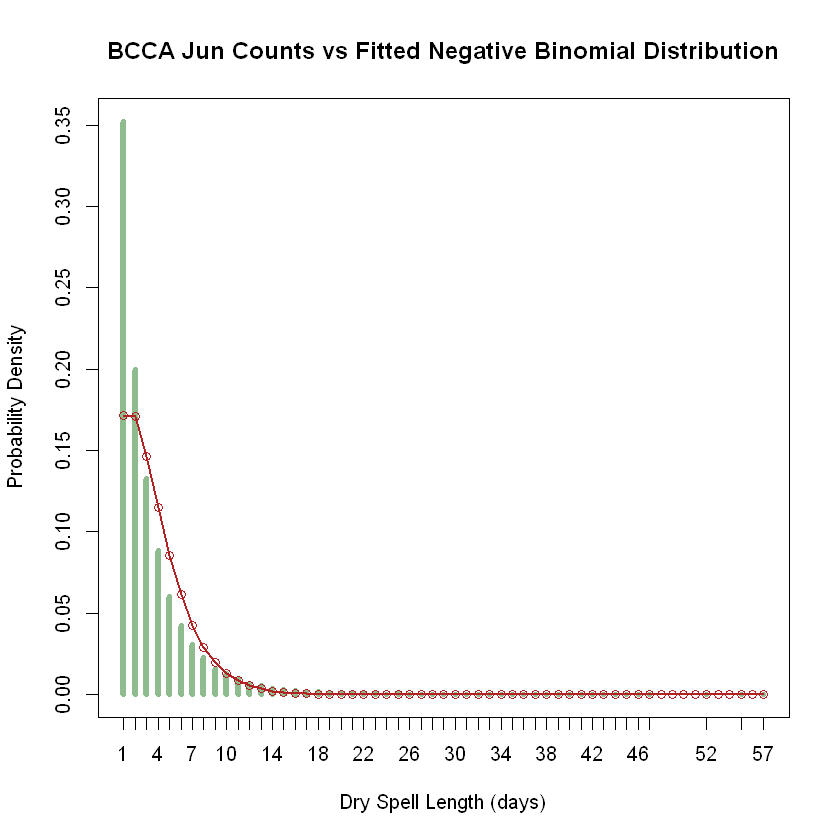

In [342]:
maxP <- max(dBCJun$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dJun_size, mu=BCfdNB_dJun_mu )
ttab <- table( dBCJun$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Jun Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

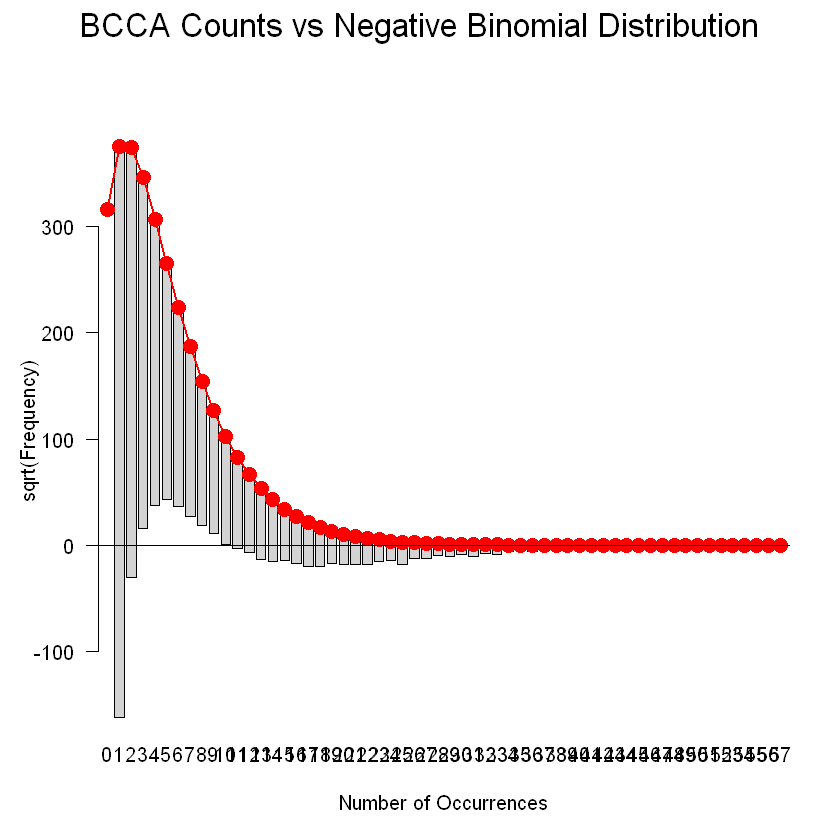

In [343]:
plot( BCgf_dJun, main="BCCA Counts vs Negative Binomial Distribution" )

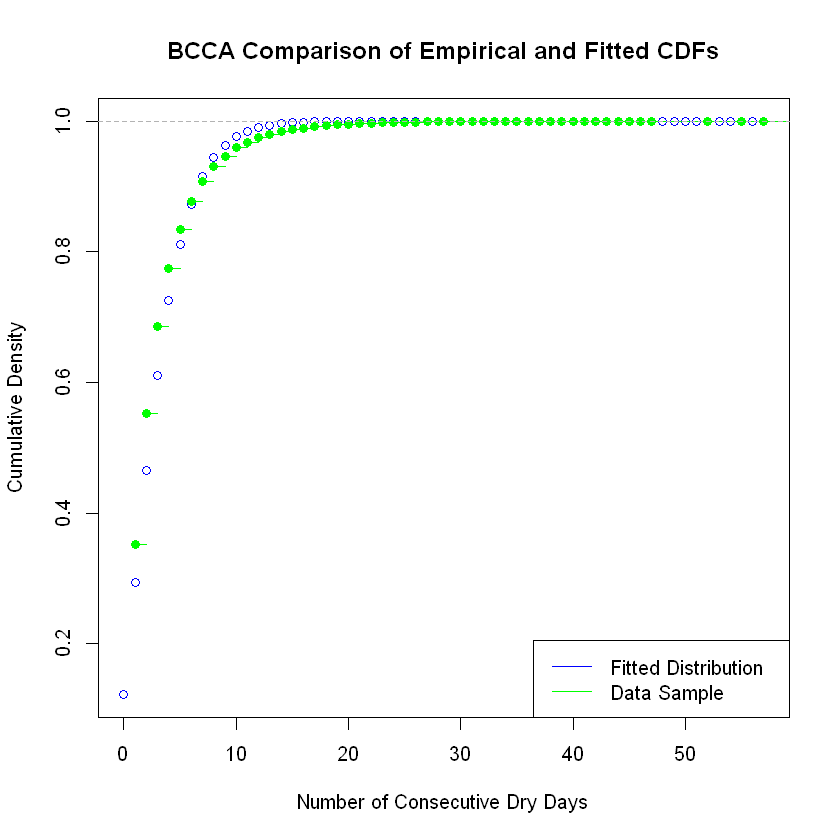

In [344]:
x <- seq(0,dBCJunMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dJun_mu, size=BCfdNB_dJun_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCJun$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

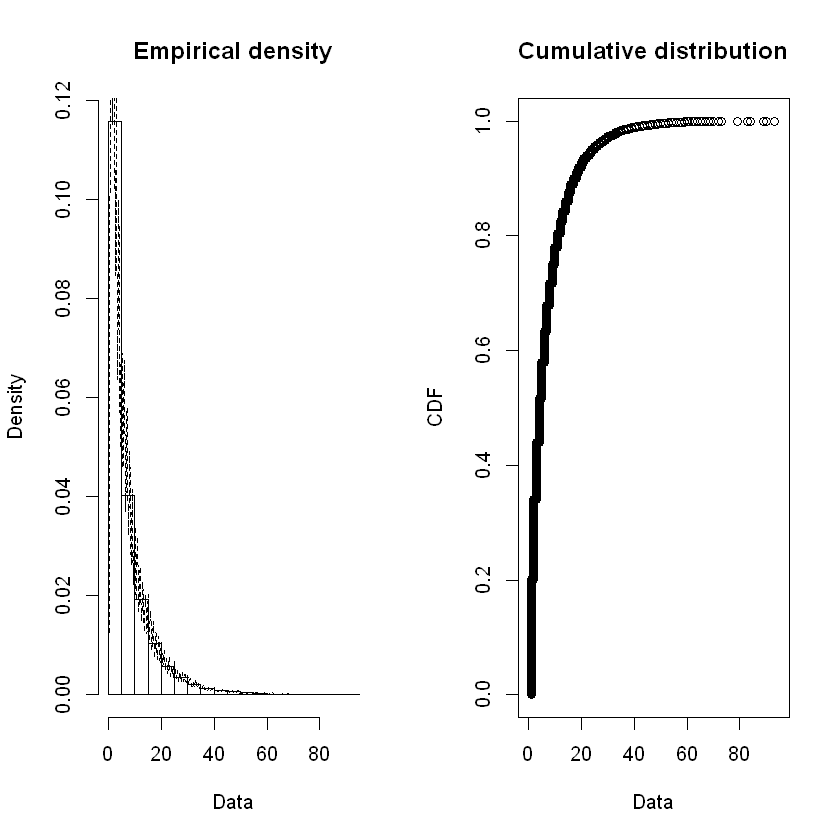

In [345]:
plotdist( dLOJul$Dry_Count, histo=TRUE, demp=TRUE )

In [346]:
LOfd_NB_dJul <- fitdist( dLOJul$Dry_Count, "nbinom" )
LOfd_GE_dJul <- fitdist( dLOJul$Dry_Count, "geom" )

In [347]:
LOfdNB_dJul_size <- LOfd_NB_dJul$estimate[["size"]]
LOfdNB_dJul_mu <- LOfd_NB_dJul$estimate[["mu"]]
cat("LOCA Jul size: ", LOfdNB_dJul_size, "\n", "LOCA Jul mu: ", LOfdNB_dJul_mu, "\n")

LOCA Jul size:  1.231678 
 LOCA Jul mu:  7.302386 


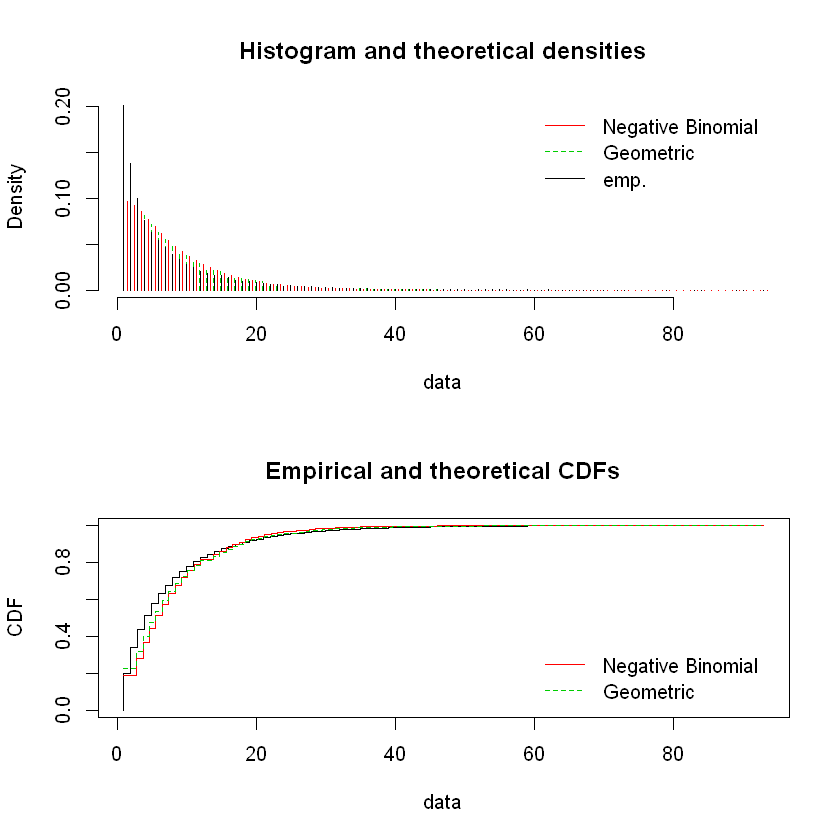

In [348]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dJul, LOfd_GE_dJul), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dJul, LOfd_GE_dJul), legendtext=plot.legend )

In [349]:
LOstatRes <- gofstat( list(LOfd_NB_dJul, LOfd_GE_dJul), fitnames=c("Negative Binomial", "Geometric") )

In [350]:
print( LOstatRes )

Chi-squared statistic:  75226.82 44260.13 
Degree of freedom of the Chi-squared distribution:  36 37 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     201467            189609.6347    226781.4564
<= 2     138792             92895.4173     93339.1661
<= 3     100375             85626.8641     82095.1303
<= 4      76294             77512.4693     72205.5991
<= 5      62546             69398.7229     63507.4033
<= 6      54248             61675.7064     55857.0294
<= 7      46255             54521.0321     49128.2523
<= 8      38597             48003.3282     43210.0525
<= 9      33494             42132.6116     38004.7845
<= 10     28577             36887.0678     33426.5653
<= 11     25072             32228.1207     29399.8580
<= 12     20928             28109.2115     25858.2252
<= 13     18081             24480.9982     22743.2326
<= 14     15985             21294.4330     20003.4853
<= 15     16199             18502.5445    

In [351]:
LOfdNB_dJul_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [352]:
LOfdNB_dJul_p = LOfdNB_dJul_size / (LOfdNB_dJul_size + LOfdNB_dJul_mu)
cat("LOCA prob: ", LOfdNB_dJul_p)

LOCA prob:  0.1443249

In [353]:
# add to our tracking dataframe
LOMonDistDF[7, ] <- list( 7, dLOJulMean, dLOJulBNr, LOfdNB_dJul_p, LOfdNB_dJul_mu, LOfdNB_dJul_size,
                          LOfdNB_dJul_pvalue )

In [354]:
LOgf_dJul <- goodfit( dLOJul$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dJul_size, prob=LOfdNB_dJul_p) )

In [355]:
summary( LOgf_dJul )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          292368.8 93        0
Likelihood Ratio 330134.6 77        0


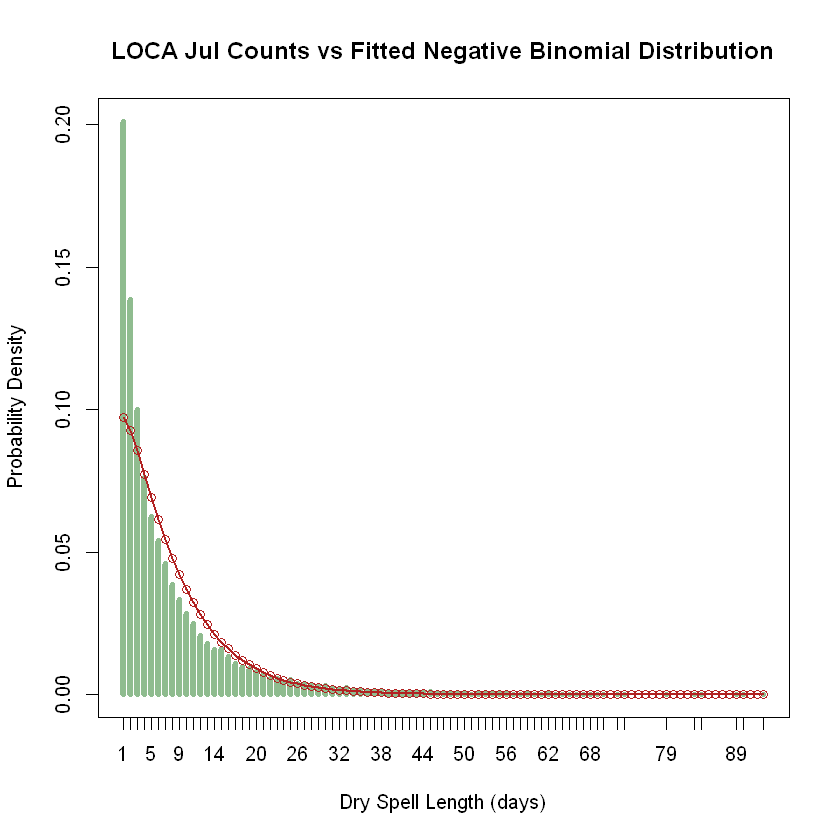

In [356]:
maxP <- max(dLOJul$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dJul_size, mu=LOfdNB_dJul_mu )
ttab <- table( dLOJul$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Jul Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

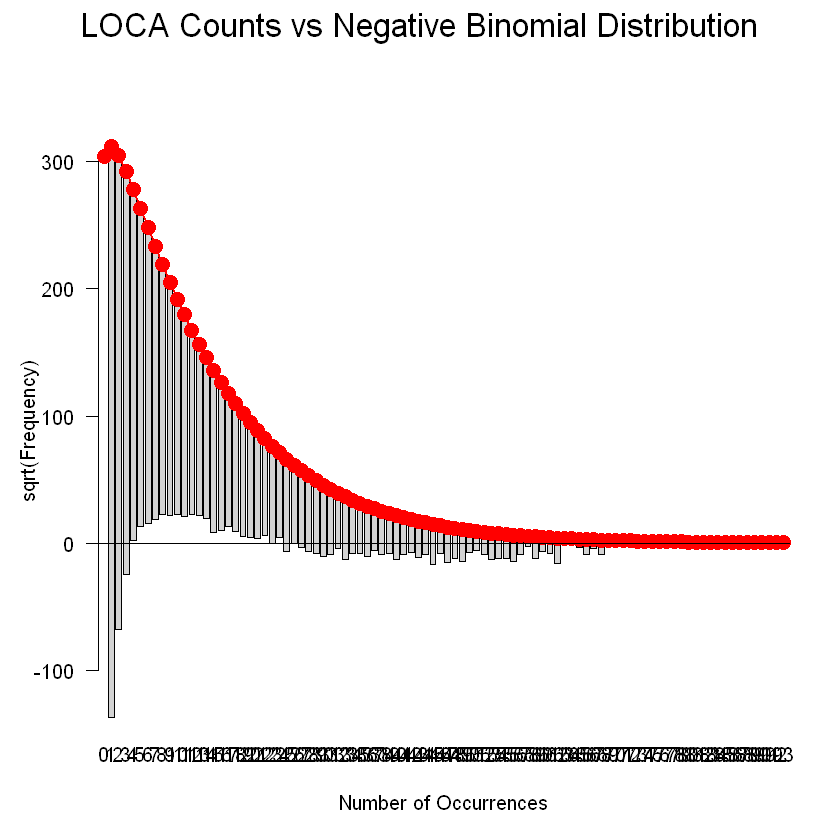

In [357]:
plot( LOgf_dJul, main="LOCA Counts vs Negative Binomial Distribution" )

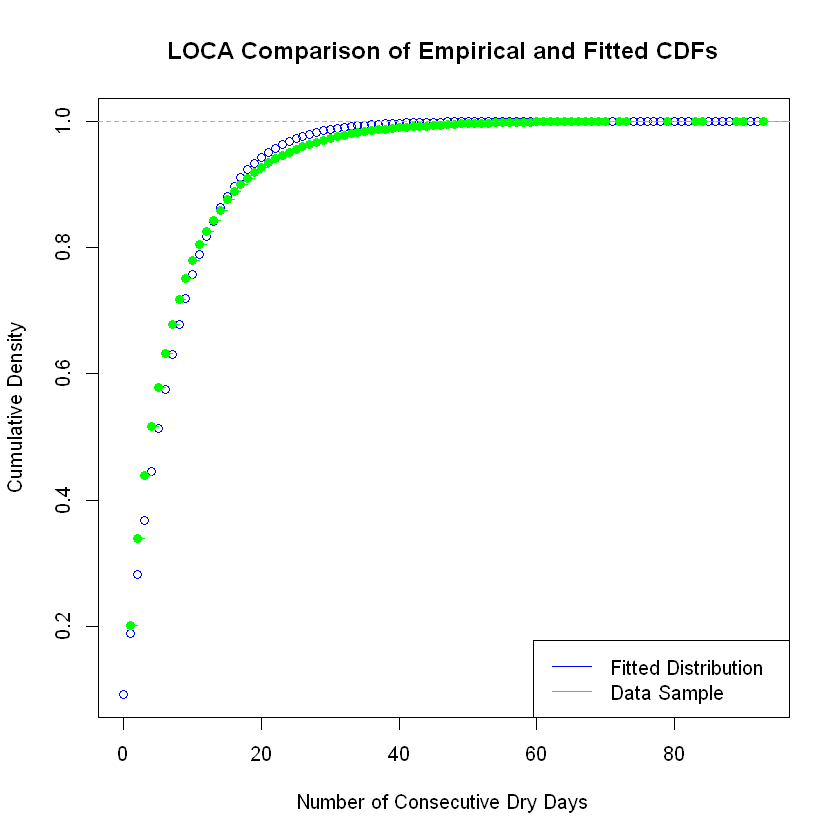

In [358]:
x <- seq(0,dLOJulMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dJul_mu, size=LOfdNB_dJul_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOJul$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

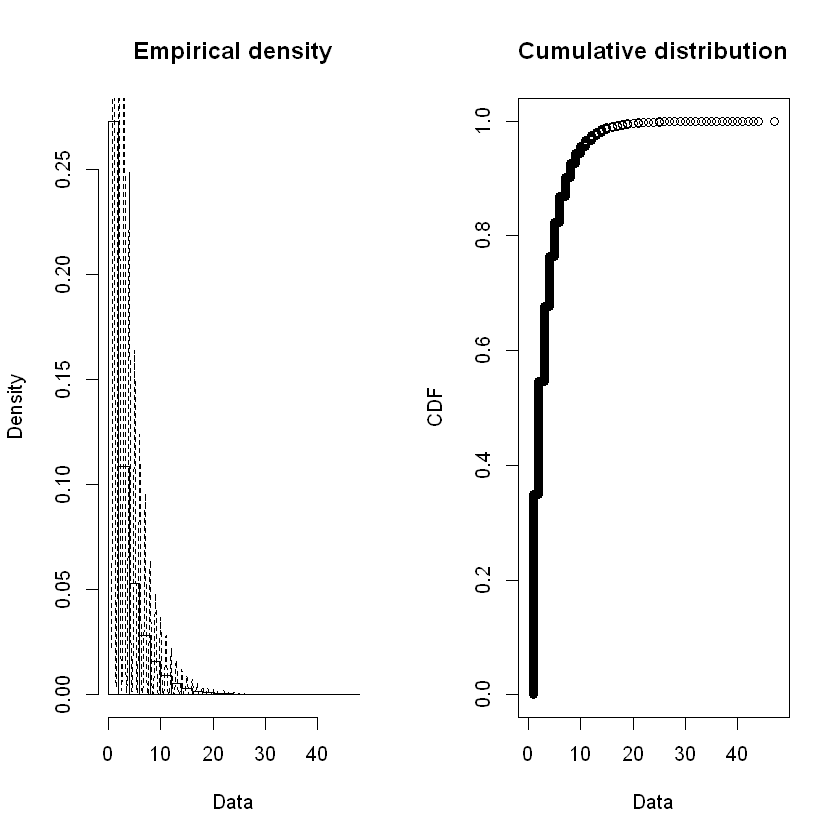

In [359]:
plotdist( dBCJul$Dry_Count, histo=TRUE, demp=TRUE )

In [360]:
BCfd_NB_dJul <- fitdist( dBCJul$Dry_Count, "nbinom" )
BCfd_GE_dJul <- fitdist( dBCJul$Dry_Count, "geom" )

In [361]:
summary( BCfd_NB_dJul )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.483632 0.006239240
mu   3.383552 0.003082789
Loglikelihood:  -1902153   AIC:  3804310   BIC:  3804333 
Correlation matrix:
             size           mu
size 1.000000e+00 7.467495e-05
mu   7.467495e-05 1.000000e+00


In [362]:
BCfdNB_dJul_size <- BCfd_NB_dJul$estimate[["size"]]
BCfdNB_dJul_mu <- BCfd_NB_dJul$estimate[["mu"]]
cat("BCCA Jul size: ", BCfdNB_dJul_size, "\n", "BCCA Jul mu: ", BCfdNB_dJul_mu, "\n")

BCCA Jul size:  2.483632 
 BCCA Jul mu:  3.383552 


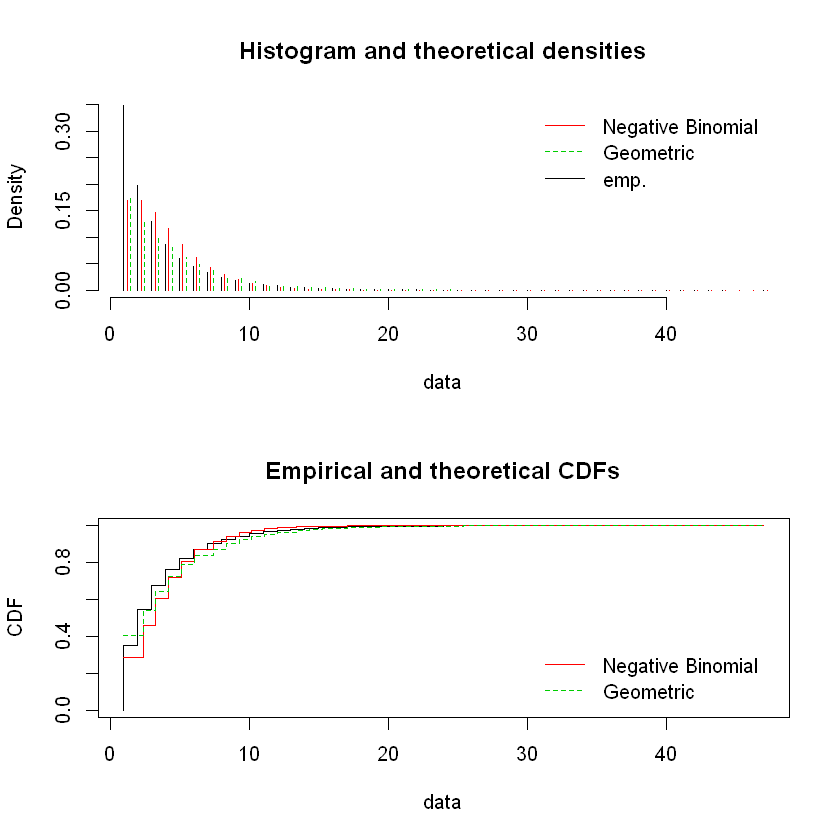

In [363]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dJul, BCfd_GE_dJul), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dJul, BCfd_GE_dJul), legendtext=plot.legend )

In [364]:
BCstatRes <- gofstat( list(BCfd_NB_dJul, BCfd_GE_dJul), fitnames=c("Negative Binomial", "Geometric") )

In [365]:
print(BCstatRes)

Chi-squared statistic:  94915.12 42060.34 
Degree of freedom of the Chi-squared distribution:  16 17 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     292884            241860.6816     339929.329
<= 2     166393            143062.5786     114302.651
<= 3     109620            123304.2032      88228.241
<= 4      73379             97483.0965      68101.854
<= 5      51030             72898.8691      52566.645
<= 6      37878             52435.4603      40575.285
<= 7      27591             36648.1441      31319.361
<= 8      19656             25054.1580      24174.874
<= 9      15238             16830.3128      18660.167
<= 10     11133             11145.8854      14403.461
<= 11      8761              7294.6753      11117.782
<= 12      6764              4726.8816       8581.624
<= 13      4941              3037.0502       6624.007
<= 14      3771              1937.0458       5112.957
<= 15      2738              1227.5655    

In [366]:
BCfdNB_dJul_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [367]:
BCfdNB_dJul_p = BCfdNB_dJul_size / (BCfdNB_dJul_size + BCfdNB_dJul_mu)
cat("BCCA prob: ", BCfdNB_dJul_p)

BCCA prob:  0.4233091

In [368]:
# add to our tracking dataframe
BCMonDistDF[7, ] <- list( 7, dBCJulMean, dBCJulBNr, BCfdNB_dJul_p, BCfdNB_dJul_mu, BCfdNB_dJul_size,
                          BCfdNB_dJul_pvalue )

In [369]:
BCgf_dJul <- goodfit( dBCJul$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dJul_size, prob=BCfdNB_dJul_p) )

In [370]:
summary( BCgf_dJul )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          549212.5 47        0
Likelihood Ratio 371342.5 44        0


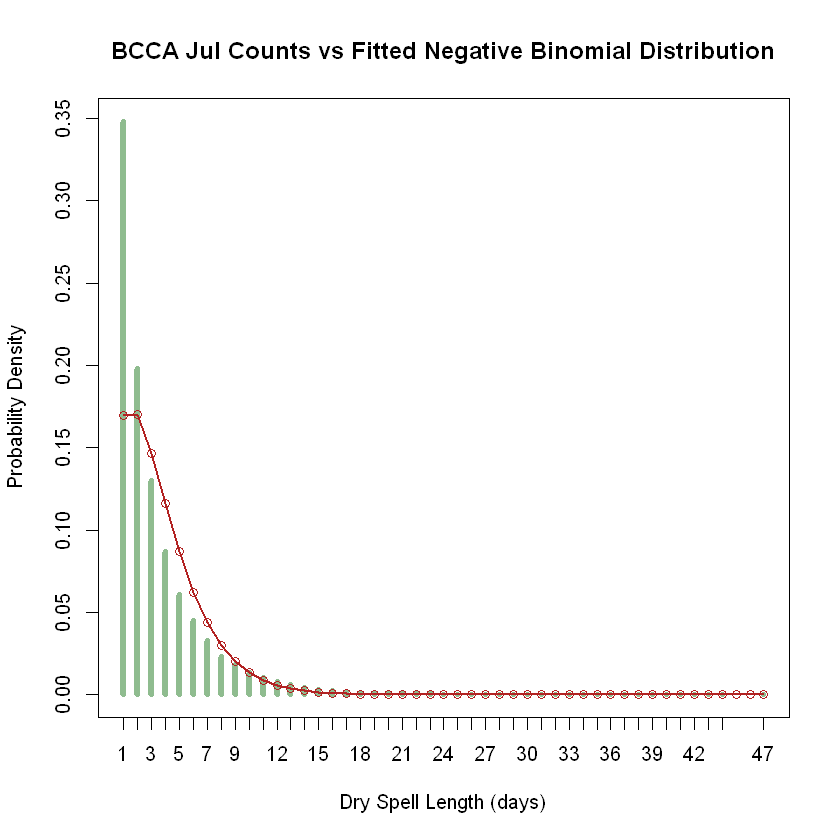

In [371]:
maxP <- max(dBCJul$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dJul_size, mu=BCfdNB_dJul_mu )
ttab <- table( dBCJul$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Jul Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

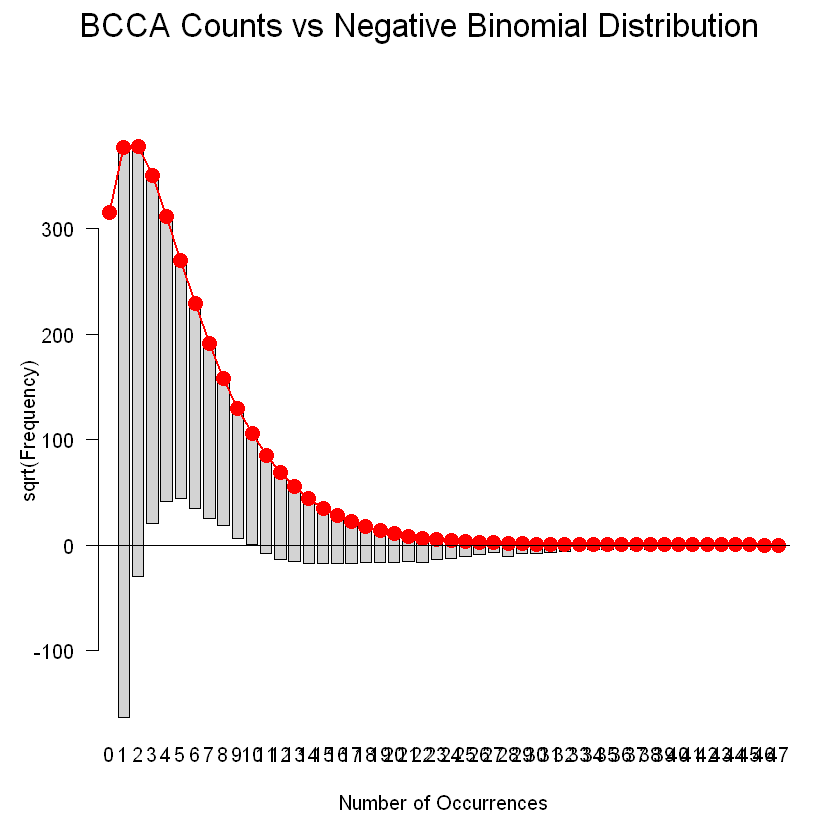

In [372]:
plot( BCgf_dJul, main="BCCA Counts vs Negative Binomial Distribution" )

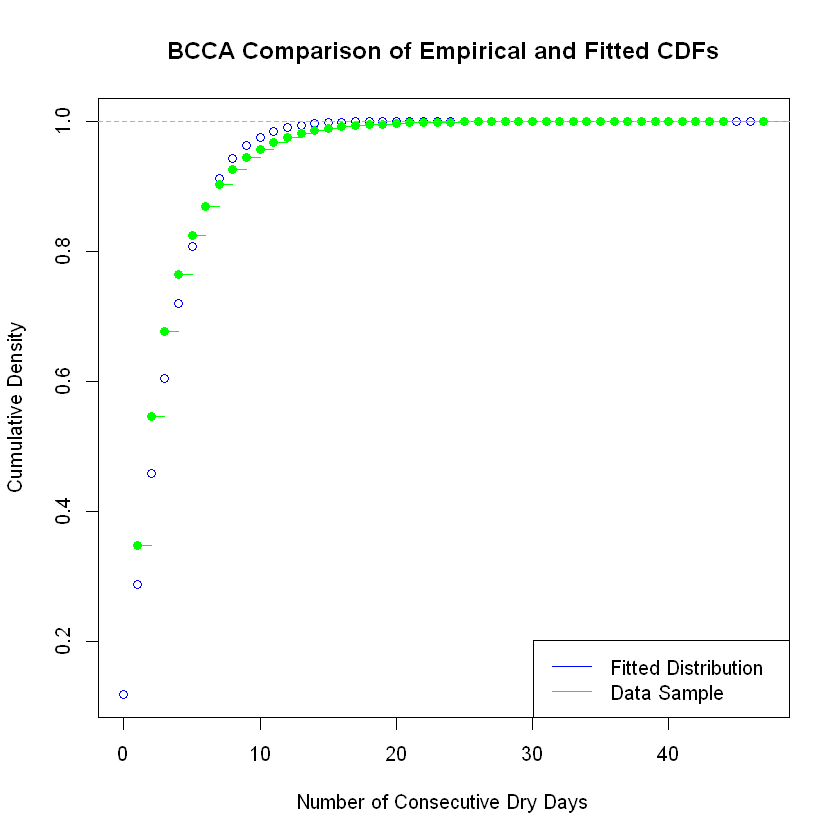

In [373]:
x <- seq(0,dBCJulMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dJul_mu, size=BCfdNB_dJul_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCJul$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

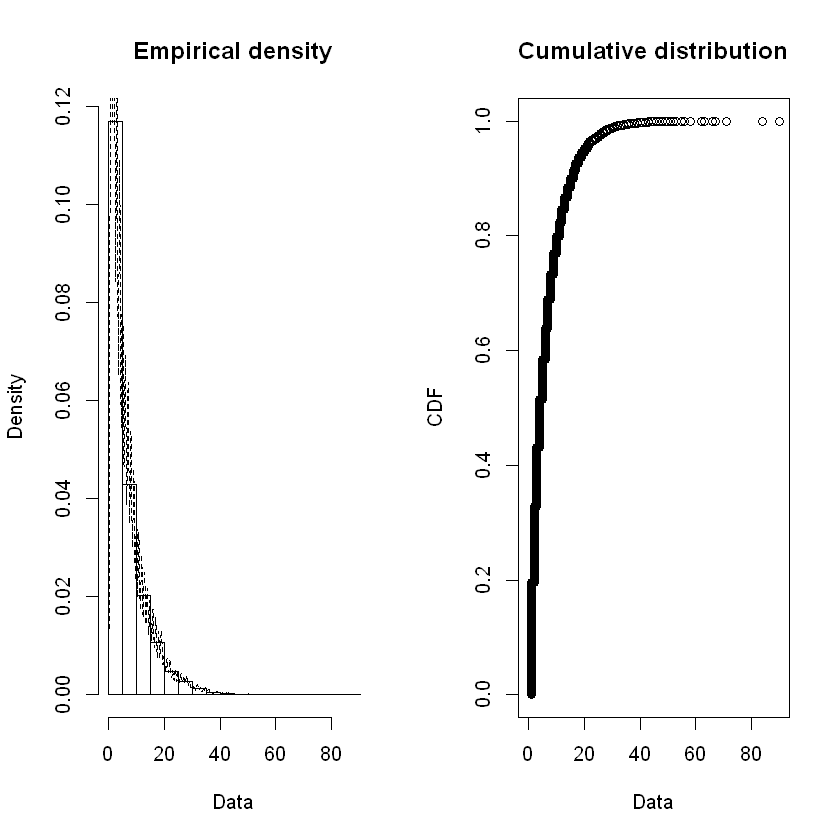

In [374]:
plotdist( dLOAug$Dry_Count, histo=TRUE, demp=TRUE )

In [375]:
LOfd_NB_dAug <- fitdist( dLOAug$Dry_Count, "nbinom" )
LOfd_GE_dAug <- fitdist( dLOAug$Dry_Count, "geom" )

In [376]:
LOfdNB_dAug_size <- LOfd_NB_dAug$estimate[["size"]]
LOfdNB_dAug_mu <- LOfd_NB_dAug$estimate[["mu"]]
cat("LOCA Aug size: ", LOfdNB_dAug_size, "\n", "LOCA Aug mu: ", LOfdNB_dAug_mu, "\n")

LOCA Aug size:  1.492751 
 LOCA Aug mu:  6.613455 


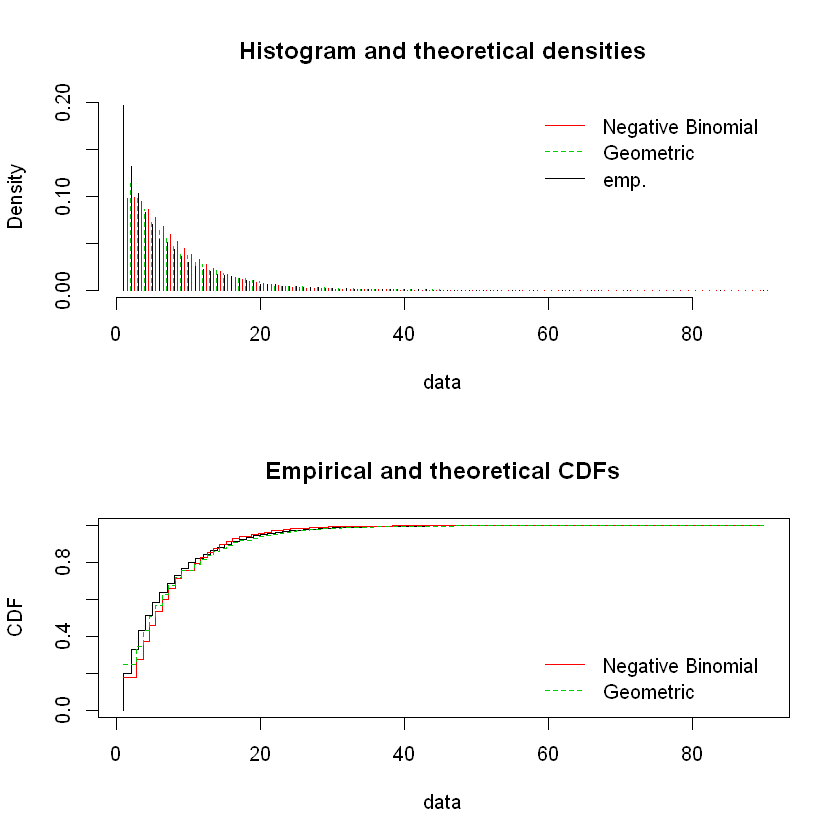

In [377]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dAug, LOfd_GE_dAug), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dAug, LOfd_GE_dAug), legendtext=plot.legend )

In [378]:
LOstatRes <- gofstat( list(LOfd_NB_dAug, LOfd_GE_dAug), fitnames=c("Negative Binomial", "Geometric") )

In [379]:
print( LOstatRes )

Chi-squared statistic:  37457.08 27779.67 
Degree of freedom of the Chi-squared distribution:  30 31 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     198184            178964.7987     247579.364
<= 2     132682             99928.8483      99971.210
<= 3     104350             94917.8784      86839.838
<= 4      83810             86978.3468      75433.292
<= 5      70513             77954.6137      65525.014
<= 6      54615             68822.4436      56918.203
<= 7      51355             60101.3345      49441.910
<= 8      43643             52053.9015      42947.639
<= 9      36325             44793.3591      37306.401
<= 10     29920             38345.4435      32406.148
<= 11     25831             32685.5534      28149.551
<= 12     22591             27761.5331      24452.064
<= 13     20390             23507.7663      21240.248
<= 14     17408             19853.8587      18450.309
<= 15     16115             16729.8857    

In [380]:
LOfdNB_dAug_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [381]:
LOfdNB_dAug_p = LOfdNB_dAug_size / (LOfdNB_dAug_size + LOfdNB_dAug_mu)
cat("LOCA prob: ", LOfdNB_dAug_p)

LOCA prob:  0.1841492

In [382]:
# add to our tracking dataframe
LOMonDistDF[8, ] <- list( 8, dLOAugMean, dLOAugBNr, LOfdNB_dAug_p, LOfdNB_dAug_mu, LOfdNB_dAug_size,
                          LOfdNB_dAug_pvalue )

In [383]:
LOgf_dAug <- goodfit( dLOAug$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dAug_size, prob=LOfdNB_dAug_p) )

In [384]:
summary( LOgf_dAug )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          224052.2 90        0
Likelihood Ratio 273861.0 62        0


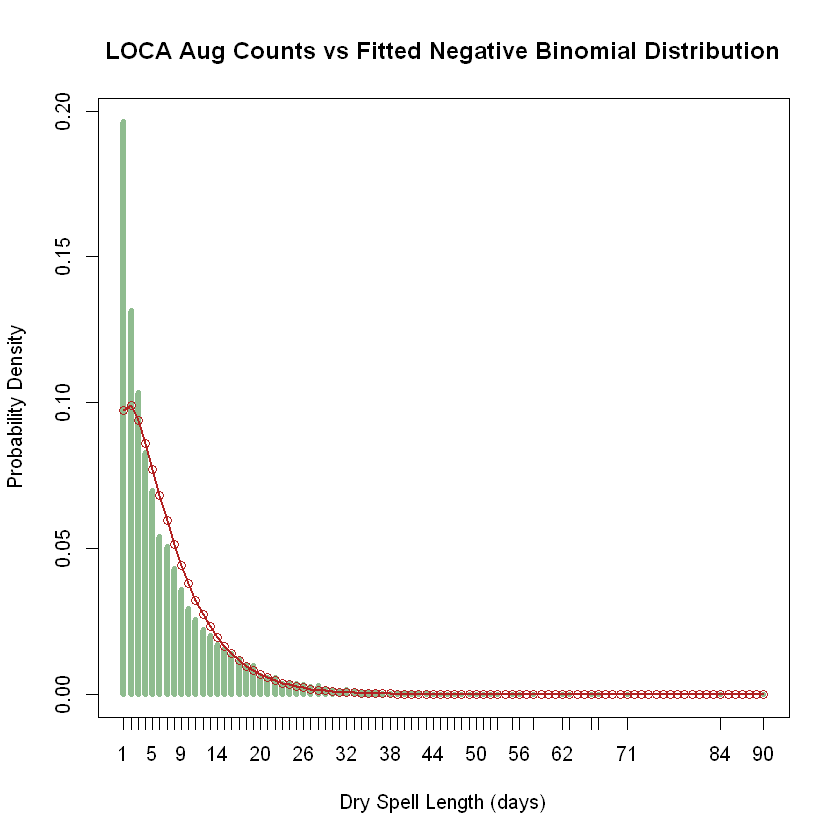

In [385]:
maxP <- max(dLOAug$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dAug_size, mu=LOfdNB_dAug_mu )
ttab <- table( dLOAug$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Aug Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

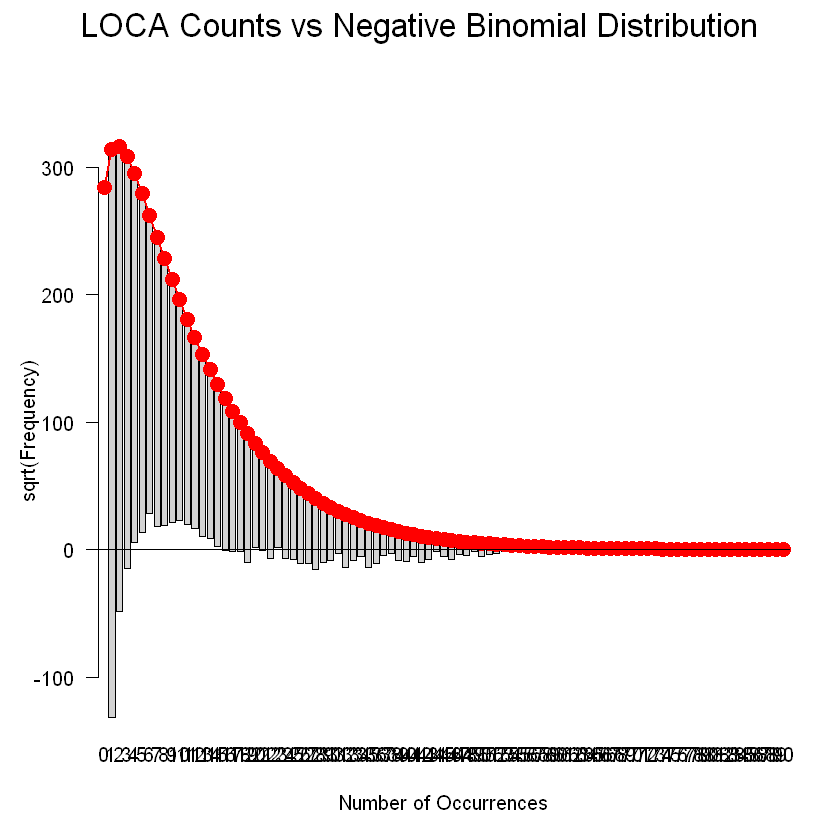

In [386]:
plot( LOgf_dAug, main="LOCA Counts vs Negative Binomial Distribution" )

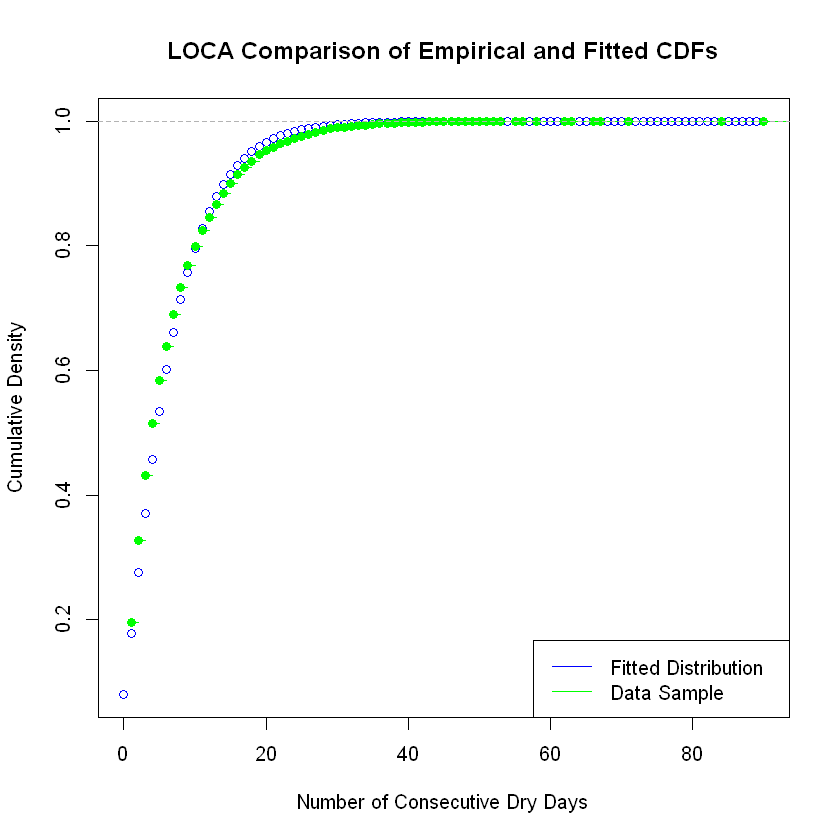

In [387]:
x <- seq(0,dLOAugMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dAug_mu, size=LOfdNB_dAug_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOAug$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

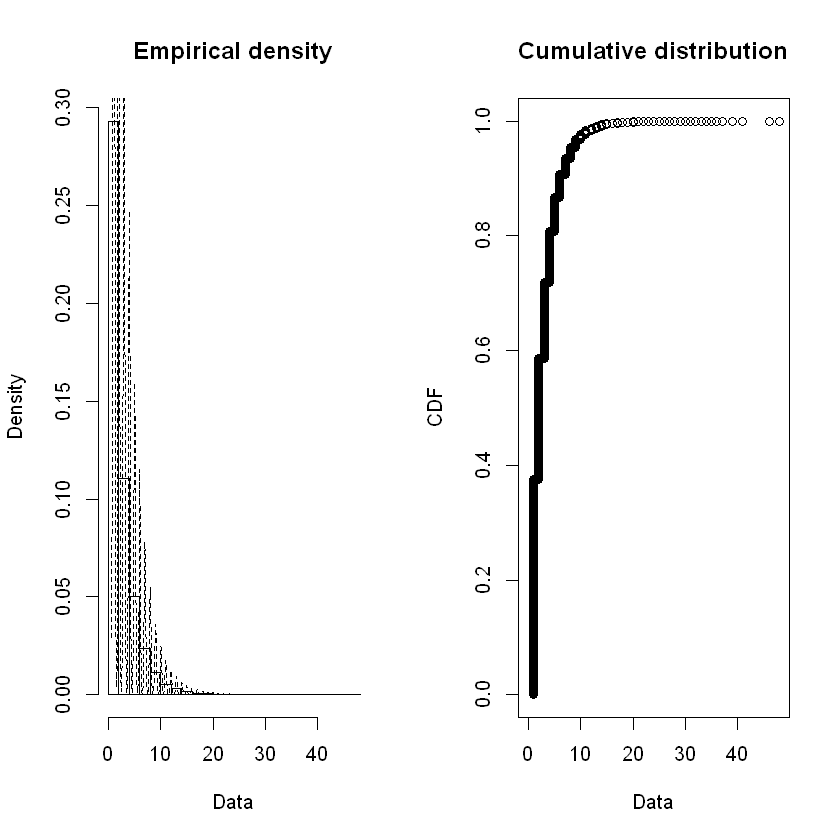

In [388]:
plotdist( dBCAug$Dry_Count, histo=TRUE, demp=TRUE )

In [389]:
BCfd_NB_dAug <- fitdist( dBCAug$Dry_Count, "nbinom" )
BCfd_GE_dAug <- fitdist( dBCAug$Dry_Count, "geom" )

In [390]:
summary( BCfd_NB_dAug )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 3.390757 0.010219071
mu   2.961081 0.002521698
Loglikelihood:  -1837885   AIC:  3675774   BIC:  3675797 
Correlation matrix:
              size            mu
size  1.0000000000 -0.0001786248
mu   -0.0001786248  1.0000000000


In [391]:
BCfdNB_dAug_size <- BCfd_NB_dAug$estimate[["size"]]
BCfdNB_dAug_mu <- BCfd_NB_dAug$estimate[["mu"]]
cat("BCCA Aug size: ", BCfdNB_dAug_size, "\n", "BCCA Aug mu: ", BCfdNB_dAug_mu, "\n")

BCCA Aug size:  3.390757 
 BCCA Aug mu:  2.961081 


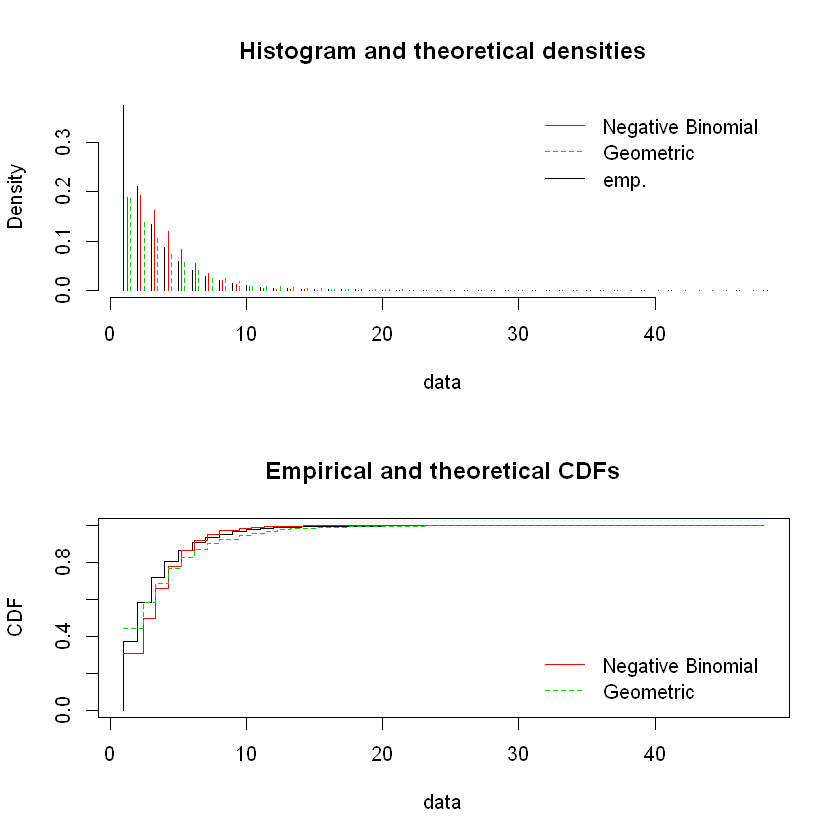

In [392]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dAug, BCfd_GE_dAug), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dAug, BCfd_GE_dAug), legendtext=plot.legend )

In [393]:
BCstatRes <- gofstat( list(BCfd_NB_dAug, BCfd_GE_dAug), fitnames=c("Negative Binomial", "Geometric") )

In [394]:
print(BCstatRes)

Chi-squared statistic:  105517.2 57697.13 
Degree of freedom of the Chi-squared distribution:  13 14 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     327378           268004.59512     384928.385
<= 2     184178           168001.71846     123085.353
<= 3     116369           140732.07892      92009.162
<= 4      76444           104818.10223      68778.987
<= 5      51545            72228.08258      51413.891
<= 6      35878            47087.63222      38433.078
<= 7      24234            29448.30399      28729.619
<= 8      16956            17830.69866      21476.058
<= 9      11688            10520.32870      16053.853
<= 10      8091             6076.84304      12000.628
<= 11      5394             3448.58816       8970.748
<= 12      3907             1927.94480       6705.843
<= 13      2983             1064.05014       5012.773
<= 15      3539              894.62178       6548.257
<= 18      2364              304.84643    

In [395]:
BCfdNB_dAug_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [396]:
BCfdNB_dAug_p = BCfdNB_dAug_size / (BCfdNB_dAug_size + BCfdNB_dAug_mu)
cat("BCCA prob: ", BCfdNB_dAug_p)

BCCA prob:  0.533823

In [397]:
# add to our tracking dataframe
BCMonDistDF[8, ] <- list( 8, dBCAugMean, dBCAugBNr, BCfdNB_dAug_p, BCfdNB_dAug_mu, BCfdNB_dAug_size,
                          BCfdNB_dAug_pvalue )

In [398]:
BCgf_dAug <- goodfit( dBCAug$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dAug_size, prob=BCfdNB_dAug_p) )

In [399]:
summary( BCgf_dAug )


	 Goodness-of-fit test for nbinomial distribution

                        X^2 df P(> X^2)
Pearson          30640388.2 48        0
Likelihood Ratio   382317.4 40        0


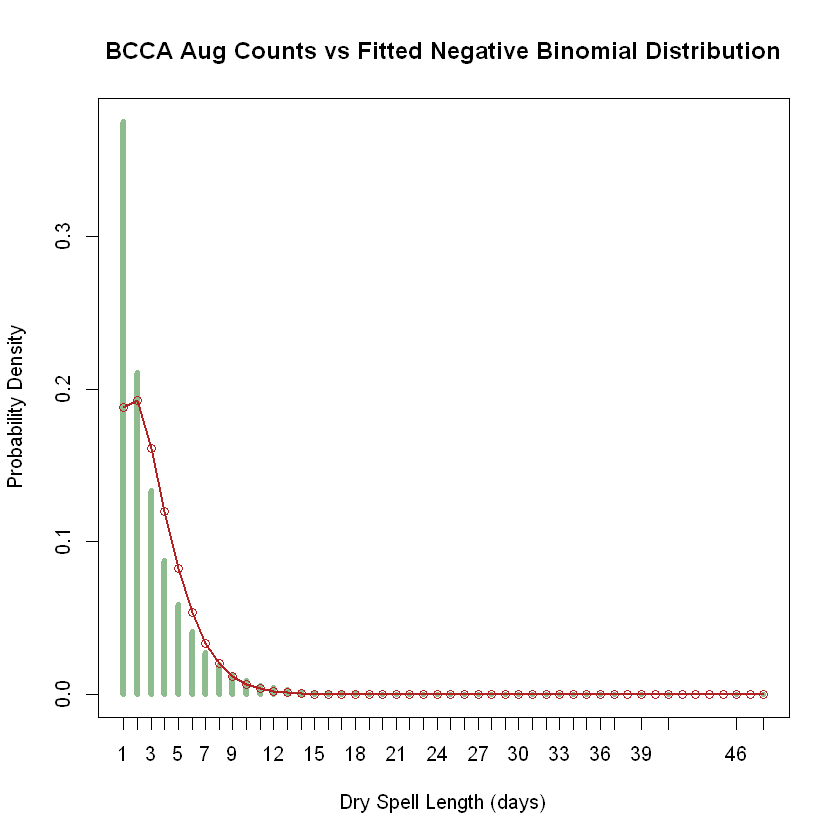

In [400]:
maxP <- max(dBCAug$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dAug_size, mu=BCfdNB_dAug_mu )
ttab <- table( dBCAug$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Aug Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

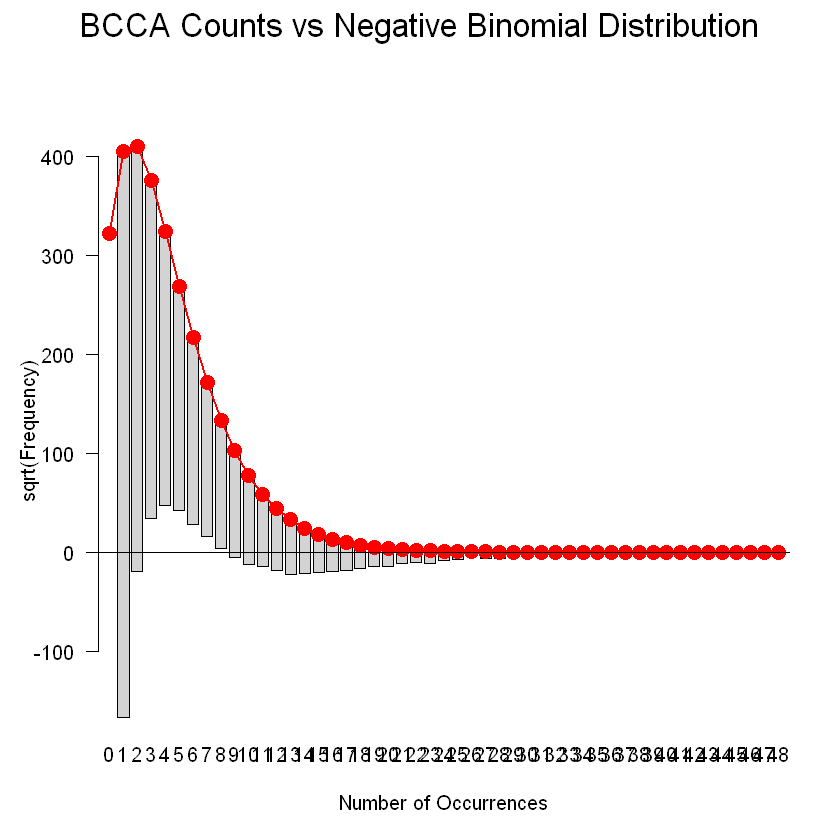

In [401]:
plot( BCgf_dAug, main="BCCA Counts vs Negative Binomial Distribution" )

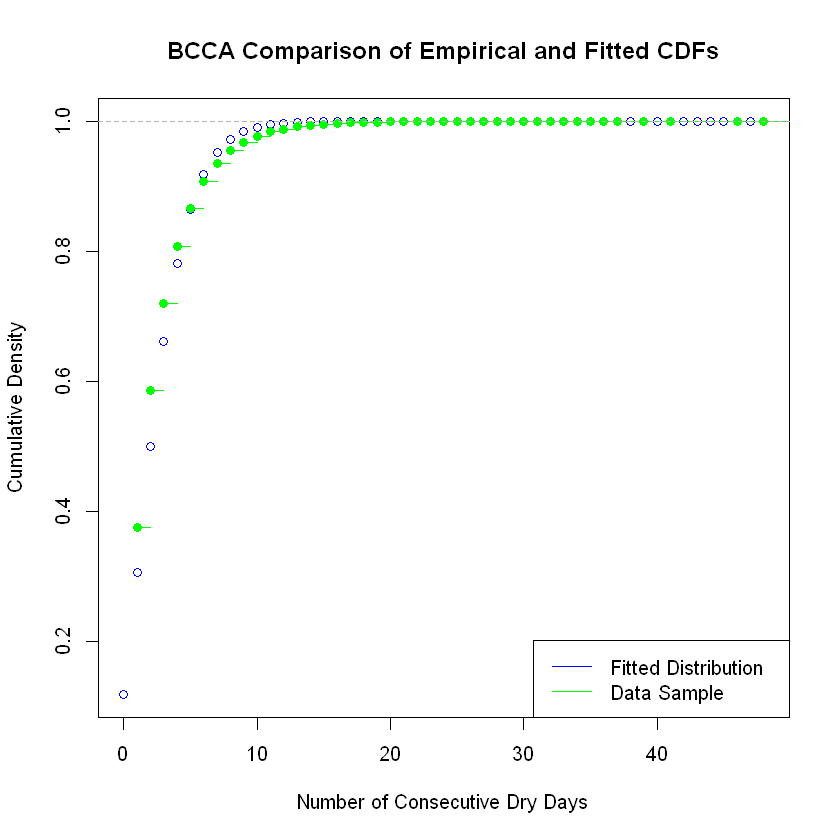

In [402]:
x <- seq(0,dBCAugMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dAug_mu, size=BCfdNB_dAug_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCAug$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

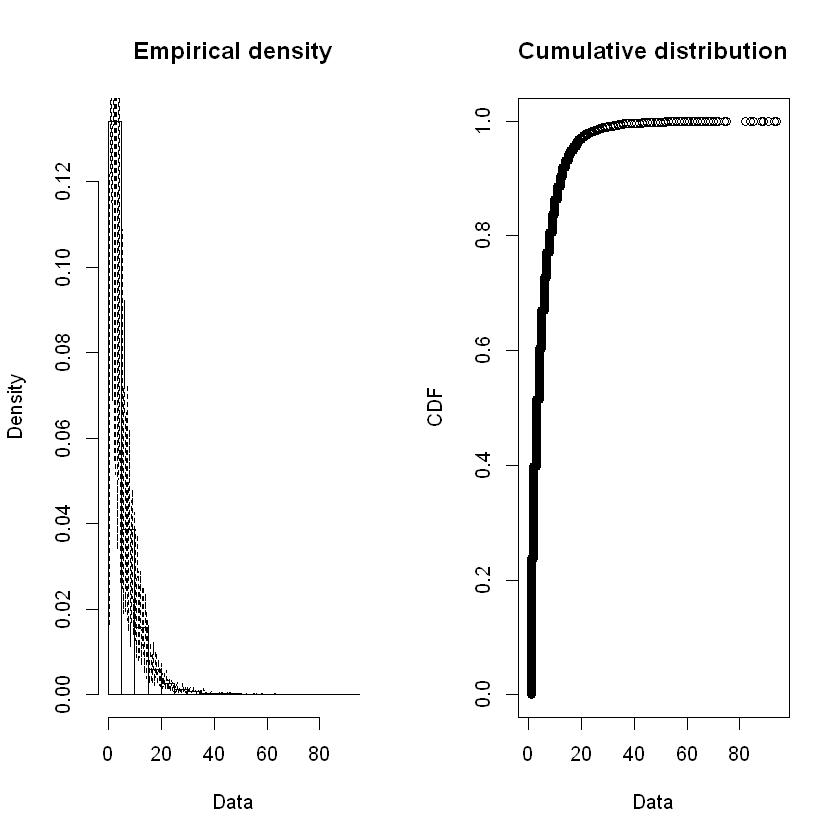

In [403]:
plotdist( dLOSep$Dry_Count, histo=TRUE, demp=TRUE )

In [404]:
LOfd_NB_dSep <- fitdist( dLOSep$Dry_Count, "nbinom" )
LOfd_GE_dSep <- fitdist( dLOSep$Dry_Count, "geom" )

In [405]:
LOfdNB_dSep_size <- LOfd_NB_dSep$estimate[["size"]]
LOfdNB_dSep_mu <- LOfd_NB_dSep$estimate[["mu"]]
cat("LOCA Sep size: ", LOfdNB_dSep_size, "\n", "LOCA Sep mu: ", LOfdNB_dSep_mu, "\n")

LOCA Sep size:  1.531123 
 LOCA Sep mu:  5.417343 


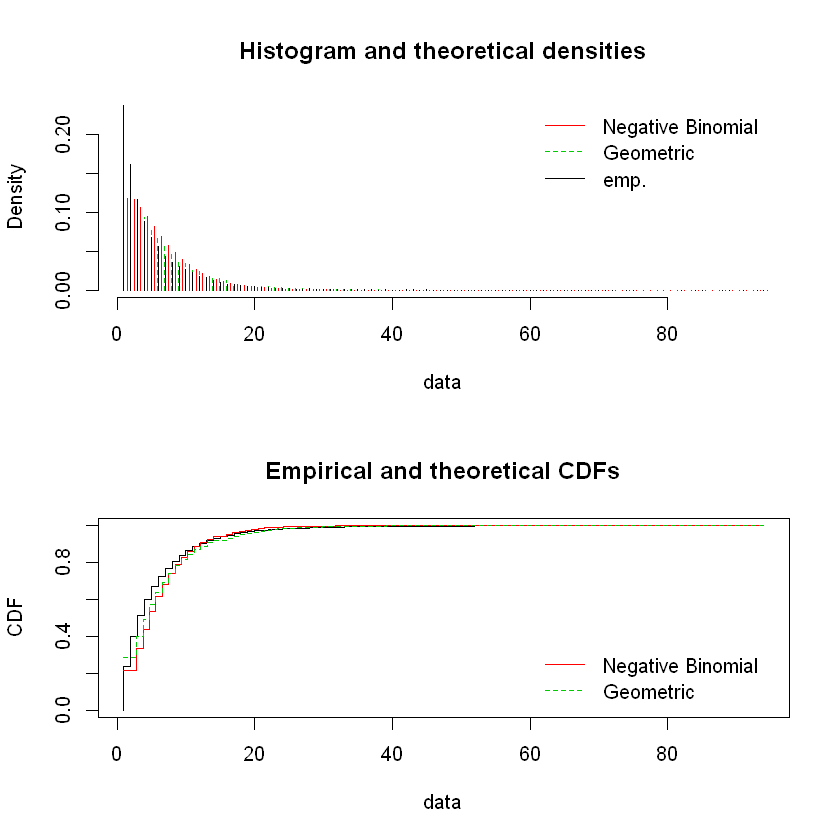

In [406]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dSep, LOfd_GE_dSep), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dSep, LOfd_GE_dSep), legendtext=plot.legend )

In [407]:
LOstatRes <- gofstat( list(LOfd_NB_dSep, LOfd_GE_dSep), fitnames=c("Negative Binomial", "Geometric") )

In [408]:
print( LOstatRes )

Chi-squared statistic:  252314.8 63654.29 
Degree of freedom of the Chi-squared distribution:  27 28 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     277128           253277.76632    336185.2387
<= 2     189043           135988.22161    129913.0282
<= 3     136569           124793.01684    109671.1682
<= 4     102645           110213.18147     92583.2097
<= 5      79305            95054.84197     78157.7406
<= 6      65921            80669.29252     65979.9162
<= 7      51186            67665.50685     55699.5291
<= 8      42117            56257.56691     47020.9378
<= 9      35282            46449.37761     39694.5653
<= 10     31027            38137.47823     33509.7211
<= 11     26495            31169.38836     28288.5428
<= 12     20194            25376.65729     23880.8808
<= 13     18905            20593.12670     20159.9803
<= 14     15075            16664.44375     17018.8366
<= 15     11710            13452.40112    

In [409]:
LOfdNB_dSep_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [410]:
LOfdNB_dSep_p = LOfdNB_dSep_size / (LOfdNB_dSep_size + LOfdNB_dSep_mu)
cat("LOCA prob: ", LOfdNB_dSep_p)

LOCA prob:  0.2203541

In [411]:
# add to our tracking dataframe
LOMonDistDF[9, ] <- list( 9, dLOSepMean, dLOSepBNr, LOfdNB_dSep_p, LOfdNB_dSep_mu, LOfdNB_dSep_size,
                          LOfdNB_dSep_pvalue )

In [412]:
LOgf_dSep <- goodfit( dLOSep$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dSep_size, prob=LOfdNB_dSep_p) )

In [413]:
summary( LOgf_dSep )


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          1918834.5 94        0
Likelihood Ratio  418167.4 81        0


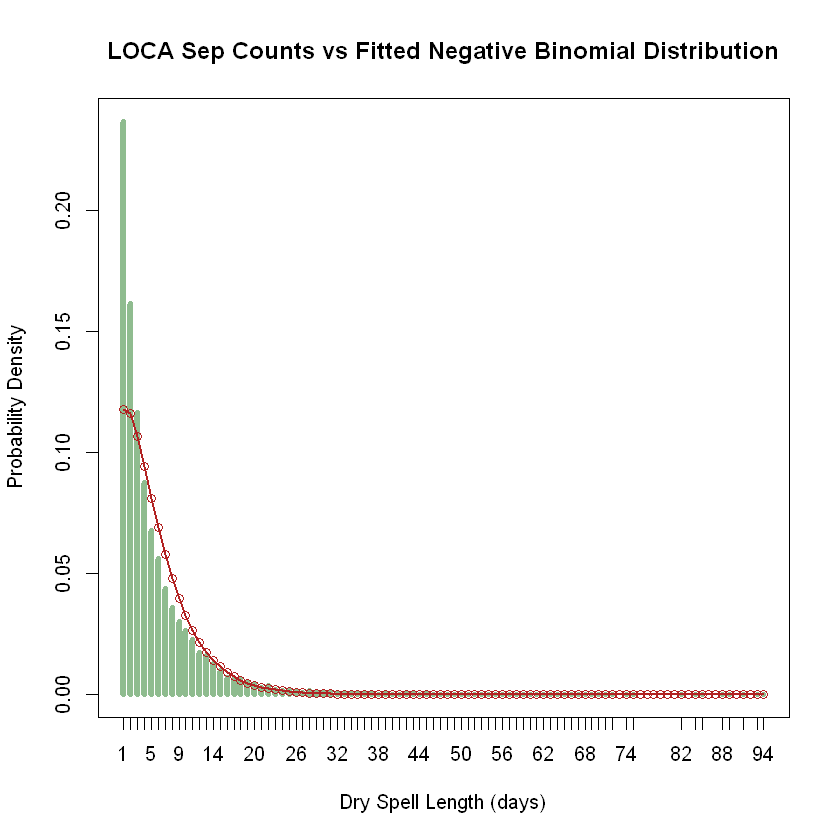

In [414]:
maxP <- max(dLOSep$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dSep_size, mu=LOfdNB_dSep_mu )
ttab <- table( dLOSep$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Sep Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

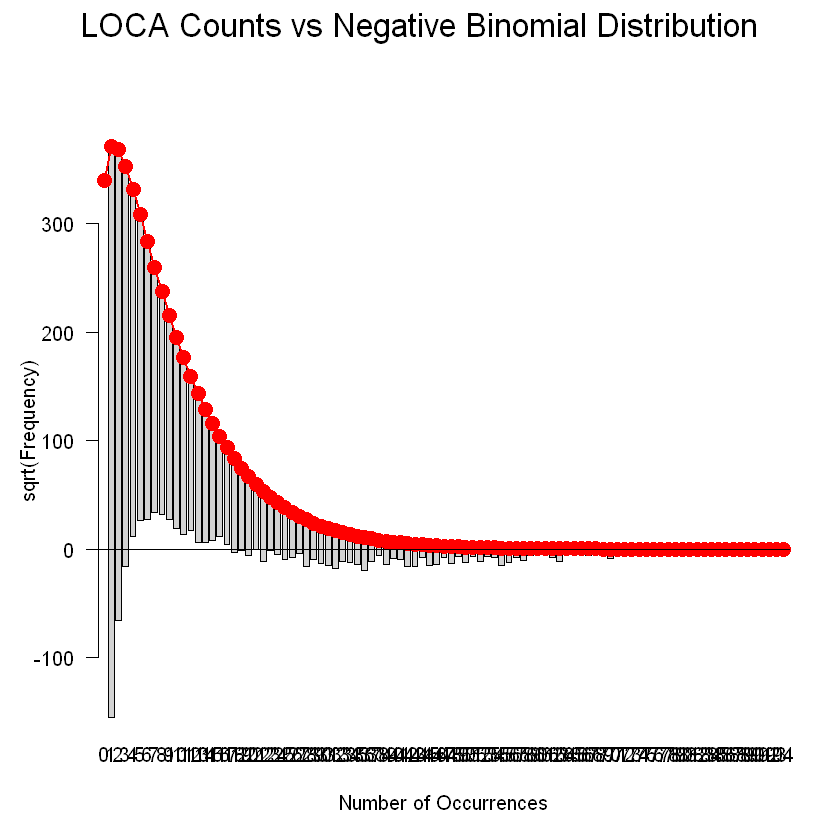

In [415]:
plot( LOgf_dSep, main="LOCA Counts vs Negative Binomial Distribution" )

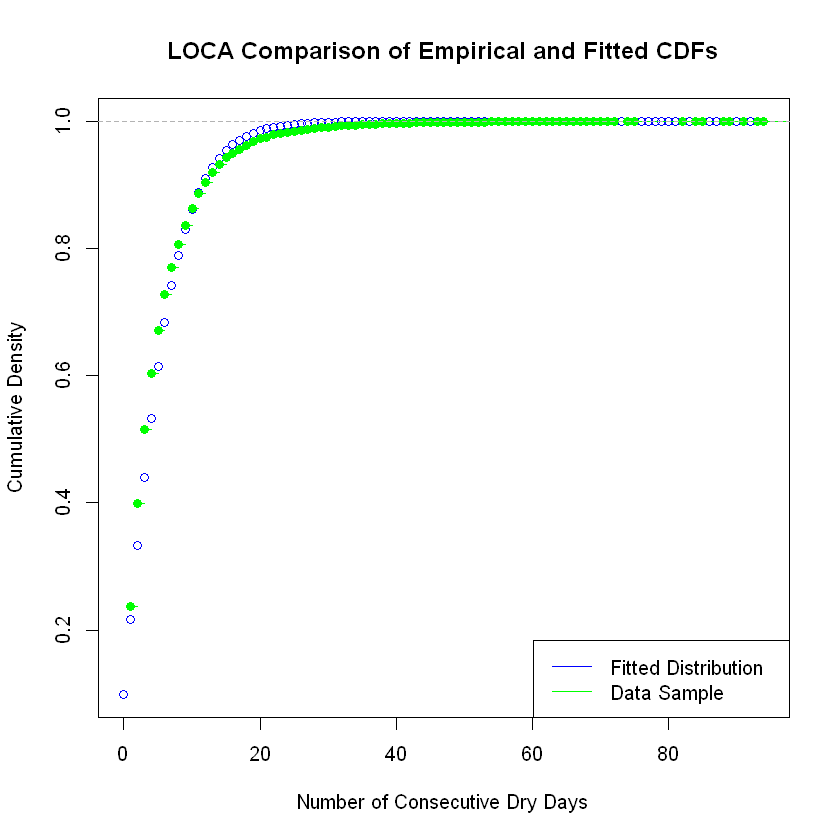

In [416]:
x <- seq(0,dLOSepMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dSep_mu, size=LOfdNB_dSep_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOSep$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

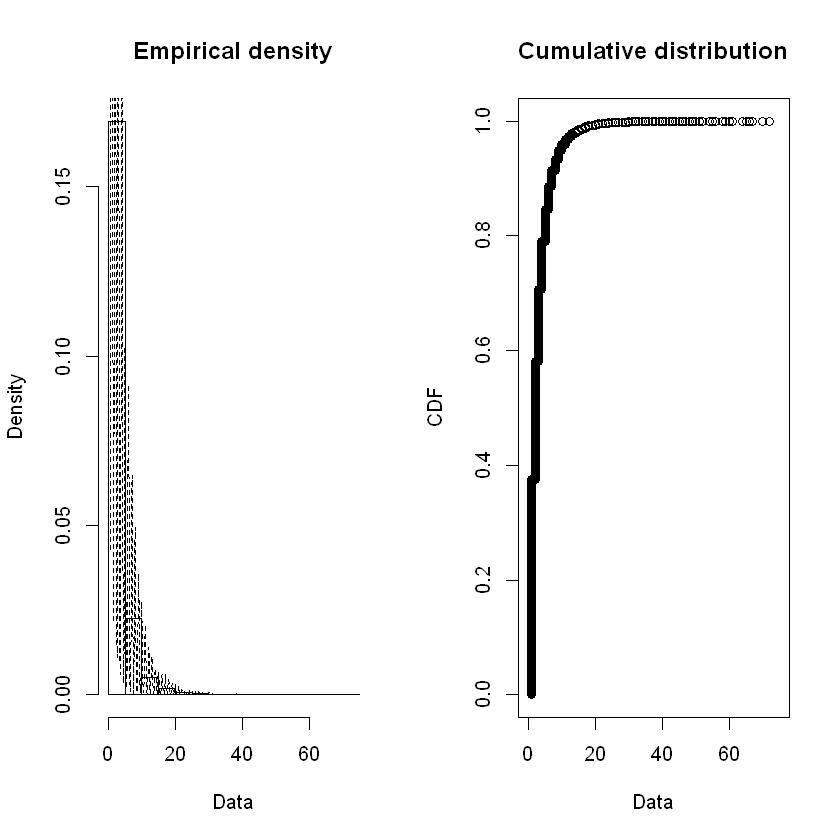

In [417]:
plotdist( dBCSep$Dry_Count, histo=TRUE, demp=TRUE )

In [418]:
BCfd_NB_dSep <- fitdist( dBCSep$Dry_Count, "nbinom" )
BCfd_GE_dSep <- fitdist( dBCSep$Dry_Count, "geom" )

In [419]:
summary( BCfd_NB_dSep )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 2.291070 0.005640962
mu   3.242139 0.003096324
Loglikelihood:  -1826884   AIC:  3653772   BIC:  3653795 
Correlation matrix:
              size            mu
size  1.000000e+00 -4.451284e-05
mu   -4.451284e-05  1.000000e+00


In [420]:
BCfdNB_dSep_size <- BCfd_NB_dSep$estimate[["size"]]
BCfdNB_dSep_mu <- BCfd_NB_dSep$estimate[["mu"]]
cat("BCCA Sep size: ", BCfdNB_dSep_size, "\n", "BCCA Sep mu: ", BCfdNB_dSep_mu, "\n")

BCCA Sep size:  2.29107 
 BCCA Sep mu:  3.242139 


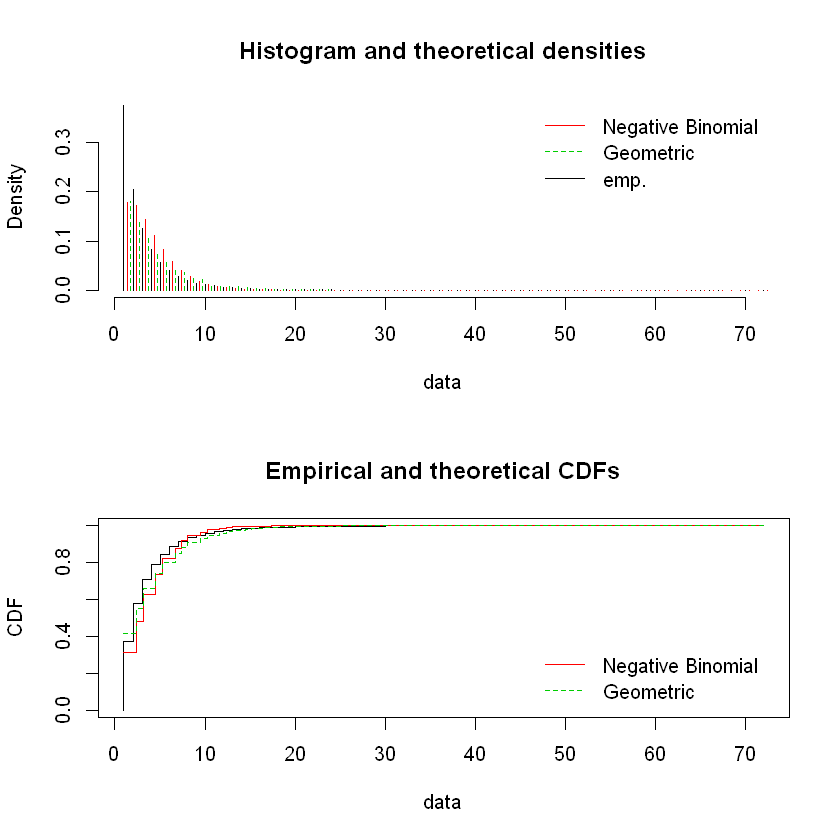

In [421]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dSep, BCfd_GE_dSep), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dSep, BCfd_GE_dSep), legendtext=plot.legend )

In [422]:
BCstatRes <- gofstat( list(BCfd_NB_dSep, BCfd_GE_dSep), fitnames=c("Negative Binomial", "Geometric") )

In [423]:
print(BCstatRes)

Chi-squared statistic:  662291.2 47566.81 
Degree of freedom of the Chi-squared distribution:  17 18 
Chi-squared p-value:  0 0 
   the p-value may be wrong with some theoretical counts < 5  
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     306528           2.537614e+05    339692.7334
<= 2     167879           1.402209e+05    112463.0816
<= 3     102546           1.175200e+05     85951.5463
<= 4      68260           9.108562e+04     65689.7198
<= 5      46401           6.715199e+04     50204.3241
<= 6      32744           4.781383e+04     38369.3851
<= 7      22065           3.318338e+04     29324.3608
<= 8      16374           2.258140e+04     22411.5694
<= 9      11900           1.512946e+04     17128.3680
<= 10      9205           1.000952e+04     13090.6044
<= 11      7020           6.553371e+03     10004.6849
<= 12      4852           4.253026e+03      7646.2260
<= 13      3969           2.739517e+03      5843.7395
<= 14      2814           1.75322

In [424]:
BCfdNB_dSep_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [425]:
BCfdNB_dSep_p = BCfdNB_dSep_size / (BCfdNB_dSep_size + BCfdNB_dSep_mu)
cat("BCCA prob: ", BCfdNB_dSep_p)

BCCA prob:  0.4140581

In [426]:
# add to our tracking dataframe
BCMonDistDF[9, ] <- list( 9, dBCSepMean, dBCSepBNr, BCfdNB_dSep_p, BCfdNB_dSep_mu, BCfdNB_dSep_size,
                          BCfdNB_dSep_pvalue )

In [427]:
BCgf_dSep <- goodfit( dBCSep$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dSep_size, prob=BCfdNB_dSep_p) )

In [428]:
summary( BCgf_dSep )


	 Goodness-of-fit test for nbinomial distribution

                          X^2 df P(> X^2)
Pearson          2.479558e+10 72        0
Likelihood Ratio 4.273607e+05 64        0


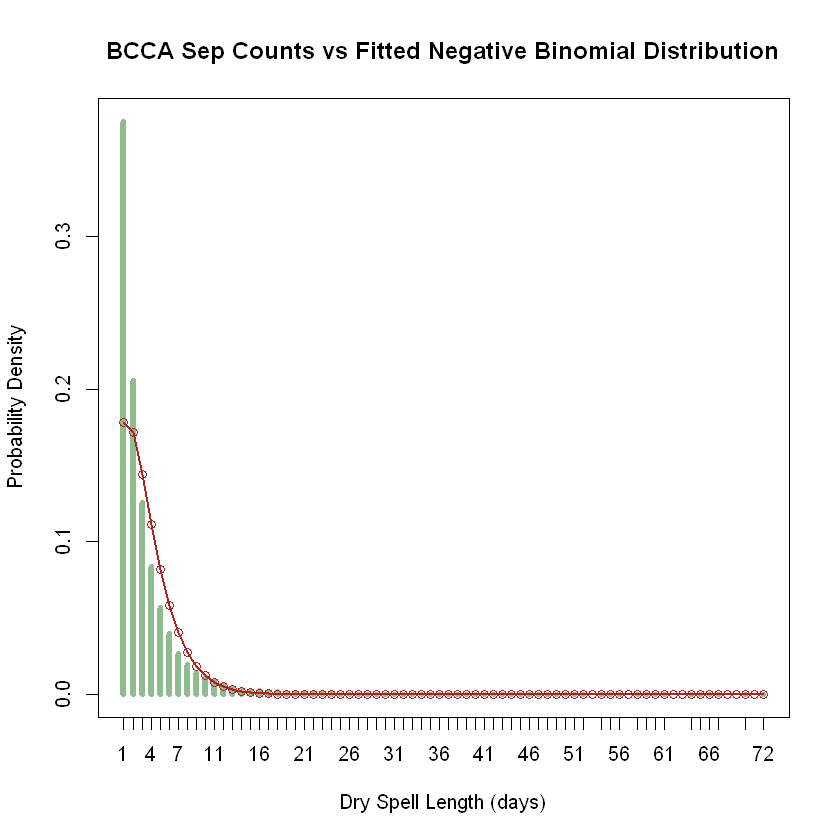

In [429]:
maxP <- max(dBCSep$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dSep_size, mu=BCfdNB_dSep_mu )
ttab <- table( dBCSep$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Sep Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

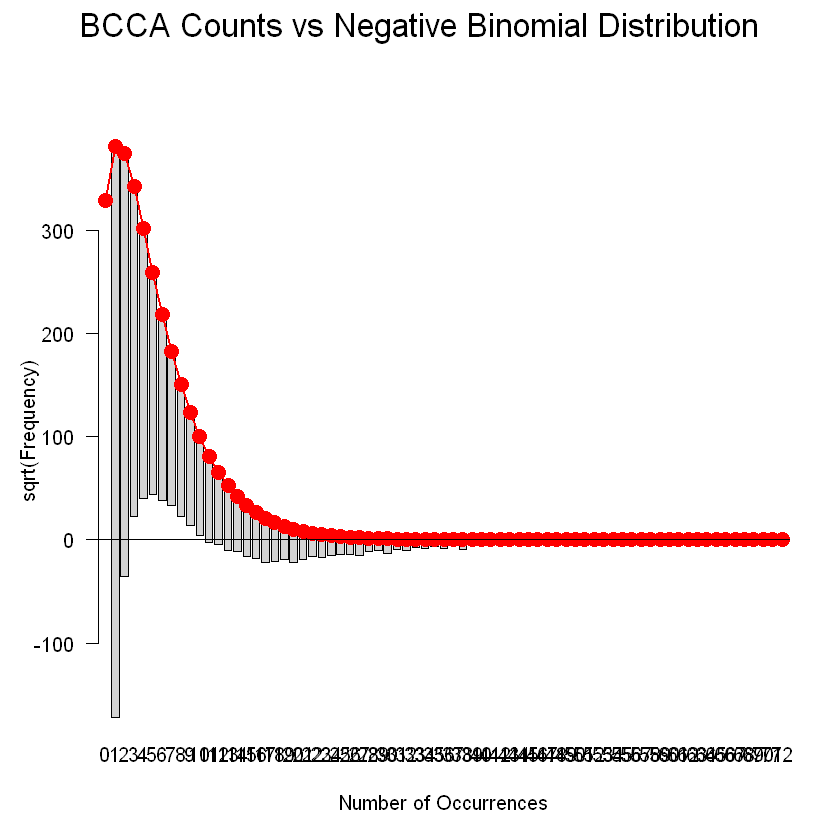

In [430]:
plot( BCgf_dSep, main="BCCA Counts vs Negative Binomial Distribution" )

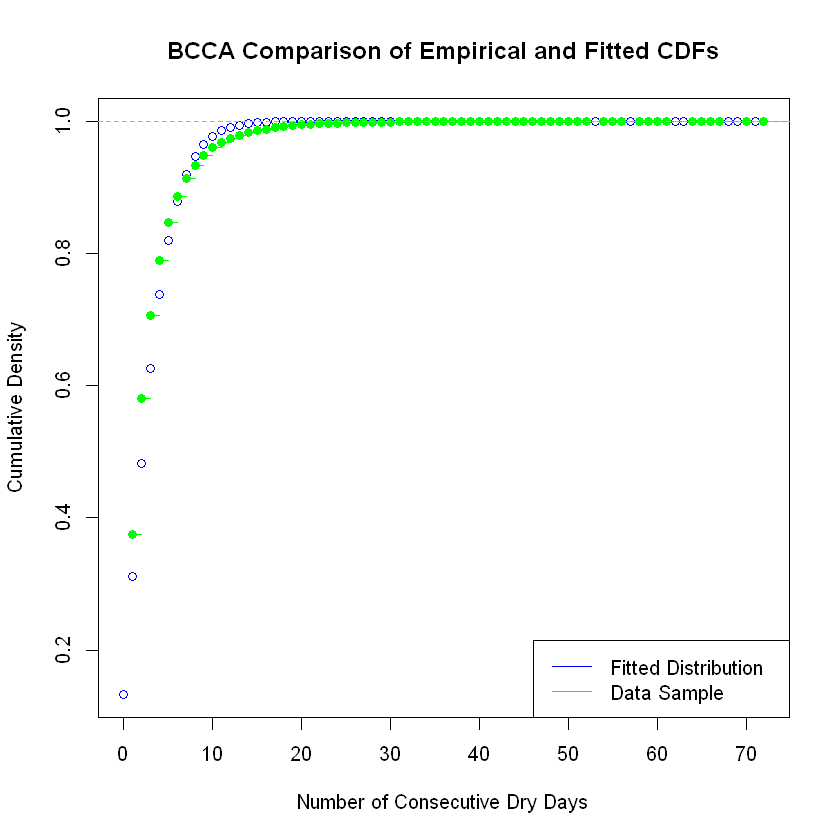

In [431]:
x <- seq(0,dBCSepMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dSep_mu, size=BCfdNB_dSep_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCSep$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

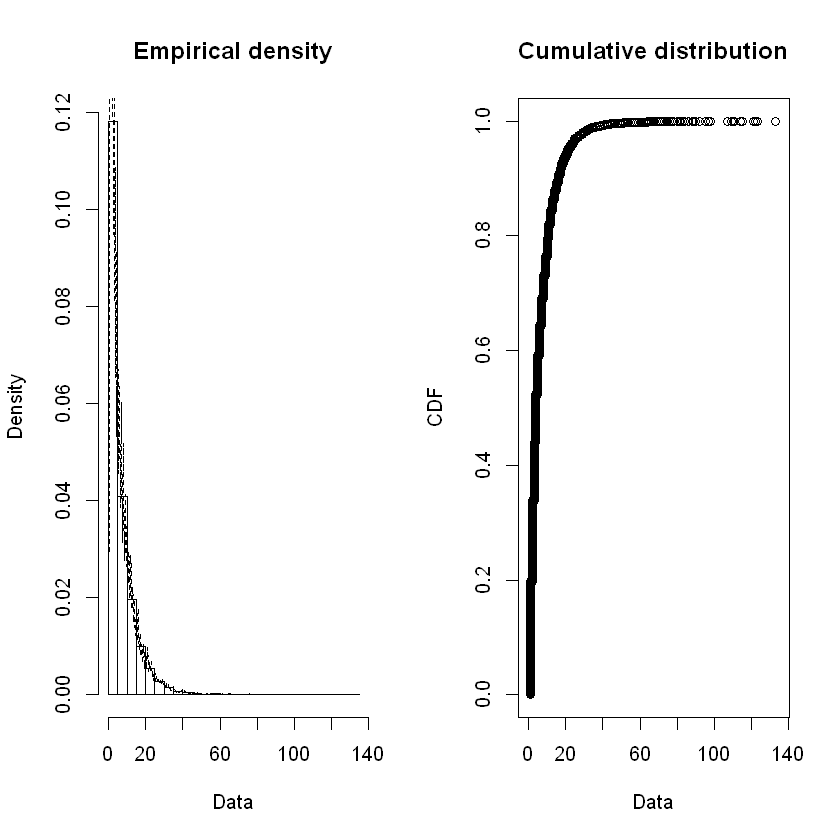

In [432]:
plotdist( dLOOct$Dry_Count, histo=TRUE, demp=TRUE )

In [433]:
LOfd_NB_dOct <- fitdist( dLOOct$Dry_Count, "nbinom" )
LOfd_GE_dOct <- fitdist( dLOOct$Dry_Count, "geom" )

In [434]:
LOfdNB_dOct_size <- LOfd_NB_dOct$estimate[["size"]]
LOfdNB_dOct_mu <- LOfd_NB_dOct$estimate[["mu"]]
cat("LOCA Oct size: ", LOfdNB_dOct_size, "\n", "LOCA Oct mu: ", LOfdNB_dOct_mu, "\n")

LOCA Oct size:  1.346602 
 LOCA Oct mu:  6.842167 


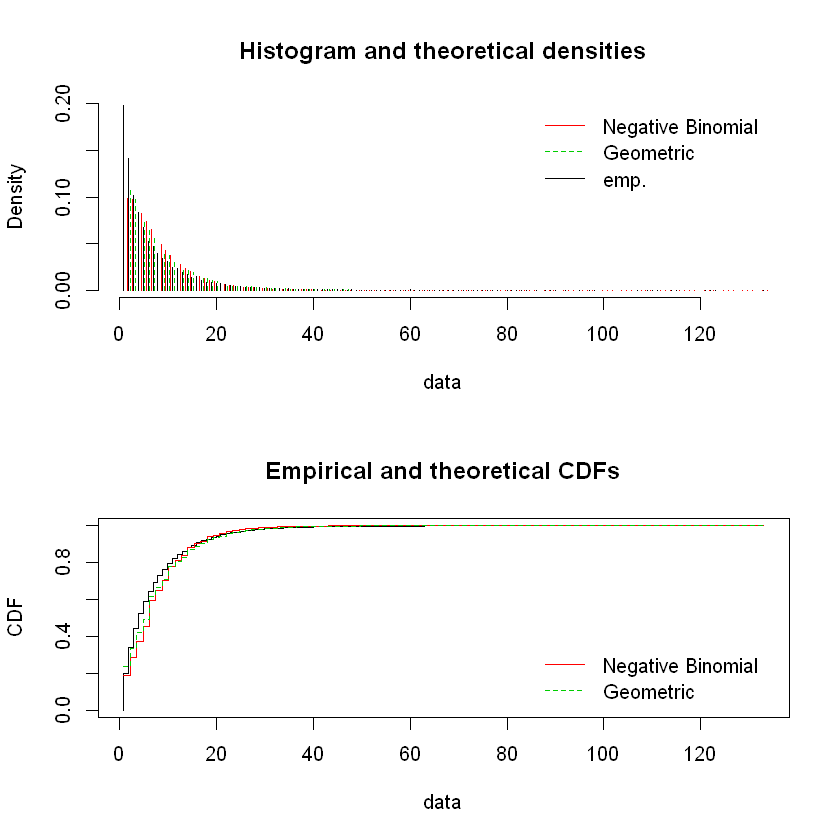

In [435]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dOct, LOfd_GE_dOct), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dOct, LOfd_GE_dOct), legendtext=plot.legend )

In [436]:
LOstatRes <- gofstat( list(LOfd_NB_dOct, LOfd_GE_dOct), fitnames=c("Negative Binomial", "Geometric") )

In [437]:
print( LOstatRes )

Chi-squared statistic:  86626.05 45553.1 
Degree of freedom of the Chi-squared distribution:  33 34 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     221458            209077.5765    267090.5551
<= 2     158009            108521.1992    108578.2653
<= 3     113292            101151.5253     94731.0276
<= 4      93542             91841.1606     82649.7602
<= 5      74847             82057.8738     72109.2448
<= 6      58908             72524.5961     62912.9858
<= 7      52374             63598.7878     54889.5470
<= 8      44527             55442.6018     47889.3559
<= 9      38305             48109.3944     41781.9154
<= 10     34740             41591.3178     36453.3710
<= 11     27845             35846.8390     31804.3881
<= 12     26409             30817.1247     27748.3008
<= 13     21083             26435.9256     24209.4957
<= 14     18873             22635.5257     21122.0027
<= 15     15011             19350.2511     

In [438]:
LOfdNB_dOct_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [439]:
LOfdNB_dOct_p = LOfdNB_dOct_size / (LOfdNB_dOct_size + LOfdNB_dOct_mu)
cat("LOCA prob: ", LOfdNB_dOct_p)

LOCA prob:  0.164445

In [440]:
# add to our tracking dataframe
LOMonDistDF[10, ] <- list( 10, dLOOctMean, dLOOctBNr, LOfdNB_dOct_p, LOfdNB_dOct_mu, LOfdNB_dOct_size,
                          LOfdNB_dOct_pvalue )

In [441]:
LOgf_dOct <- goodfit( dLOOct$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dOct_size, prob=LOfdNB_dOct_p) )

In [442]:
summary( LOgf_dOct )


	 Goodness-of-fit test for nbinomial distribution

                       X^2  df P(> X^2)
Pearson          8140185.9 133        0
Likelihood Ratio  345908.3 100        0


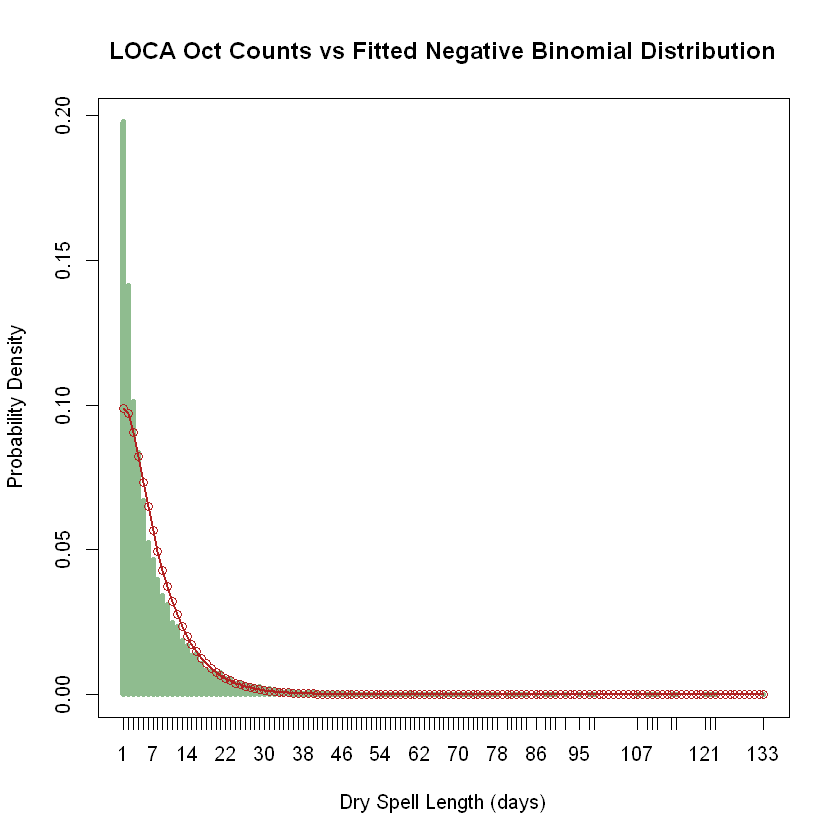

In [443]:
maxP <- max(dLOOct$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dOct_size, mu=LOfdNB_dOct_mu )
ttab <- table( dLOOct$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Oct Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

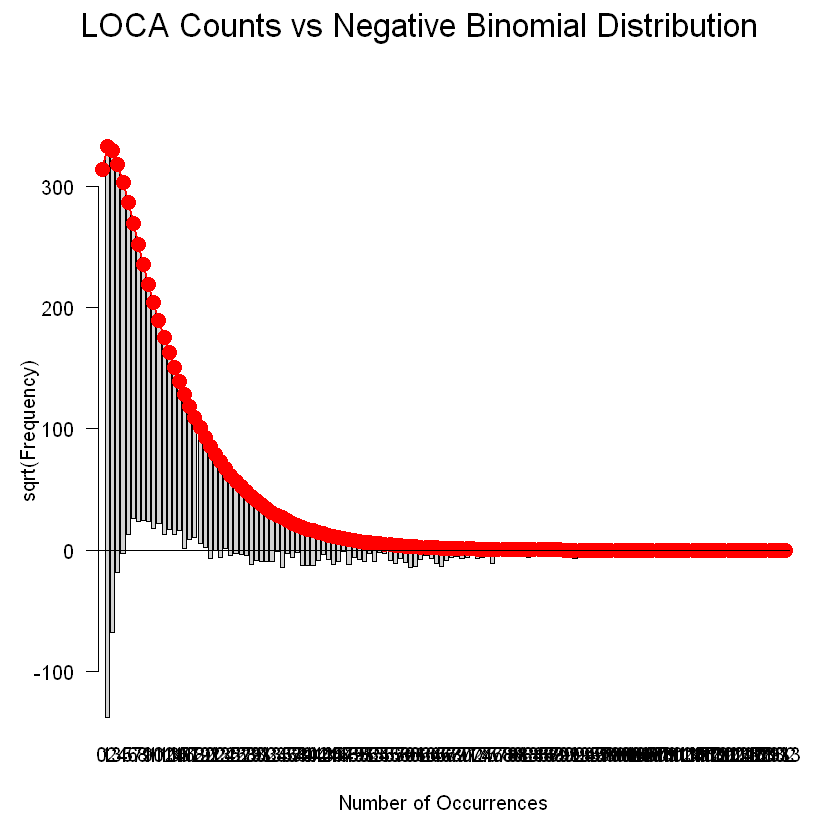

In [444]:
plot( LOgf_dOct, main="LOCA Counts vs Negative Binomial Distribution" )

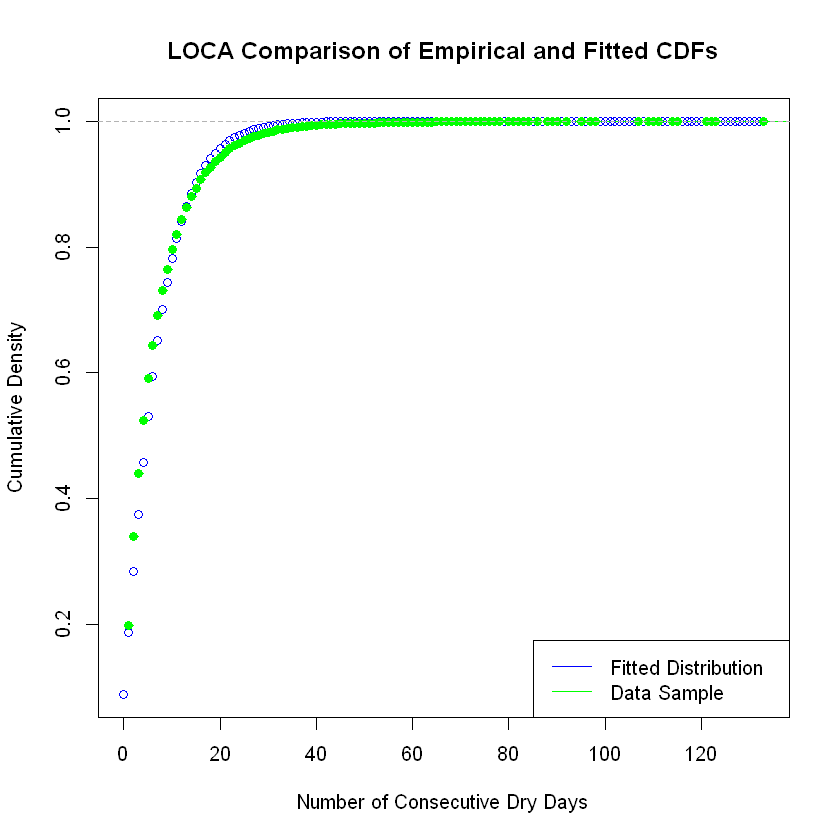

In [445]:
x <- seq(0,dLOOctMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dOct_mu, size=LOfdNB_dOct_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLOOct$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

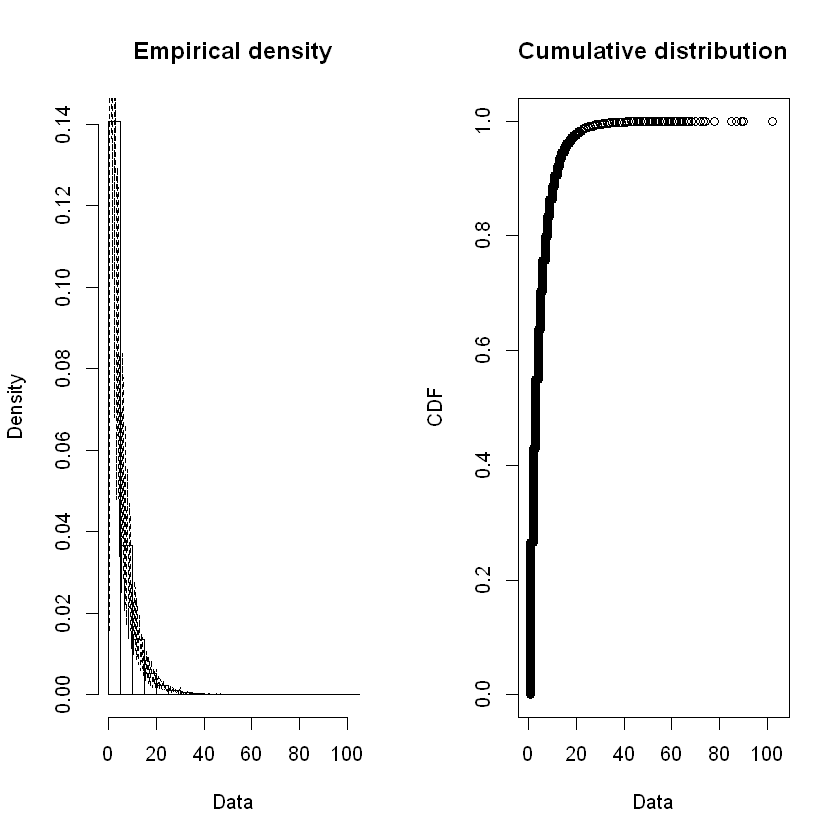

In [446]:
plotdist( dBCOct$Dry_Count, histo=TRUE, demp=TRUE )

In [447]:
BCfd_NB_dOct <- fitdist( dBCOct$Dry_Count, "nbinom" )
BCfd_GE_dOct <- fitdist( dBCOct$Dry_Count, "geom" )

In [448]:
summary( BCfd_NB_dOct )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.640987 0.003449448
mu   4.890388 0.005171030
Loglikelihood:  -1924844   AIC:  3849692   BIC:  3849715 
Correlation matrix:
              size            mu
size  1.000000e+00 -6.945294e-05
mu   -6.945294e-05  1.000000e+00


In [449]:
BCfdNB_dOct_size <- BCfd_NB_dOct$estimate[["size"]]
BCfdNB_dOct_mu <- BCfd_NB_dOct$estimate[["mu"]]
cat("BCCA Oct size: ", BCfdNB_dOct_size, "\n", "BCCA Oct mu: ", BCfdNB_dOct_mu, "\n")

BCCA Oct size:  1.640987 
 BCCA Oct mu:  4.890388 


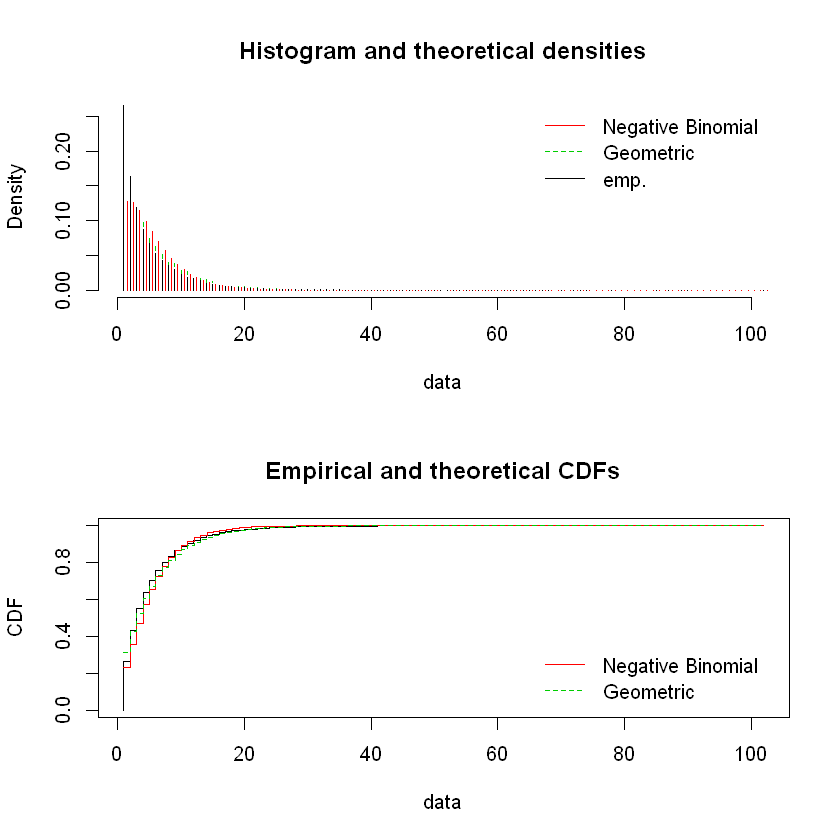

In [450]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dOct, BCfd_GE_dOct), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dOct, BCfd_GE_dOct), legendtext=plot.legend )

In [451]:
BCstatRes <- gofstat( list(BCfd_NB_dOct, BCfd_GE_dOct), fitnames=c("Negative Binomial", "Geometric") )

In [452]:
print(BCstatRes)

Chi-squared statistic:  59402.97 26372.47 
Degree of freedom of the Chi-squared distribution:  23 24 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     193229            168169.5931     226204.733
<= 2     119662             91667.5751      85190.091
<= 3      86768             83301.4019      70726.971
<= 4      63389             72367.1337      58719.322
<= 5      49211             61131.5167      48750.269
<= 6      38912             50662.3415      40473.708
<= 7      30717             41407.1547      33602.297
<= 8      25584             33487.8654      27897.478
<= 9      21555             26859.9480      23161.193
<= 10     16387             21400.5923      19229.009
<= 11     13672             16957.4923      15964.410
<= 12     11762             13375.1938      13254.058
<= 13      9756             10508.5124      11003.854
<= 14      7485              8228.5304       9135.678
<= 15      6495              6424.4195    

In [453]:
BCfdNB_dOct_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [454]:
BCfdNB_dOct_p = BCfdNB_dOct_size / (BCfdNB_dOct_size + BCfdNB_dOct_mu)
cat("BCCA prob: ", BCfdNB_dOct_p)

BCCA prob:  0.2512467

In [455]:
# add to our tracking dataframe
BCMonDistDF[10, ] <- list( 10, dBCOctMean, dBCOctBNr, BCfdNB_dOct_p, BCfdNB_dOct_mu, BCfdNB_dOct_size,
                          BCfdNB_dOct_pvalue )

In [456]:
BCgf_dOct <- goodfit( dBCOct$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dOct_size, prob=BCfdNB_dOct_p) )

In [457]:
summary( BCgf_dOct )


	 Goodness-of-fit test for nbinomial distribution

                        X^2  df P(> X^2)
Pearson          30308134.1 102        0
Likelihood Ratio   274548.6  77        0


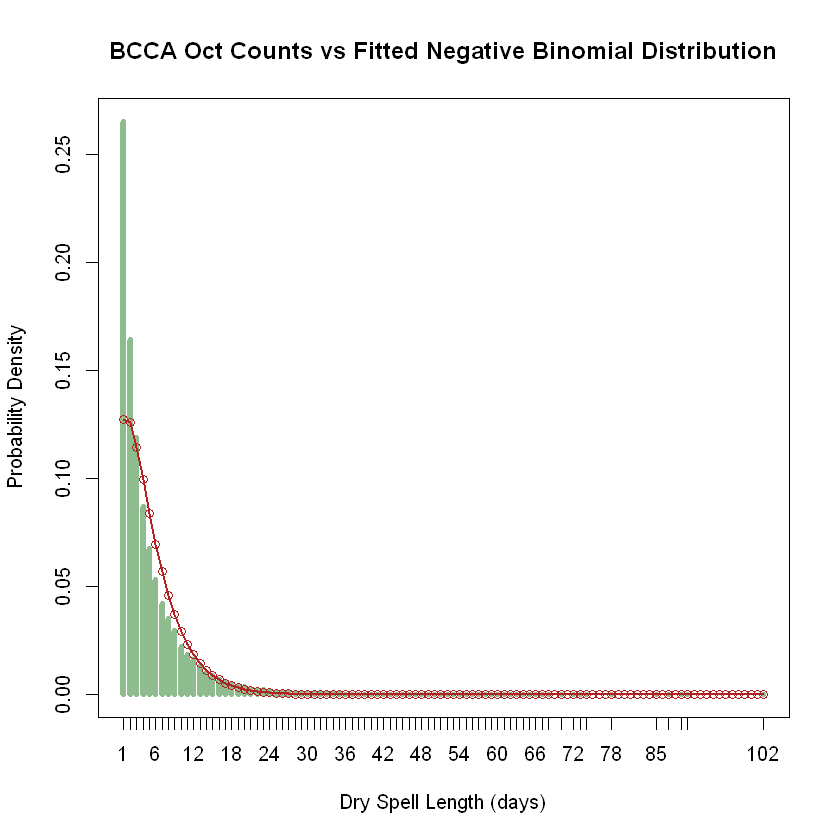

In [458]:
maxP <- max(dBCOct$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dOct_size, mu=BCfdNB_dOct_mu )
ttab <- table( dBCOct$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Oct Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

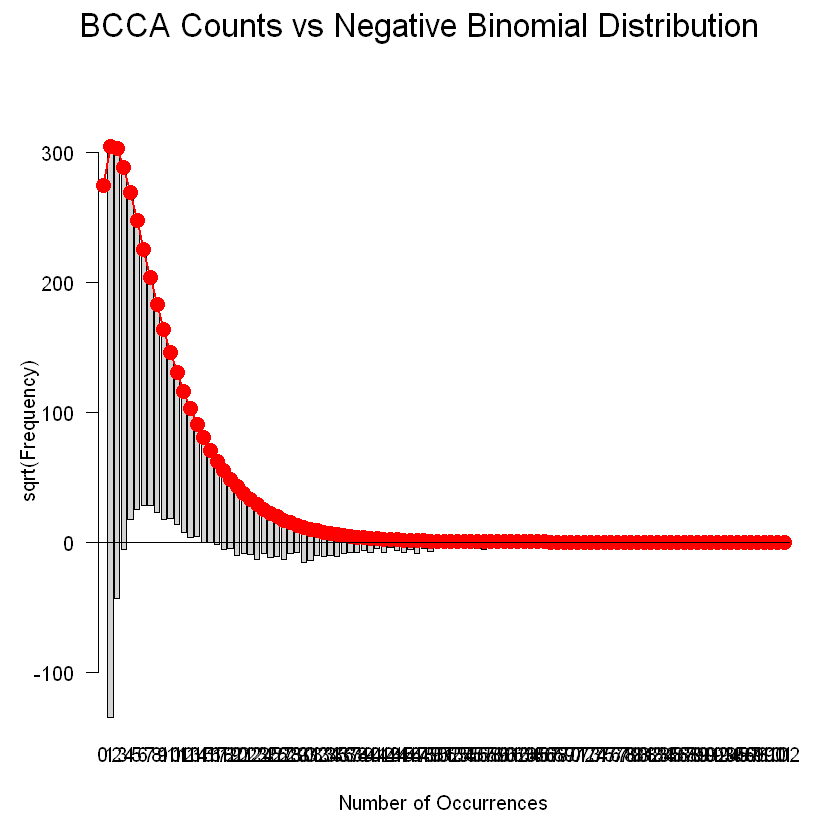

In [459]:
plot( BCgf_dOct, main="BCCA Counts vs Negative Binomial Distribution" )

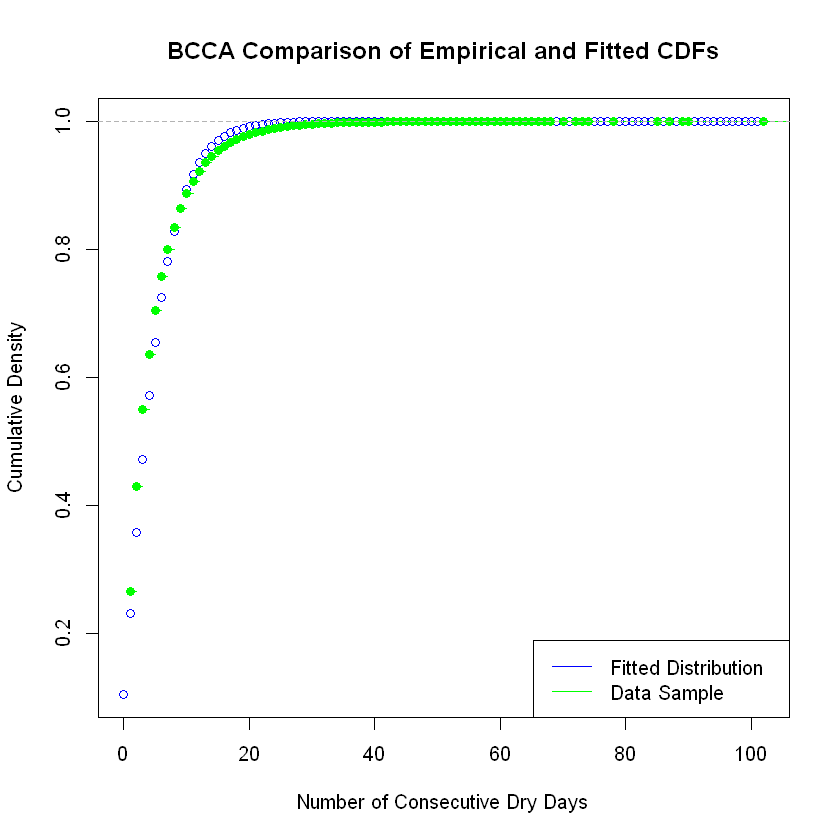

In [460]:
x <- seq(0,dBCOctMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dOct_mu, size=BCfdNB_dOct_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCOct$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

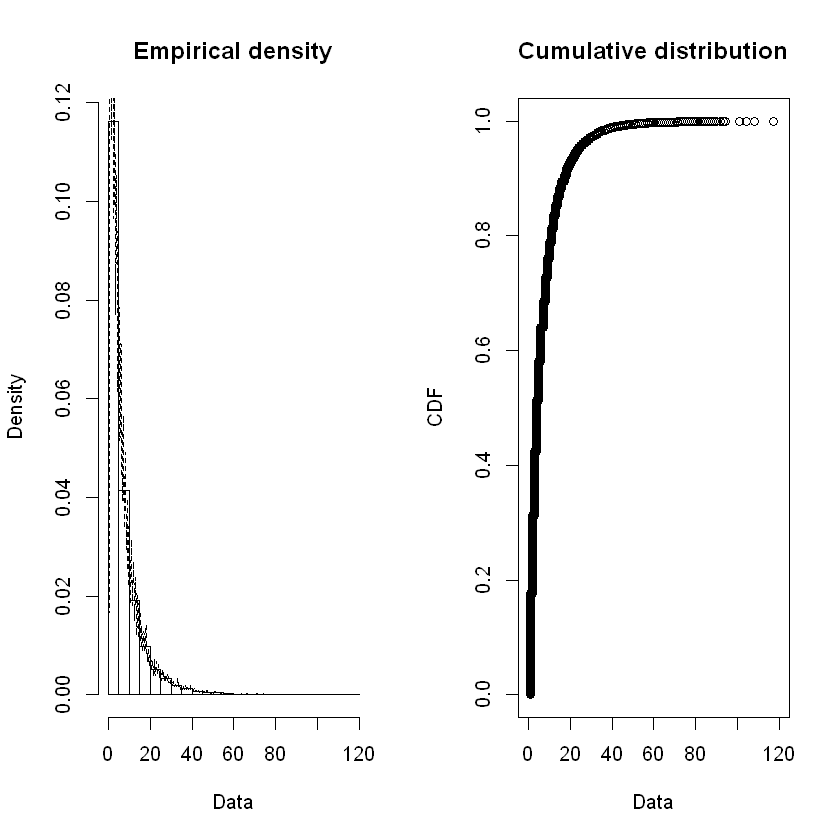

In [461]:
plotdist( dLONov$Dry_Count, histo=TRUE, demp=TRUE )

In [462]:
LOfd_NB_dNov <- fitdist( dLONov$Dry_Count, "nbinom" )
LOfd_GE_dNov <- fitdist( dLONov$Dry_Count, "geom" )

In [463]:
LOfdNB_dNov_size <- LOfd_NB_dNov$estimate[["size"]]
LOfdNB_dNov_mu <- LOfd_NB_dNov$estimate[["mu"]]
cat("LOCA Nov size: ", LOfdNB_dNov_size, "\n", "LOCA Nov mu: ", LOfdNB_dNov_mu, "\n")

LOCA Nov size:  1.295658 
 LOCA Nov mu:  7.278223 


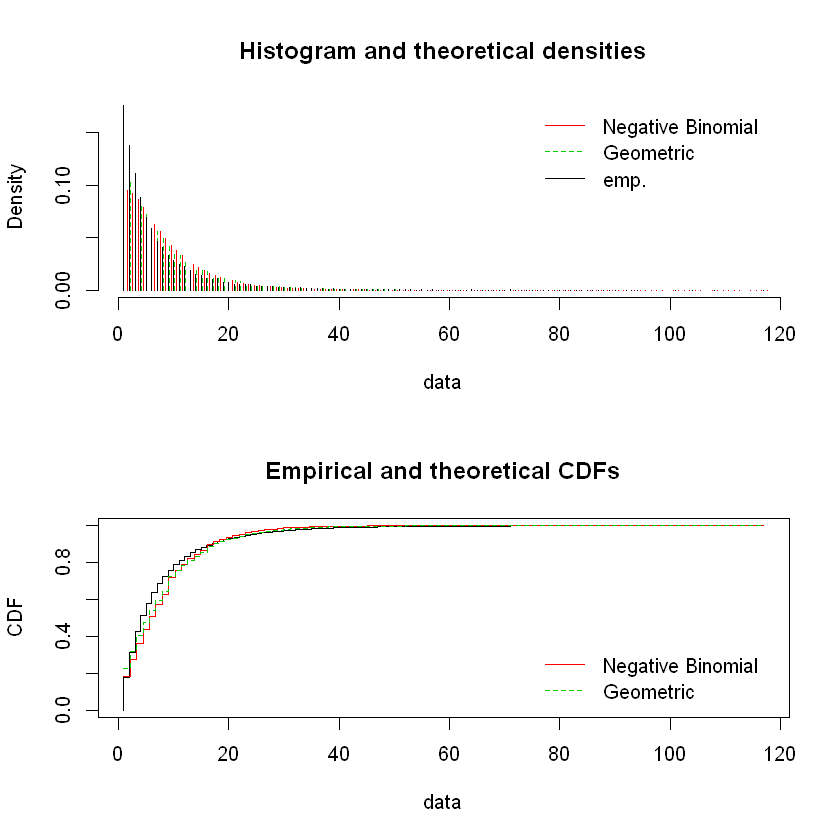

In [464]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dNov, LOfd_GE_dNov), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dNov, LOfd_GE_dNov), legendtext=plot.legend )

In [465]:
LOstatRes <- gofstat( list(LOfd_NB_dNov, LOfd_GE_dNov), fitnames=c("Negative Binomial", "Geometric") )

In [466]:
print( LOstatRes )

Chi-squared statistic:  158034.5 80354.56 
Degree of freedom of the Chi-squared distribution:  37 38 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     190458           196692.78294     245992.065
<= 2     148974           100383.22098     101189.134
<= 3     120665            93611.66048      88966.881
<= 4      95230            85339.00621      78220.907
<= 5      74645            76726.50652      68772.899
<= 6      63744            68341.29655      60466.080
<= 7      50160            60464.09388      53162.611
<= 8      44057            53223.85239      46741.300
<= 9      35954            46665.06077      41095.595
<= 10     30265            40784.37804      36131.813
<= 11     26673            35551.71796      31767.588
<= 12     24321            30922.81469      27930.501
<= 13     20325            26846.85375      24556.881
<= 14     16637            23271.12646      21590.748
<= 15     15273            20143.83734    

In [467]:
LOfdNB_dNov_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [468]:
LOfdNB_dNov_p = LOfdNB_dNov_size / (LOfdNB_dNov_size + LOfdNB_dNov_mu)
cat("LOCA prob: ", LOfdNB_dNov_p)

LOCA prob:  0.1511169

In [469]:
# add to our tracking dataframe
LOMonDistDF[11, ] <- list( 11, dLONovMean, dLONovBNr, LOfdNB_dNov_p, LOfdNB_dNov_mu, LOfdNB_dNov_size,
                          LOfdNB_dNov_pvalue )

In [470]:
LOgf_dNov <- goodfit( dLONov$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dNov_size, prob=LOfdNB_dNov_p) )

In [471]:
summary( LOgf_dNov )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          512557.9 117        0
Likelihood Ratio 330940.0  96        0


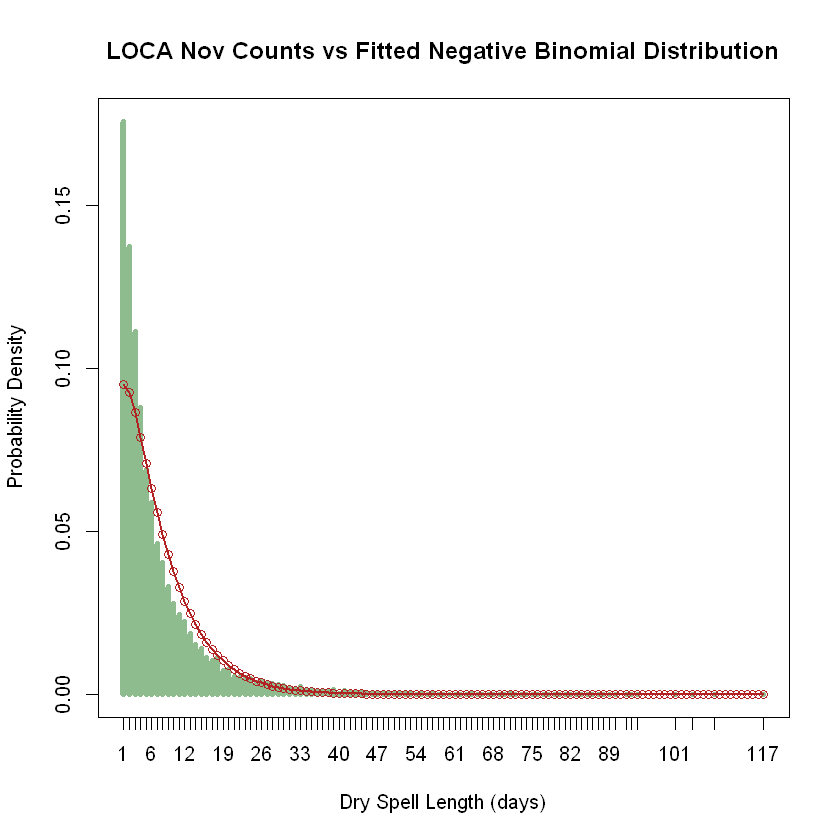

In [472]:
maxP <- max(dLONov$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dNov_size, mu=LOfdNB_dNov_mu )
ttab <- table( dLONov$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Nov Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

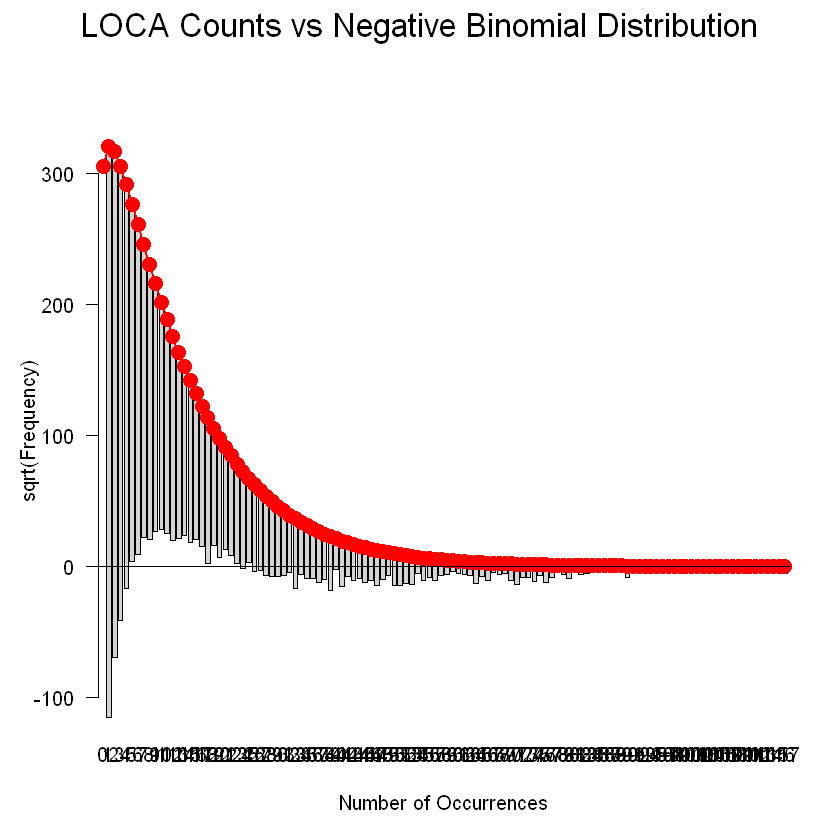

In [473]:
plot( LOgf_dNov, main="LOCA Counts vs Negative Binomial Distribution" )

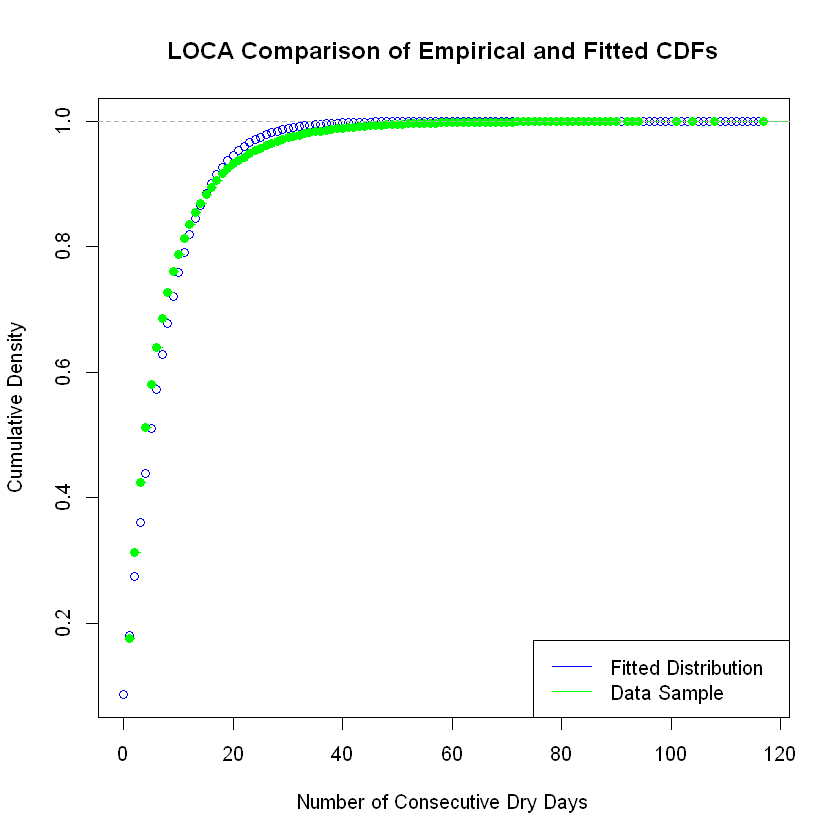

In [474]:
x <- seq(0,dLONovMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dNov_mu, size=LOfdNB_dNov_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLONov$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

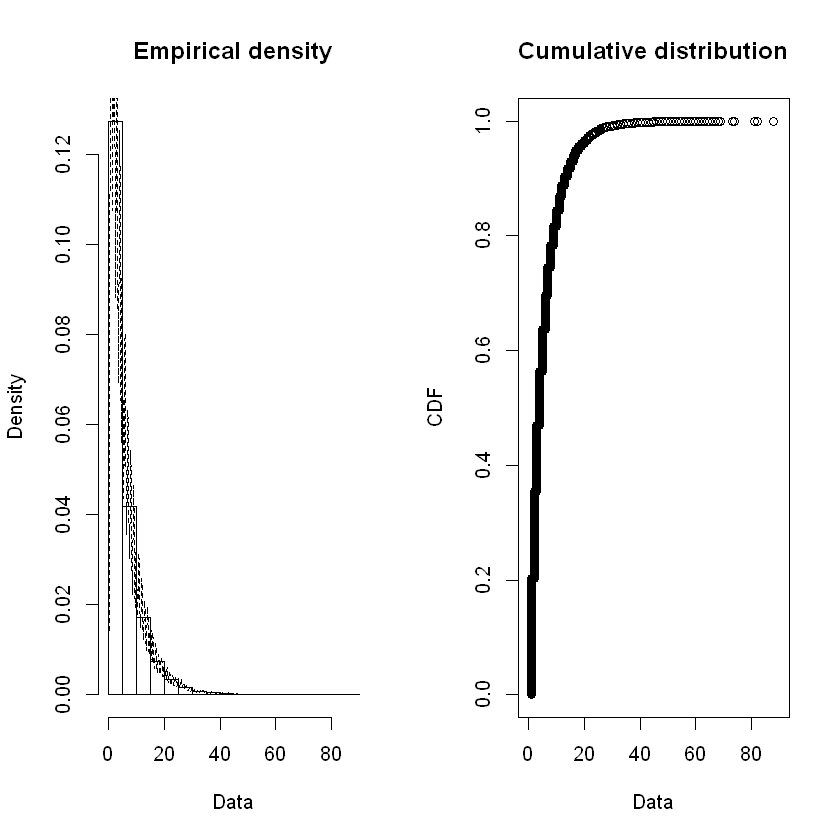

In [475]:
plotdist( dBCNov$Dry_Count, histo=TRUE, demp=TRUE )

In [476]:
BCfd_NB_dNov <- fitdist( dBCNov$Dry_Count, "nbinom" )
BCfd_GE_dNov <- fitdist( dBCNov$Dry_Count, "geom" )

In [477]:
summary( BCfd_NB_dNov )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.619699 0.003453879
mu   5.818482 0.006383357
Loglikelihood:  -1837749   AIC:  3675502   BIC:  3675525 
Correlation matrix:
             size           mu
size 1.0000000000 0.0002529027
mu   0.0002529027 1.0000000000


In [478]:
BCfdNB_dNov_size <- BCfd_NB_dNov$estimate[["size"]]
BCfdNB_dNov_mu <- BCfd_NB_dNov$estimate[["mu"]]
cat("BCCA Nov size: ", BCfdNB_dNov_size, "\n", "BCCA Nov mu: ", BCfdNB_dNov_mu, "\n")

BCCA Nov size:  1.619699 
 BCCA Nov mu:  5.818482 


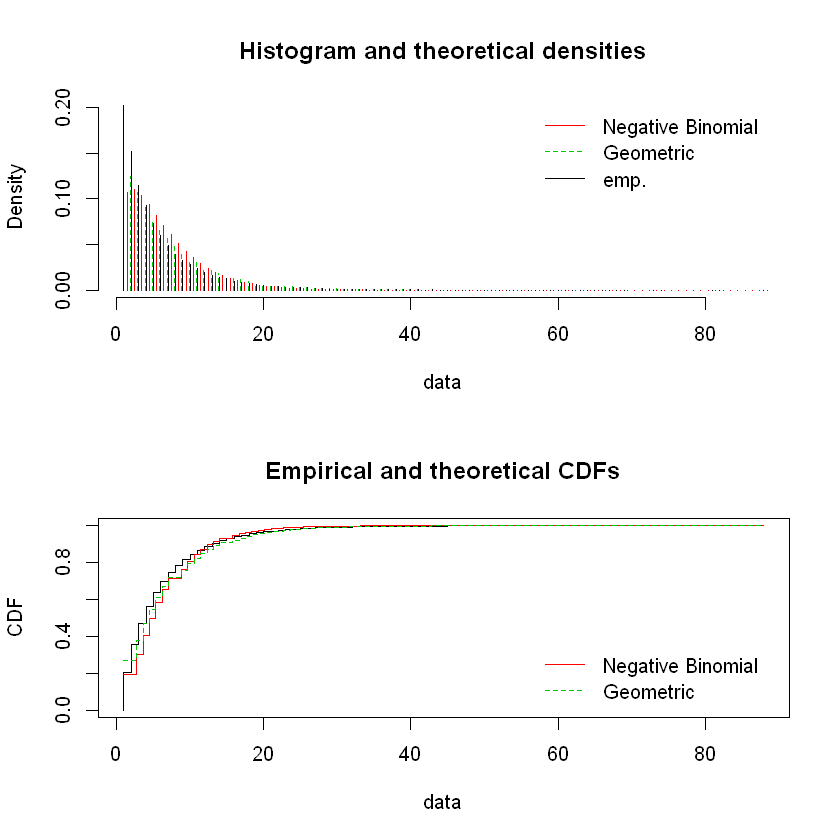

In [479]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dNov, BCfd_GE_dNov), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dNov, BCfd_GE_dNov), legendtext=plot.legend )

In [480]:
BCstatRes <- gofstat( list(BCfd_NB_dNov, BCfd_GE_dNov), fitnames=c("Negative Binomial", "Geometric") )

In [481]:
print(BCstatRes)

Chi-squared statistic:  41491.89 33446.66 
Degree of freedom of the Chi-squared distribution:  26 27 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     132480            125826.9851     178166.344
<= 2      99952             72054.8900      70005.301
<= 3      75519             68007.6229      59739.766
<= 4      61104             61440.4268      50979.563
<= 5      48128             54018.2138      43503.951
<= 6      38950             46619.7737      37124.558
<= 7      31770             39696.5614      31680.636
<= 8      25977             33457.8444      27035.007
<= 9      21523             27974.3424      23070.610
<= 10     18585             23238.8724      19687.550
<= 11     15372             19202.6073      16800.579
<= 12     12747             15796.8652      14336.953
<= 13     10400             12946.0723      12234.591
<= 14      9354             10575.2681      10440.518
<= 15      8268              8614.2158    

In [482]:
BCfdNB_dNov_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [483]:
BCfdNB_dNov_p = BCfdNB_dNov_size / (BCfdNB_dNov_size + BCfdNB_dNov_mu)
cat("BCCA prob: ", BCfdNB_dNov_p)

BCCA prob:  0.2177547

In [484]:
# add to our tracking dataframe
BCMonDistDF[11, ] <- list( 11, dBCNovMean, dBCNovBNr, BCfdNB_dNov_p, BCfdNB_dNov_mu, BCfdNB_dNov_size,
                          BCfdNB_dNov_pvalue )

In [485]:
BCgf_dNov <- goodfit( dBCNov$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dNov_size, prob=BCfdNB_dNov_p) )

In [486]:
summary( BCgf_dNov )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          170152.8 88        0
Likelihood Ratio 187063.9 73        0


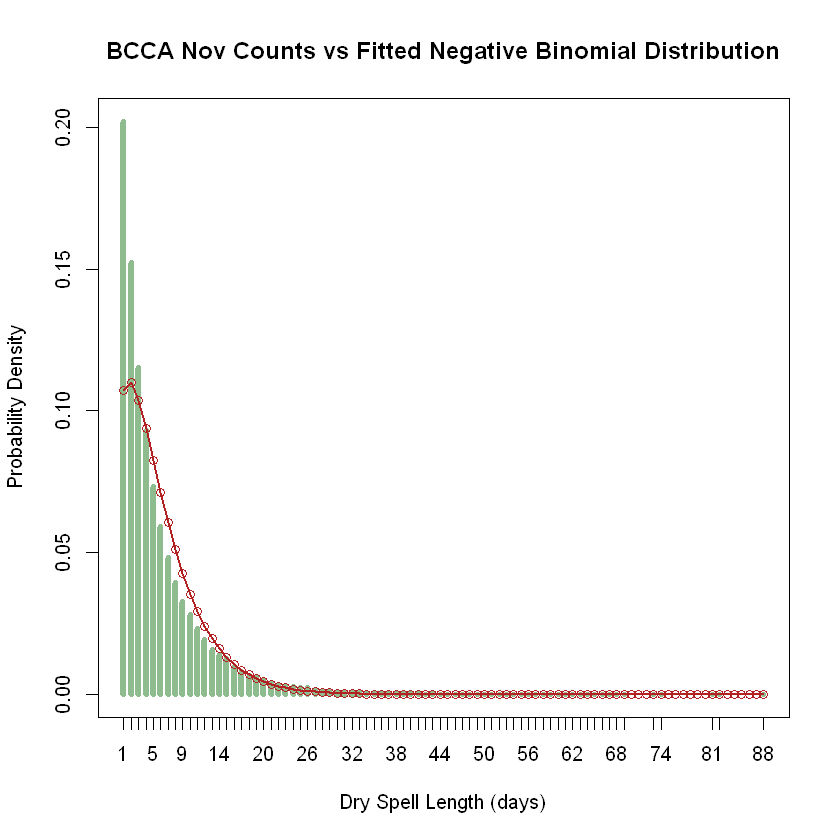

In [487]:
maxP <- max(dBCNov$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dNov_size, mu=BCfdNB_dNov_mu )
ttab <- table( dBCNov$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Nov Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

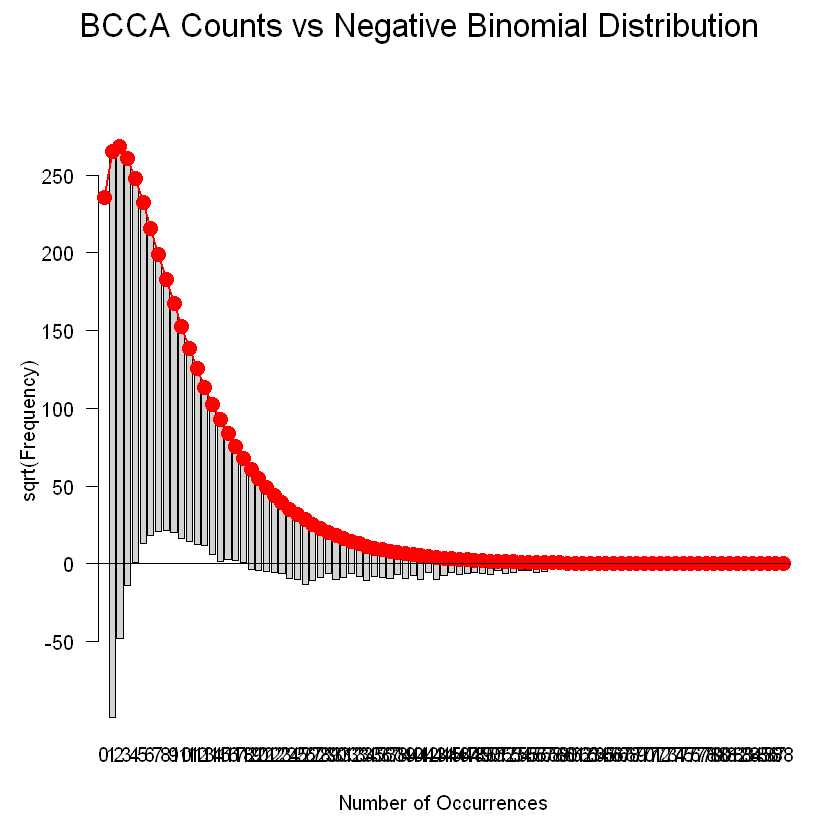

In [488]:
plot( BCgf_dNov, main="BCCA Counts vs Negative Binomial Distribution" )

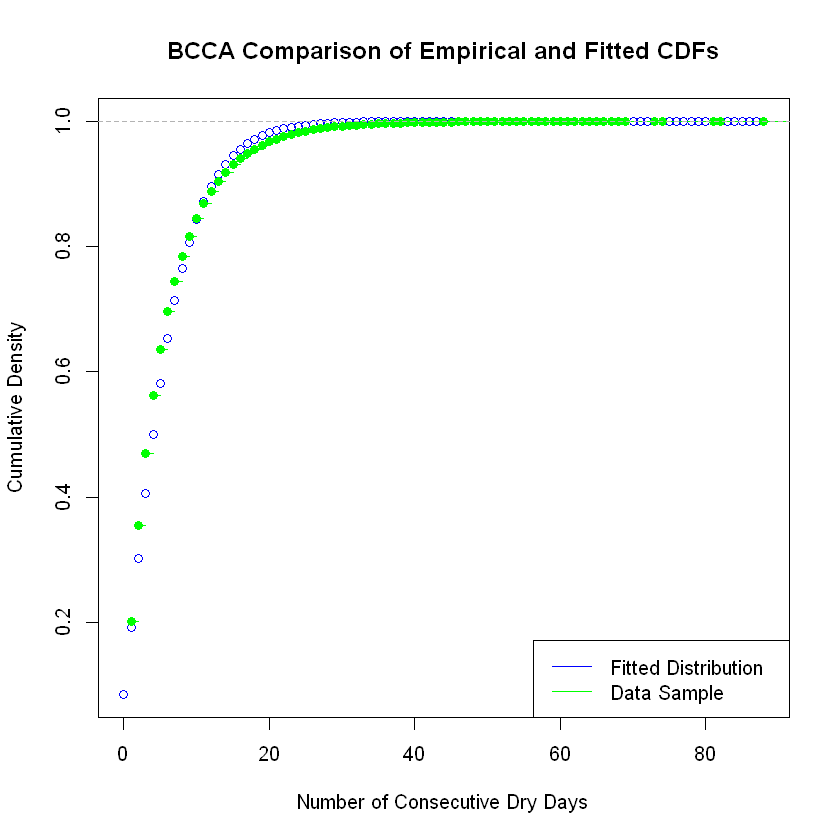

In [489]:
x <- seq(0,dBCNovMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dNov_mu, size=BCfdNB_dNov_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCNov$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

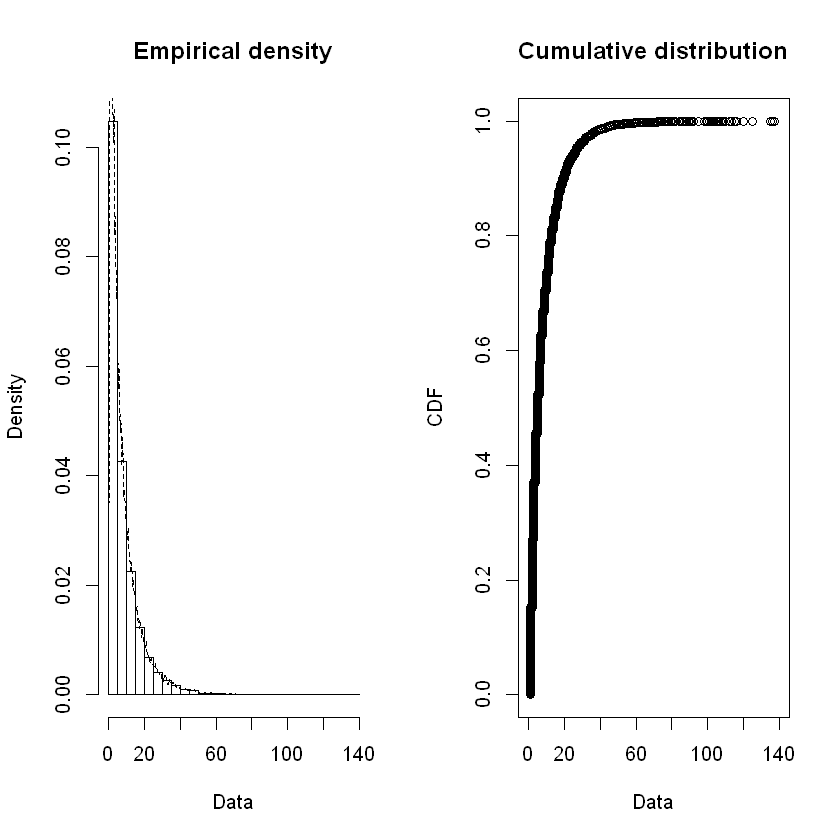

In [490]:
plotdist( dLODec$Dry_Count, histo=TRUE, demp=TRUE )

In [491]:
LOfd_NB_dDec <- fitdist( dLODec$Dry_Count, "nbinom" )
LOfd_GE_dDec <- fitdist( dLODec$Dry_Count, "geom" )

In [492]:
LOfdNB_dDec_size <- LOfd_NB_dDec$estimate[["size"]]
LOfdNB_dDec_mu <- LOfd_NB_dDec$estimate[["mu"]]
cat("LOCA Dec size: ", LOfdNB_dDec_size, "\n", "LOCA Dec mu: ", LOfdNB_dDec_mu, "\n")

LOCA Dec size:  1.290819 
 LOCA Dec mu:  8.34453 


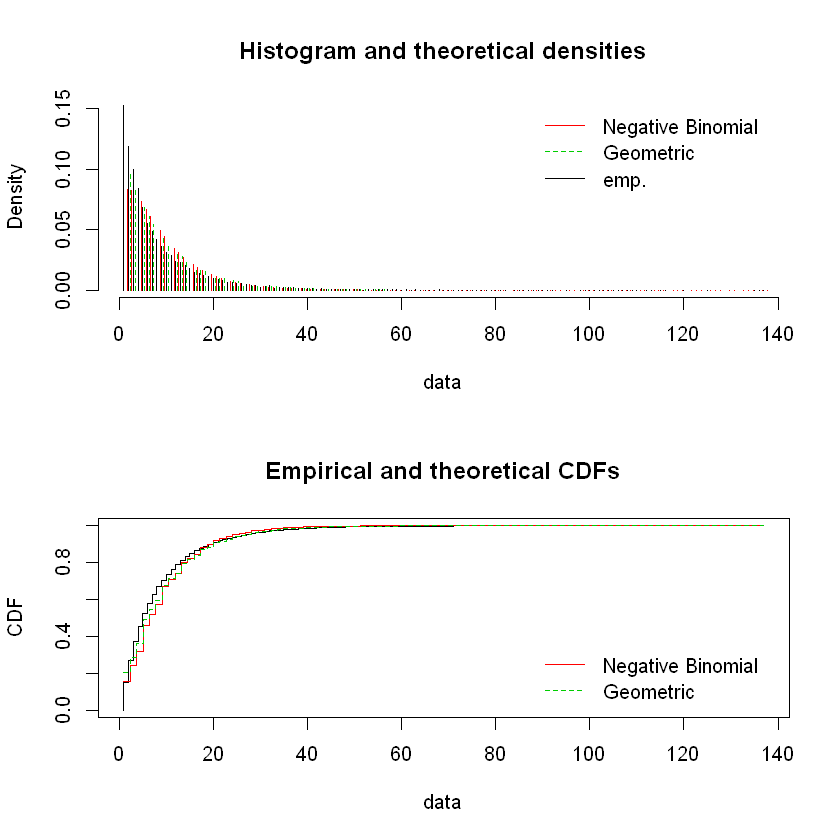

In [493]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(LOfd_NB_dDec, LOfd_GE_dDec), legendtext=plot.legend )
cdfcomp( list(LOfd_NB_dDec, LOfd_GE_dDec), legendtext=plot.legend )

In [494]:
LOstatRes <- gofstat( list(LOfd_NB_dDec, LOfd_GE_dDec), fitnames=c("Negative Binomial", "Geometric") )

In [495]:
print( LOstatRes )

Chi-squared statistic:  63303.78 45483.84 
Degree of freedom of the Chi-squared distribution:  38 39 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     151590            157191.8522     201383.246
<= 2     117964             82304.0486      84832.267
<= 3      98940             78187.6854      75753.552
<= 4      83788             72636.1777      67646.438
<= 5      68189             66564.1375      60406.943
<= 6      55178             60440.8658      53942.217
<= 7      47858             54518.4354      48169.342
<= 8      41610             48931.1319      43014.279
<= 9      36132             43745.2784      38410.908
<= 10     30802             38986.6176      34300.188
<= 11     28517             34656.3445      30629.396
<= 12     23468             30740.9132      27351.450
<= 13     22484             27218.2119      24424.309
<= 14     20074             24061.5228      21810.429
<= 15     17623             21242.0797    

In [496]:
LOfdNB_dDec_pvalue <- LOstatRes$chisqpvalue[["Negative Binomial"]]

In [497]:
LOfdNB_dDec_p = LOfdNB_dDec_size / (LOfdNB_dDec_size + LOfdNB_dDec_mu)
cat("LOCA prob: ", LOfdNB_dDec_p)

LOCA prob:  0.133967

In [498]:
# add to our tracking dataframe
LOMonDistDF[12, ] <- list( 12, dLODecMean, dLODecBNr, LOfdNB_dDec_p, LOfdNB_dDec_mu, LOfdNB_dDec_size,
                           LOfdNB_dDec_pvalue )

In [499]:
LOgf_dDec <- goodfit( dLODec$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=LOfdNB_dDec_size, prob=LOfdNB_dDec_p) )

In [500]:
summary( LOgf_dDec )


	 Goodness-of-fit test for nbinomial distribution

                      X^2  df P(> X^2)
Pearson          327460.3 137        0
Likelihood Ratio 248225.7 113        0


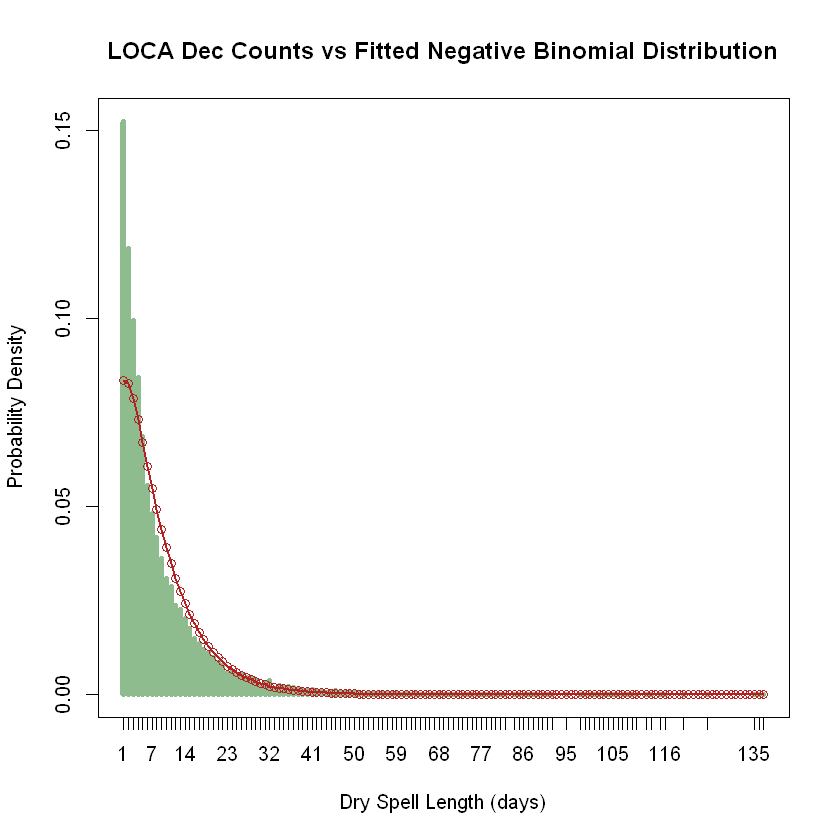

In [501]:
maxP <- max(dLODec$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=LOfdNB_dDec_size, mu=LOfdNB_dDec_mu )
ttab <- table( dLODec$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="LOCA Dec Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

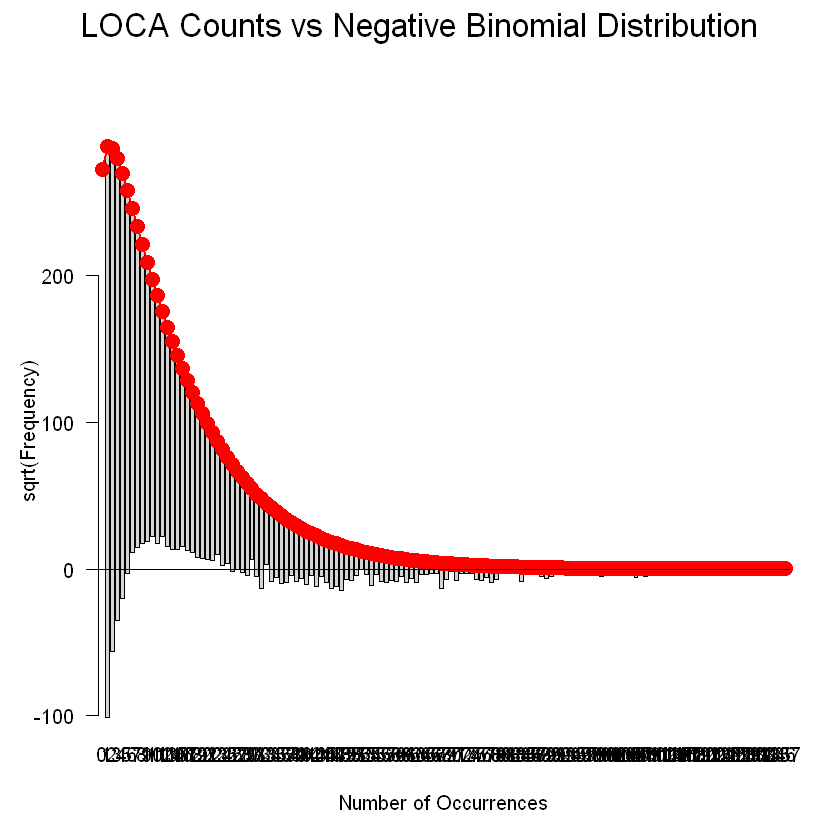

In [502]:
plot( LOgf_dDec, main="LOCA Counts vs Negative Binomial Distribution" )

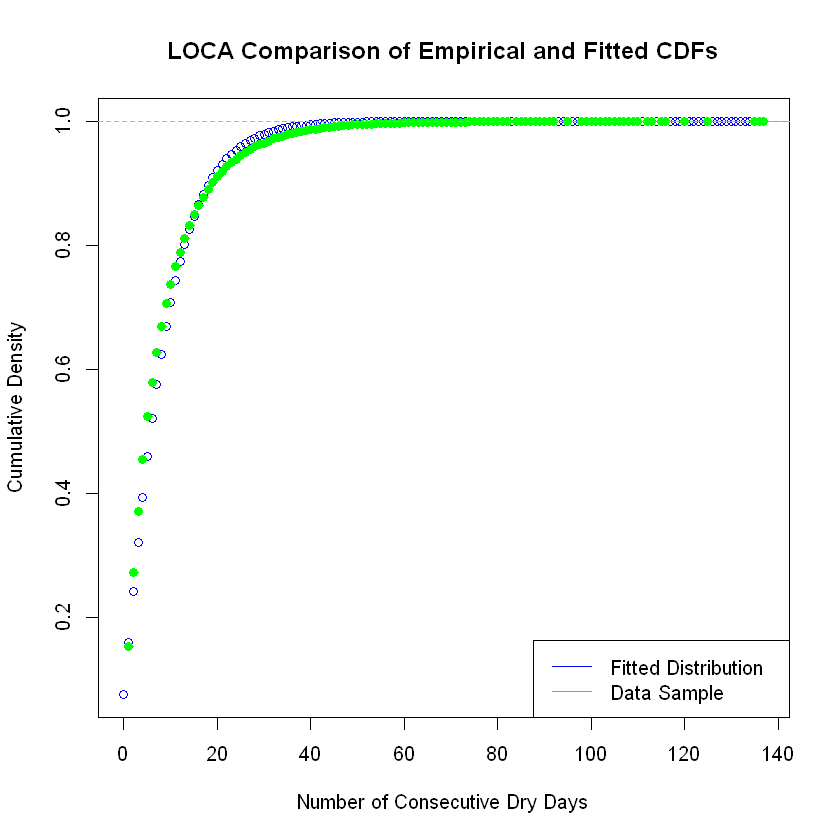

In [503]:
x <- seq(0,dLODecMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=LOfdNB_dDec_mu, size=LOfdNB_dDec_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="LOCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dLODec$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

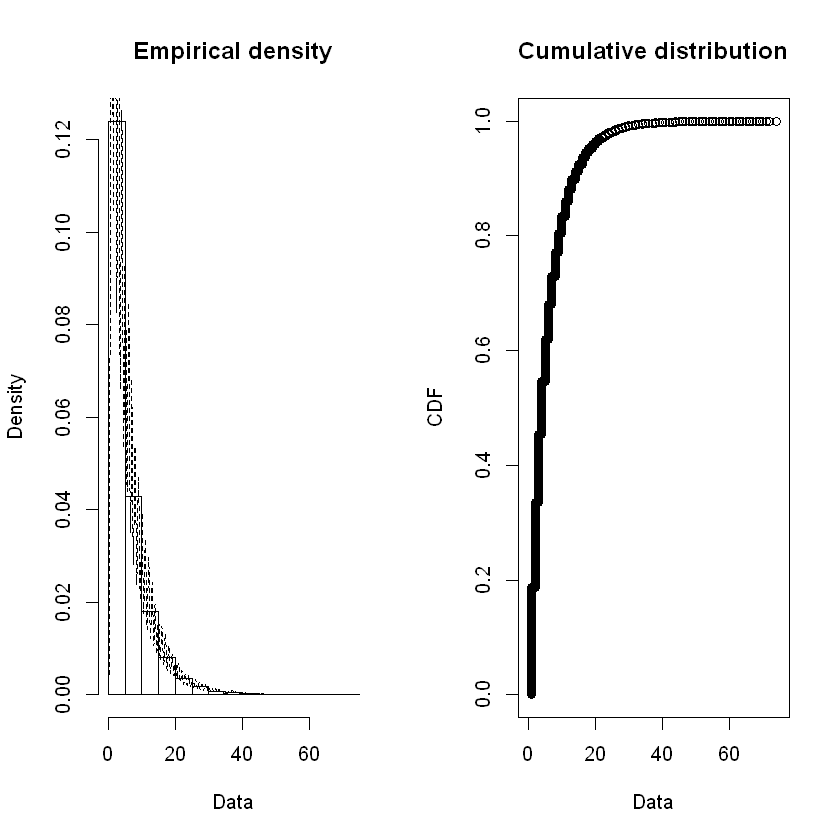

In [504]:
plotdist( dBCDec$Dry_Count, histo=TRUE, demp=TRUE )

In [505]:
BCfd_NB_dDec <- fitdist( dBCDec$Dry_Count, "nbinom" )
BCfd_GE_dDec <- fitdist( dBCDec$Dry_Count, "geom" )

In [506]:
summary( BCfd_NB_dDec )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate  Std. Error
size 1.646771 0.003536549
mu   6.022986 0.006599798
Loglikelihood:  -1823969   AIC:  3647942   BIC:  3647965 
Correlation matrix:
             size           mu
size 1.000000e+00 2.462388e-05
mu   2.462388e-05 1.000000e+00


In [507]:
BCfdNB_dDec_size <- BCfd_NB_dDec$estimate[["size"]]
BCfdNB_dDec_mu <- BCfd_NB_dDec$estimate[["mu"]]
cat("BCCA Dec size: ", BCfdNB_dDec_size, "\n", "BCCA Dec mu: ", BCfdNB_dDec_mu, "\n")

BCCA Dec size:  1.646771 
 BCCA Dec mu:  6.022986 


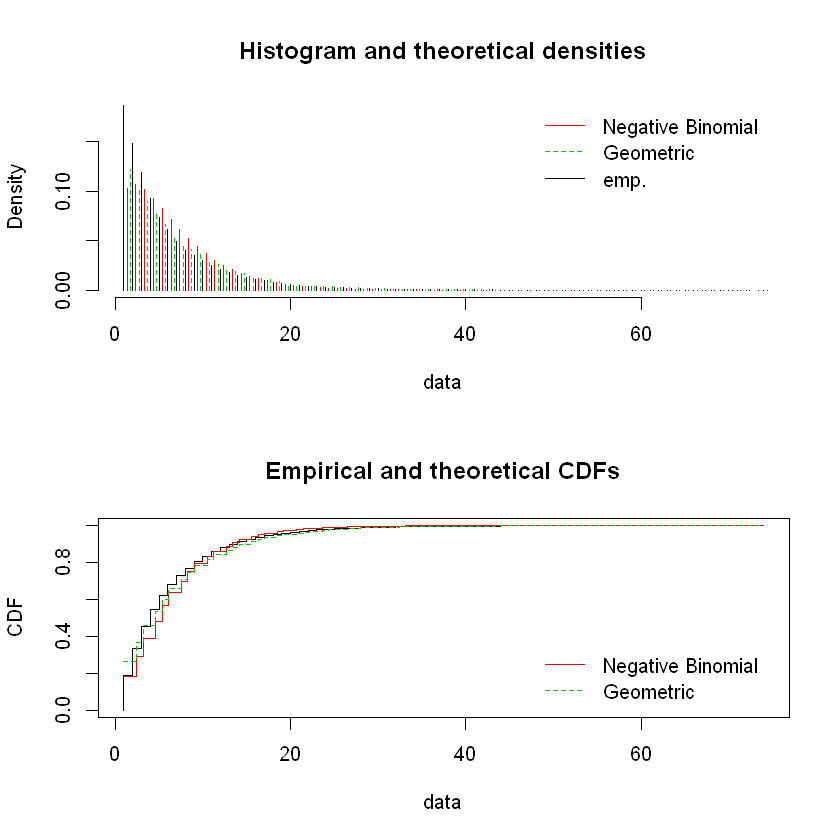

In [508]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(BCfd_NB_dDec, BCfd_GE_dDec), legendtext=plot.legend )
cdfcomp( list(BCfd_NB_dDec, BCfd_GE_dDec), legendtext=plot.legend )

In [509]:
BCstatRes <- gofstat( list(BCfd_NB_dDec, BCfd_GE_dDec), fitnames=c("Negative Binomial", "Geometric") )

In [510]:
print(BCstatRes)

Chi-squared statistic:  38203.85 37170.61 
Degree of freedom of the Chi-squared distribution:  27 28 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1     120084            117230.3115     170338.930
<= 2      95652             68703.5589      67443.623
<= 3      76710             65583.8173      57840.485
<= 4      59506             59829.8896      49604.715
<= 5      47363             53061.3886      42541.617
<= 6      39464             46160.2679      36484.216
<= 7      31473             39598.4889      31289.315
<= 8      25855             33610.3345      26834.103
<= 9      22295             28290.6253      23013.259
<= 10     19263             23653.2442      19736.455
<= 11     15989             19666.8055      16926.228
<= 12     13329             16276.5550      14516.142
<= 13     11410             13417.7378      12449.223
<= 14      9439             11023.5993      10676.608
<= 15      7966              9029.9874    

In [511]:
BCfdNB_dDec_pvalue <- BCstatRes$chisqpvalue[["Negative Binomial"]]

In [512]:
BCfdNB_dDec_p = BCfdNB_dDec_size / (BCfdNB_dDec_size + BCfdNB_dDec_mu)
cat("BCCA prob: ", BCfdNB_dDec_p)

BCCA prob:  0.2147096

In [513]:
# add to our tracking dataframe
BCMonDistDF[12, ] <- list( 12, dBCDecMean, dBCDecBNr, BCfdNB_dDec_p, BCfdNB_dDec_mu, BCfdNB_dDec_size,
                           BCfdNB_dDec_pvalue )

In [514]:
BCgf_dDec <- goodfit( dBCDec$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=BCfdNB_dDec_size, prob=BCfdNB_dDec_p) )

In [515]:
summary( BCgf_dDec )


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          146746.7 74        0
Likelihood Ratio 168614.3 72        0


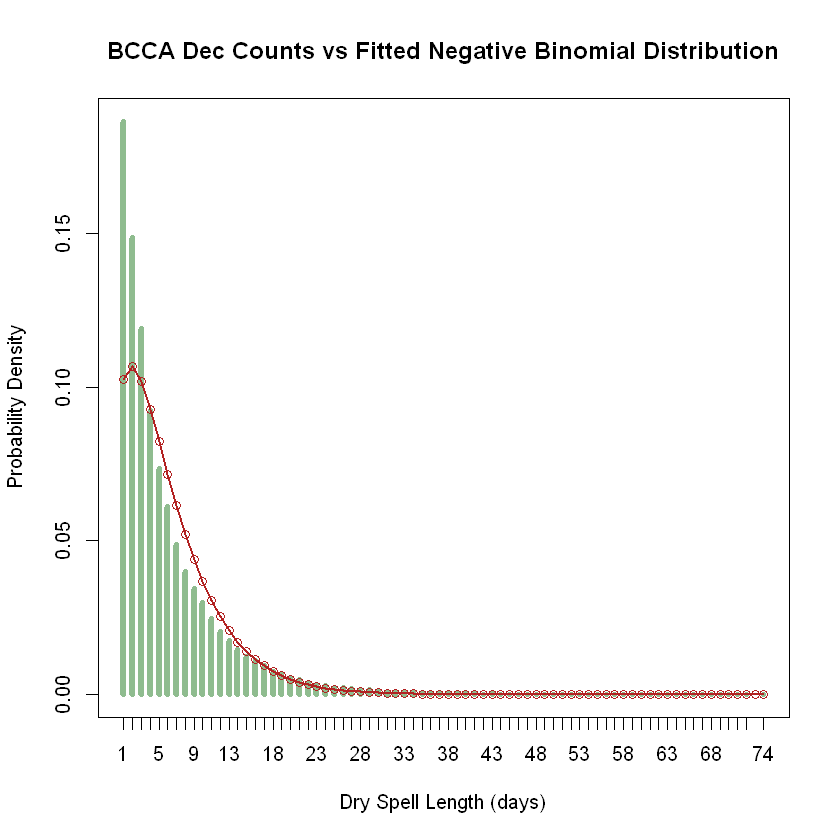

In [516]:
maxP <- max(dBCDec$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=BCfdNB_dDec_size, mu=BCfdNB_dDec_mu )
ttab <- table( dBCDec$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="BCCA Dec Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

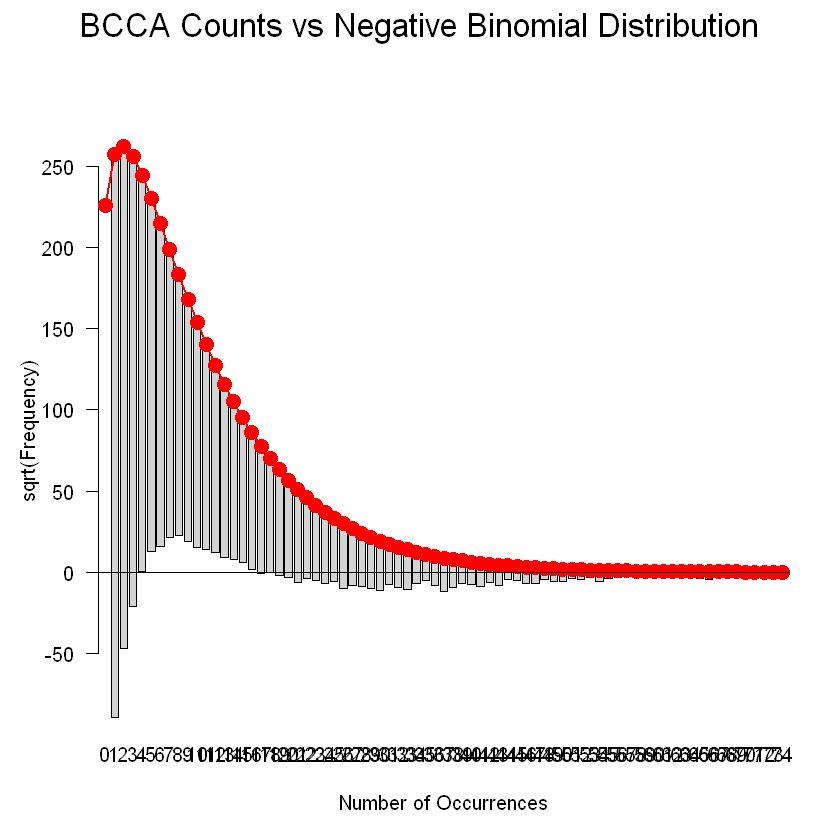

In [517]:
plot( BCgf_dDec, main="BCCA Counts vs Negative Binomial Distribution" )

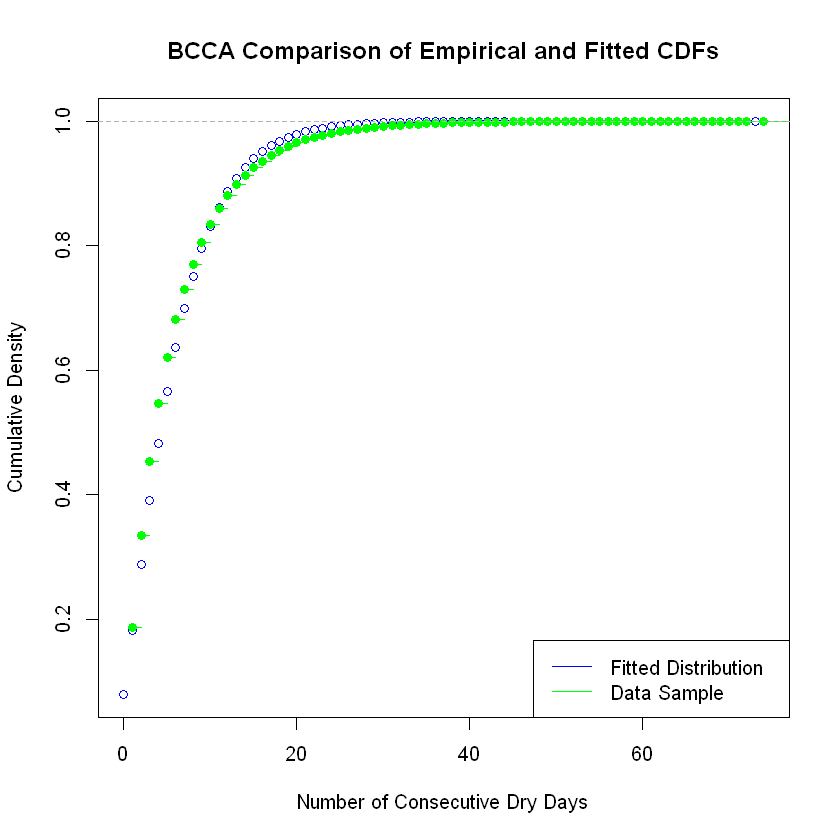

In [518]:
x <- seq(0,dBCDecMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=BCfdNB_dDec_mu, size=BCfdNB_dDec_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="BCCA Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dBCDec$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

Look at our summary DataFrame

In [519]:
print( LOMonDistDF, quote=FALSE, row.names=FALSE )

 month      smu     ssize     sprob      tmu    tsize pvalue
     1 8.726610 1.0312579 0.1376300 8.724688 1.392417      0
     2 7.478554 1.0035445 0.1664323 7.479626 1.493401      0
     3 7.718704 1.1935821 0.1667586 7.716668 1.544355      0
     4 5.452850 1.3460638 0.2544520 5.453202 1.861152      0
     5 4.596750 1.0522391 0.2833586 4.596410 1.817412      0
     6 6.089343 0.6822686 0.1632318 6.088741 1.187755      0
     7 7.301216 0.8514854 0.1443249 7.302386 1.231678      0
     8 6.613158 1.1655675 0.1841492 6.613455 1.492751      0
     9 5.418038 0.9483823 0.2203541 5.417343 1.531123      0
    10 6.841150 0.9034085 0.1644450 6.842167 1.346602      0
    11 7.279090 0.8182290 0.1511169 7.278223 1.295658      0
    12 8.344084 0.8982067 0.1339670 8.344530 1.290819      0


In [520]:
print( BCMonDistDF, quote=FALSE, row.names=FALSE )

 month      smu    ssize     sprob      tmu    tsize pvalue
     1 5.574454 1.286713 0.2438216 5.574791 1.797532      0
     2 4.876424 1.371326 0.2945013 4.876860 2.035782      0
     3 4.721864 1.450899 0.3059330 4.722563 2.081625      0
     4 3.696284 1.842607 0.4180716 3.696109 2.655375      0
     5 2.939537 2.019765 0.5280765 2.939830 3.289633      0
     6 3.341032 1.431947 0.4224848 3.341012 2.444138      0
     7 3.383710 1.562324 0.4233091 3.383552 2.483632      0
     8 2.960761 2.151797 0.5338230 2.961081 3.390757      0
     9 3.242044 1.192984 0.4140581 3.242139 2.291070      0
    10 4.890160 1.058566 0.2512467 4.890388 1.640987      0
    11 5.819450 1.127266 0.2177547 5.818482 1.619699      0
    12 6.023082 1.174314 0.2147096 6.022986 1.646771      0


### Output to a Spreadsheet

Output the stats and distribution fits to a spreadsheet

In [521]:
outputDF_xlsx <- createWorkbook()

In [522]:
LOsumstat_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="LOCA_Summary_Stats")
BCsumstat_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="BCCA_Summary_Stats")
LOmondist_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="LOCA_Dist_Properties")
BCmondist_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="BCCA_Dist_Properties")

In [523]:
addDataFrame( x=MonLOSumStatDF, sheet=LOsumstat_xlsx )
addDataFrame( x=MonBCSumStatDF, sheet=BCsumstat_xlsx )
addDataFrame( x=LOMonDistDF, sheet=LOmondist_xlsx )
addDataFrame( x=BCMonDistDF, sheet=BCmondist_xlsx )

In [524]:
saveWorkbook( outputDF_xlsx, file="CMIP5_Dry_RSummary_2041-2070.xlsx" )

## Check that No Grid Cell Outliers

Check that there are not any grid cell outliers. This part will take a long time so may need to split it out to a standalone R script. This also does not make sense so removed.

In [525]:
options(warn = oldw)